In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

import time

# Data exploration

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
label_names = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

Lets take a look at some examples of each class

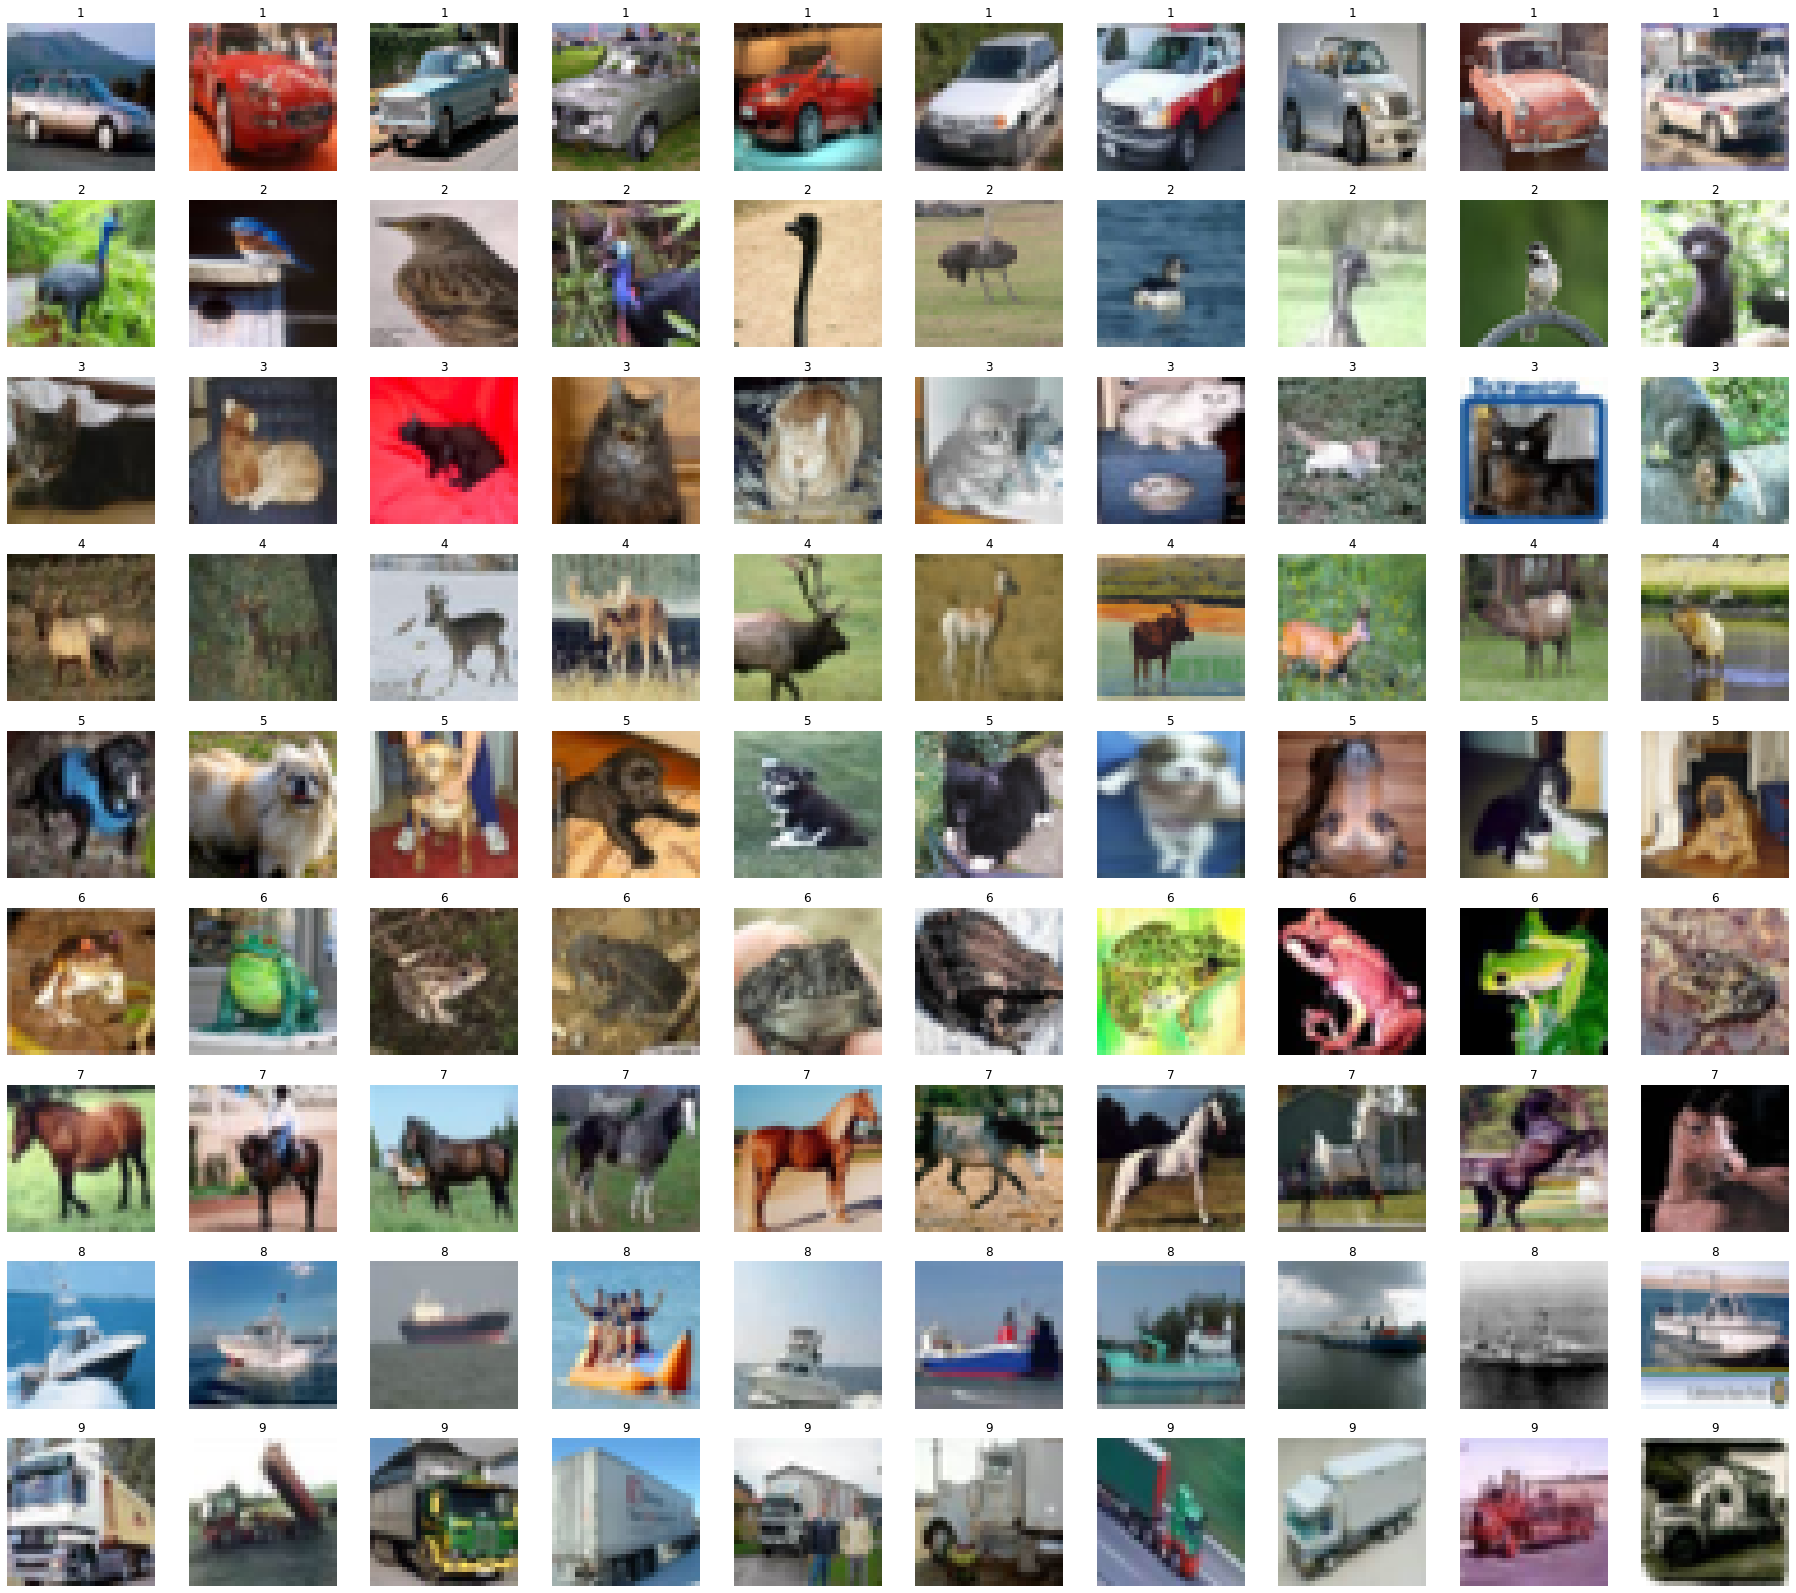

In [4]:
examples = {}
labels = 10
examples_per_label = 10

for i in range(0, x_train.shape[0]):
    if len(examples) == labels and all([len(examples[label]) == examples_per_label for label in examples]):
        break
    
    label = y_train[i][0]
    if label not in examples:
        examples[label] = []
    
    if len(examples[label]) >= examples_per_label:
        continue
        
    examples[label].append(x_train[i])
    
fig=plt.figure(figsize=(32, 32))

i = 1
for label in range(1, labels):
    for example in examples[label]:
        ax = fig.add_subplot(labels, examples_per_label, i)
        ax.set_title(label)
        plt.imshow(example)
        plt.axis('off')
        i += 1
    
plt.show()

# Naive approach with sklearn

Let's use renown configurations, capable of achieving 97%+ accuracy on mnist and 89%+ accuracy on fashion-mnist.
Whole benchmark available here:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#

Let's try with colors and grayscale

In [5]:
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [6]:
models = [
    SVC(kernel='rbf', C=10),
    SVC(kernel='poly', C=10),
    SVC(kernel='poly', C=100),
    SVC(kernel='poly', C=10)
]

In [7]:
def test_models(train_data, test_data, excerpt_size=1000):
    train_x, train_y = train_data
    test_x, test_y = test_data
    
    for model in models:
        params = model.get_params()
        kernel = params['kernel']
        c_param = params['C']

        print(f'Training kernel={kernel}, C={c_param}...')

        start_training = time.time()
        excerpt_train_x = np.take(train_x, range(0, excerpt_size), axis=0)
        excerpt_train_y = np.take(train_y, range(0, excerpt_size))
        model.fit(excerpt_train_x, excerpt_train_y)
        end_training = time.time()
        print(f'Training finished, elapsed seconds: {end_training-start_training}')

        print(f'Measuring F1...')
        start_testing = time.time()

        predictions = model.predict(test_x)
        score = f1_score(test_y, predictions, average='weighted')
        end_testing = time.time()
        print(f'F1={score} (elapsed seconds: {end_testing-start_testing})')

        print()

In [8]:
y_train_ravel = np.ravel(y_train)
y_test_ravel = np.ravel(y_test)

### With intact colors:

In [9]:
linear_multicolor_x_train = x_train.reshape((x_train.shape[0],
                                             x_train.shape[1] * x_train.shape[2] * x_train.shape[3]))

linear_multicolor_x_test = x_test.reshape((x_test.shape[0],
                                             x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))

print(f'linear_multicolor_x_train shape: {linear_multicolor_x_train.shape}, y_train_ravel shape: {y_train_ravel.shape}')
print(f'linear_multicolor_x_test shape: {linear_multicolor_x_test.shape}, y_test_ravel shape: {y_test_ravel.shape}')

linear_multicolor_x_train shape: (50000, 3072), y_train_ravel shape: (50000,)
linear_multicolor_x_test shape: (10000, 3072), y_test_ravel shape: (10000,)


In [13]:
test_models(
    train_data=(linear_multicolor_x_train, y_train_ravel),
    test_data=(linear_multicolor_x_test, y_test_ravel),
    excerpt_size=8000
)

Training kernel=poly, C=10...
Training finished, elapsed seconds: 195.73130989074707
Measuring F1...
F1=0.4124514613297535 (elapsed seconds: 178.98000144958496)

Training kernel=poly, C=100...
Training finished, elapsed seconds: 181.39598965644836
Measuring F1...
F1=0.4091216912019624 (elapsed seconds: 177.83599543571472)

Training kernel=rbf, C=10...
Training finished, elapsed seconds: 243.84301042556763
Measuring F1...
F1=0.4689125844714559 (elapsed seconds: 210.09846925735474)

Training kernel=rbf, C=100...
Training finished, elapsed seconds: 268.9208335876465
Measuring F1...
F1=0.4636599512270508 (elapsed seconds: 206.12634468078613)



### With grayscaled images:

In [10]:
grayscaled_x_train = np.mean(x_train, axis=3)
grayscaled_x_test = np.mean(x_test, axis=3)

linear_grayscaled_x_train = grayscaled_x_train.reshape((grayscaled_x_train.shape[0],
                                                        grayscaled_x_train.shape[1] * grayscaled_x_train.shape[2]))

linear_grayscaled_x_test = grayscaled_x_test.reshape((grayscaled_x_test.shape[0],
                                                      grayscaled_x_test.shape[1] * grayscaled_x_test.shape[2]))

print(f'linear_grayscaled_x_train shape: {linear_grayscaled_x_train.shape}, y_train_ravel shape: {y_train_ravel.shape}')
print(f'linear_grayscaled_x_test shape: {linear_grayscaled_x_test.shape}, y_test_ravel shape: {y_test_ravel.shape}')

linear_grayscaled_x_train shape: (50000, 1024), y_train_ravel shape: (50000,)
linear_grayscaled_x_test shape: (10000, 1024), y_test_ravel shape: (10000,)


In [12]:
test_models(
    train_data=(linear_grayscaled_x_train, y_train_ravel),
    test_data=(linear_grayscaled_x_test, y_test_ravel),
    excerpt_size=8000
)

Training kernel=poly, C=10...
Training finished, elapsed seconds: 95.34011316299438
Measuring F1...
F1=0.3237808393861074 (elapsed seconds: 66.67799234390259)

Training kernel=poly, C=100...
Training finished, elapsed seconds: 97.84560966491699
Measuring F1...
F1=0.31829339337775514 (elapsed seconds: 66.10339117050171)

Training kernel=rbf, C=10...
Training finished, elapsed seconds: 102.73529314994812
Measuring F1...
F1=0.3885097423818574 (elapsed seconds: 72.08799195289612)

Training kernel=rbf, C=100...
Training finished, elapsed seconds: 102.84699416160583
Measuring F1...
F1=0.3784897528953187 (elapsed seconds: 71.80098557472229)



# Intermediate results:

There is a base mode with F1=~0.47, which could be used as a sanity check for neural network.

Just as expected, classification of grayscale images has somewhat lower accuracy. 

Unfortunatelly, due to limited computing powers, it is very computationaly expensive to train of full dataset. So, when comparing to sklearn models, neural network should also be trained only on first 8000 examples.

# Neural Network
The first goal is to find the simplest and smallest neural network configuration that would perform the same way on the same dataset, and then build on that.

In [35]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

def get_excerpt_data(data, take=8000, skip=0):
    x_set, y_set = data
    
    excerpt_x = np.take(x_set, range(skip, take+skip), axis=0)
    excerpt_y = np.take(y_set, range(skip, take+skip))
    excerpt_y = to_categorical(excerpt_y)
    
    return excerpt_x, excerpt_y

excerpt_train_x, excerpt_train_y = get_excerpt_data((x_train, y_train_ravel))
excerpt_validation_x, excerpt_validation_y = get_excerpt_data((x_train, y_train_ravel), 1000, 8000)
excerpt_test_x, excerpt_test_y = get_excerpt_data((x_test, y_test_ravel), 10000)

print(f'Train shapes: x={excerpt_train_x.shape}, y={excerpt_train_y.shape}')
print(f'Validation shapes: x={excerpt_validation_x.shape}, y={excerpt_validation_y.shape}')
print(f'Test shapes: x={excerpt_test_x.shape}, y={excerpt_test_y.shape}')

Train shapes: x=(8000, 32, 32, 3), y=(8000, 10)
Validation shapes: x=(1000, 32, 32, 3), y=(1000, 10)
Test shapes: x=(10000, 32, 32, 3), y=(10000, 10)


In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history, title=''):
    colors = ['r', 'k']
    metrics= ['f1_score', 'accuracy']
    
    x = range(1, len(history['accuracy']) + 1)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.ylim(0, 1.1)
    for i, name in enumerate(metrics):
        plt.plot(x, history[name], colors[i], label=name) 
    plt.title(f'Training {title}')
    plt.legend()
        
    plt.subplot(1, 2, 2)
    plt.ylim(0, 1.1)
    for i, name in enumerate(metrics):
        name = f'val_{name}'
        plt.plot(x, history[name], colors[i], label=name)
    plt.title(f'Validation {title}')
    plt.legend()

In [13]:
from tensorflow.keras.optimizers import RMSprop

def simplest_nn_model(show_summary=False):
    inputs = tf.keras.layers.Input((32, 32, 3))
    
    hidden = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
        
    hidden = tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(96, (4, 4), activation='relu', padding='valid')(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Flatten()(hidden)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(hidden)
    
    model = tf.keras.Model(inputs, outputs)
    metrics = [
        tfa.metrics.F1Score(num_classes=10, average="weighted"),
        'accuracy'
    ]
    model.compile(
        optimizer=RMSprop(lr=0.0002),
        loss='categorical_crossentropy',
        metrics=metrics
                 )
    
    if show_summary:
        print(model.summary())
    
    return model

In [14]:
model = simplest_nn_model(show_summary=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 24)        3480      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 24)          0     

In [210]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

save_best = ModelCheckpoint('best_weights_val_f1_score.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='min', factor=0.2, patience=5, verbose=1, cooldown=3)

history = model.fit(excerpt_train_x, excerpt_train_y, batch_size=64,
                    validation_data=(excerpt_validation_x, excerpt_validation_y),
                    epochs=25,
                    callbacks=[save_best, reduce_lr]
                   )

Train on 8000 samples, validate on 1000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 316us/sample - loss: 2.1441 - f1_score: 0.2704 - accuracy: 0.2764 - val_loss: 1.8862 - val_f1_score: 0.3100 - val_accuracy: 0.3350
Epoch 2/25
8000/8000 [==============================] - 1s 128us/sample - loss: 1.7437 - f1_score: 0.3804 - accuracy: 0.3850 - val_loss: 1.6139 - val_f1_score: 0.4094 - val_accuracy: 0.4220
Epoch 3/25
8000/8000 [==============================] - 1s 128us/sample - loss: 1.5724 - f1_score: 0.4296 - accuracy: 0.4345 - val_loss: 1.5083 - val_f1_score: 0.4612 - val_accuracy: 0.4610
Epoch 4/25
8000/8000 [==============================] - 1s 127us/sample - loss: 1.4556 - f1_score: 0.4801 - accuracy: 0.4840 - val_loss: 1.4239 - val_f1_score: 0.4920 - val_accuracy: 0.4950
Epoch 5/25
8000/8000 [==============================] - 1s 121us/sample - loss: 1.3790 - f1_score: 0.4990 - accuracy: 0.5024 - val_loss: 1.4260 - val_f1_score: 0.4837 - val_accuracy: 0.4860
Ep

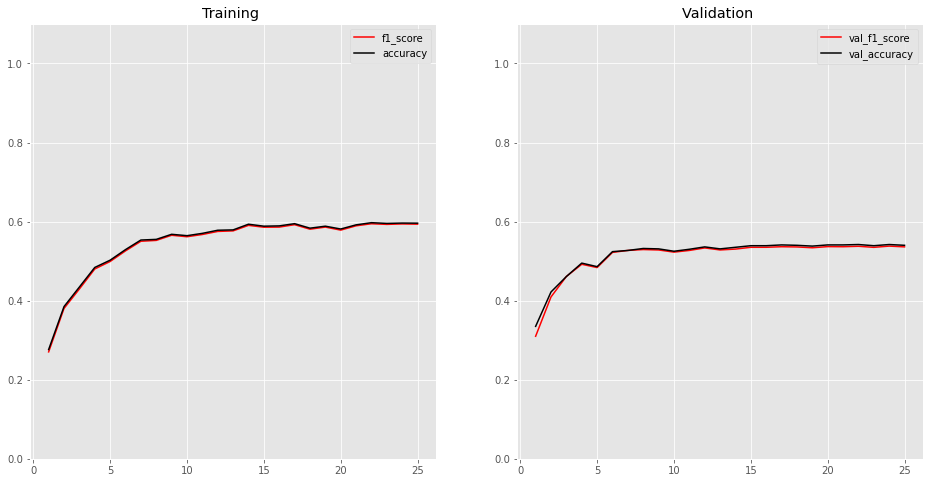

In [211]:
plot_history(history.history)

In [15]:
model.load_weights('best_weights_val_f1_score.hdf5')
model.evaluate(excerpt_test_x, excerpt_test_y)

10000/10000 [==============================] - 4s 403us/sample - loss: 1.2974 - f1_score: 0.5272 - accuracy: 0.5344


[1.2973871759414672, 0.5272212, 0.5344]

## Intermediate results:
While F1=~0.53 is far from perfect, it still outshines all previous models from sklearn. This is still the simplest model, trained on partial dataset.

Simple configuration achieves similar scores both in training and validation, there is no overfitting.

Next target is to test current model after training on full dataset.

### Neural network insights and inspections

But first let's try to get an intuition about what neural network actually "sees" when making decisions.

In [16]:
def plot_convolutions(nn_model, image_example, take=None, title=None):
    vector = np.array([image_example])
    
    # no point in watching anything that is not convolution or input layer
    printable_layers = ['input', 'conv']
    layers = [layer for layer in nn_model.layers if any([layer.name.startswith(pl_name) for pl_name in printable_layers])]
    layer_names = [layer.name for layer in layers]
    
    visualization_model = tf.keras.Model(nn_model.input, [layer.output for layer in layers])
    visualization_results = visualization_model.predict(vector)
    
    visualizations_zip = zip(layer_names, visualization_results)

    if title is not None:
        plt.title(title)
    plt.imshow(image_example)
    plt.axis('off')
    
    for i, (name, vis_result) in enumerate(visualizations_zip):
        # limit layers by 'take' parameter
        if take is not None and i >= take:
            break 

        vis_result_raveled = vis_result[0]
        # no point in watching 1x1 convolutions just by themselves
        if vis_result_raveled.shape[0] is 1 or vis_result_raveled.shape[1] is 1:
            continue

        dimensions = vis_result_raveled.shape[2]
        columns = 5
        
        import math        
        rows = math.ceil(dimensions / columns)
        fig = plt.figure(figsize=(columns * 8, rows * 8))

        for dim in range(0, dimensions):
            vis_result_dimension_splice = np.take(vis_result_raveled, [dim], axis=2)
            image_shape = vis_result_dimension_splice.shape[0], vis_result_dimension_splice.shape[1]
            image = np.reshape(vis_result_dimension_splice, image_shape)

            ax = fig.add_subplot(rows, columns, dim+1)
            ax.set_title(f'{name}::{dim}')
            plt.imshow(image)
            plt.axis('off')

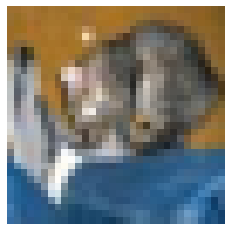

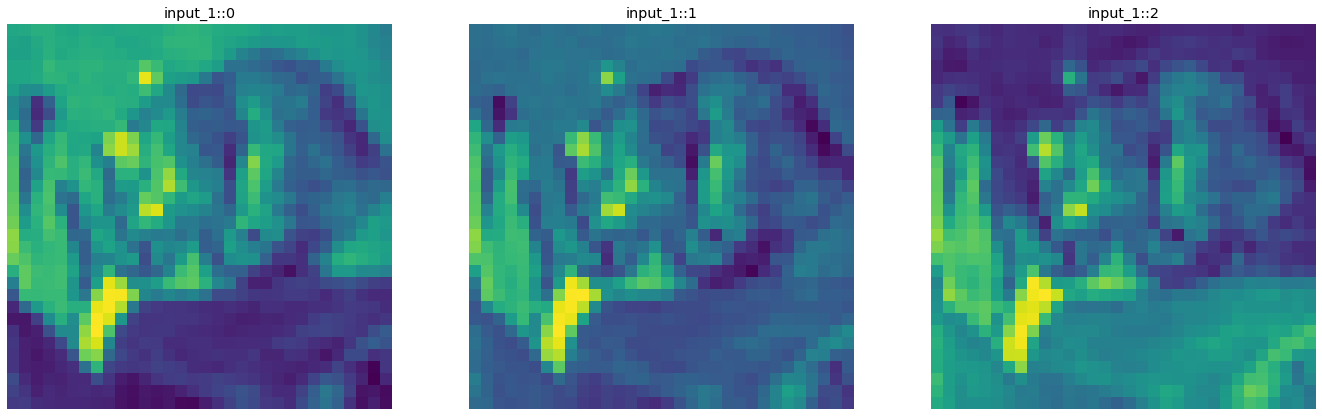

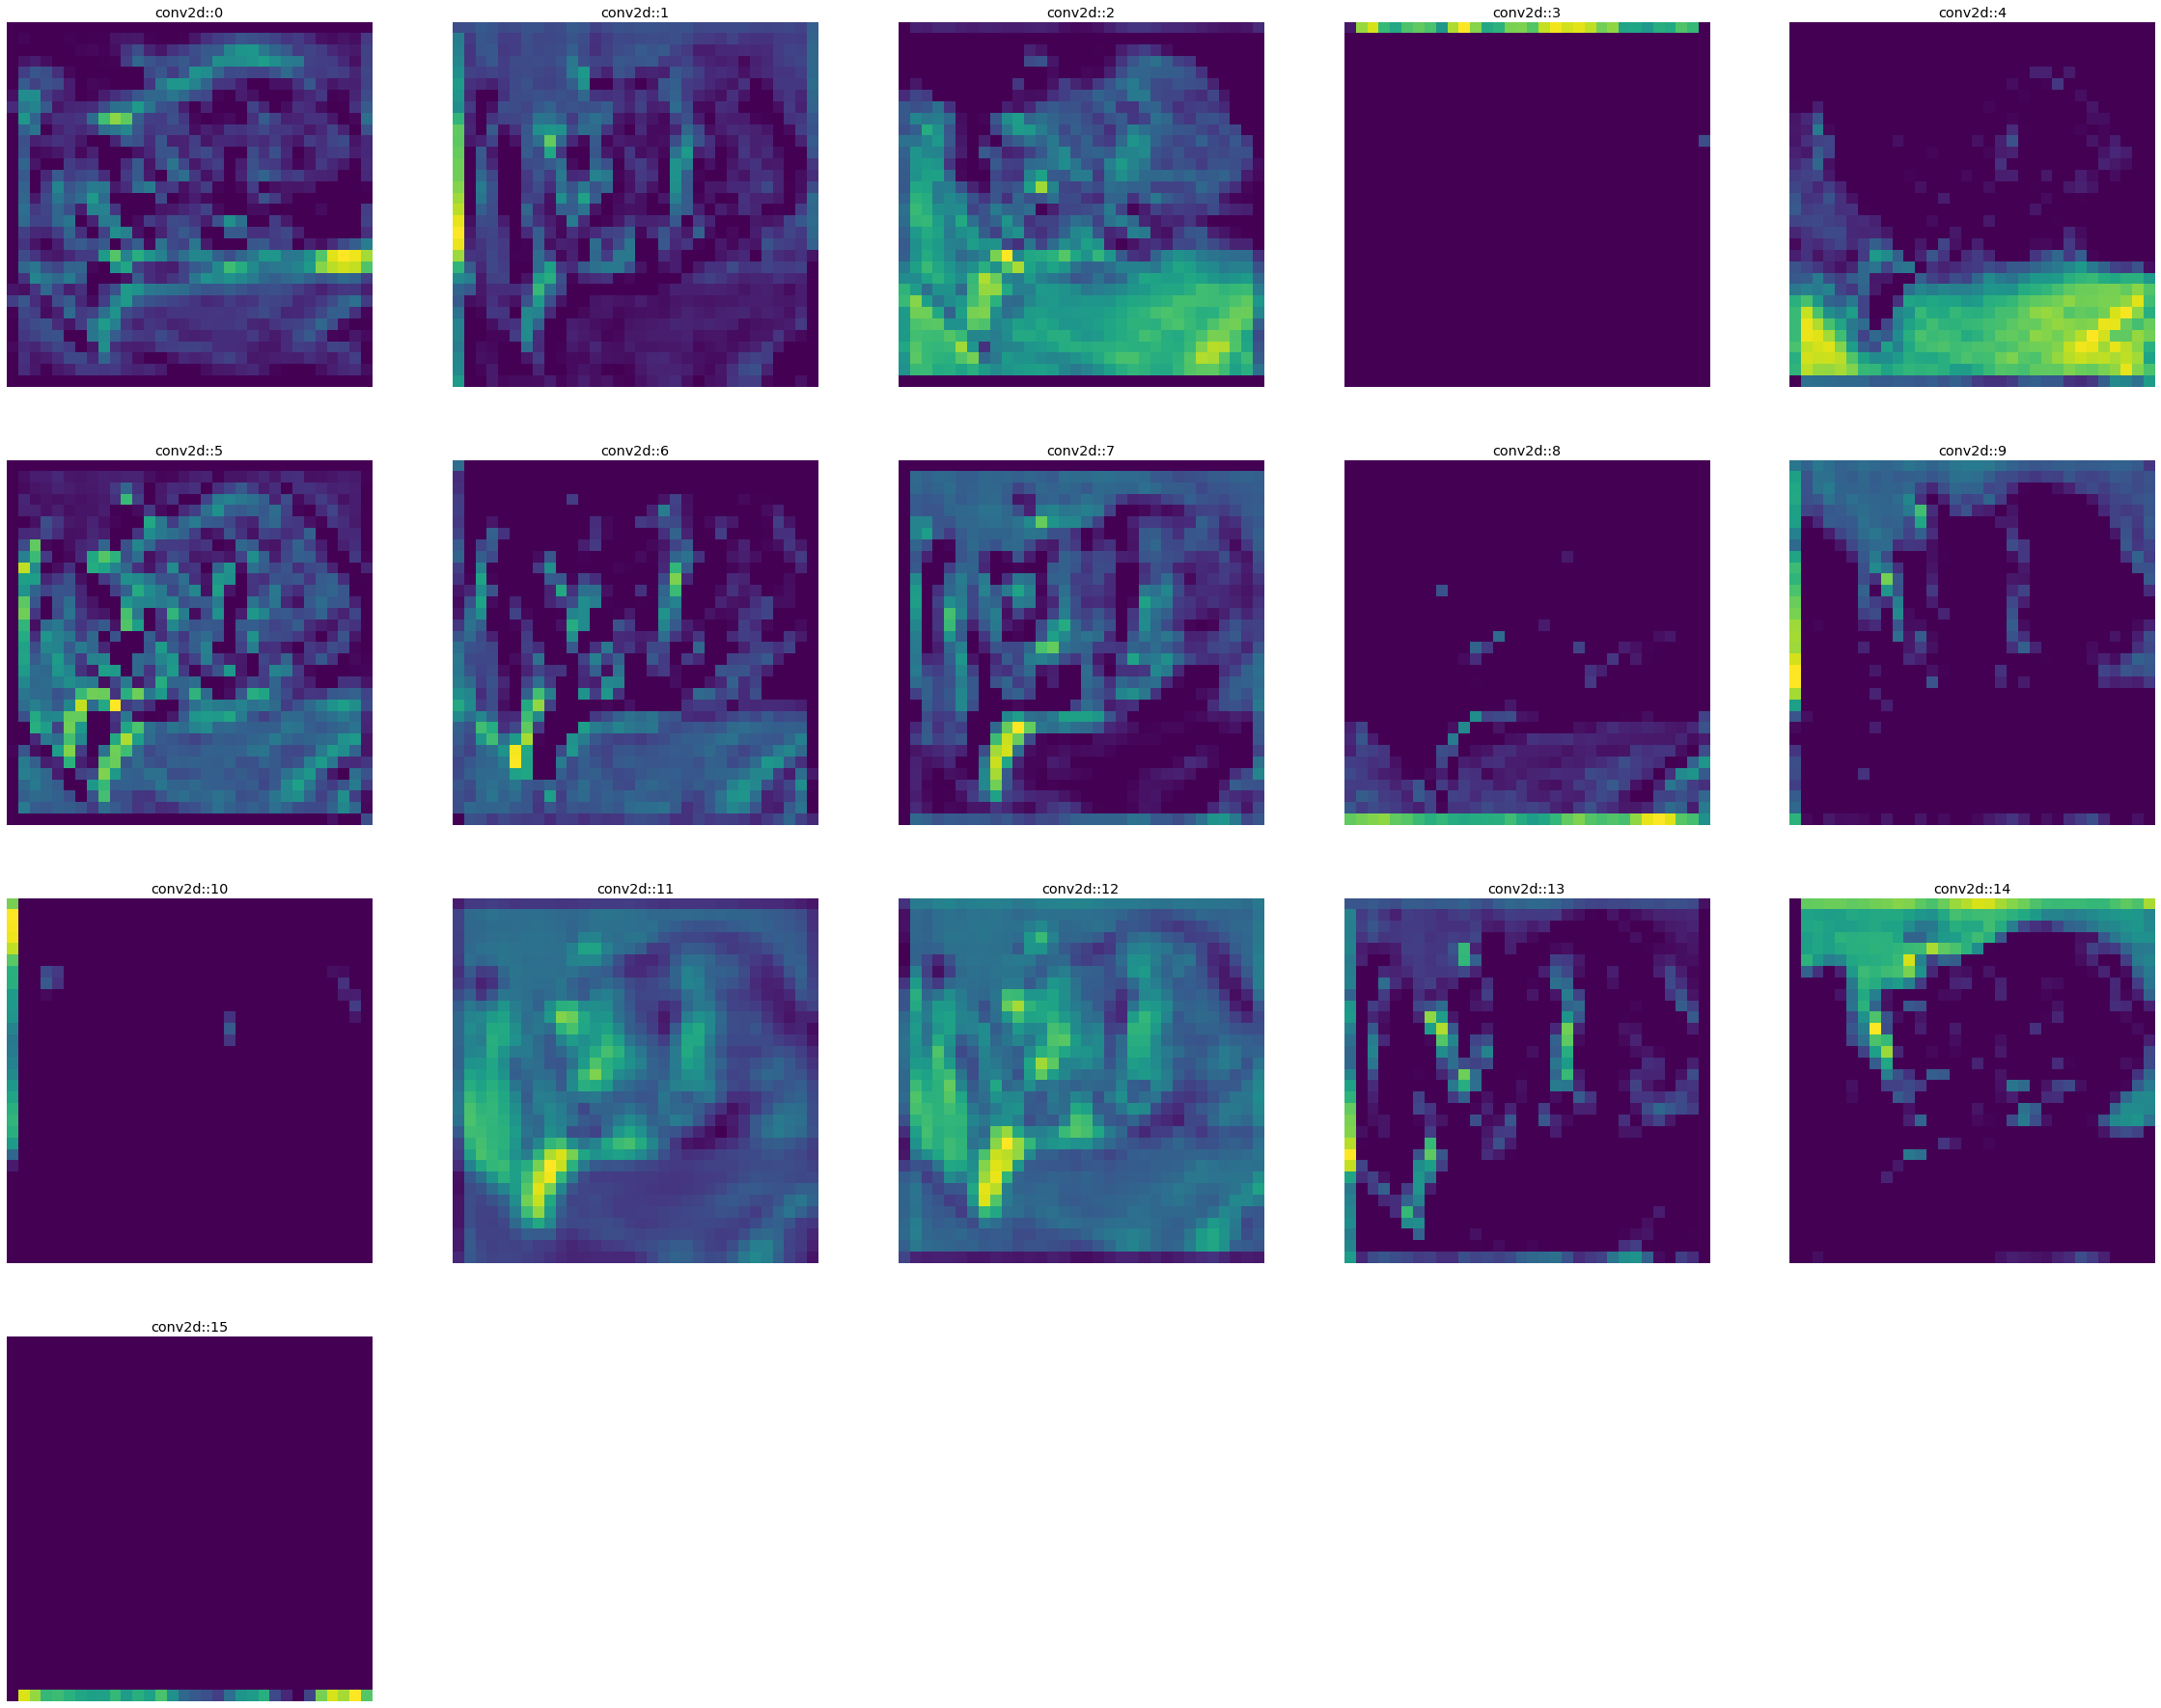

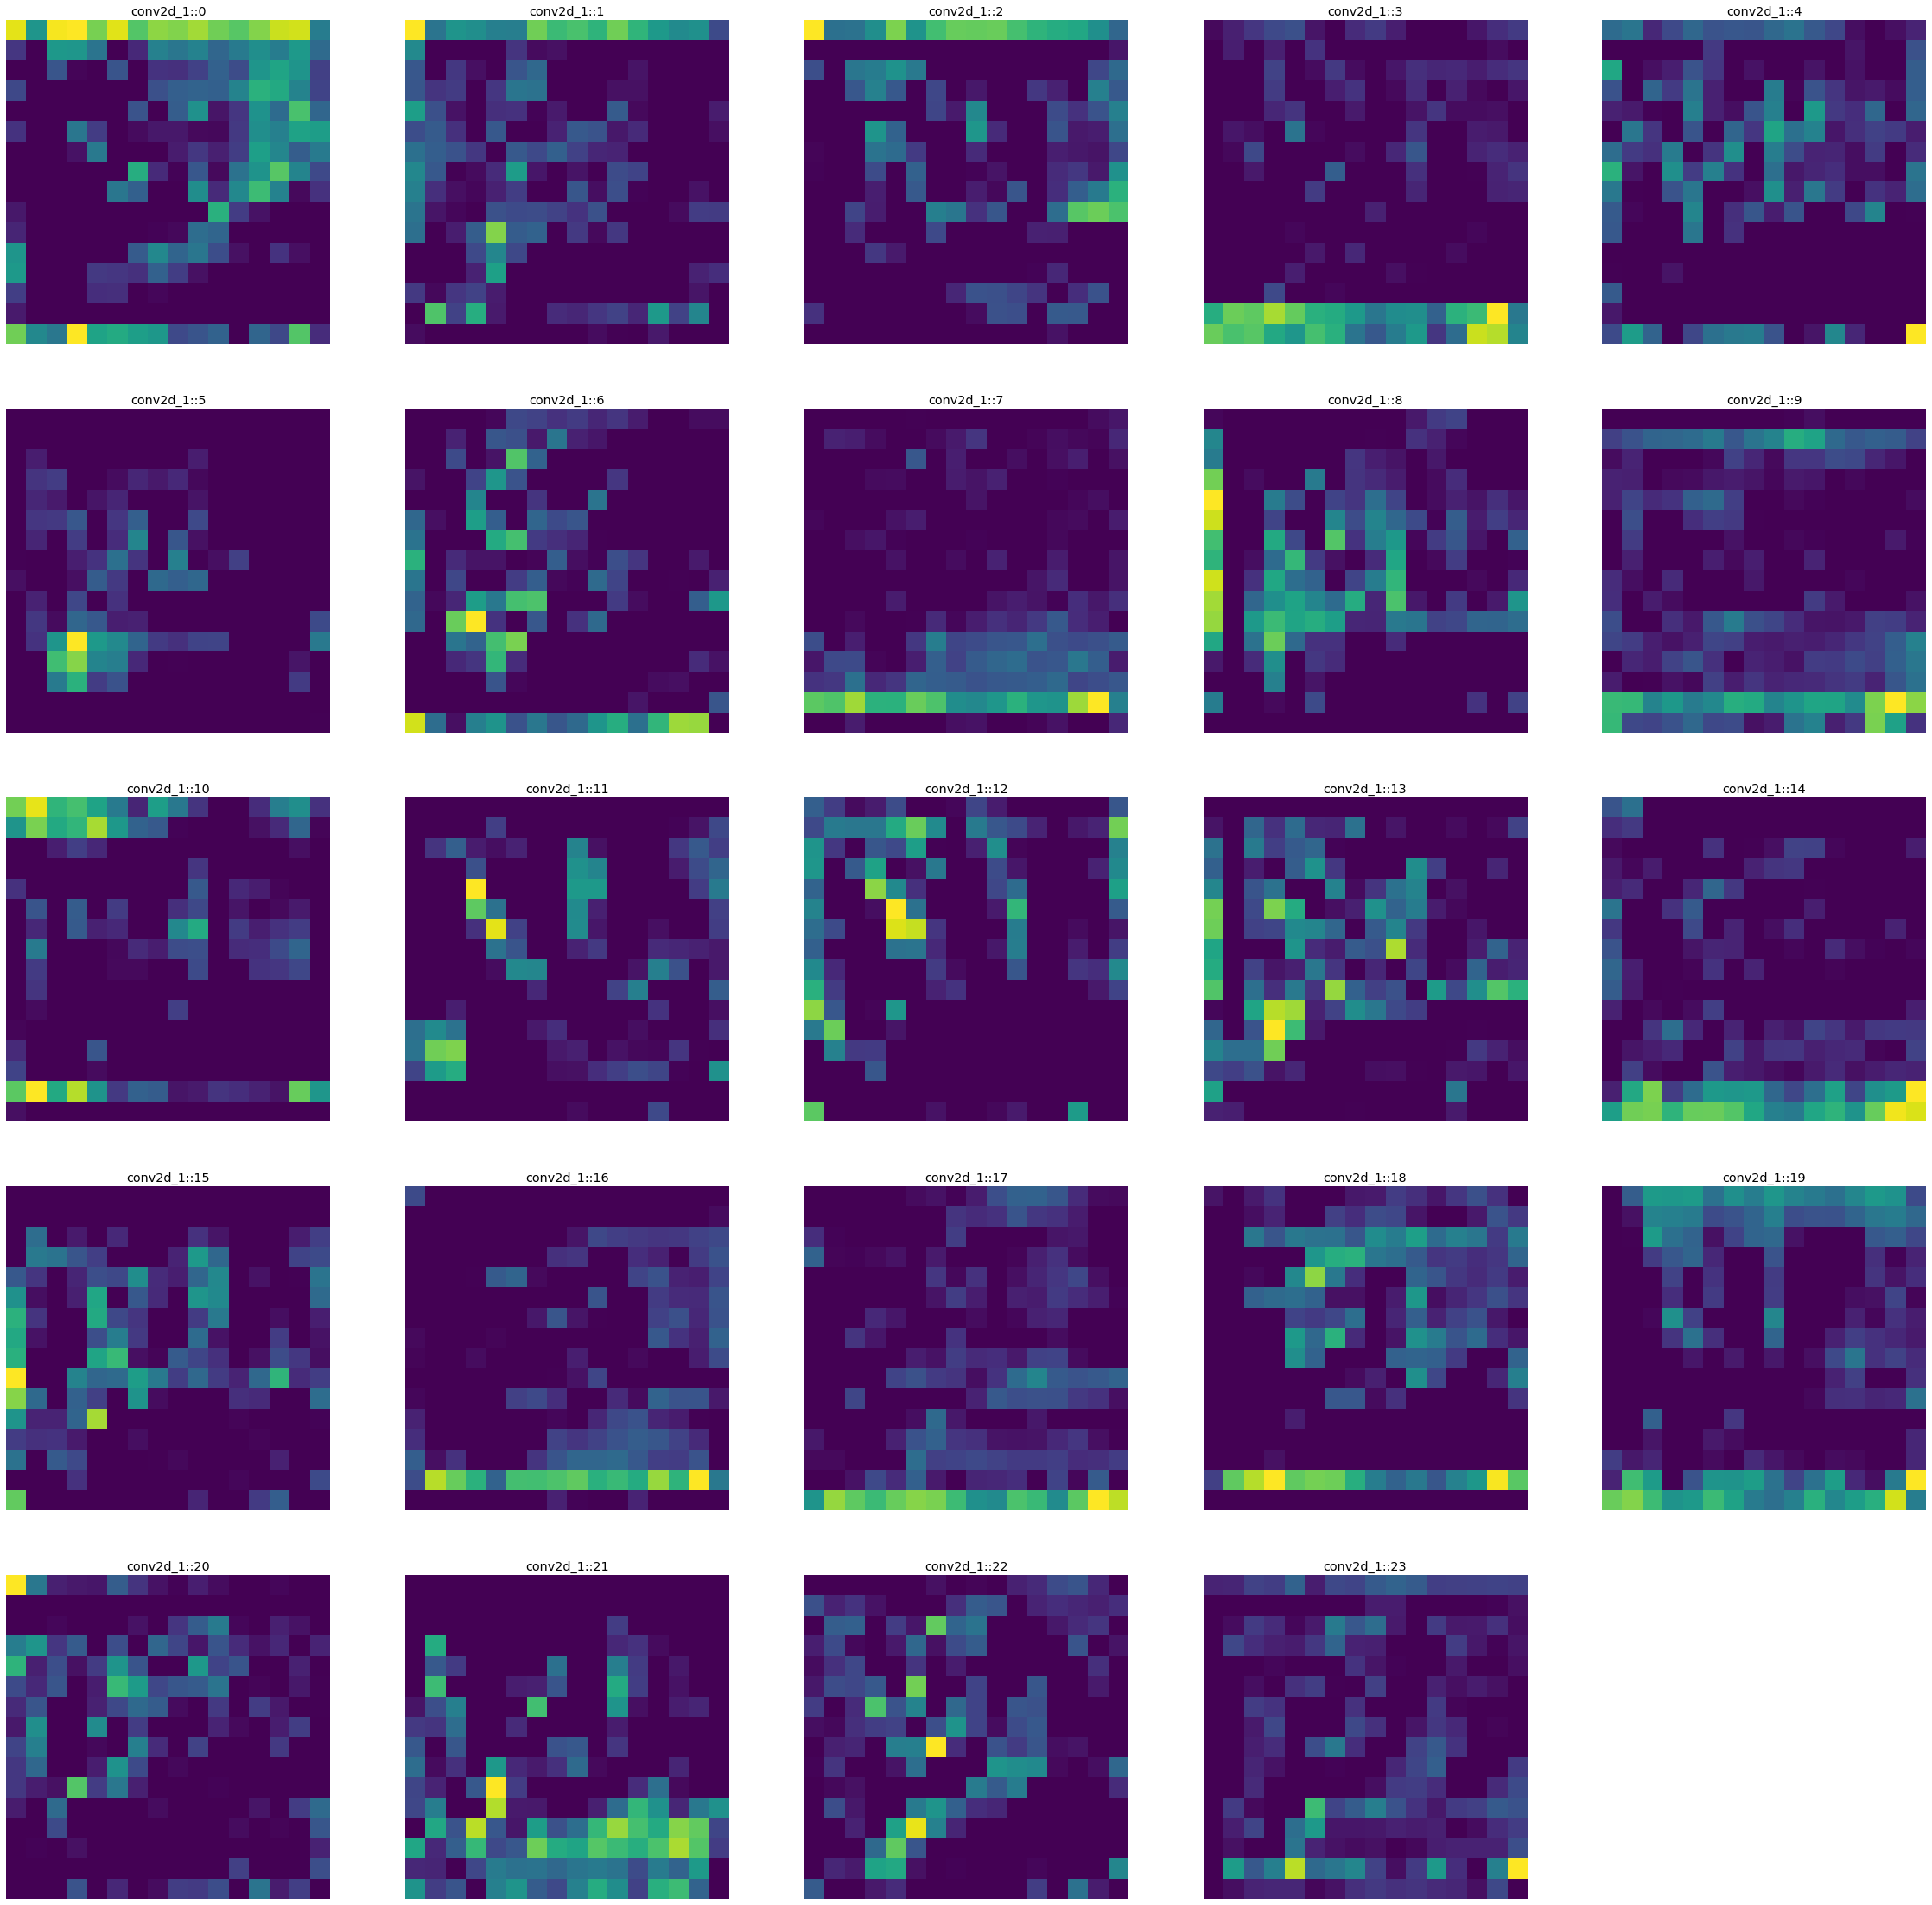

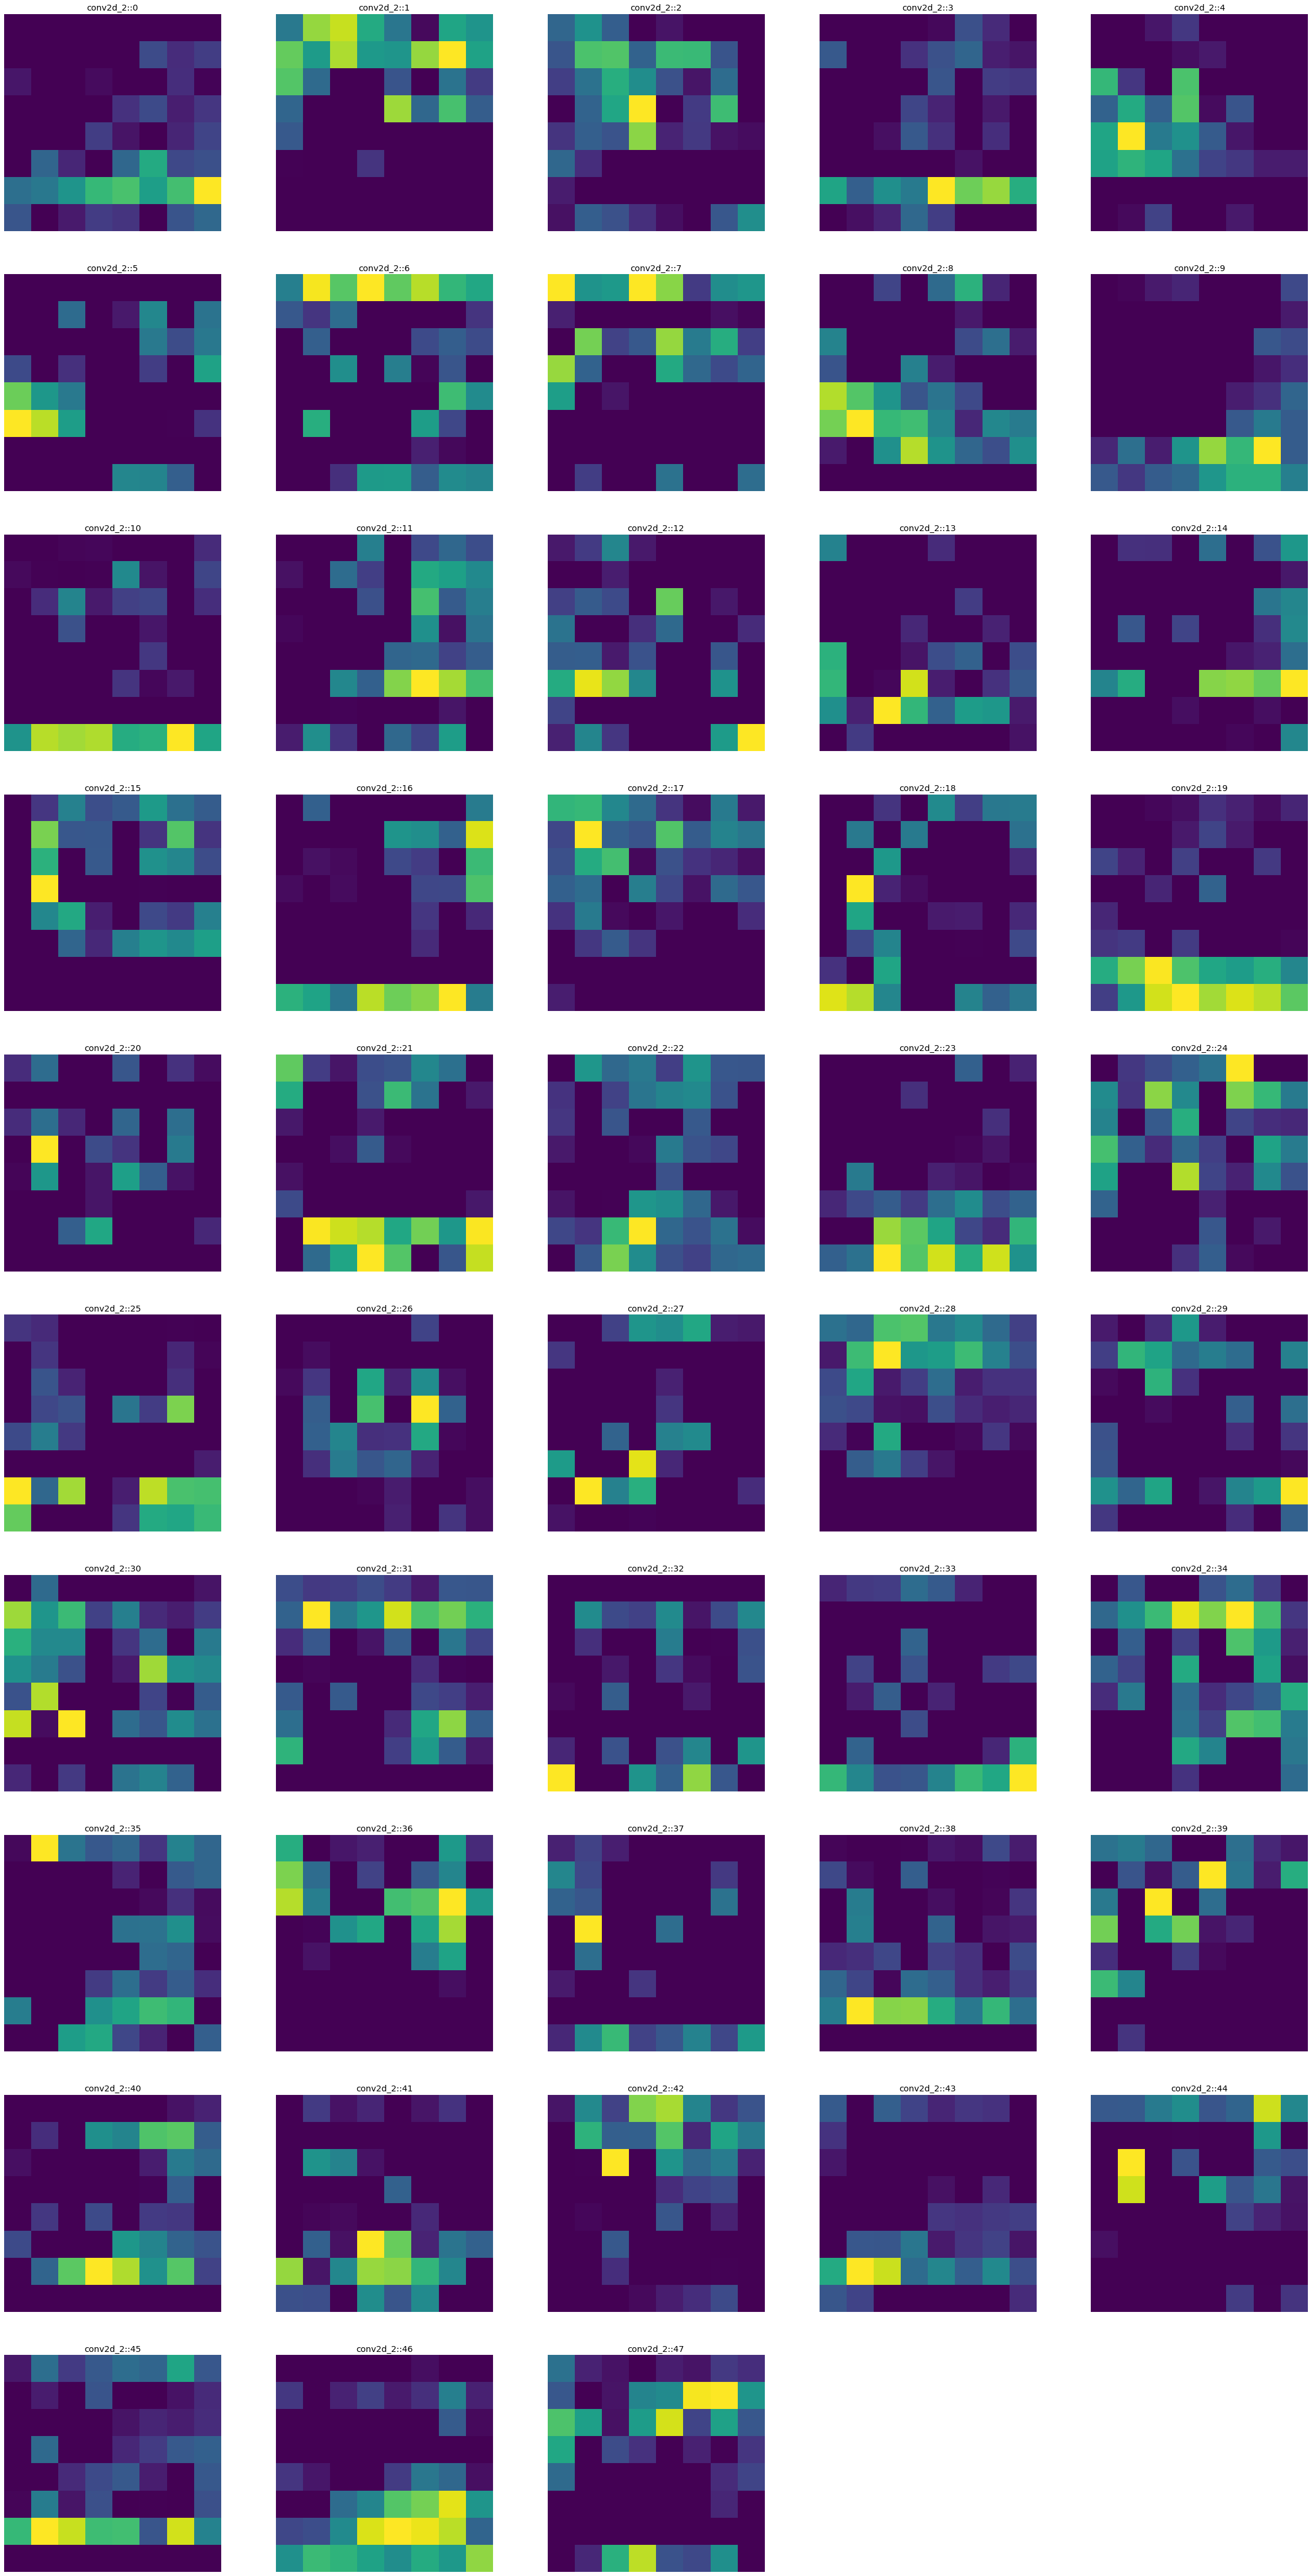

In [17]:
example = excerpt_test_x[0,:,:,:]
plot_convolutions(model, example)

First two layers can give some insight, but making sense of the third one is very hard.

Right now convolutions look blurry, in comparison with VGG16's convolutions - that is probably the result of underfitting.
It would make sense to explore the examples where neural network was most "sure" when gave predictions, and was
1. Right
2. Wrong

It probably would not give any insight if we were to inspect examples when neural network was not completely "sure" when making predictions - it would be a blurry mess.

In [18]:
import pandas as pd

def get_test_results(nn_model, test_data):
    test_data_x, test_data_y = test_data
    
    predictions = nn_model.predict(test_data_x)
    answers = np.argmax(predictions, axis=1)
    correct_answers = np.argmax(test_data_y, axis=1)
    nn_was_correct = answers == correct_answers

    test_results = []
    for i, answer in enumerate(answers):
        row = {
            'index': i,
            'answer': answer,
            'correct_answer': correct_answers[i],
            'correct': nn_was_correct[i],
            'confidence': predictions[i][answer]
        }
        test_results.append(row)

    dataframe = pd.DataFrame(test_results)
    return dataframe

In [19]:
test_results_df = get_test_results(model, test_data=(excerpt_test_x, excerpt_test_y))
test_results_df.describe()

index        answer  correct_answer    confidence
count  10000.00000  10000.000000    10000.000000  10000.000000
mean    4999.50000      4.758600        4.500000      0.563706
std     2886.89568      2.798269        2.872425      0.206372
min        0.00000      0.000000        0.000000      0.153249
25%     2499.75000      2.000000        2.000000      0.394650
50%     4999.50000      5.000000        4.500000      0.535162
75%     7499.25000      7.000000        7.000000      0.721087
max     9999.00000      9.000000        9.000000      0.998490

In [20]:
test_results_df.corr()

index    answer  correct_answer   correct  confidence
index           1.000000  0.001321       -0.001041 -0.002896   -0.015957
answer          0.001321  1.000000        0.471469  0.024363    0.128438
correct_answer -0.001041  0.471469        1.000000  0.120189    0.120559
correct        -0.002896  0.024363        0.120189  1.000000    0.422458
confidence     -0.015957  0.128438        0.120559  0.422458    1.000000

In [21]:
correct_answers_df = test_results_df[test_results_df['correct'] == True]
correct_answers_df = correct_answers_df.sort_values(by=['confidence'], ascending=False)
correct_answers_df.groupby(['answer'])['confidence'].max()

answer
0    0.981277
1    0.996114
2    0.880362
3    0.859146
4    0.941568
5    0.979692
6    0.997428
7    0.994060
8    0.998490
9    0.976083
Name: confidence, dtype: float64

In [22]:
incorrect_answers_df = test_results_df[test_results_df['correct'] == False]
incorrect_answers_df = incorrect_answers_df.sort_values(by=['confidence'], ascending=False)
incorrect_answers_df.groupby(['answer'])['confidence'].max()

answer
0    0.979517
1    0.986964
2    0.922777
3    0.849186
4    0.880304
5    0.931133
6    0.971038
7    0.947461
8    0.958603
9    0.914048
Name: confidence, dtype: float64

#### Inspect most confident correct answers

In [23]:
correct_answers_top = correct_answers_df.loc[
    correct_answers_df.groupby(['answer'])['confidence'].idxmax()
].sort_values(by=['correct_answer'])['index'].to_list()

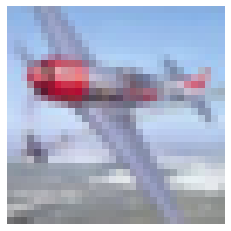

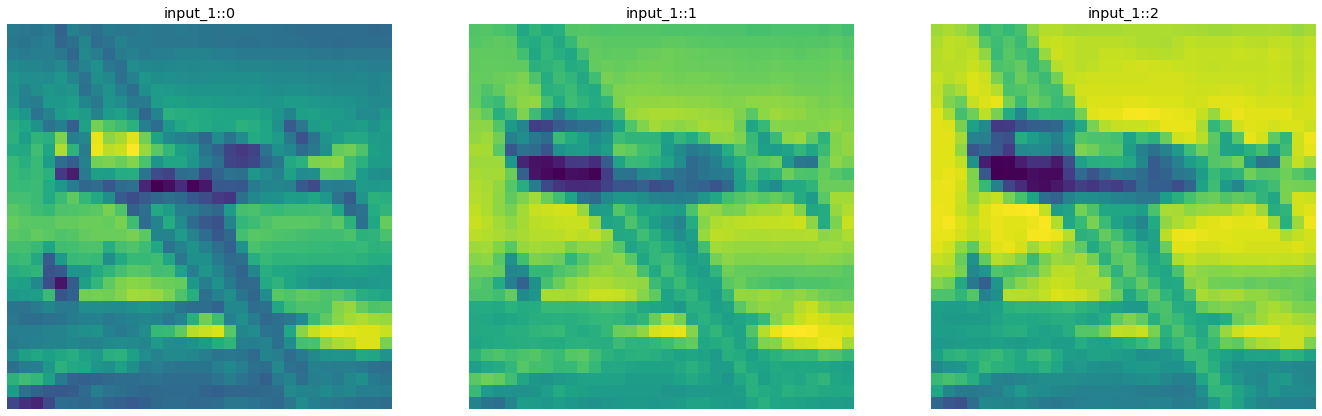

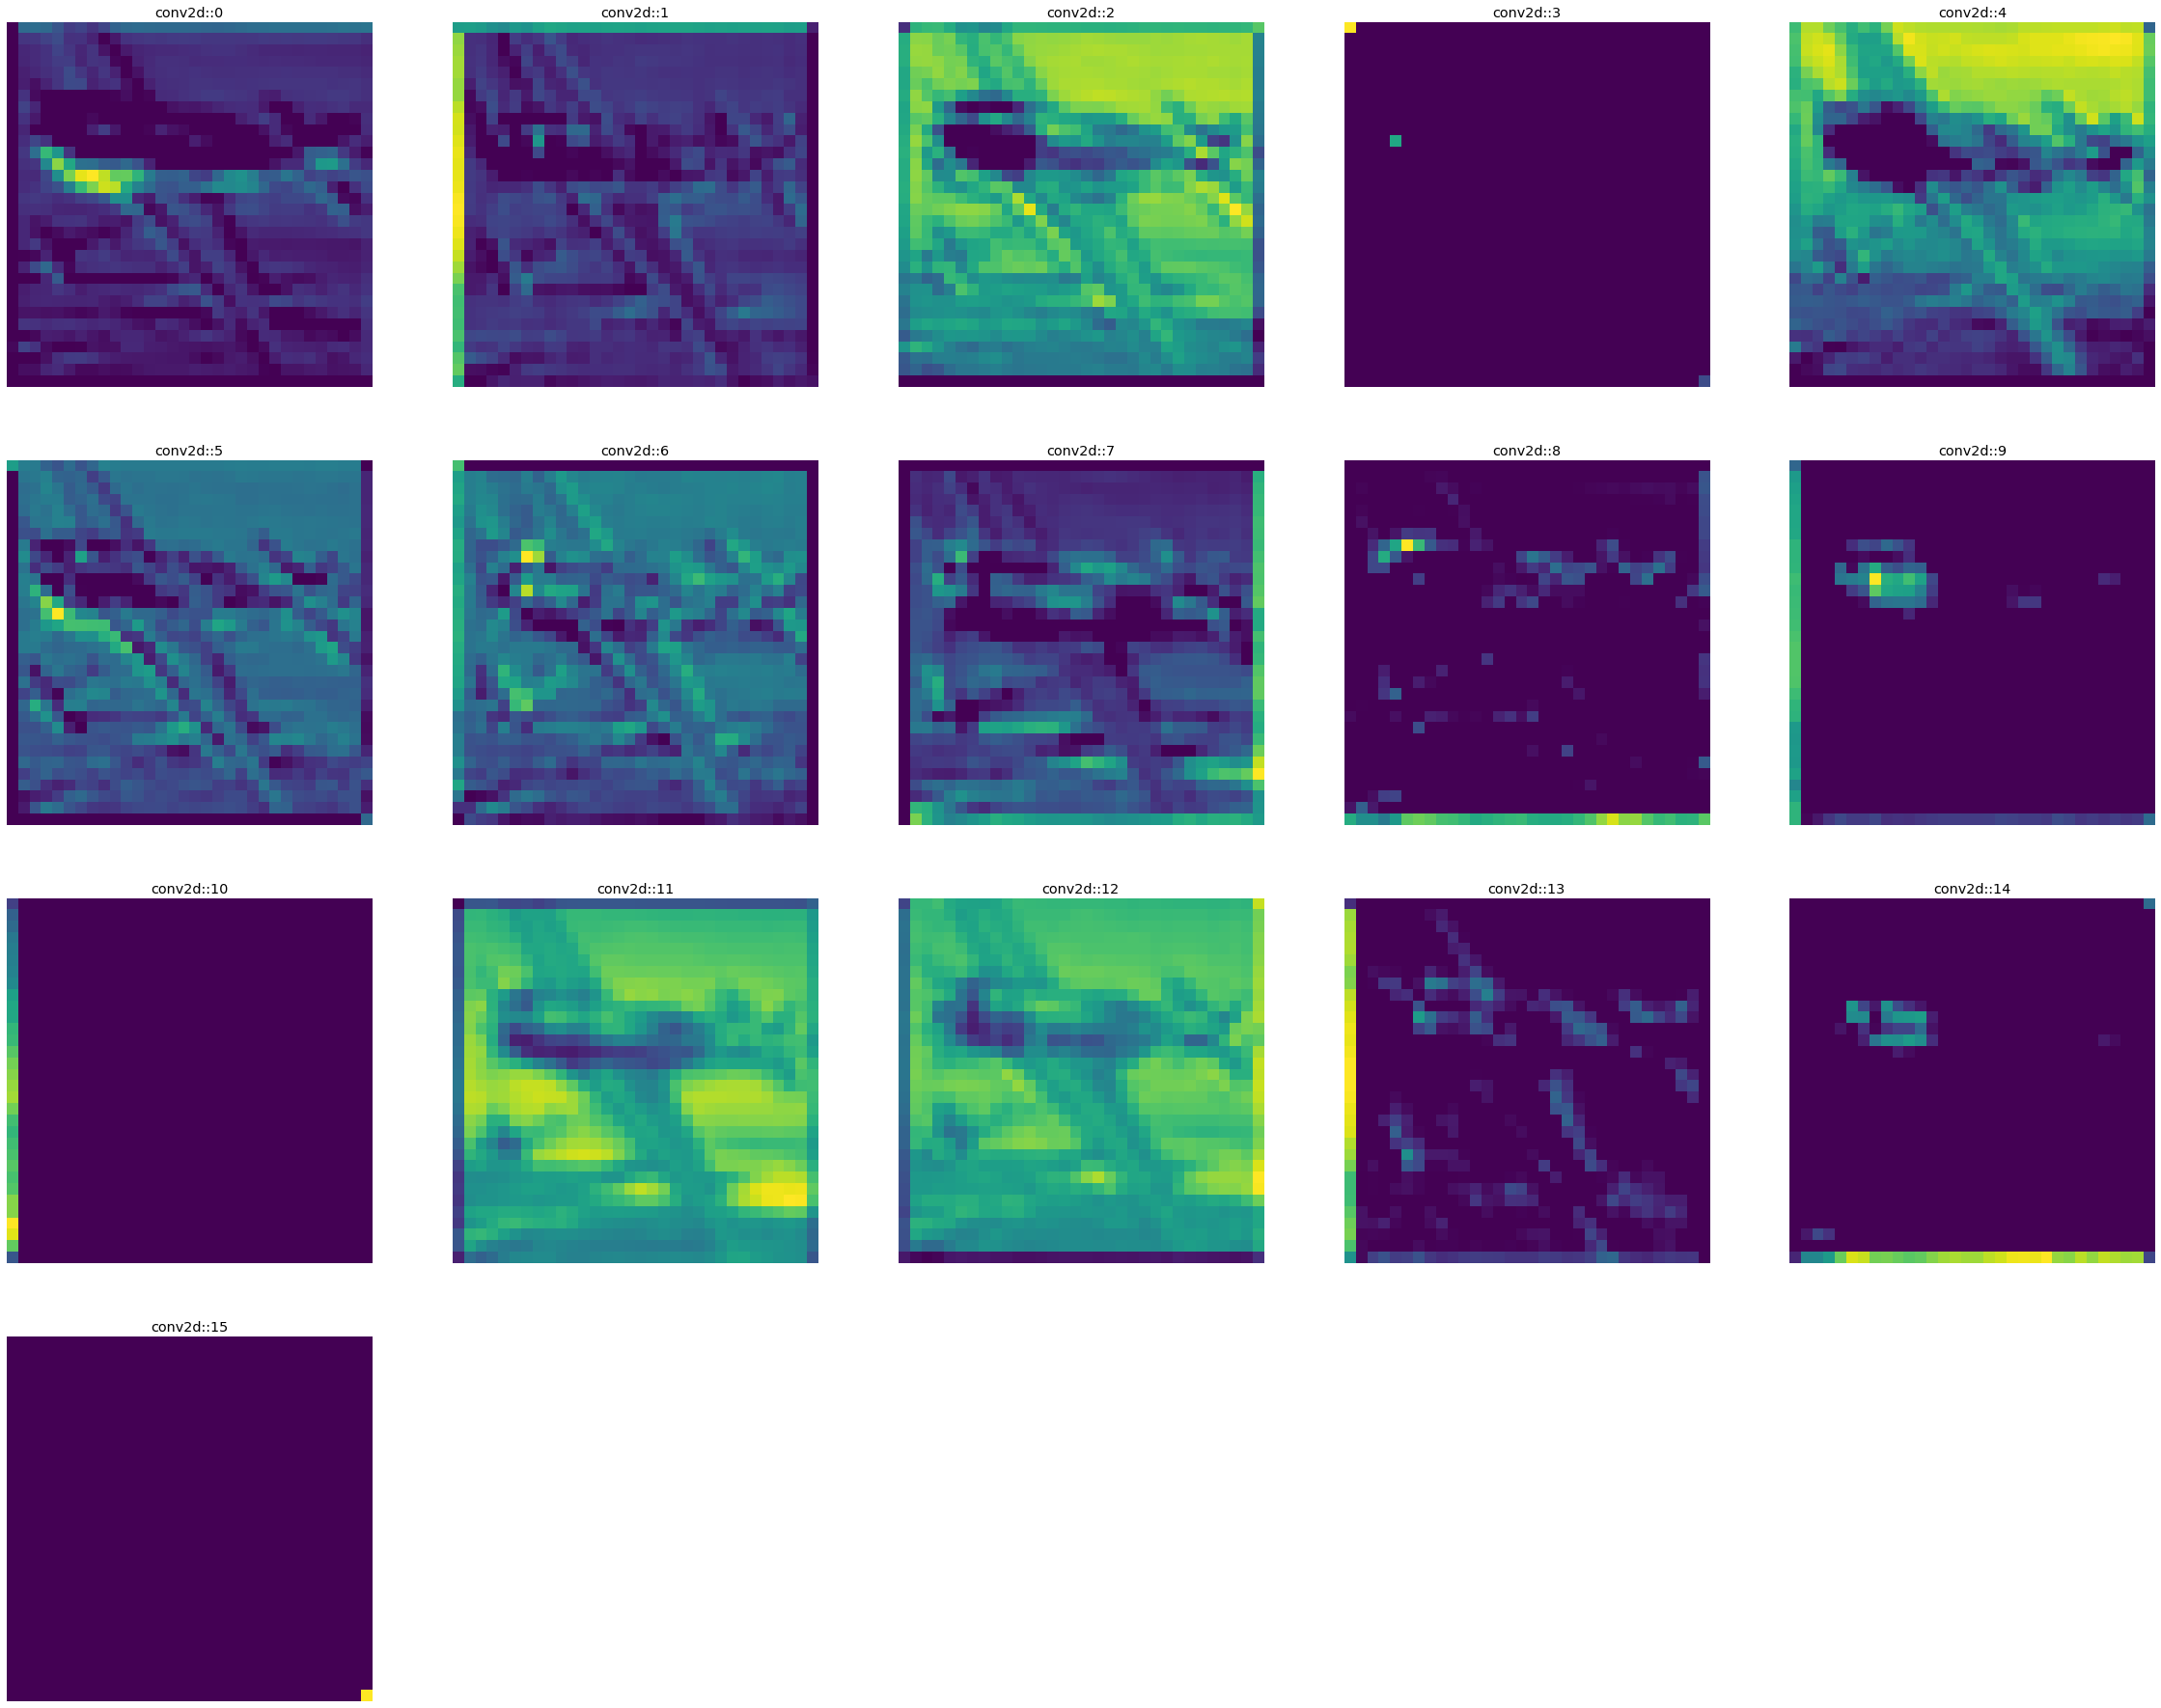

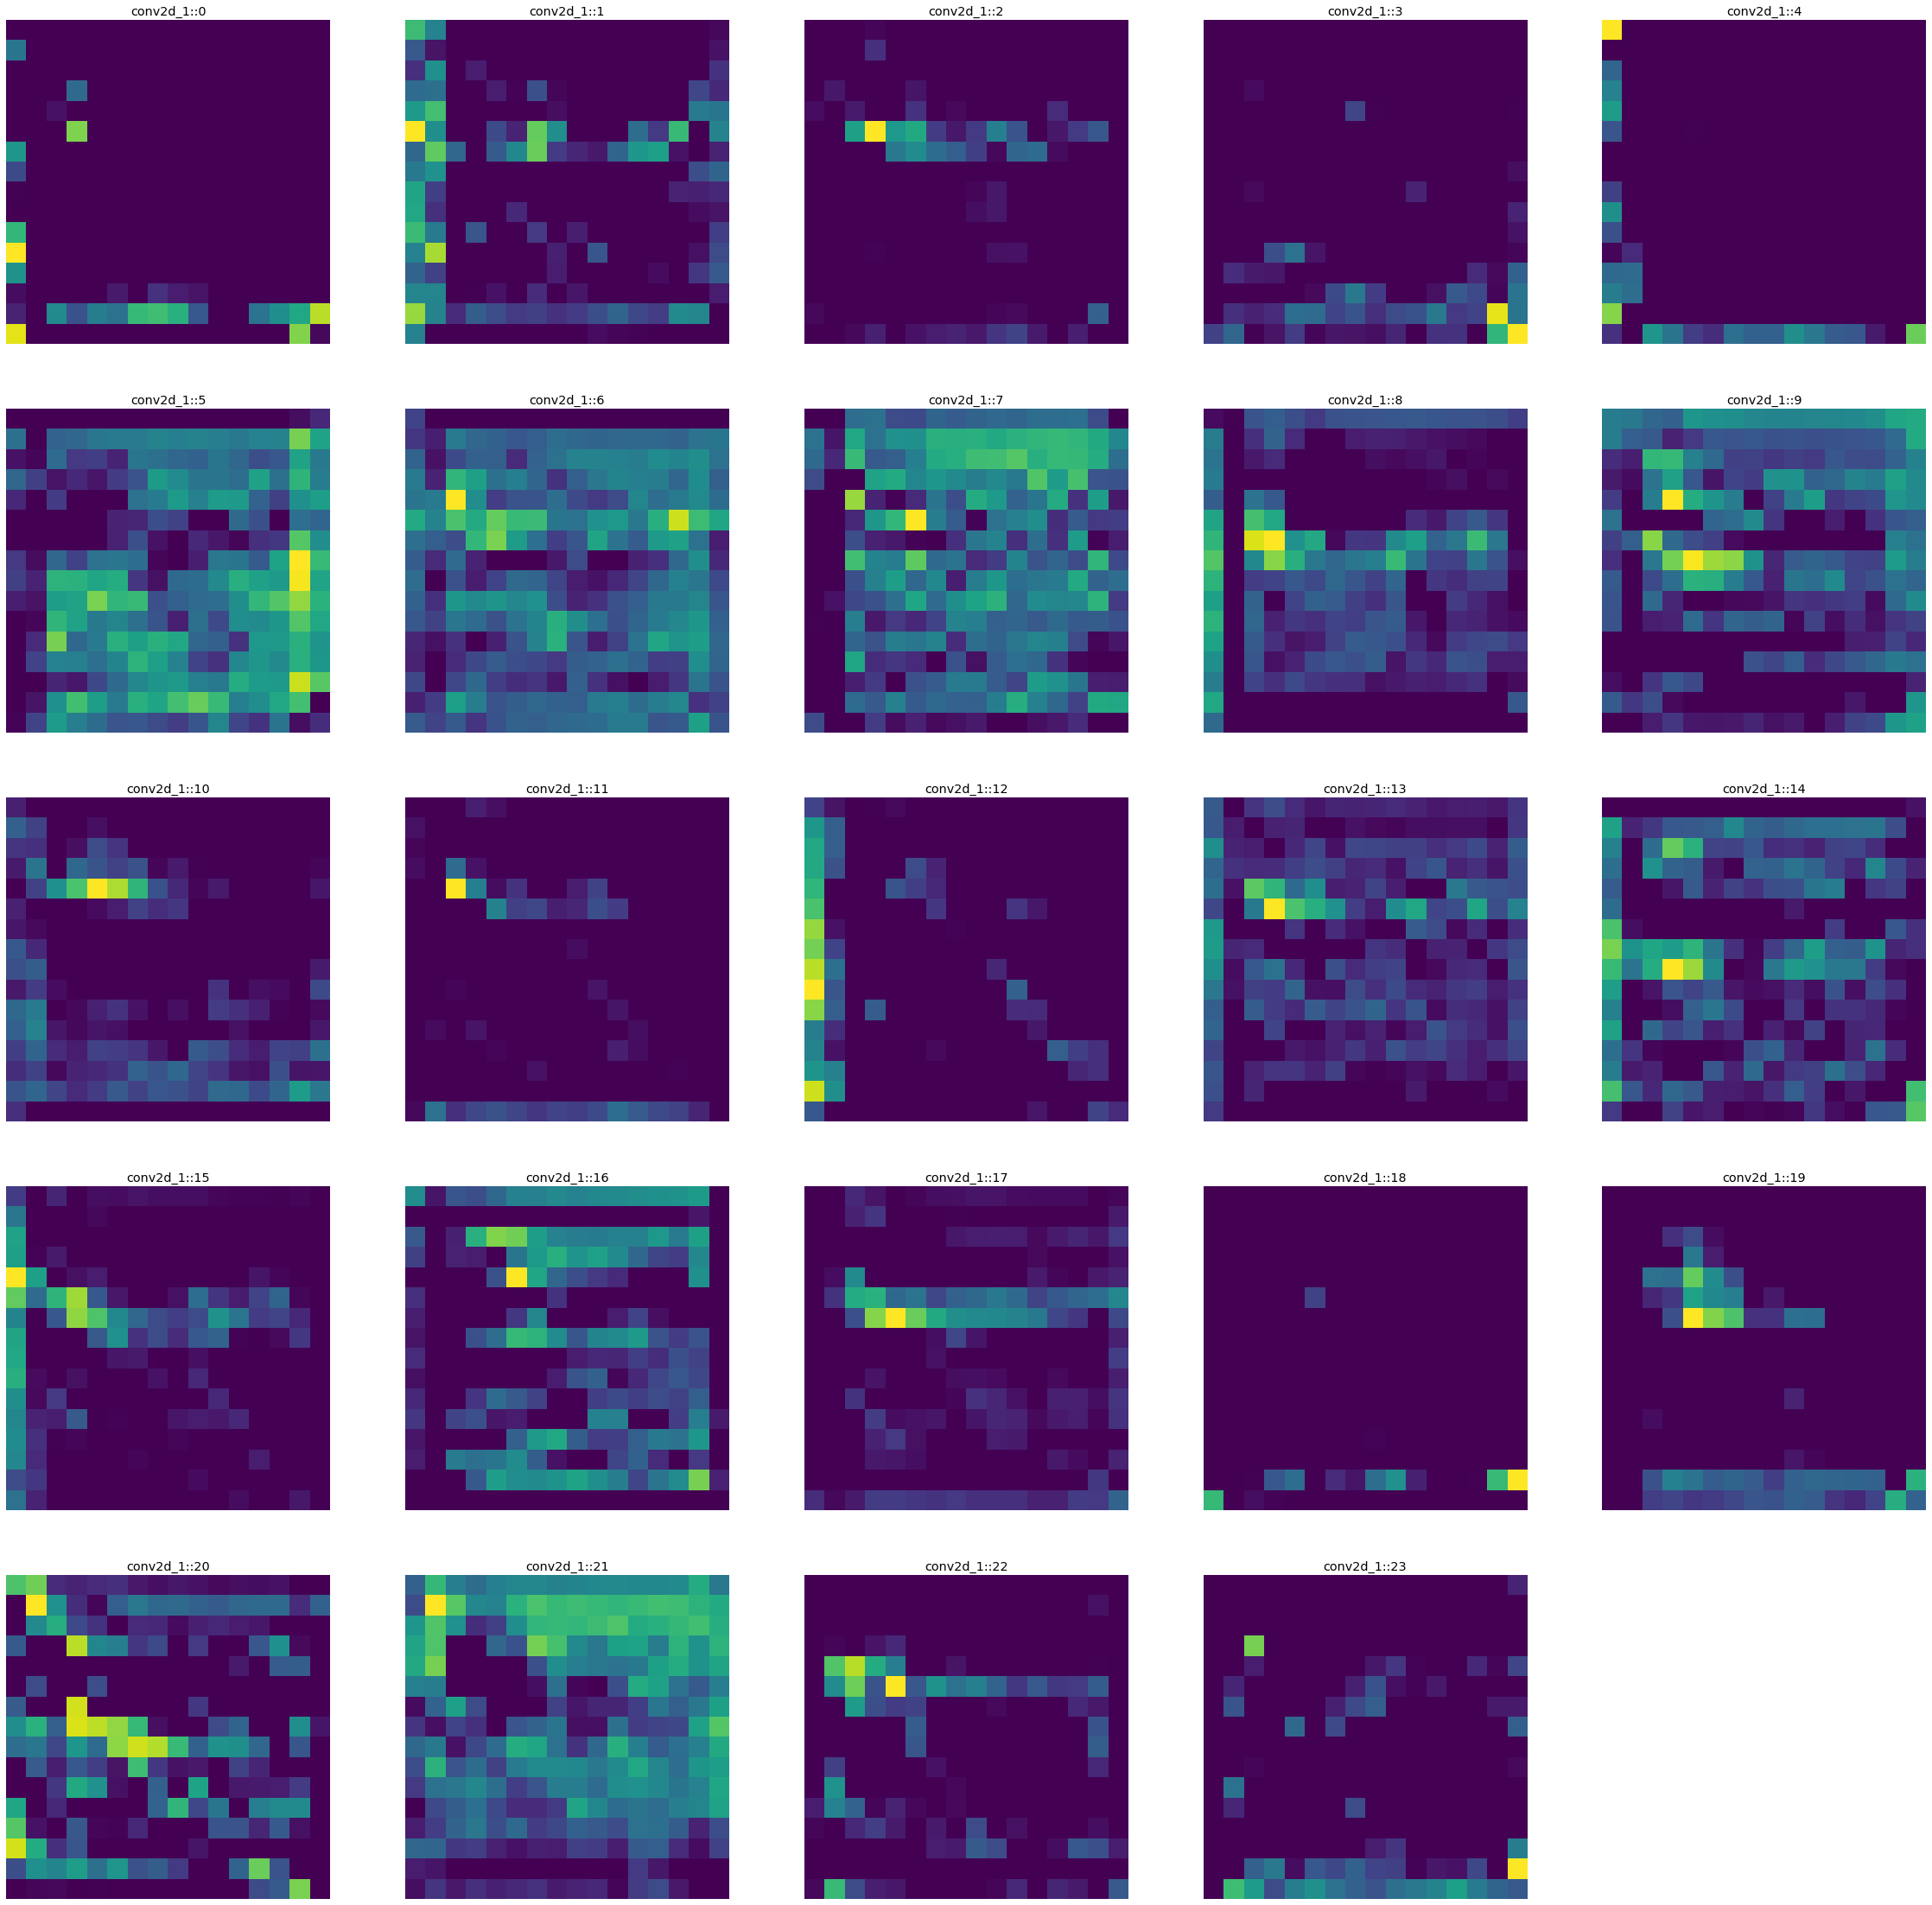

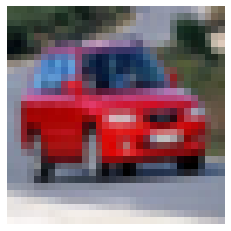

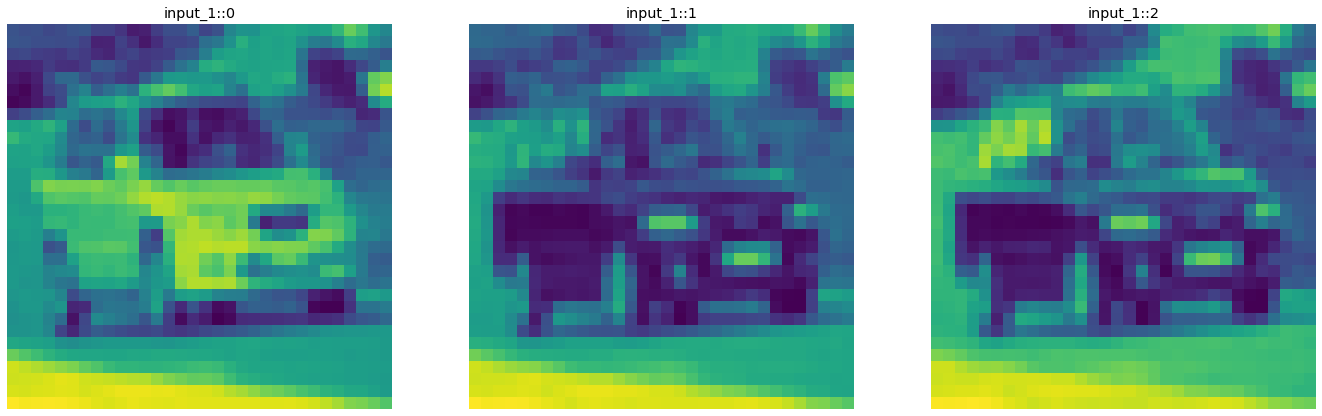

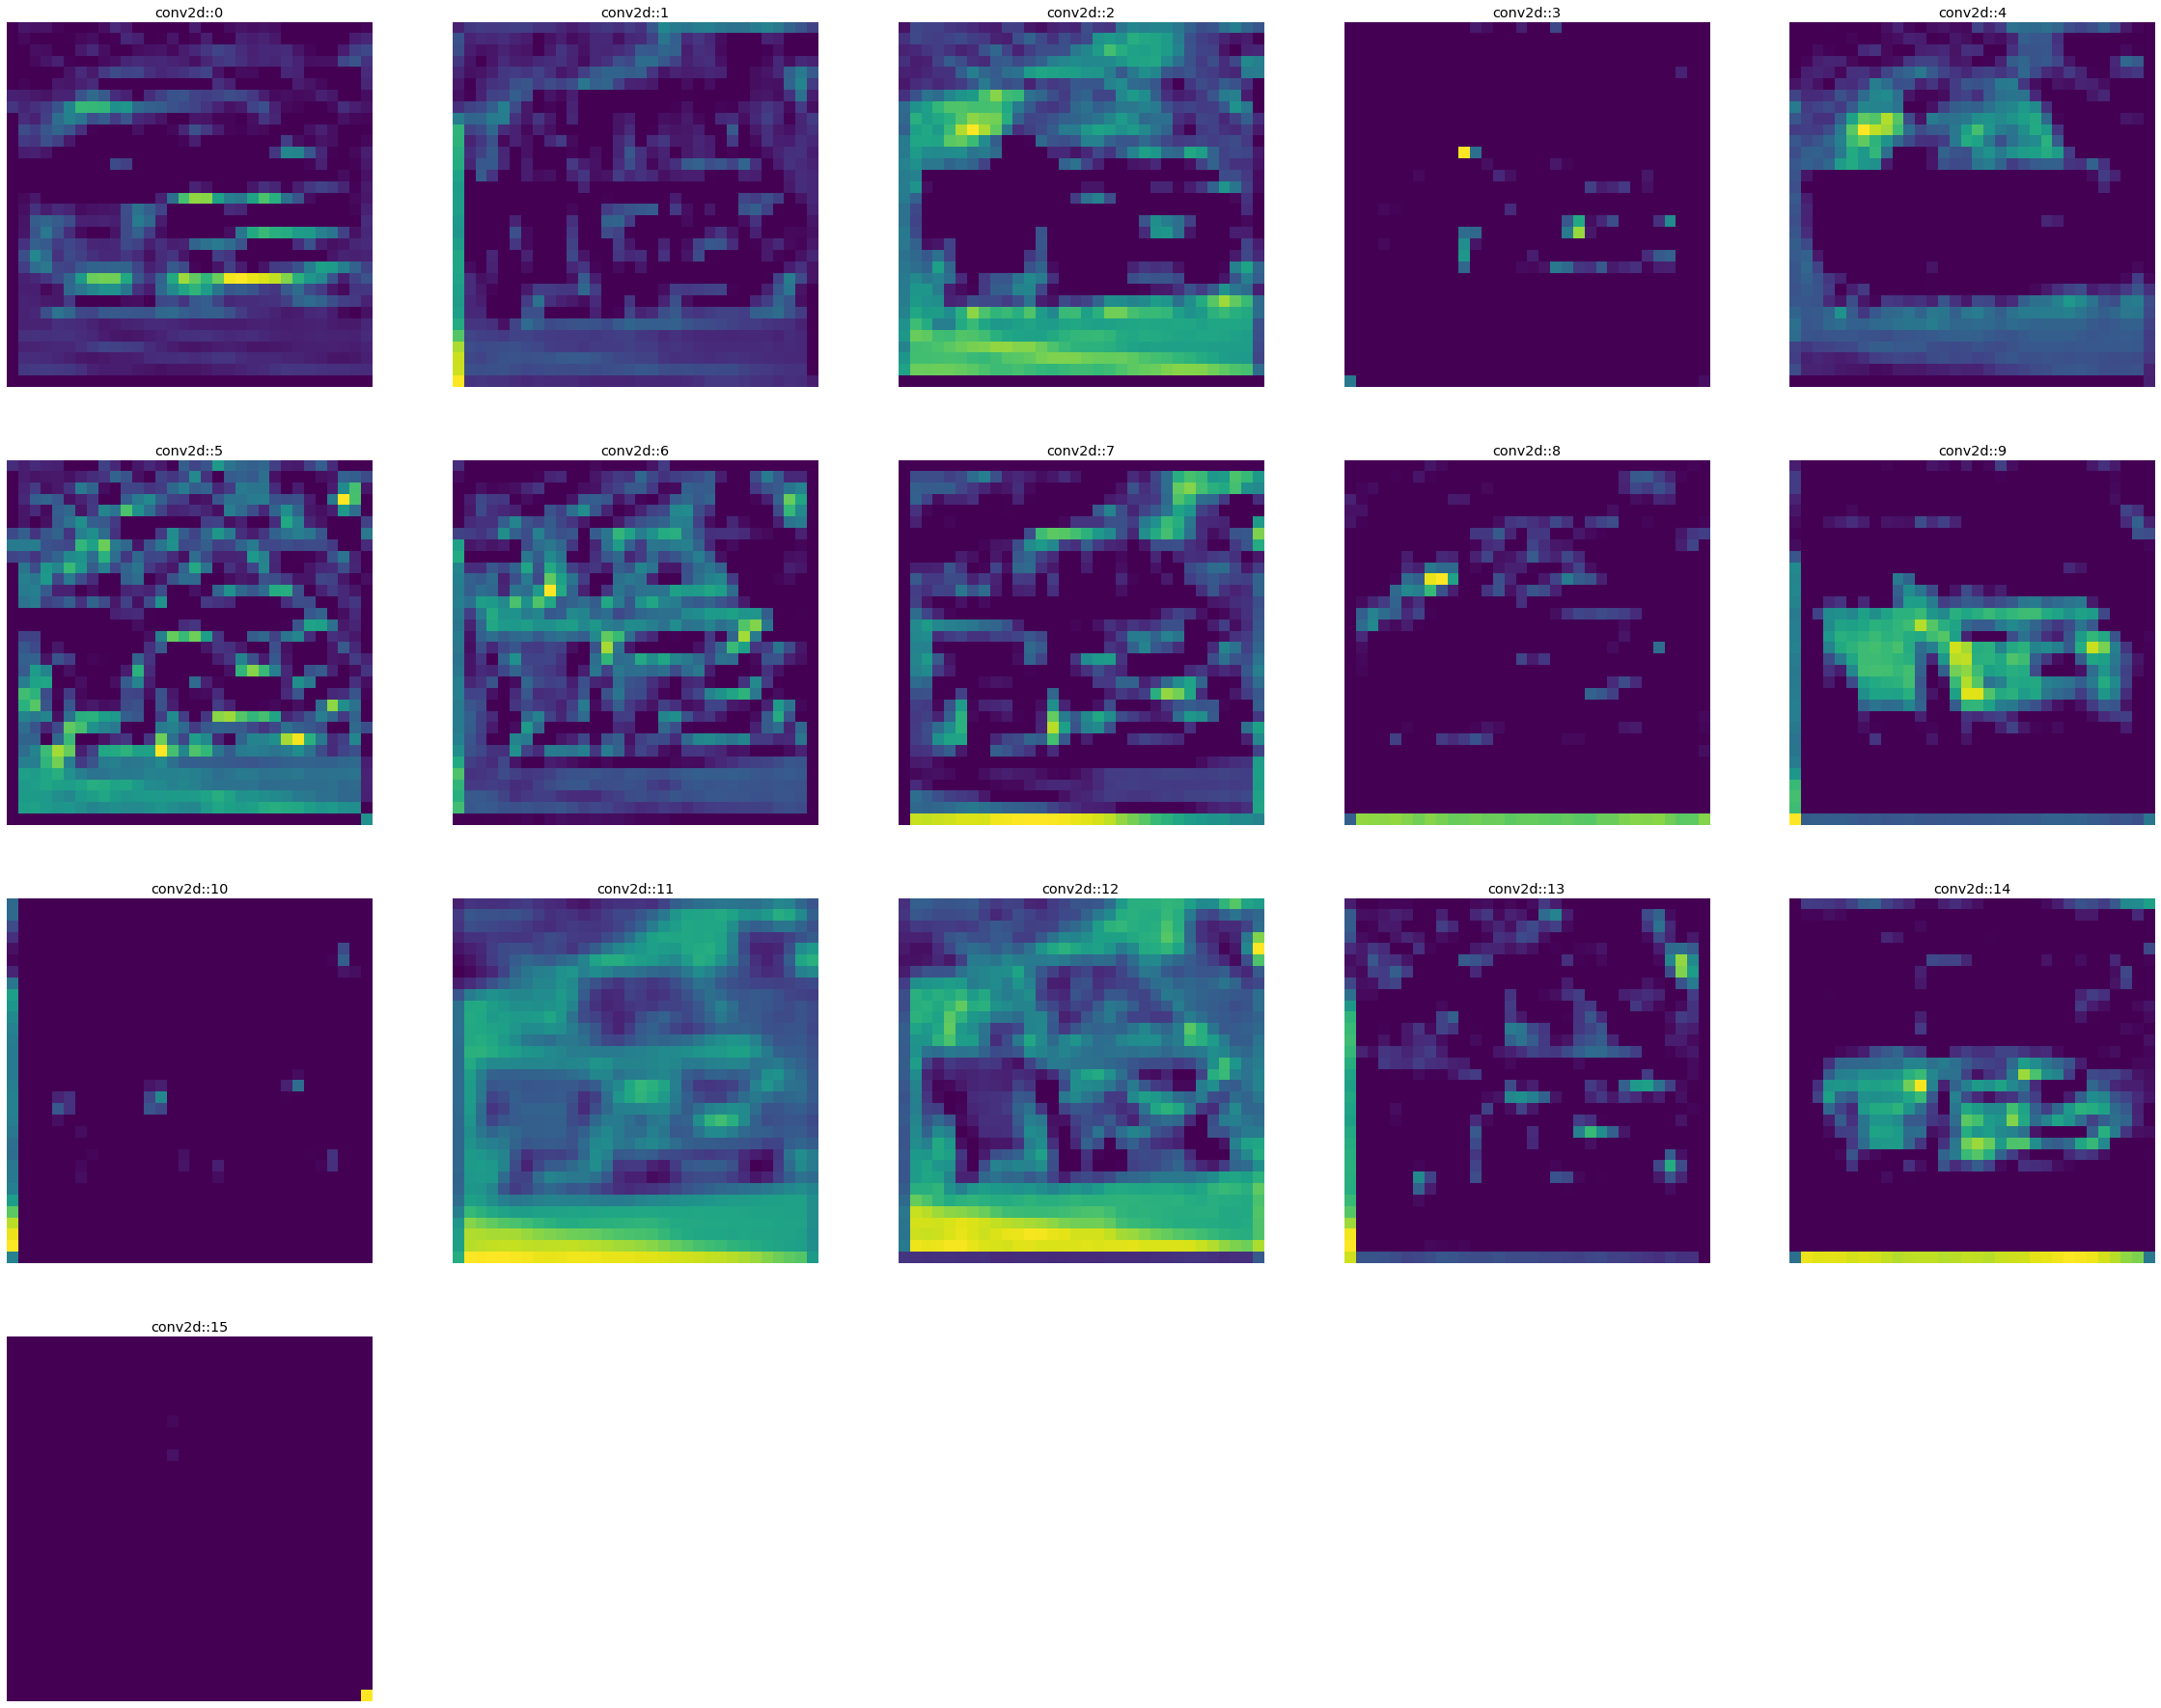

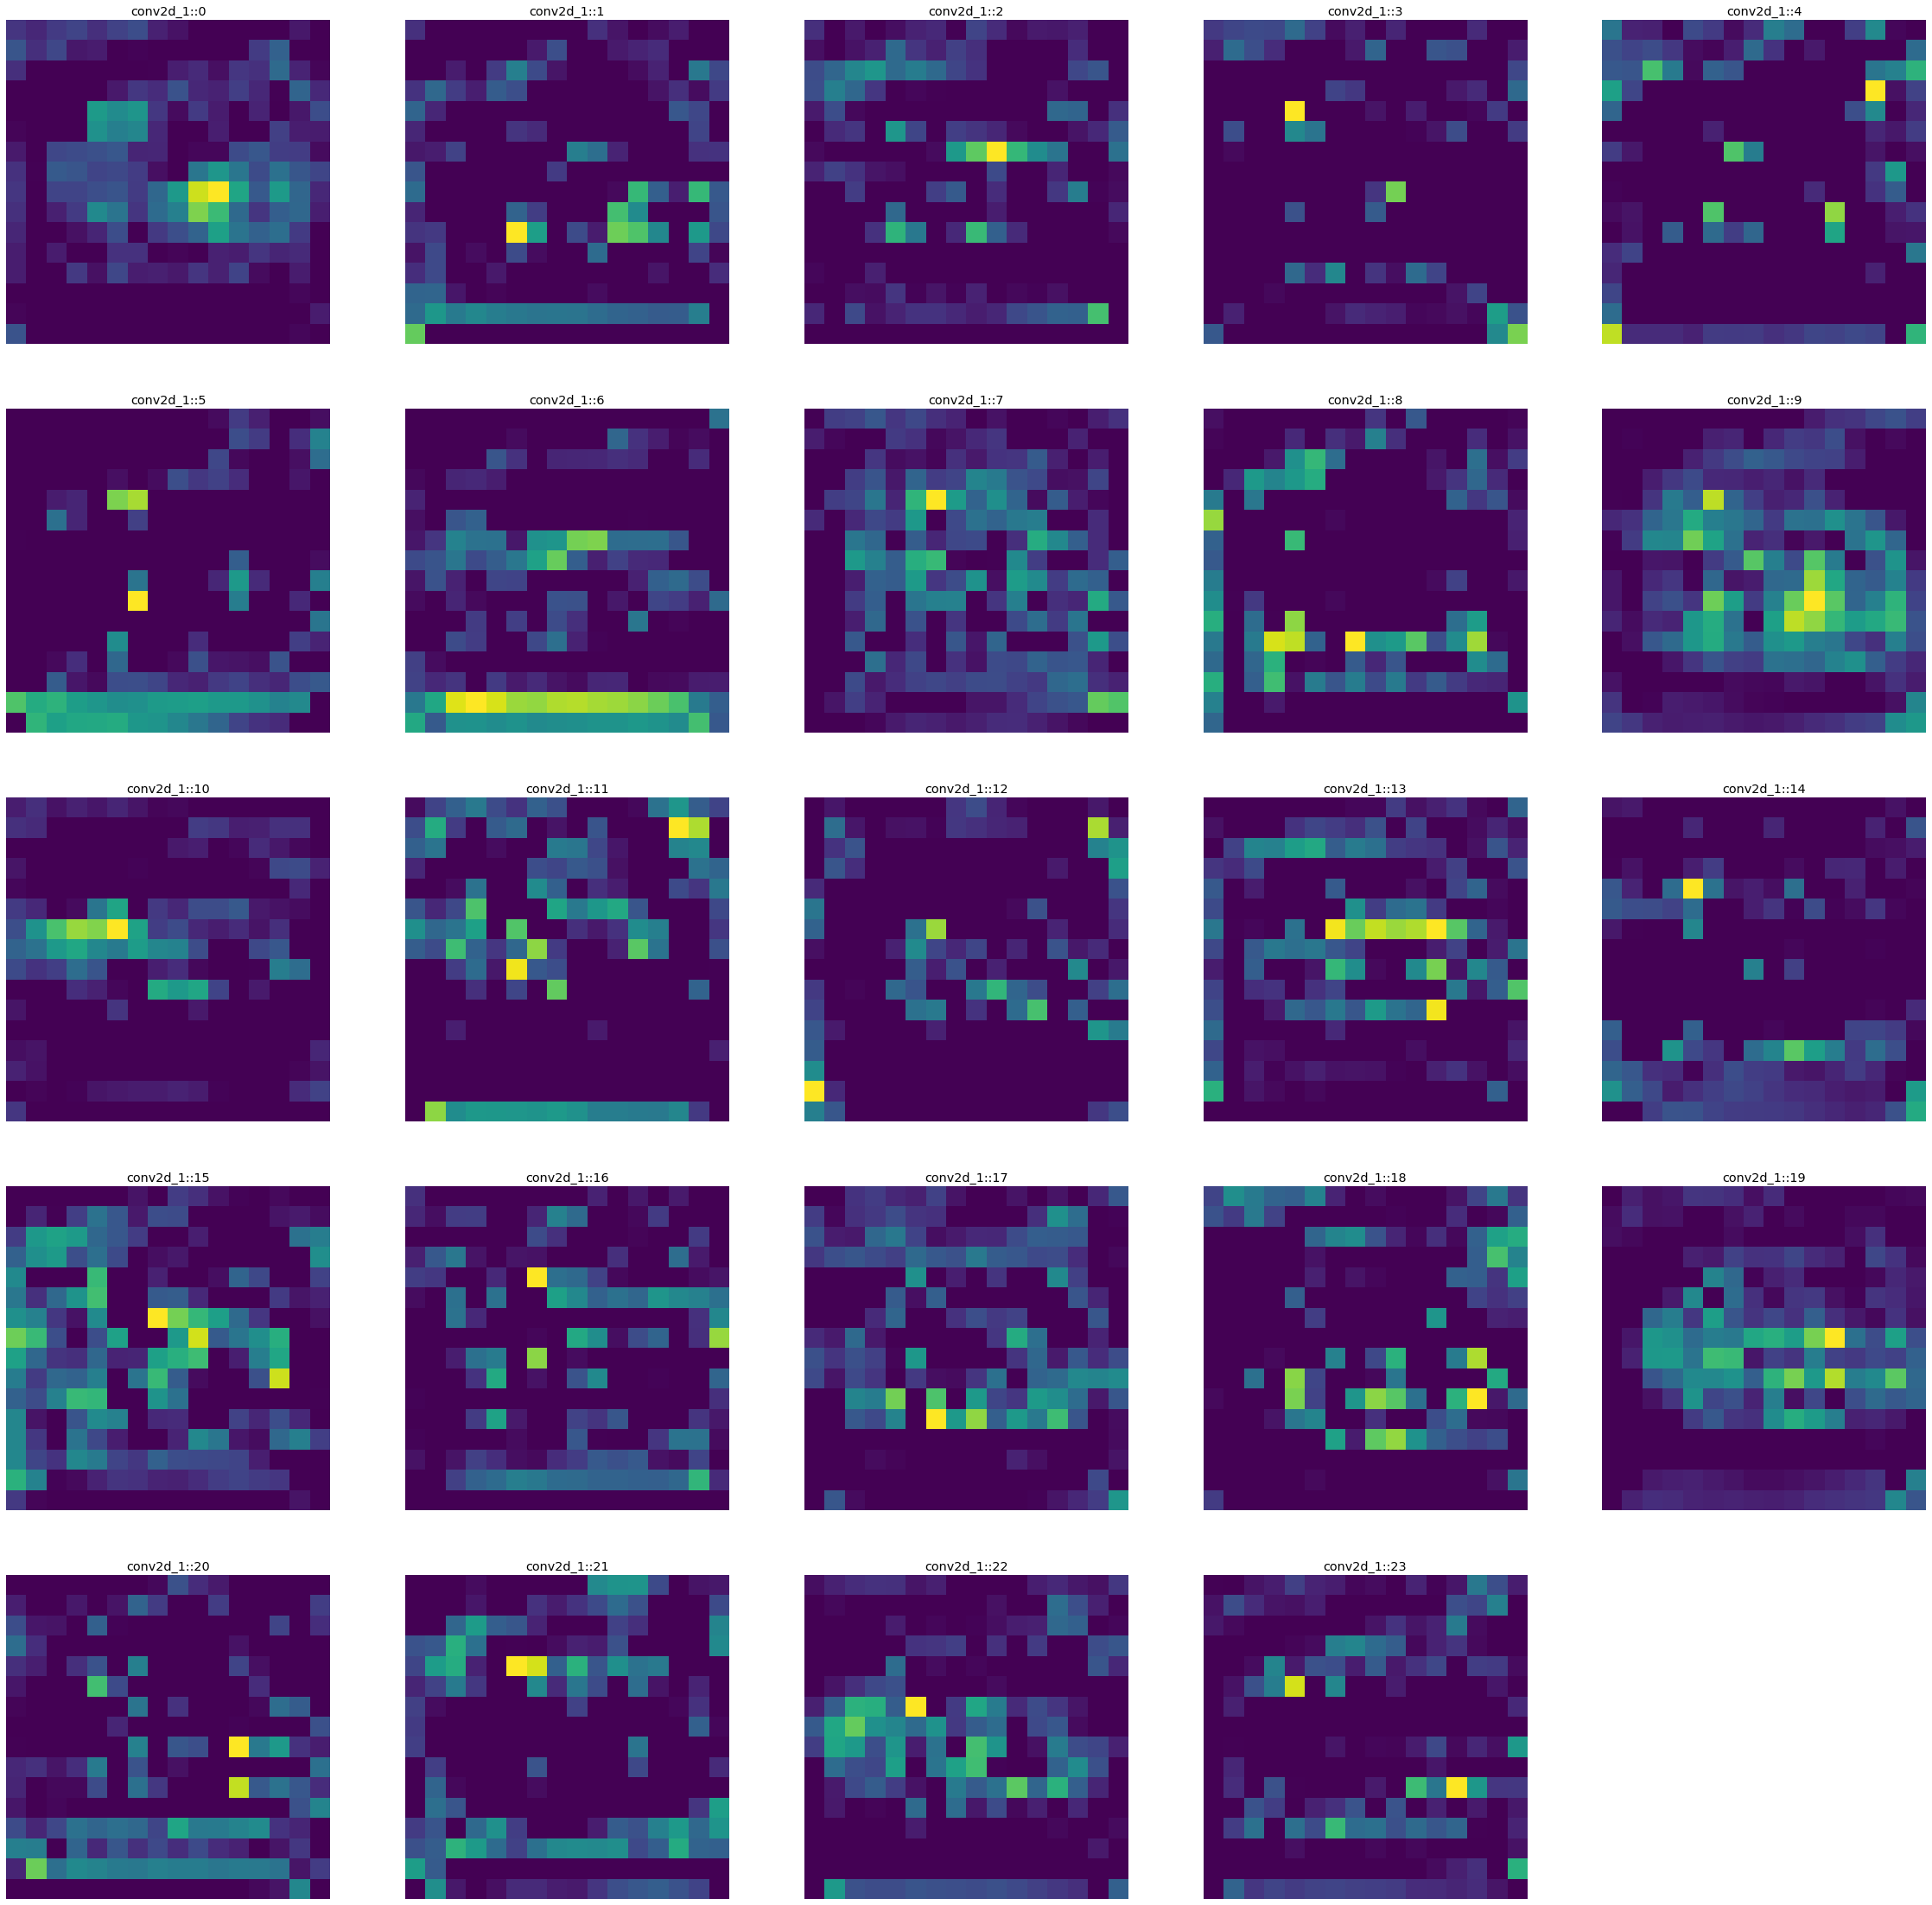

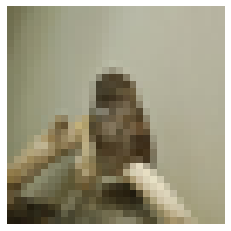

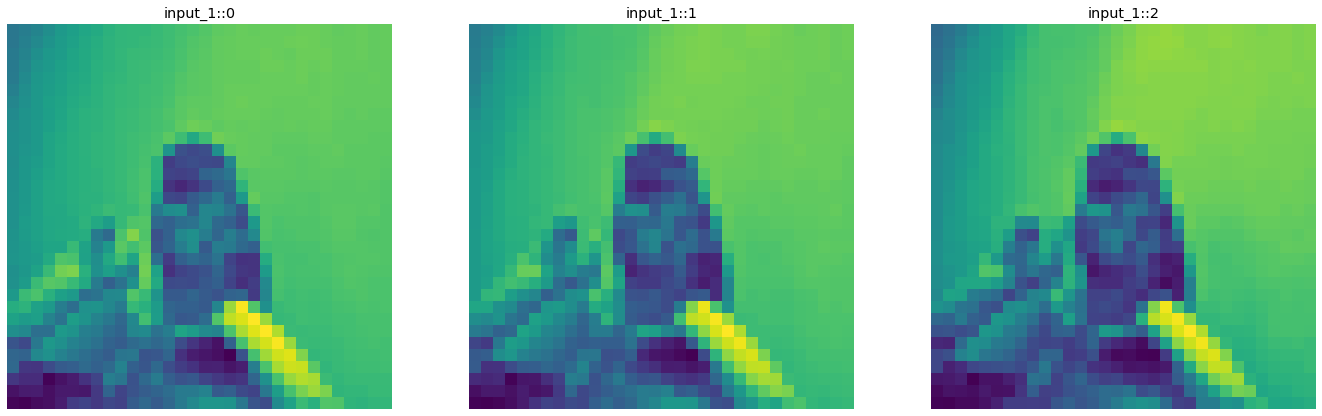

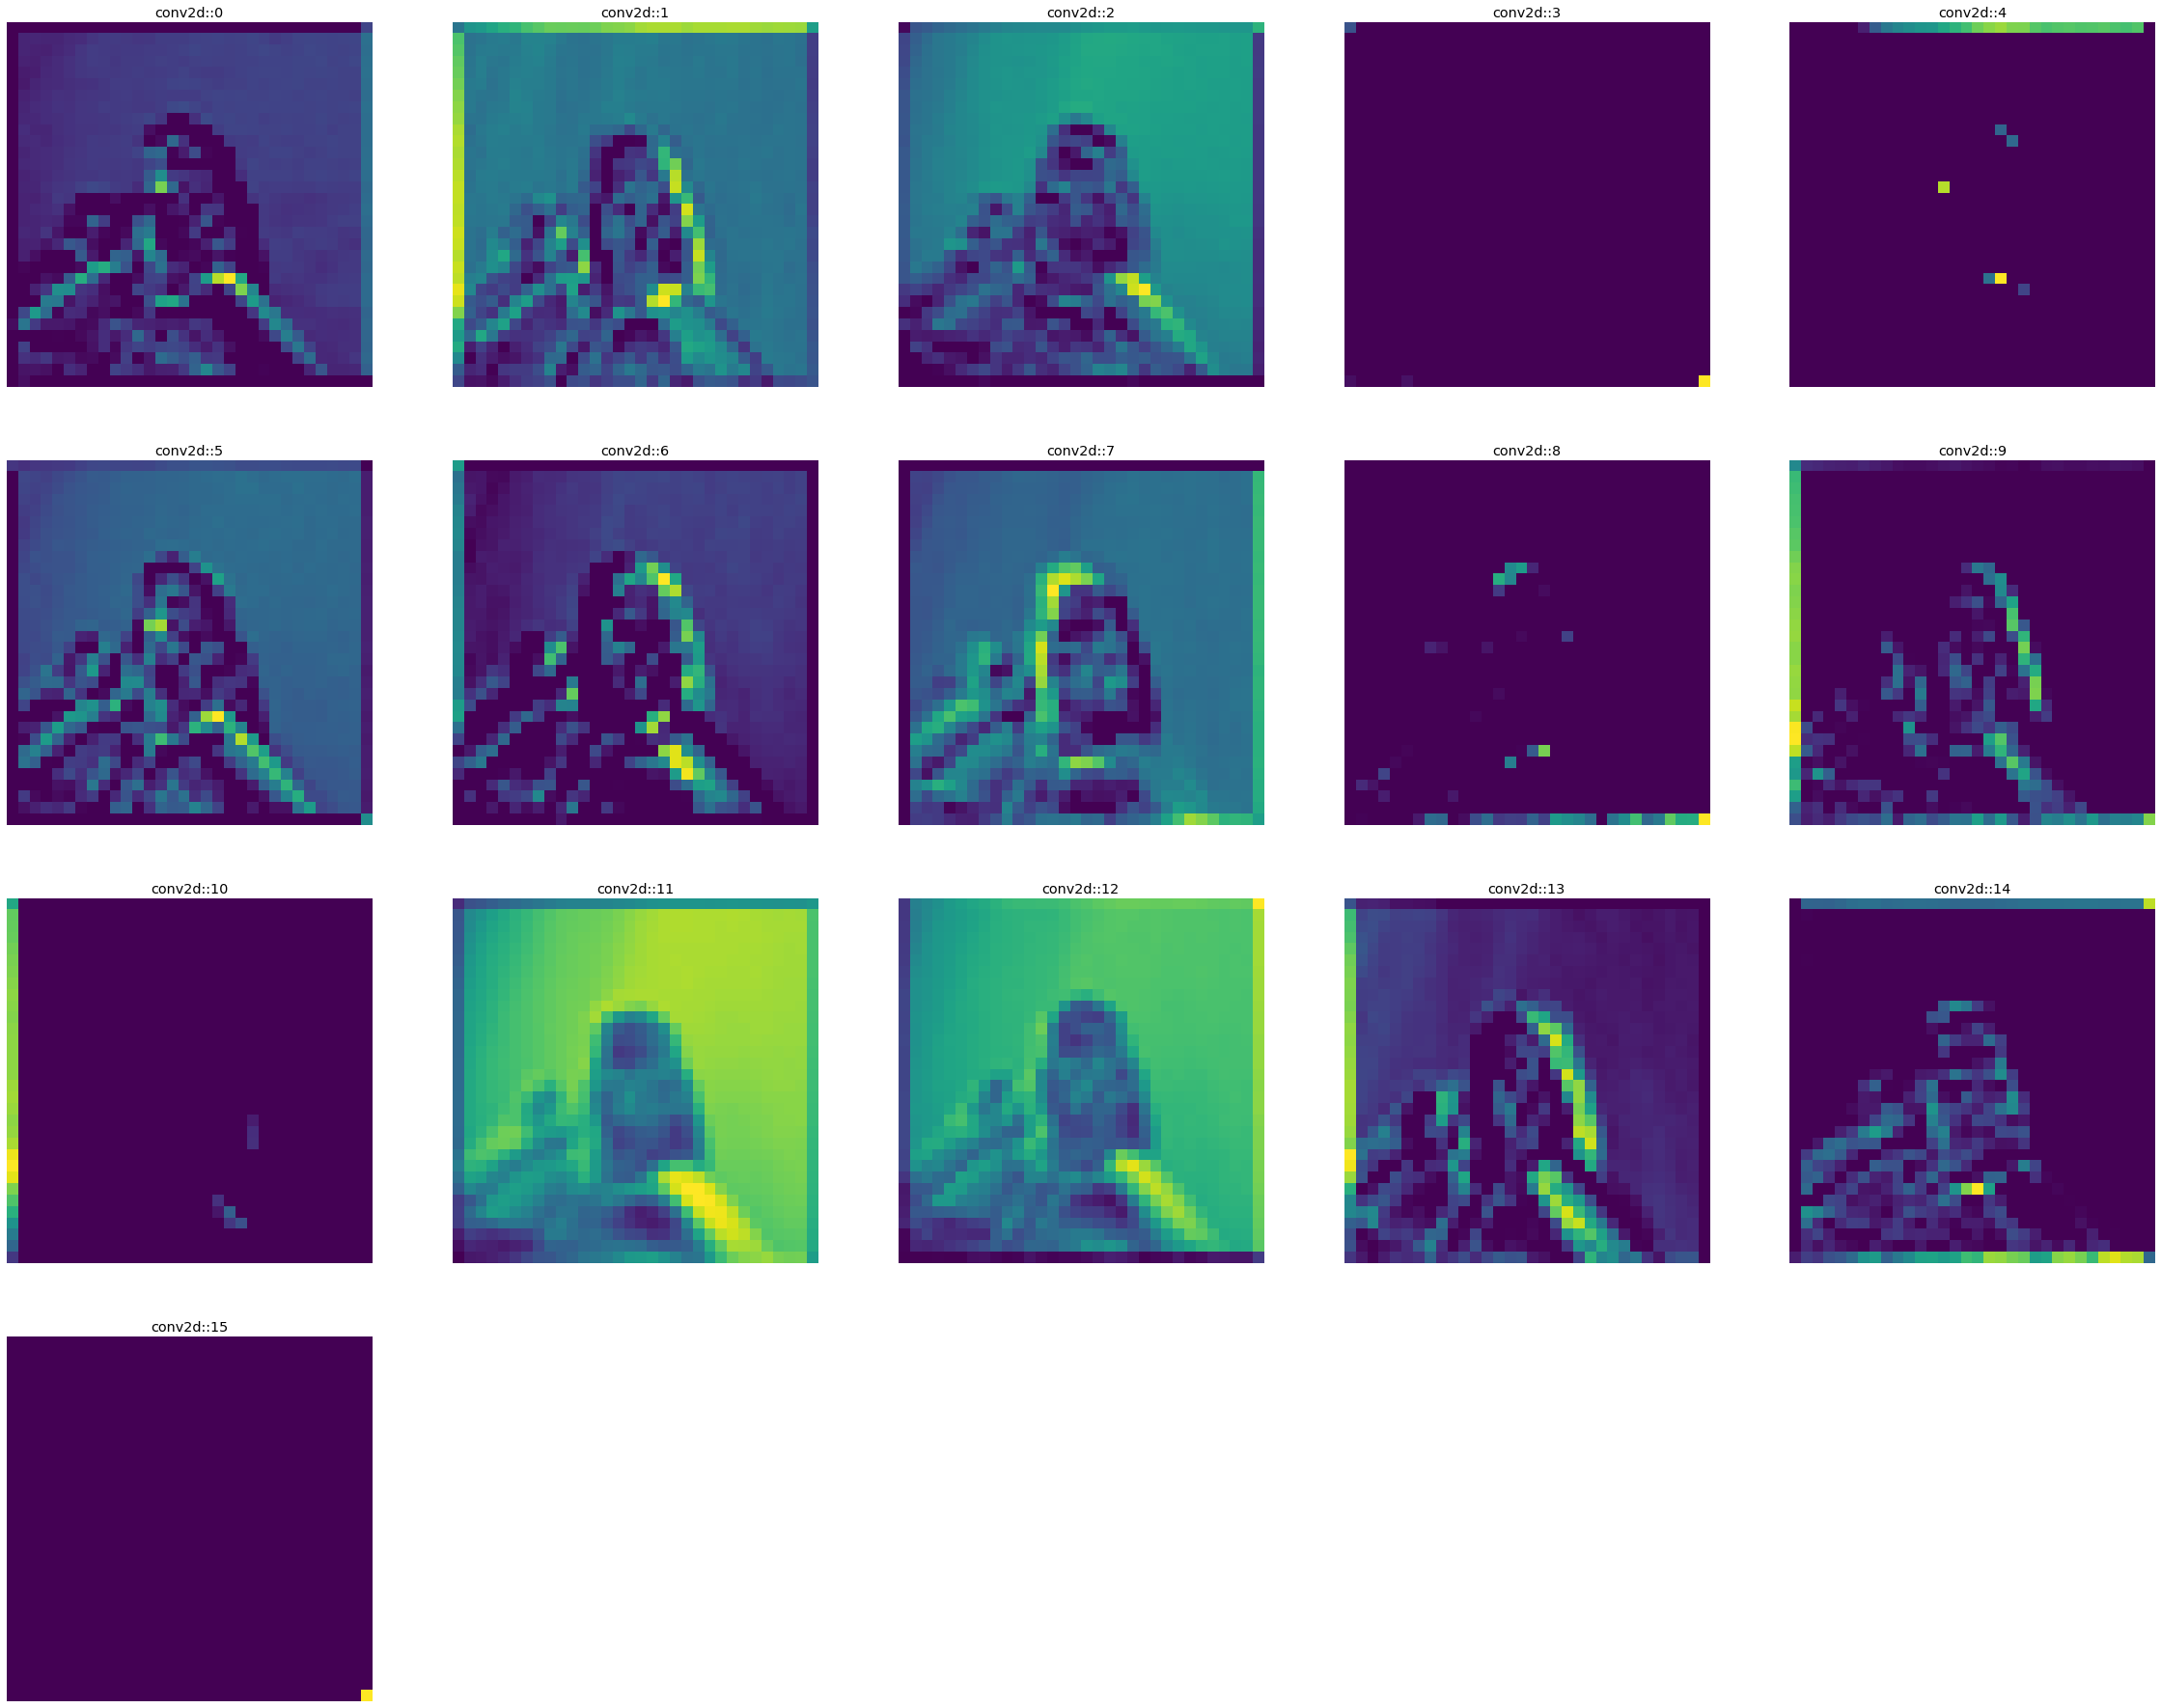

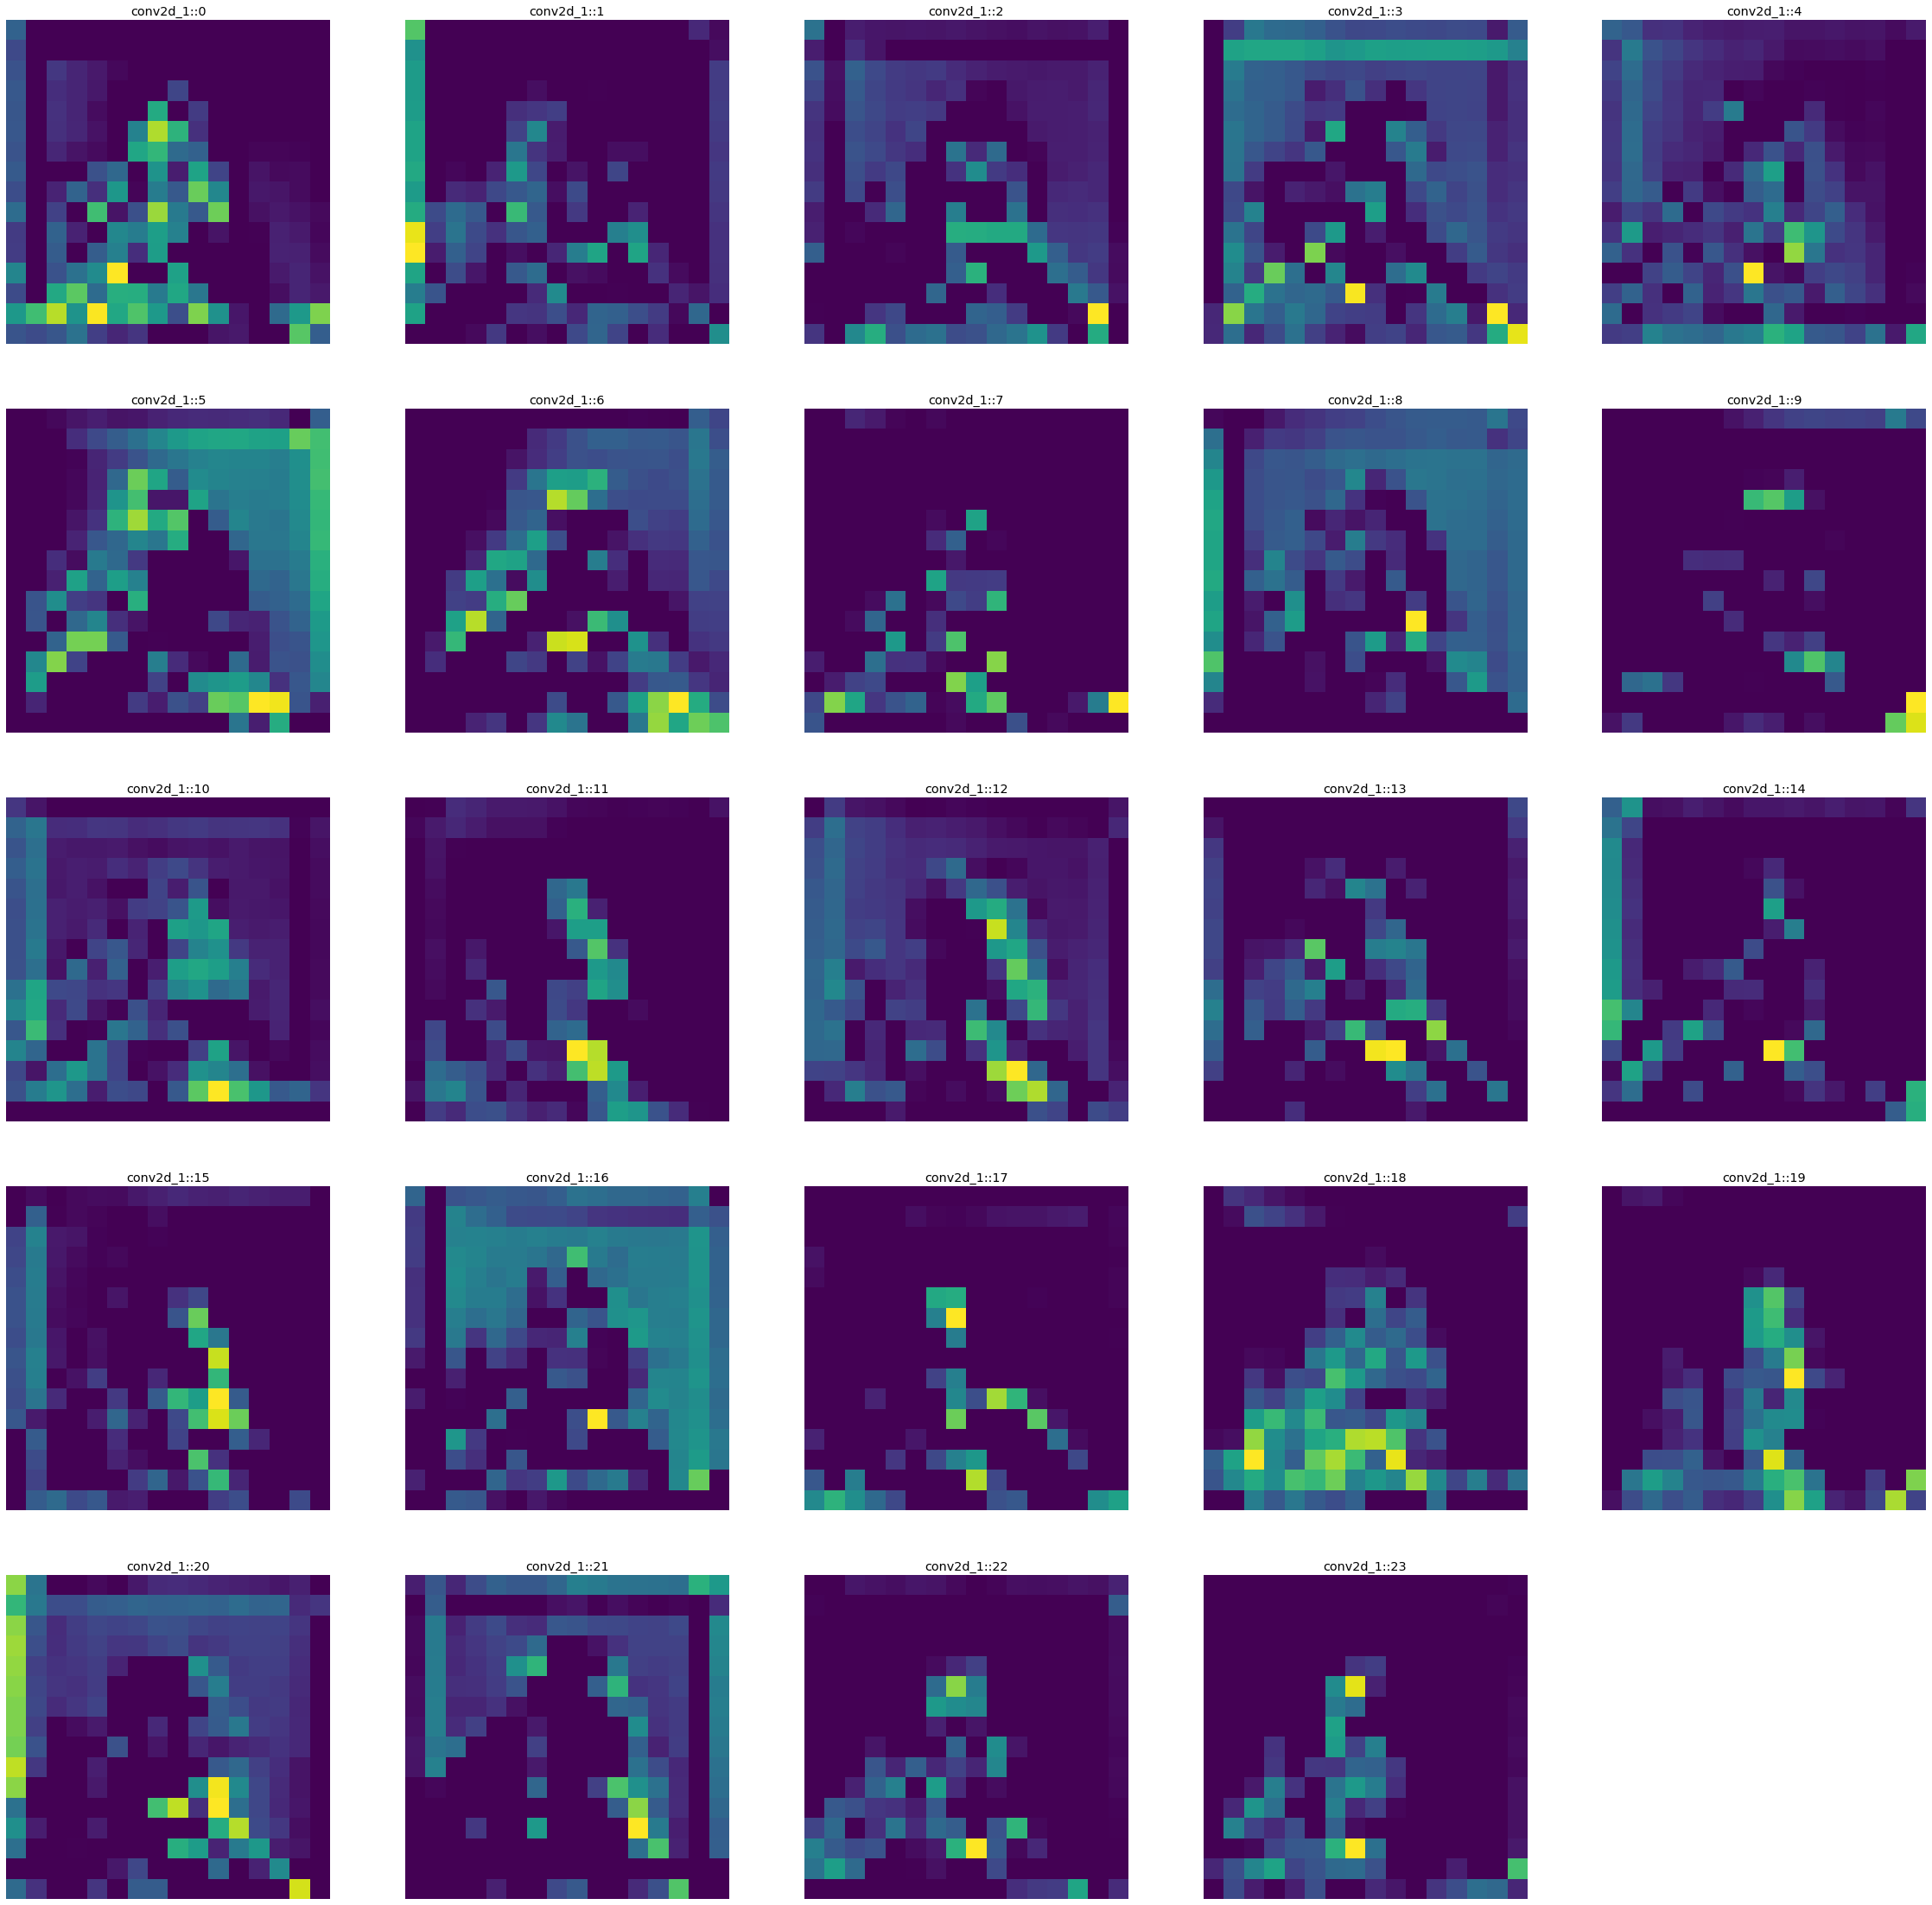

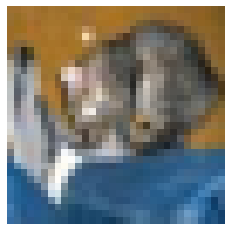

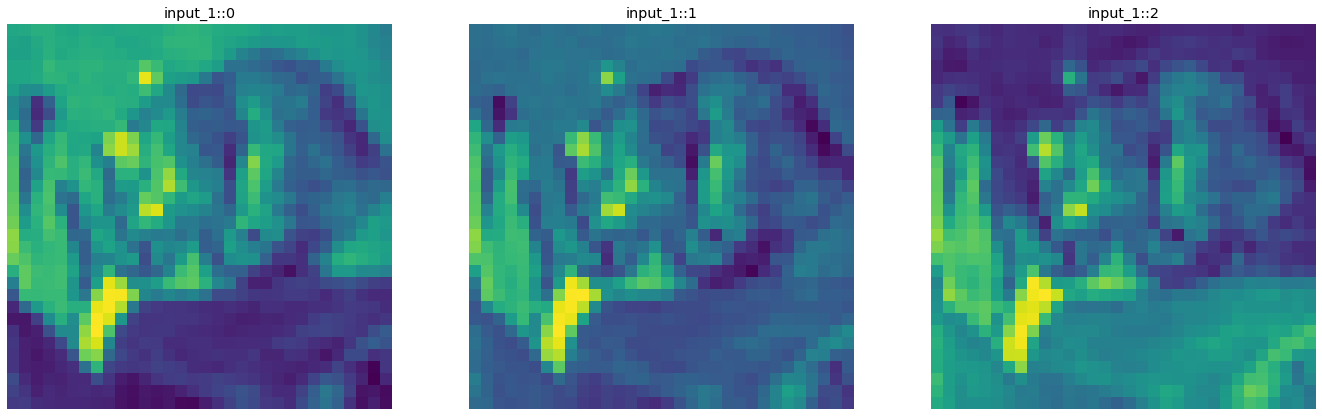

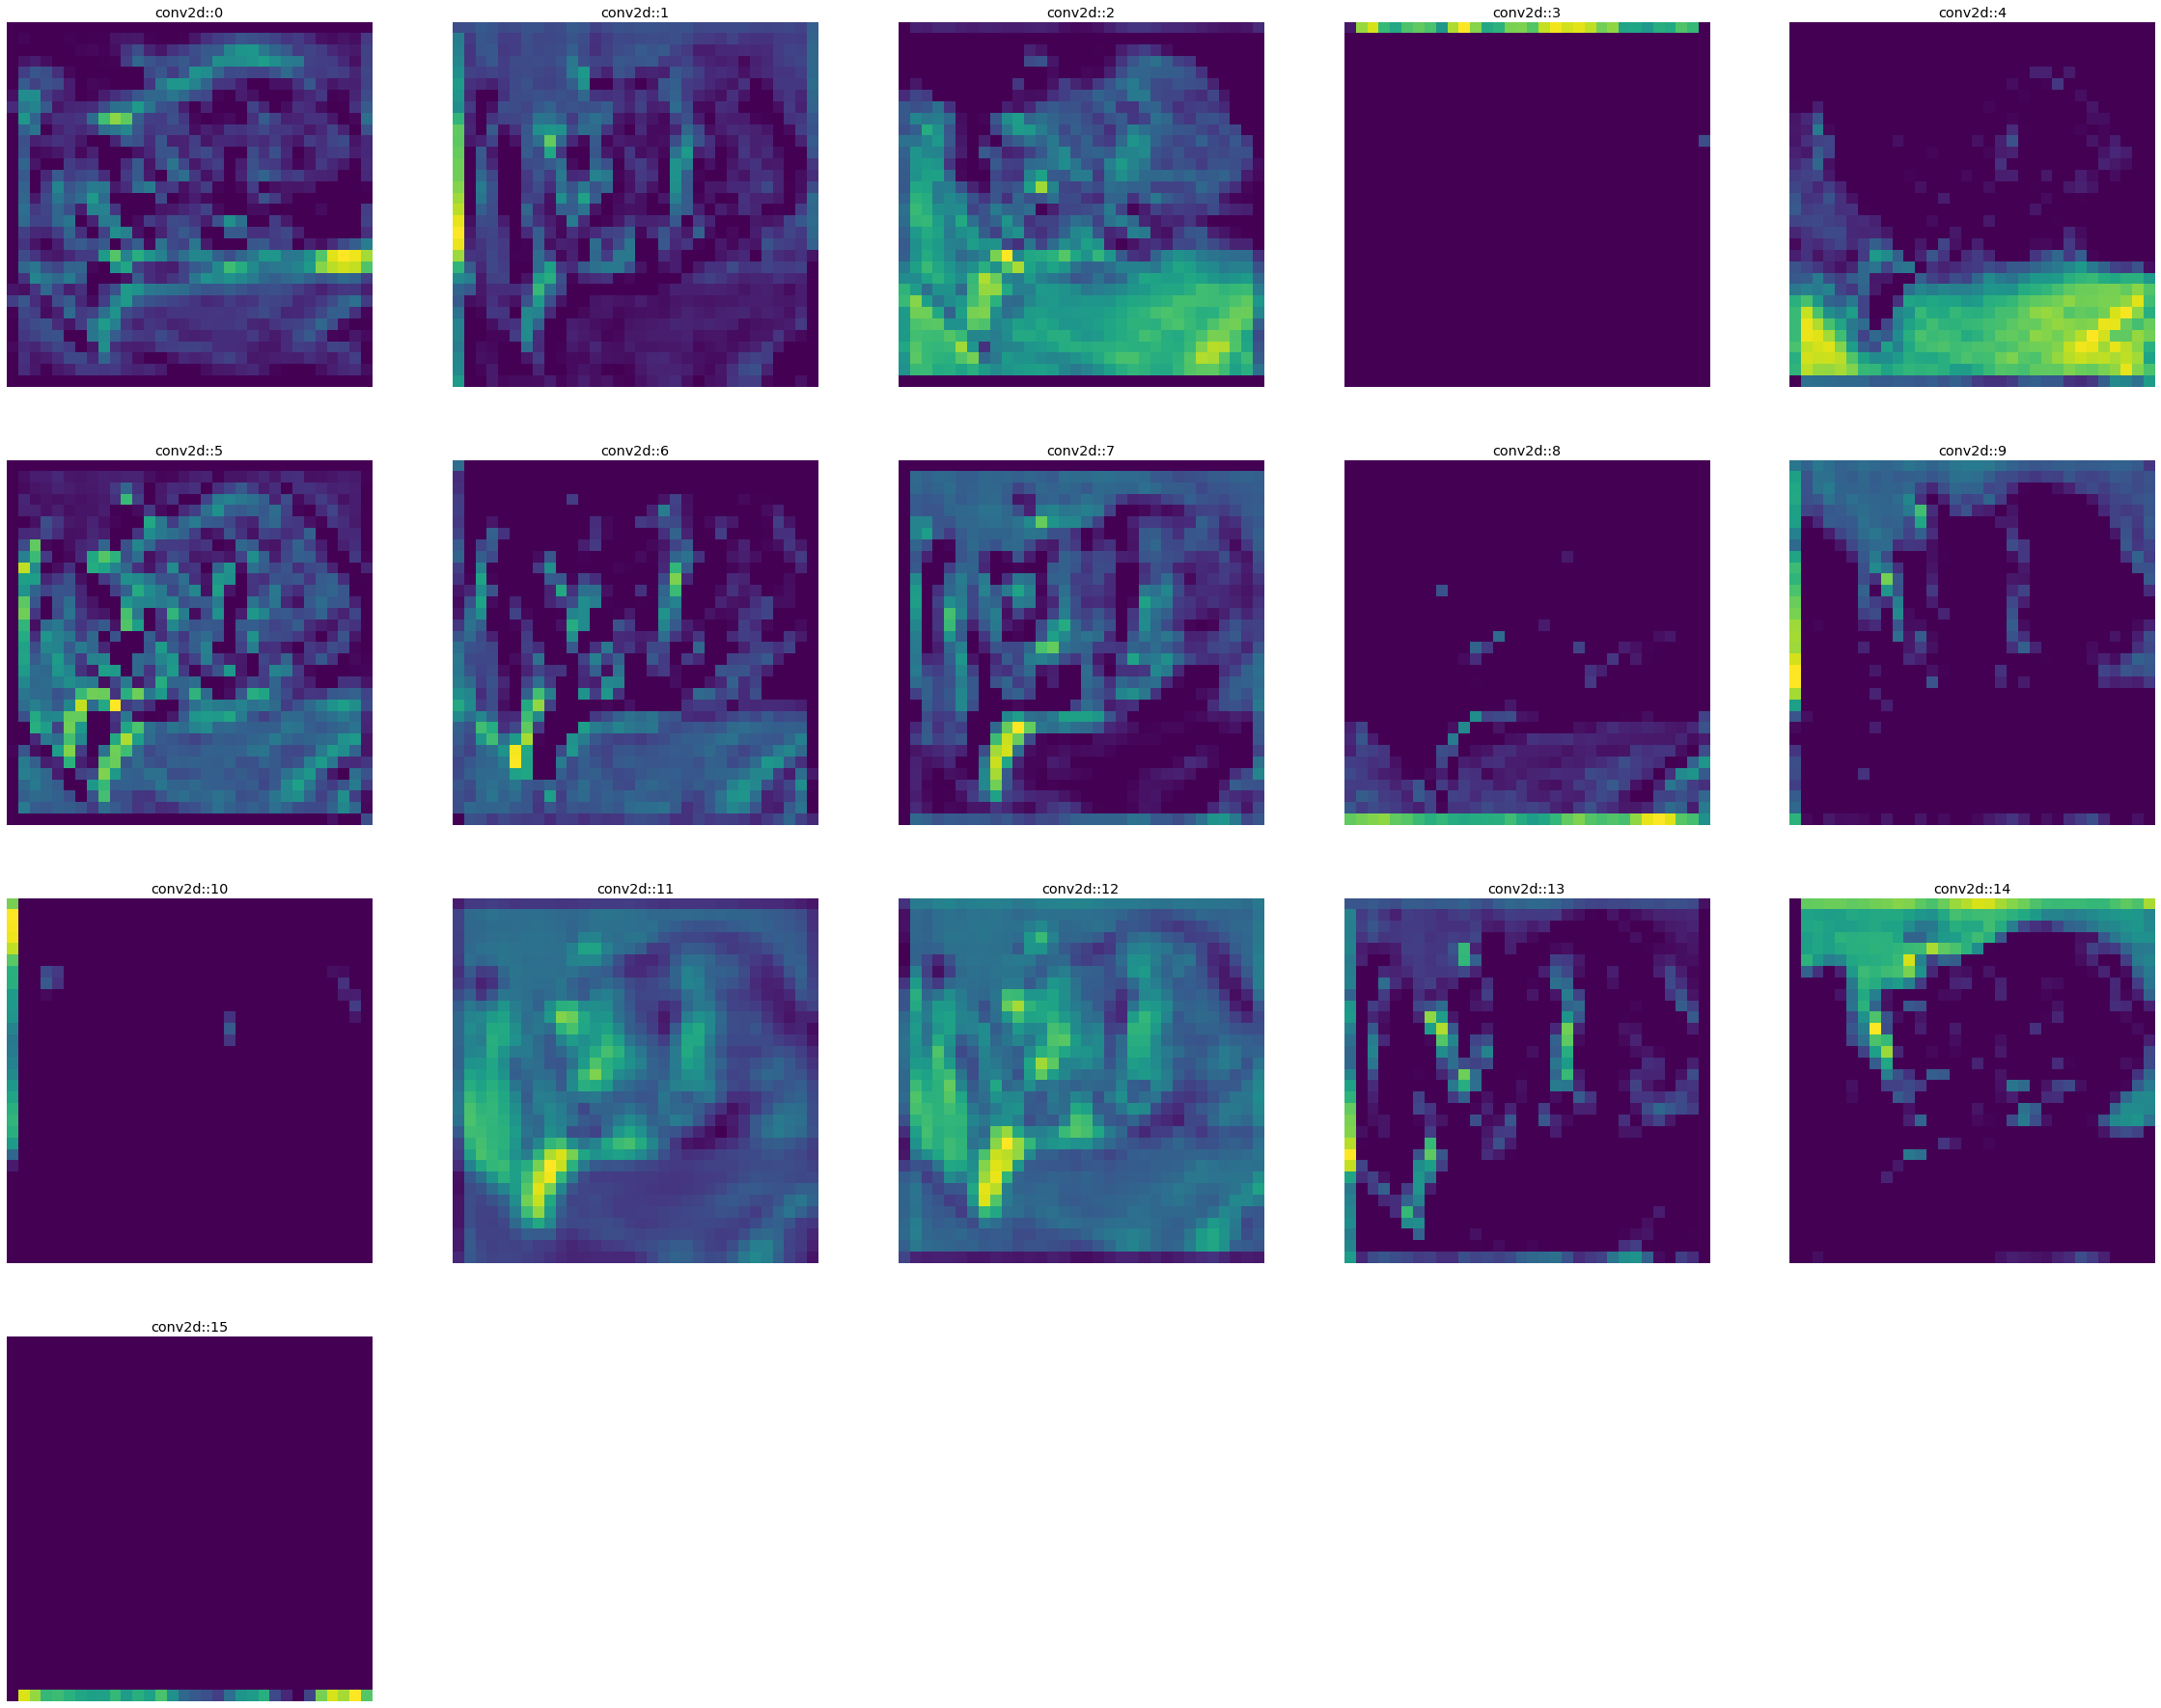

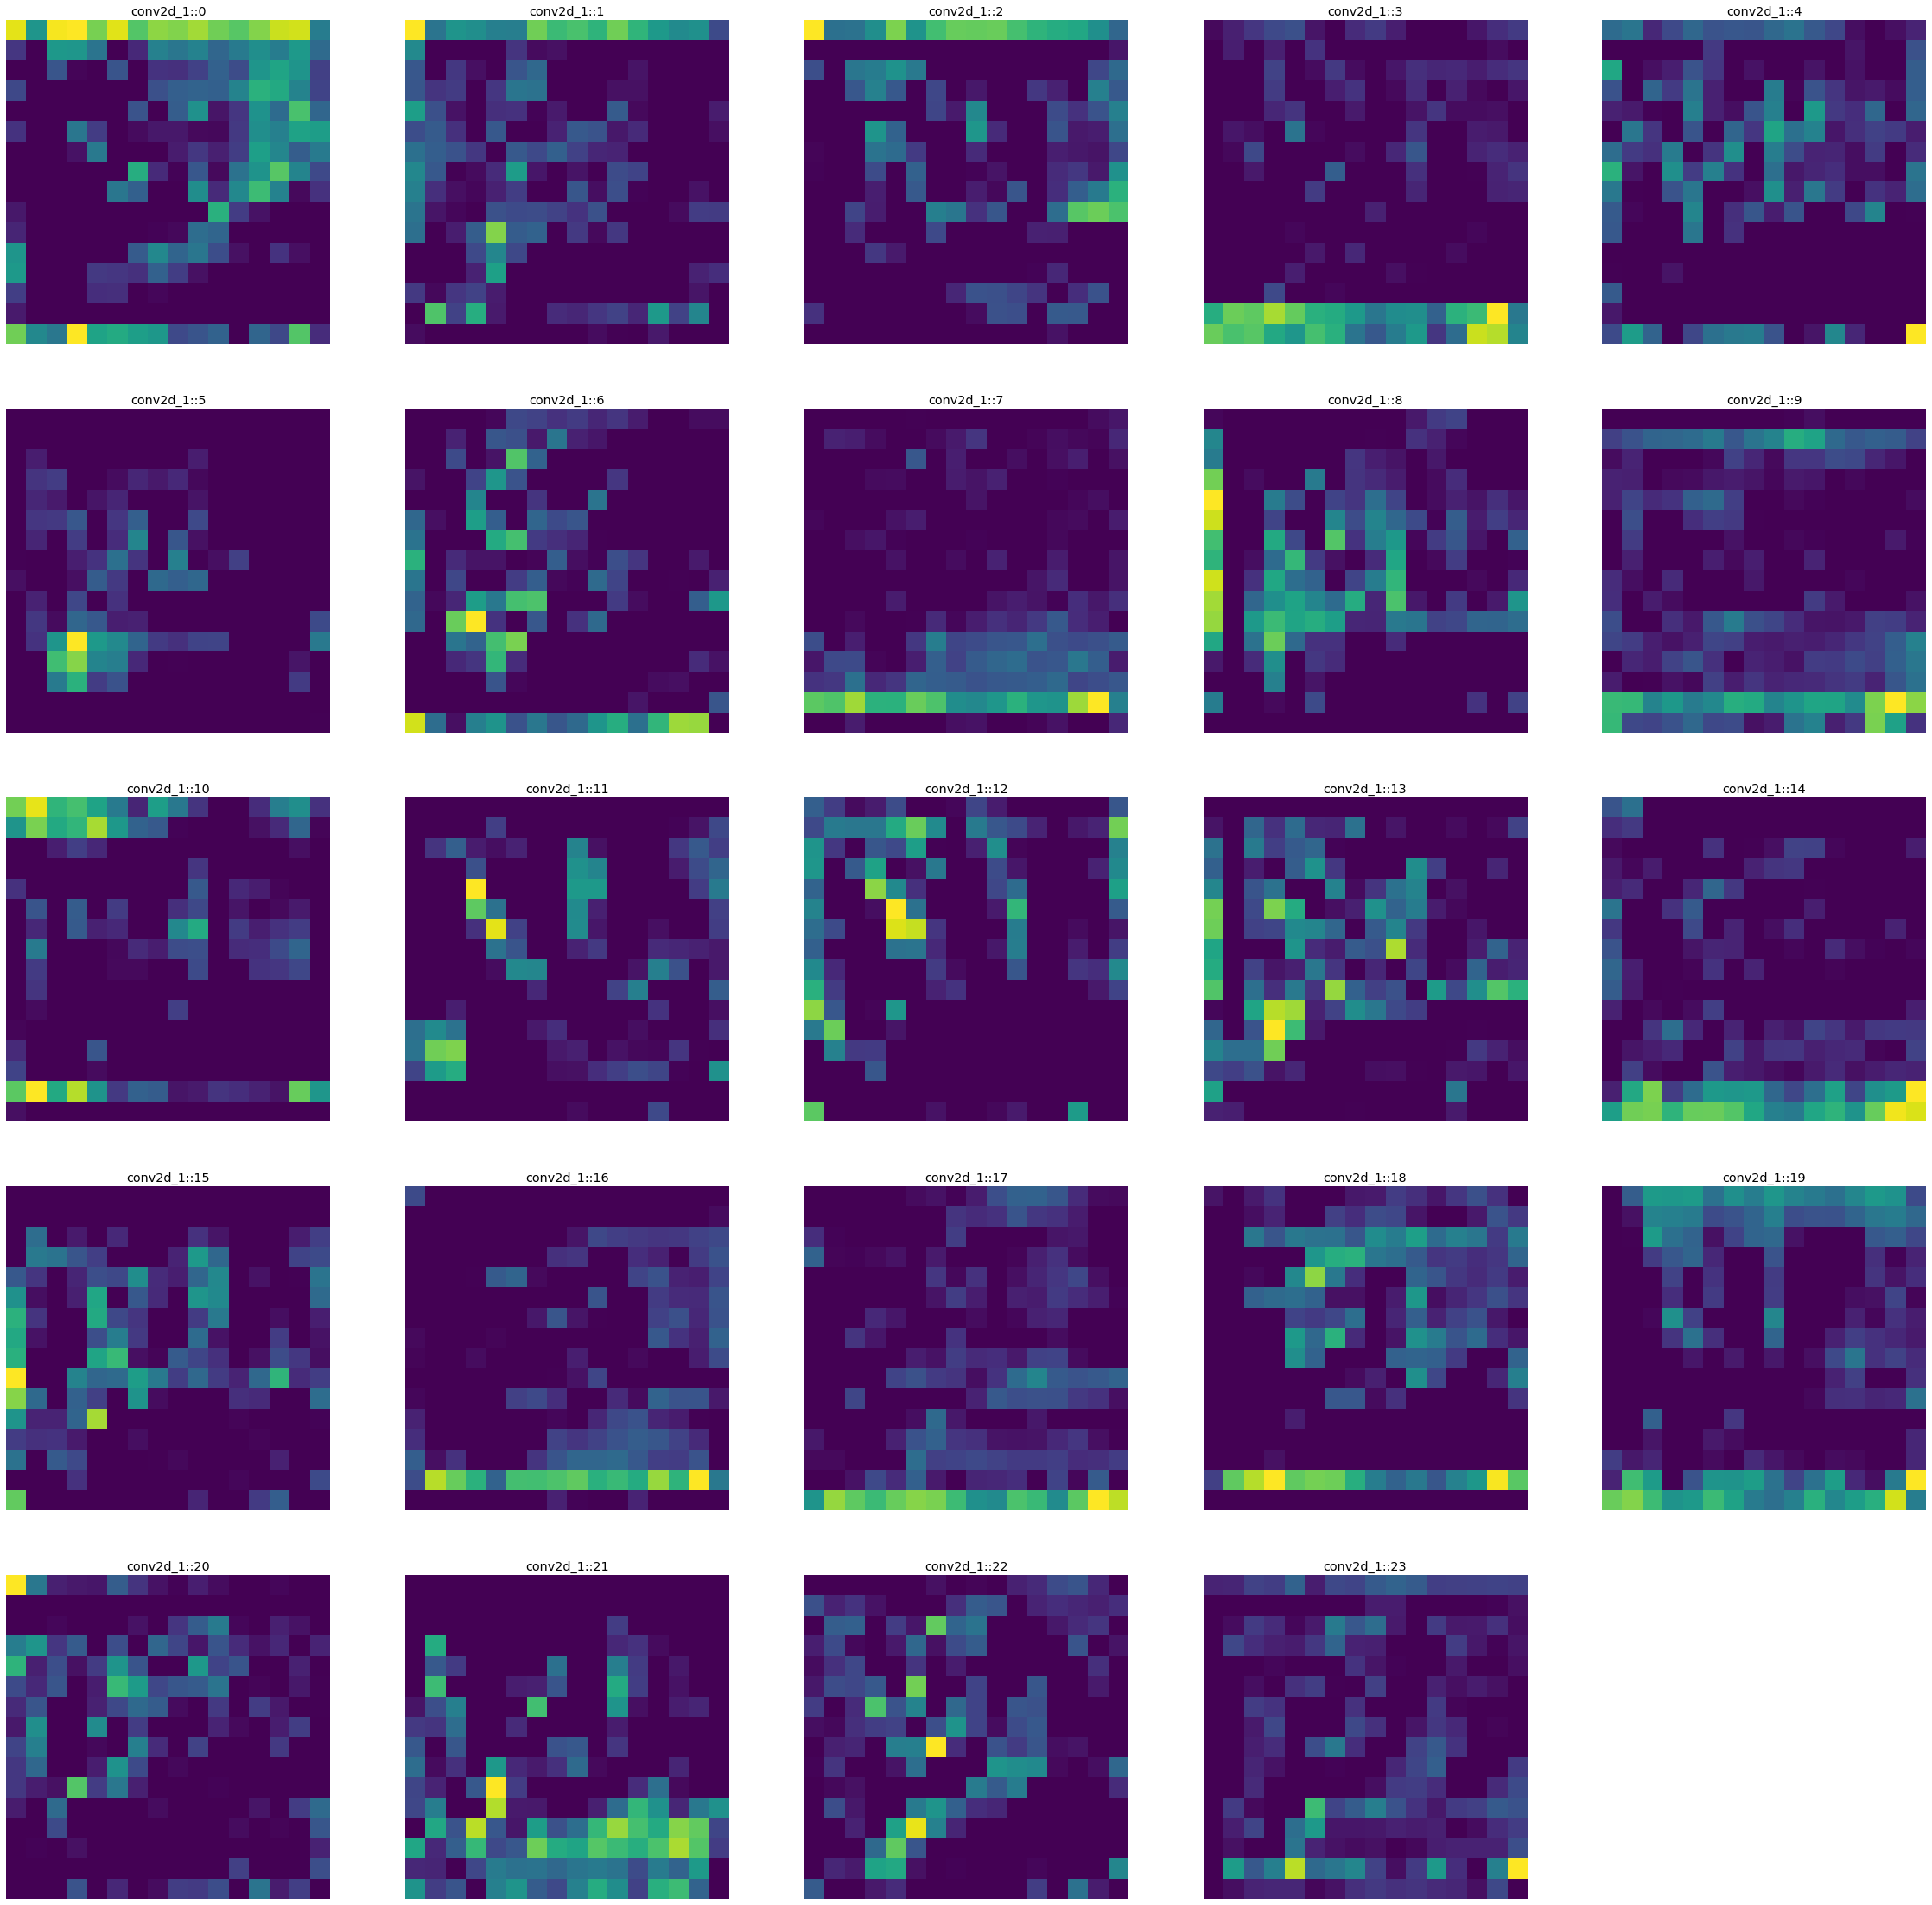

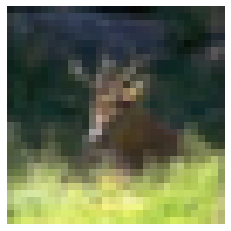

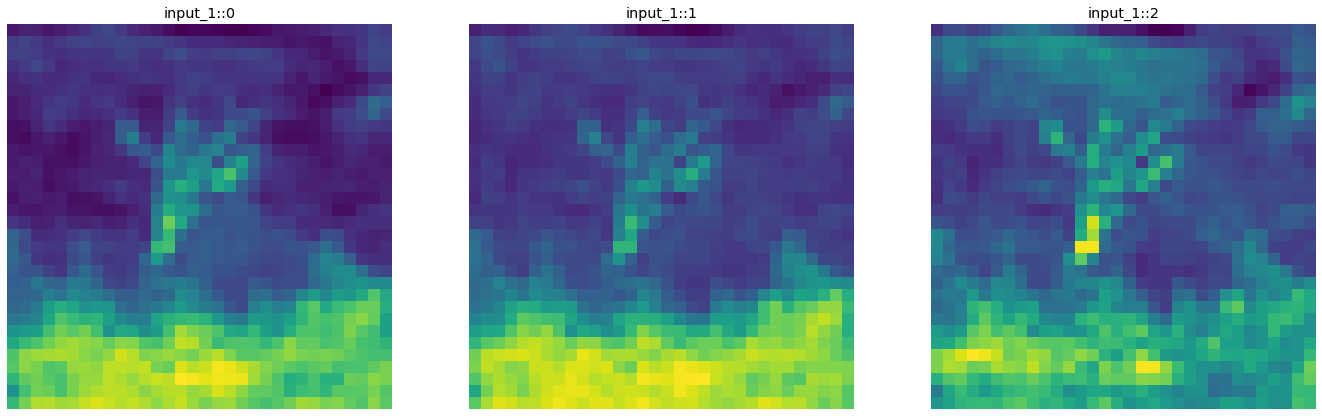

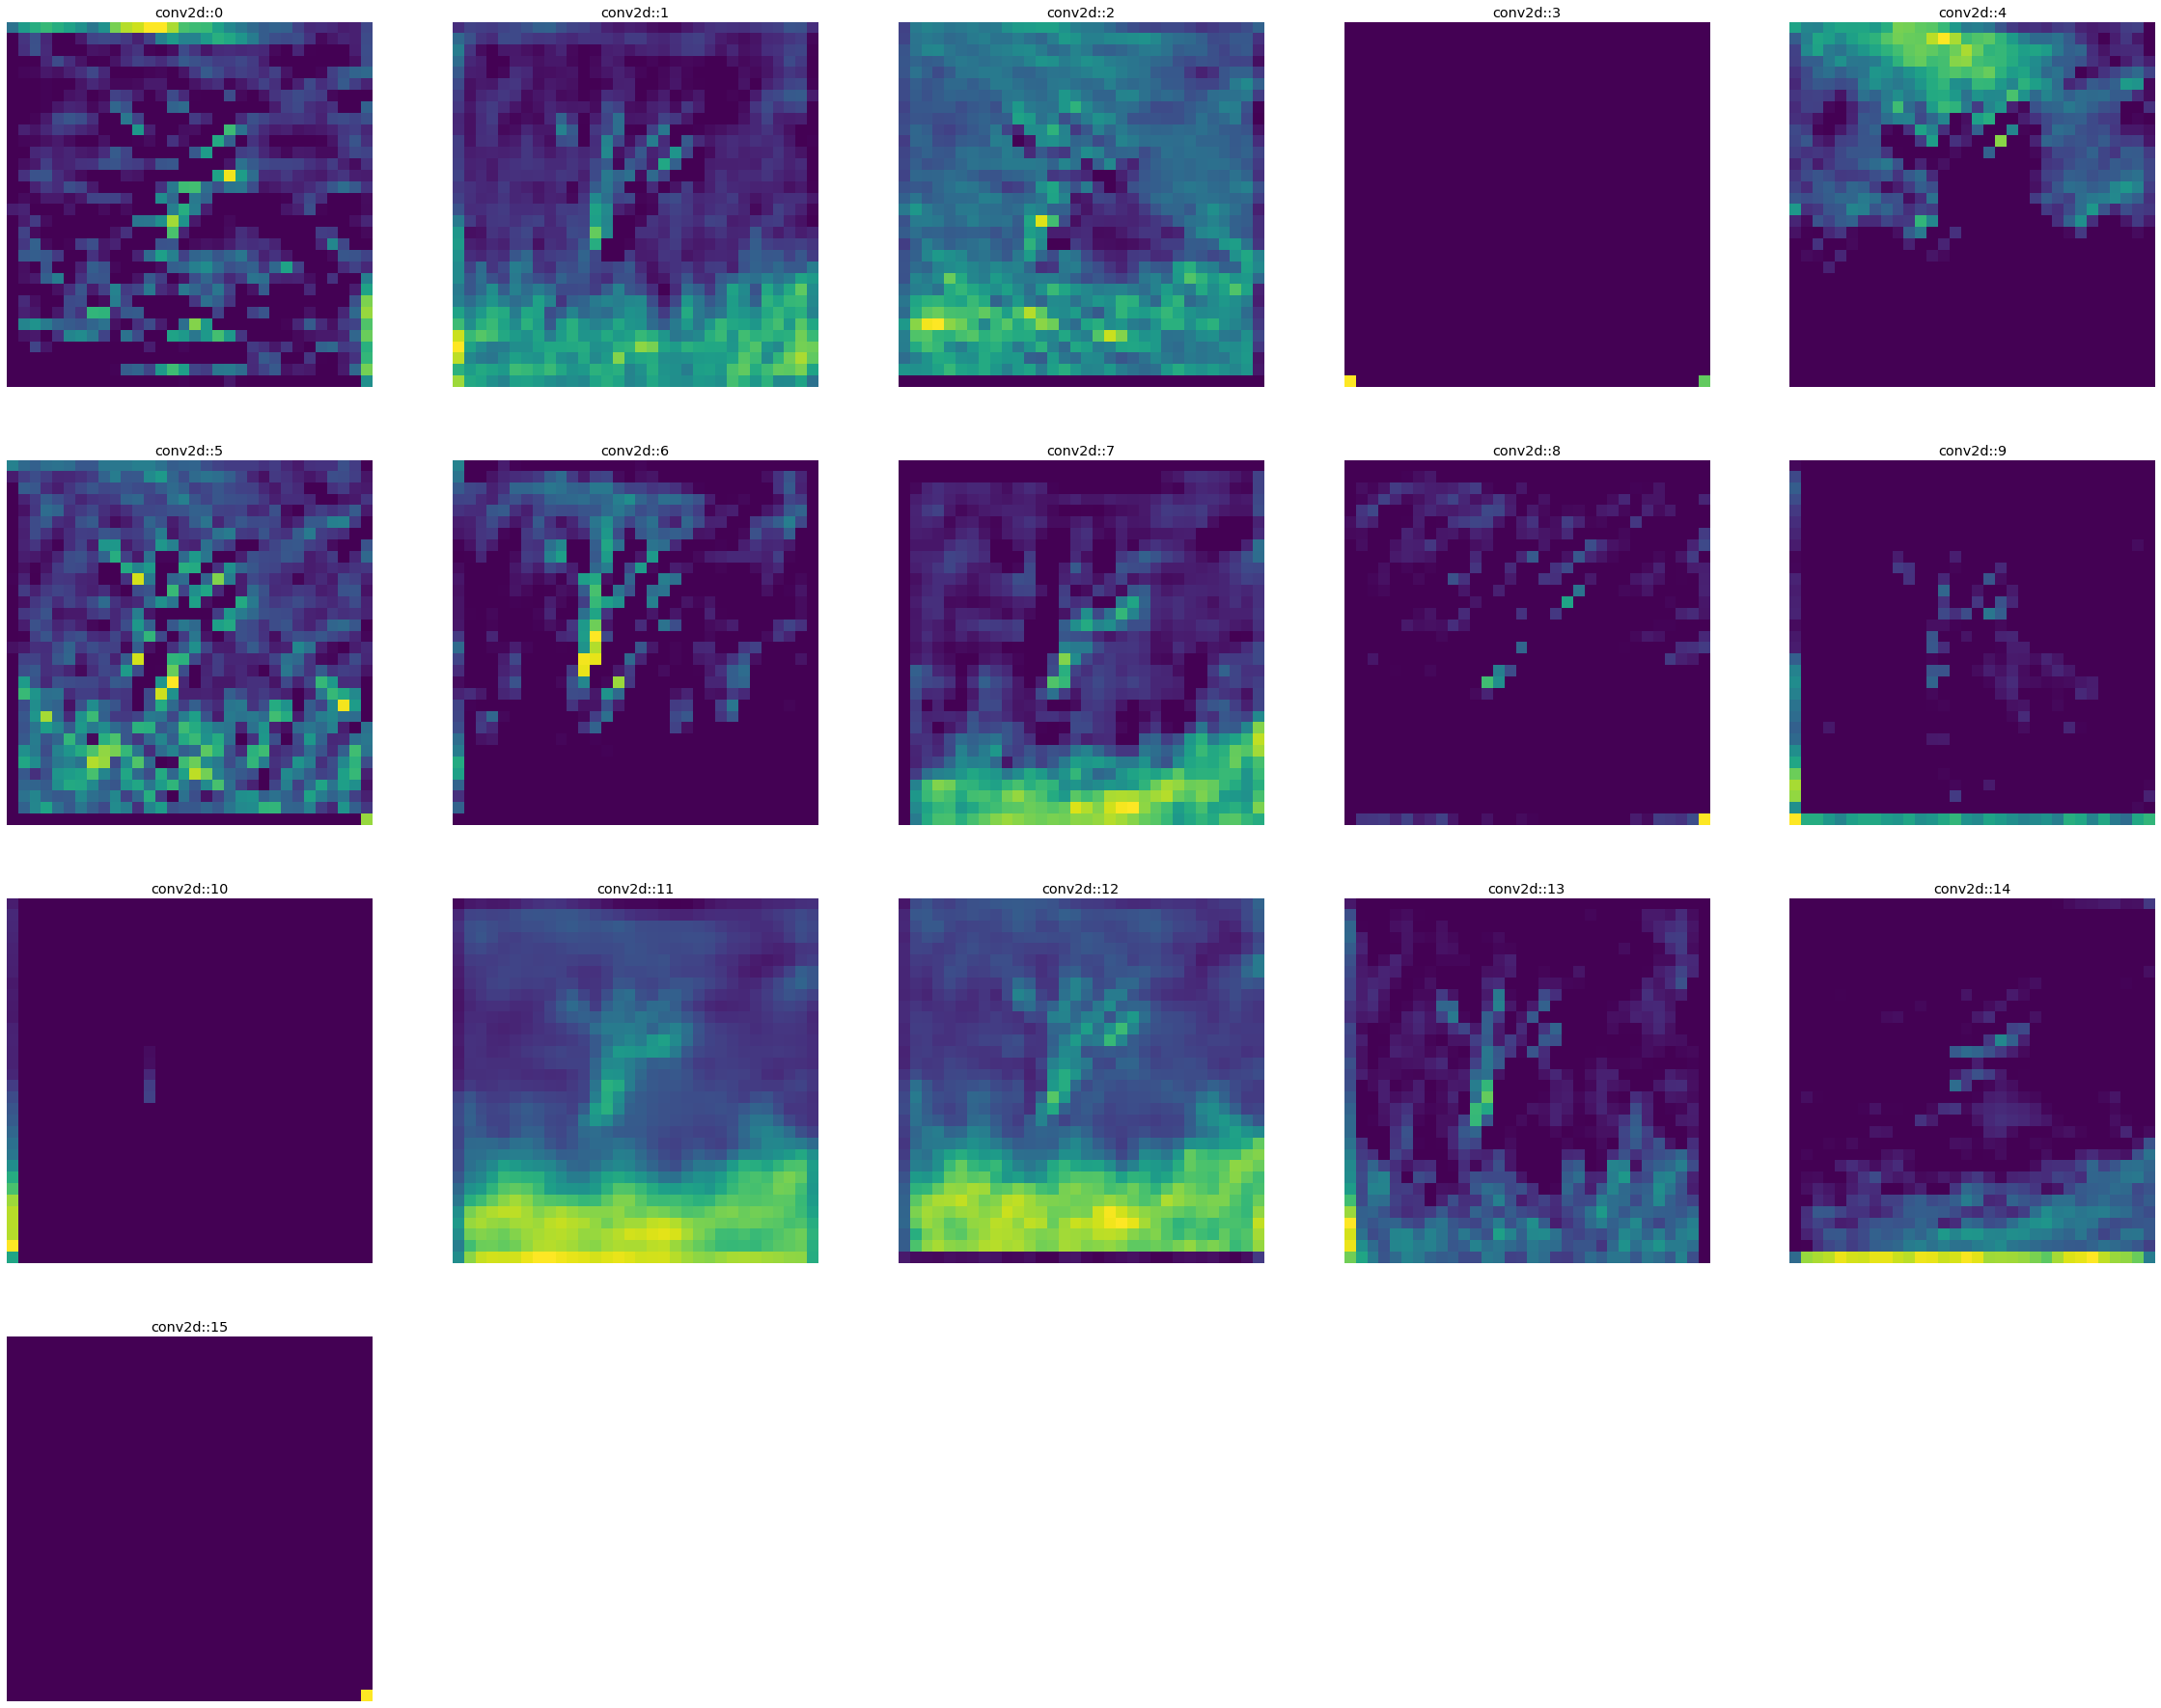

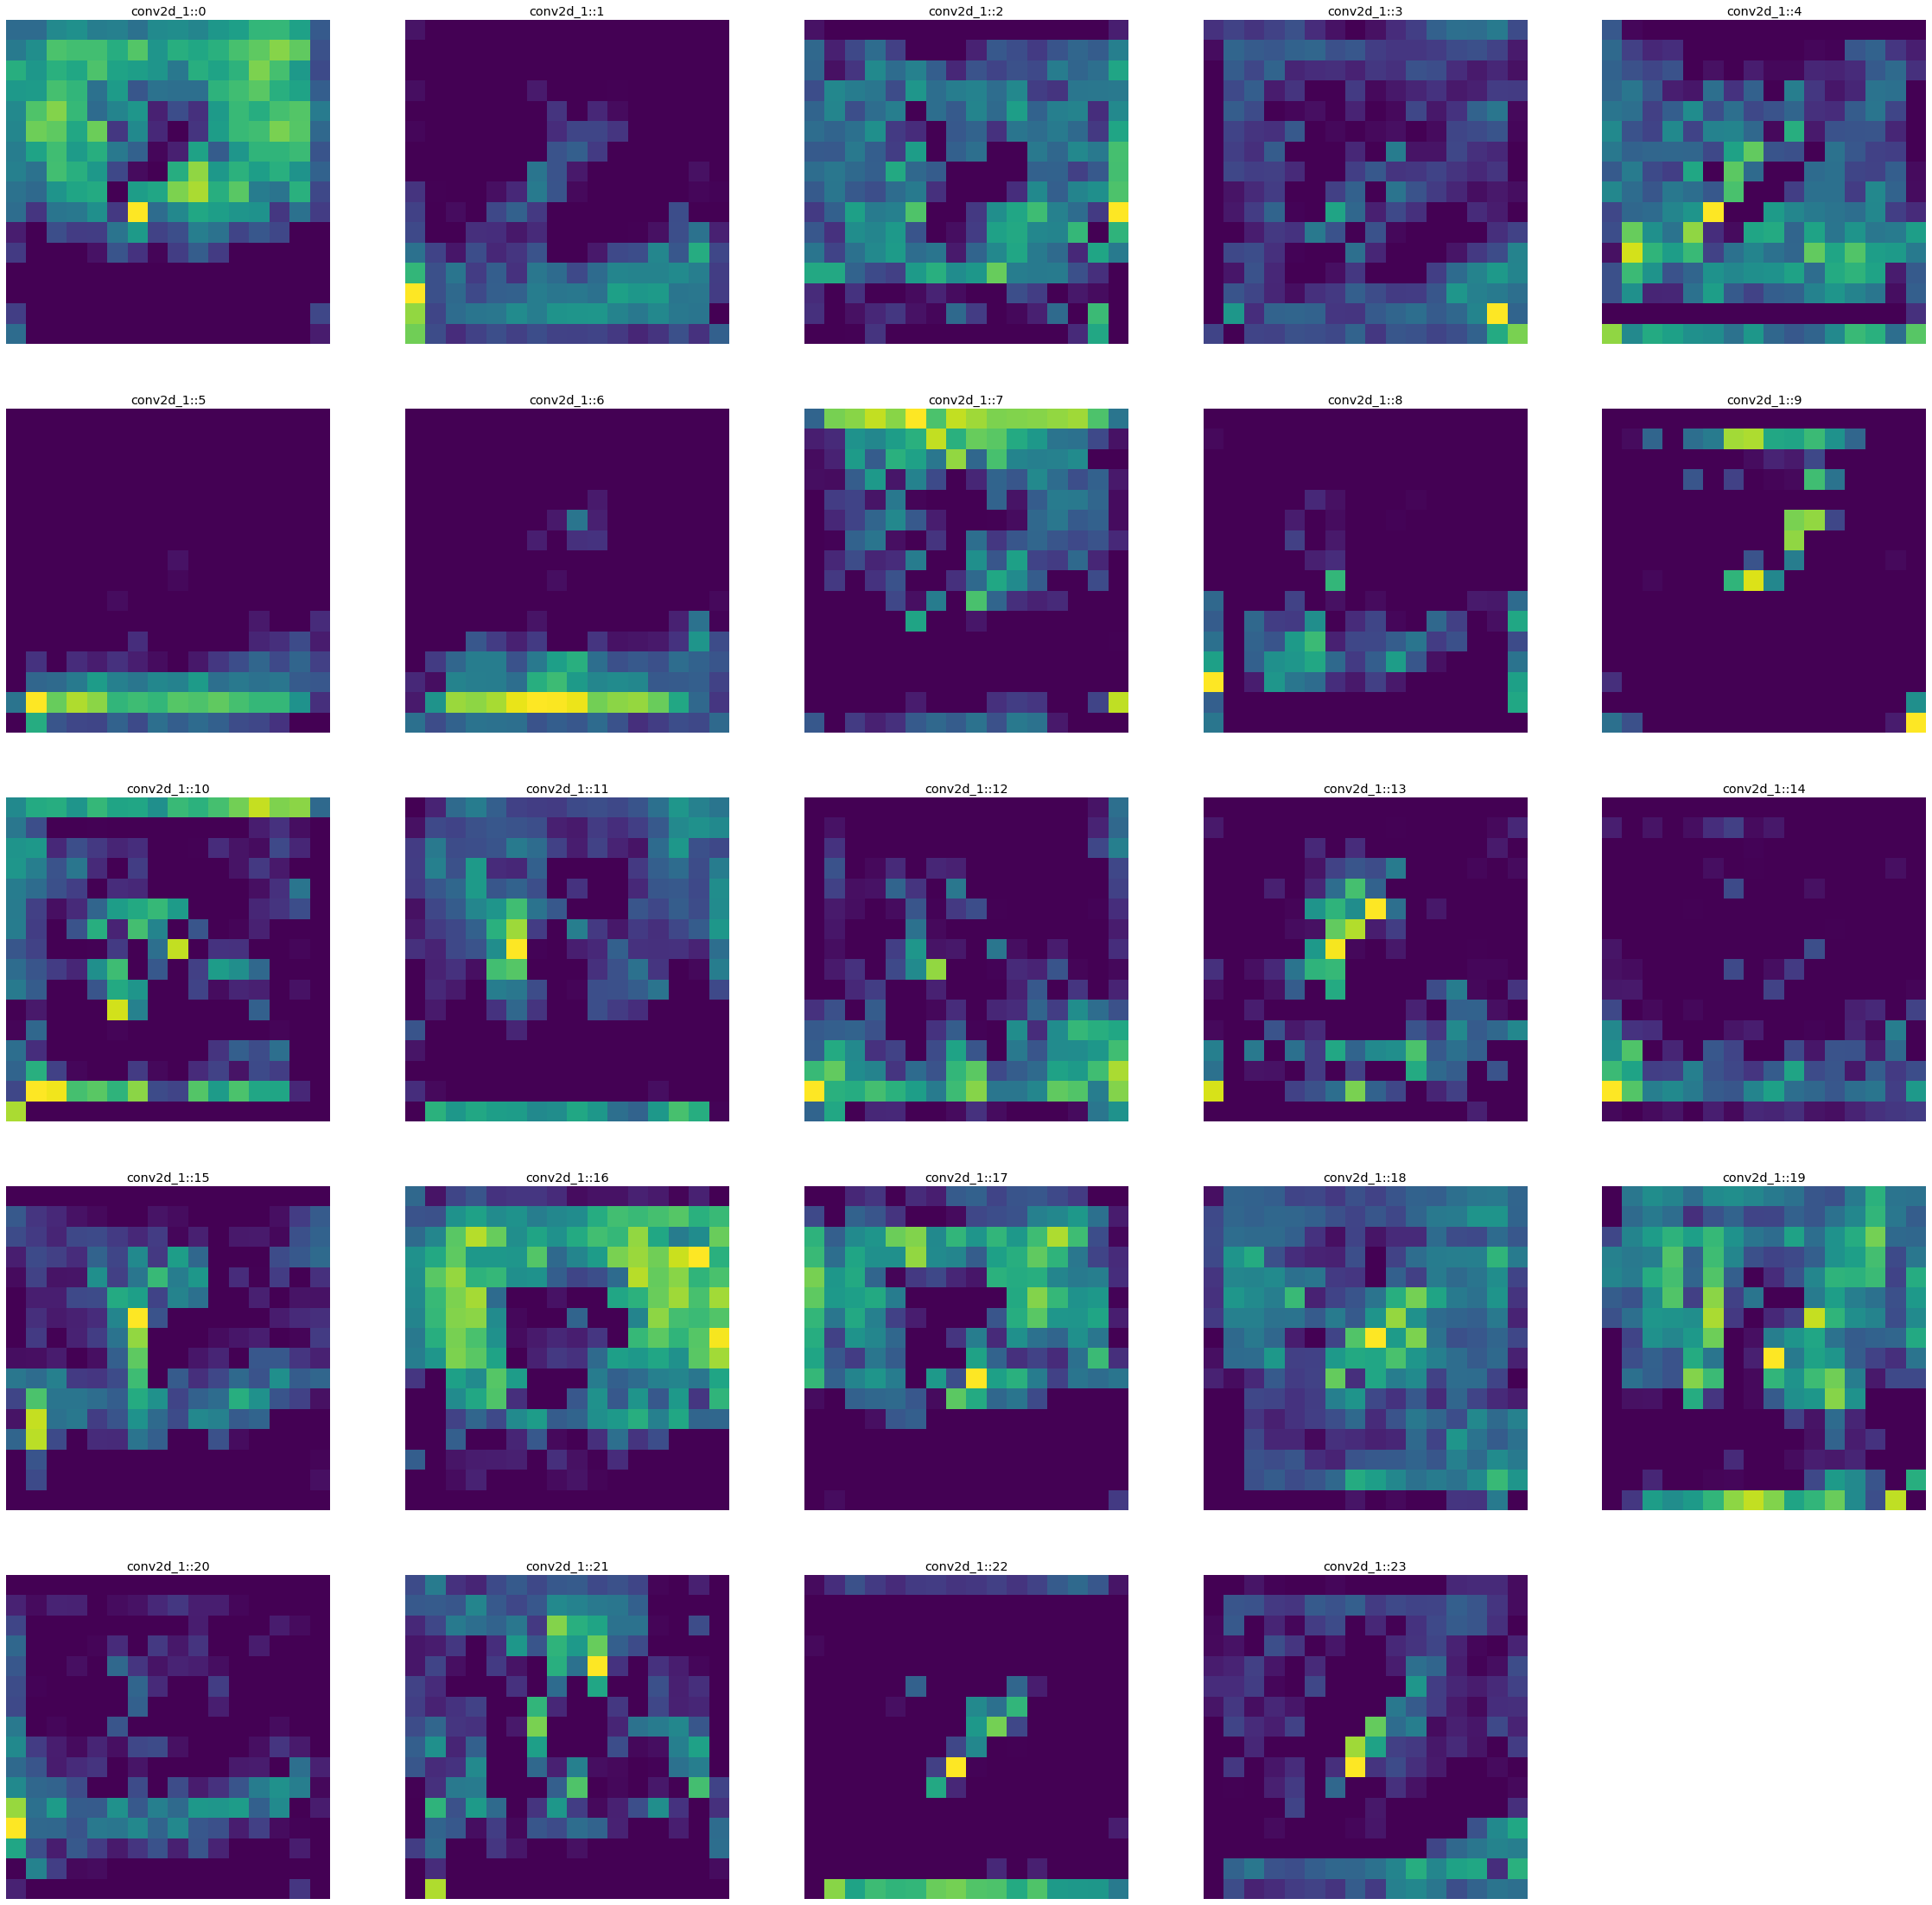

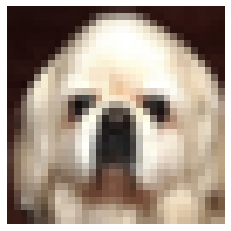

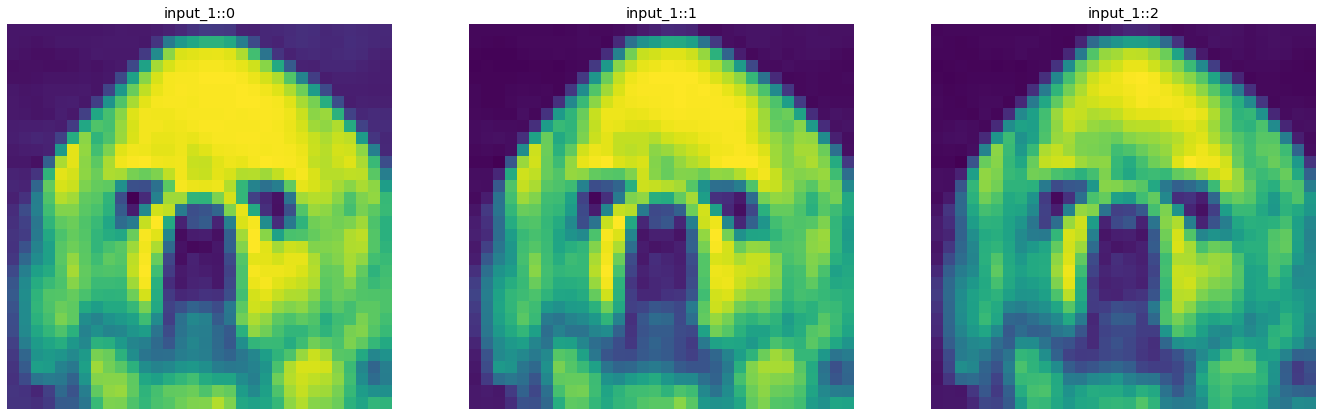

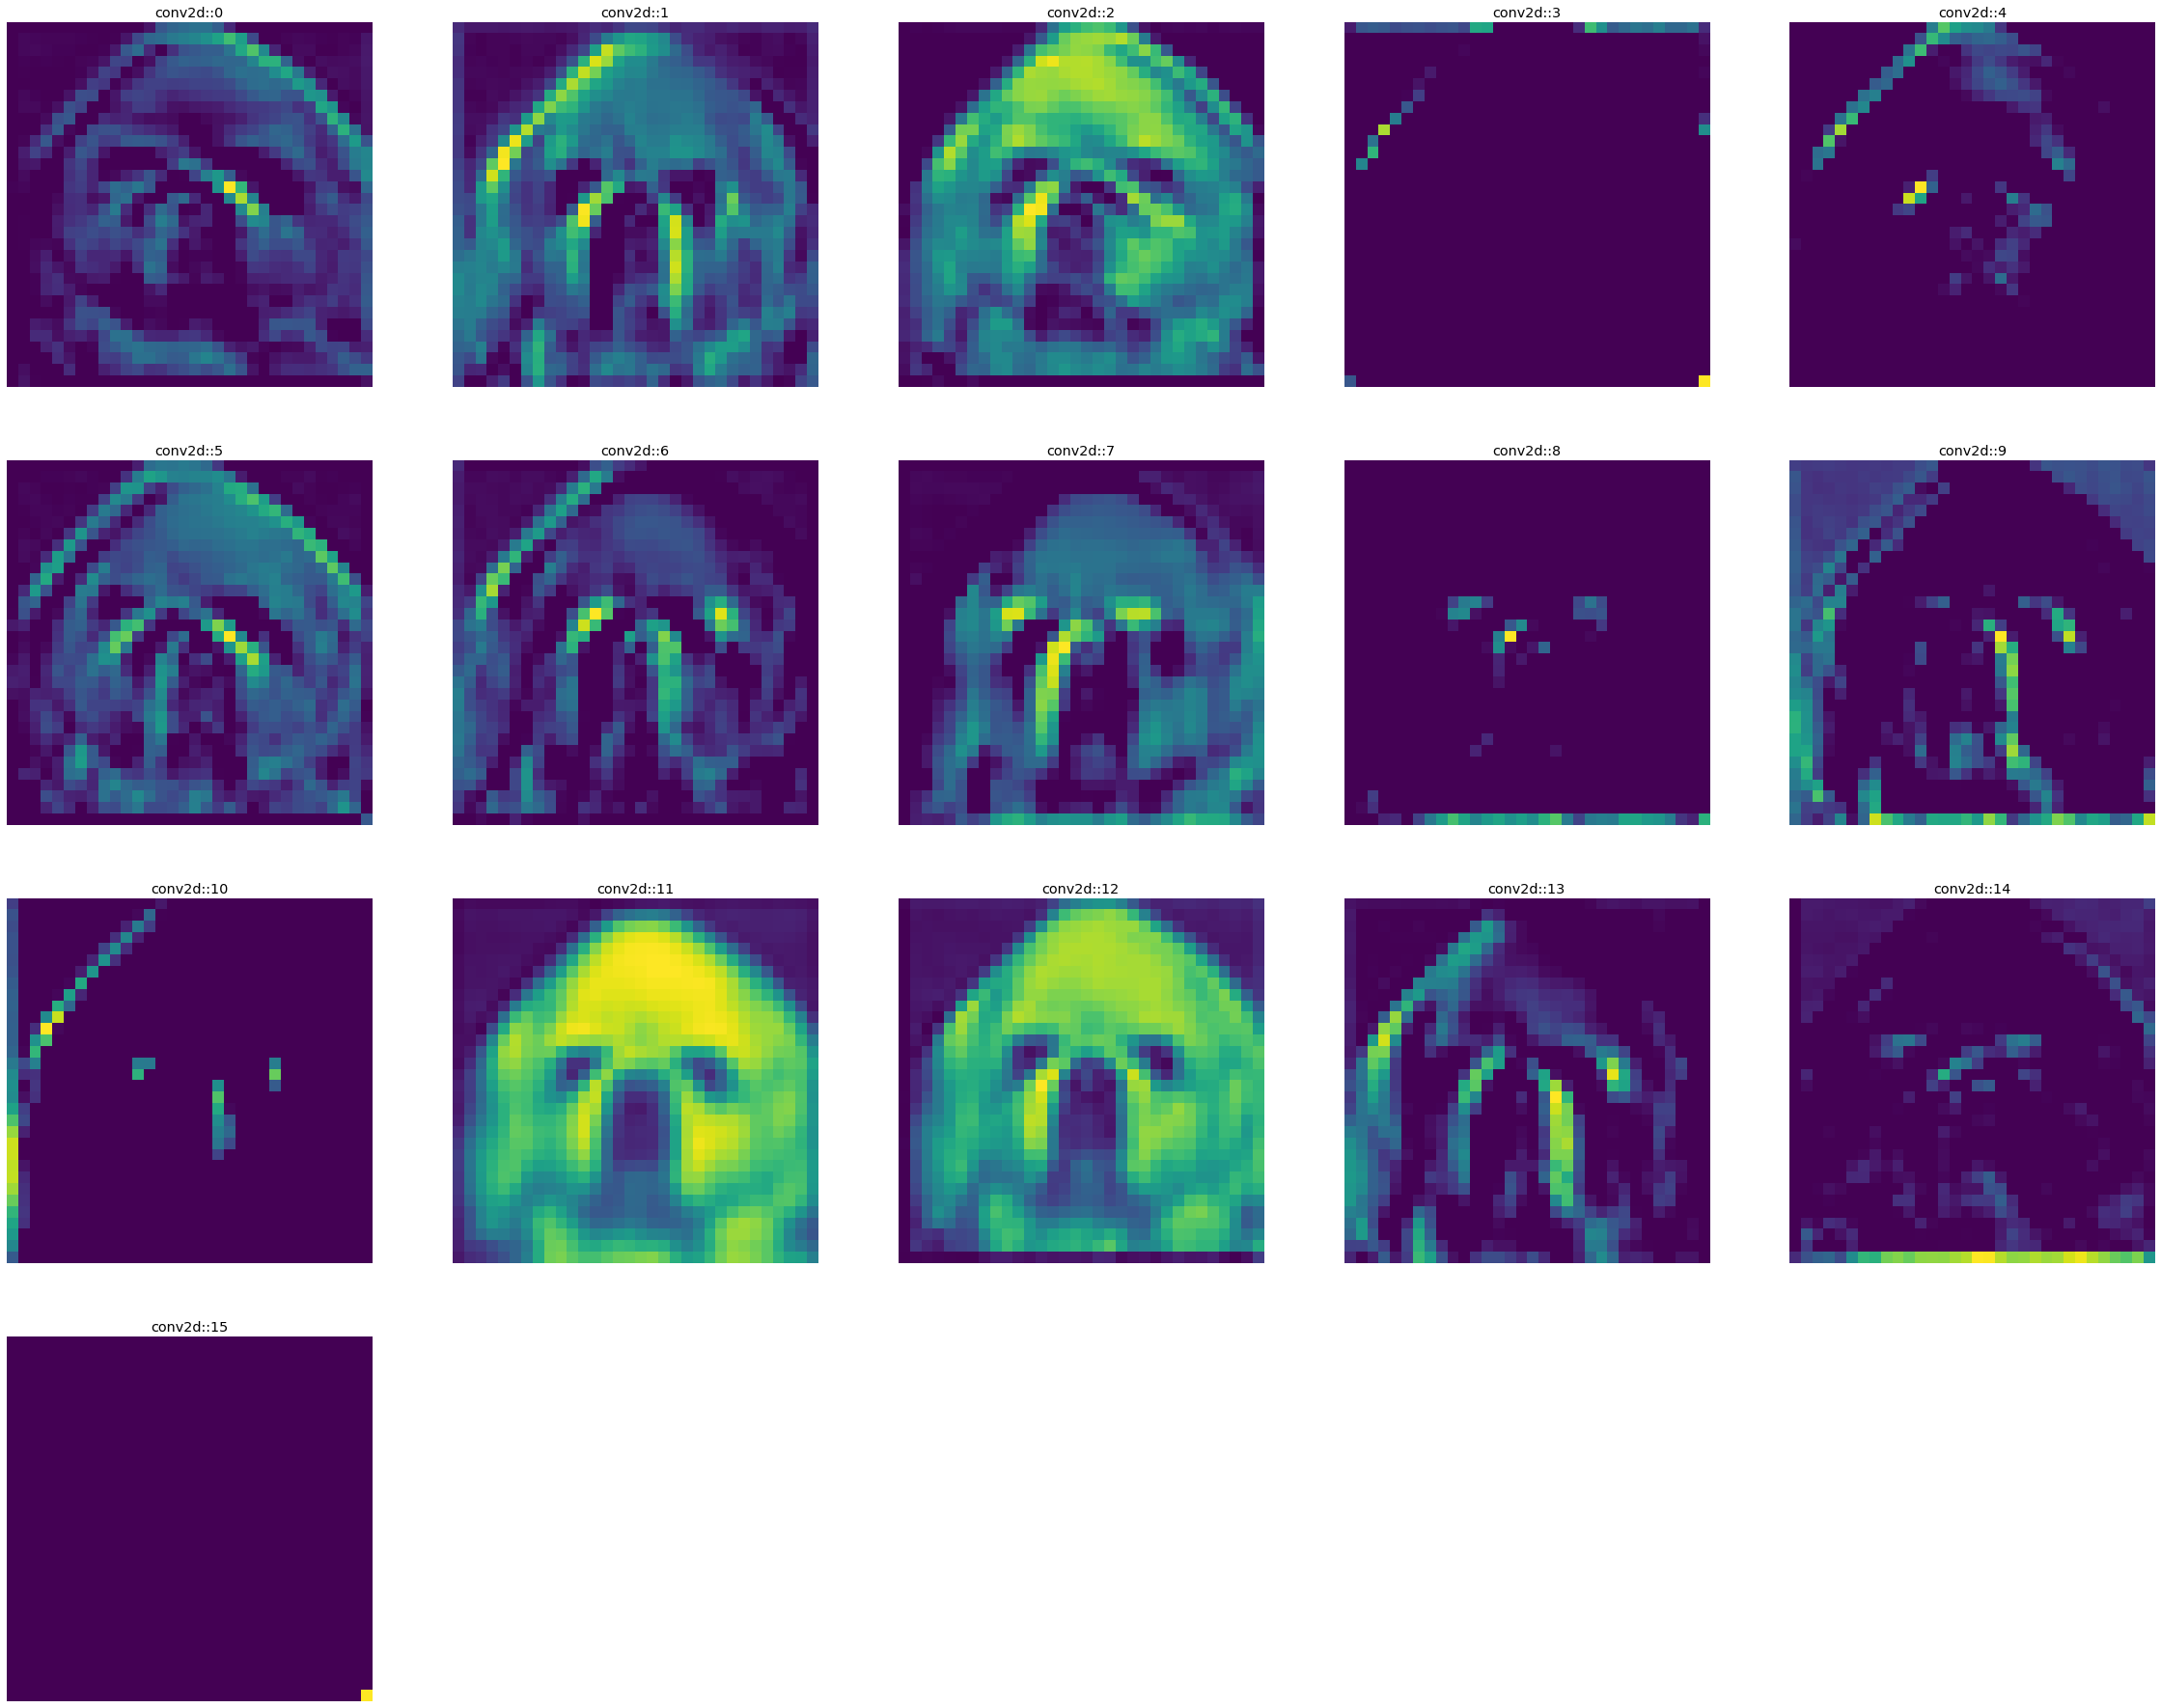

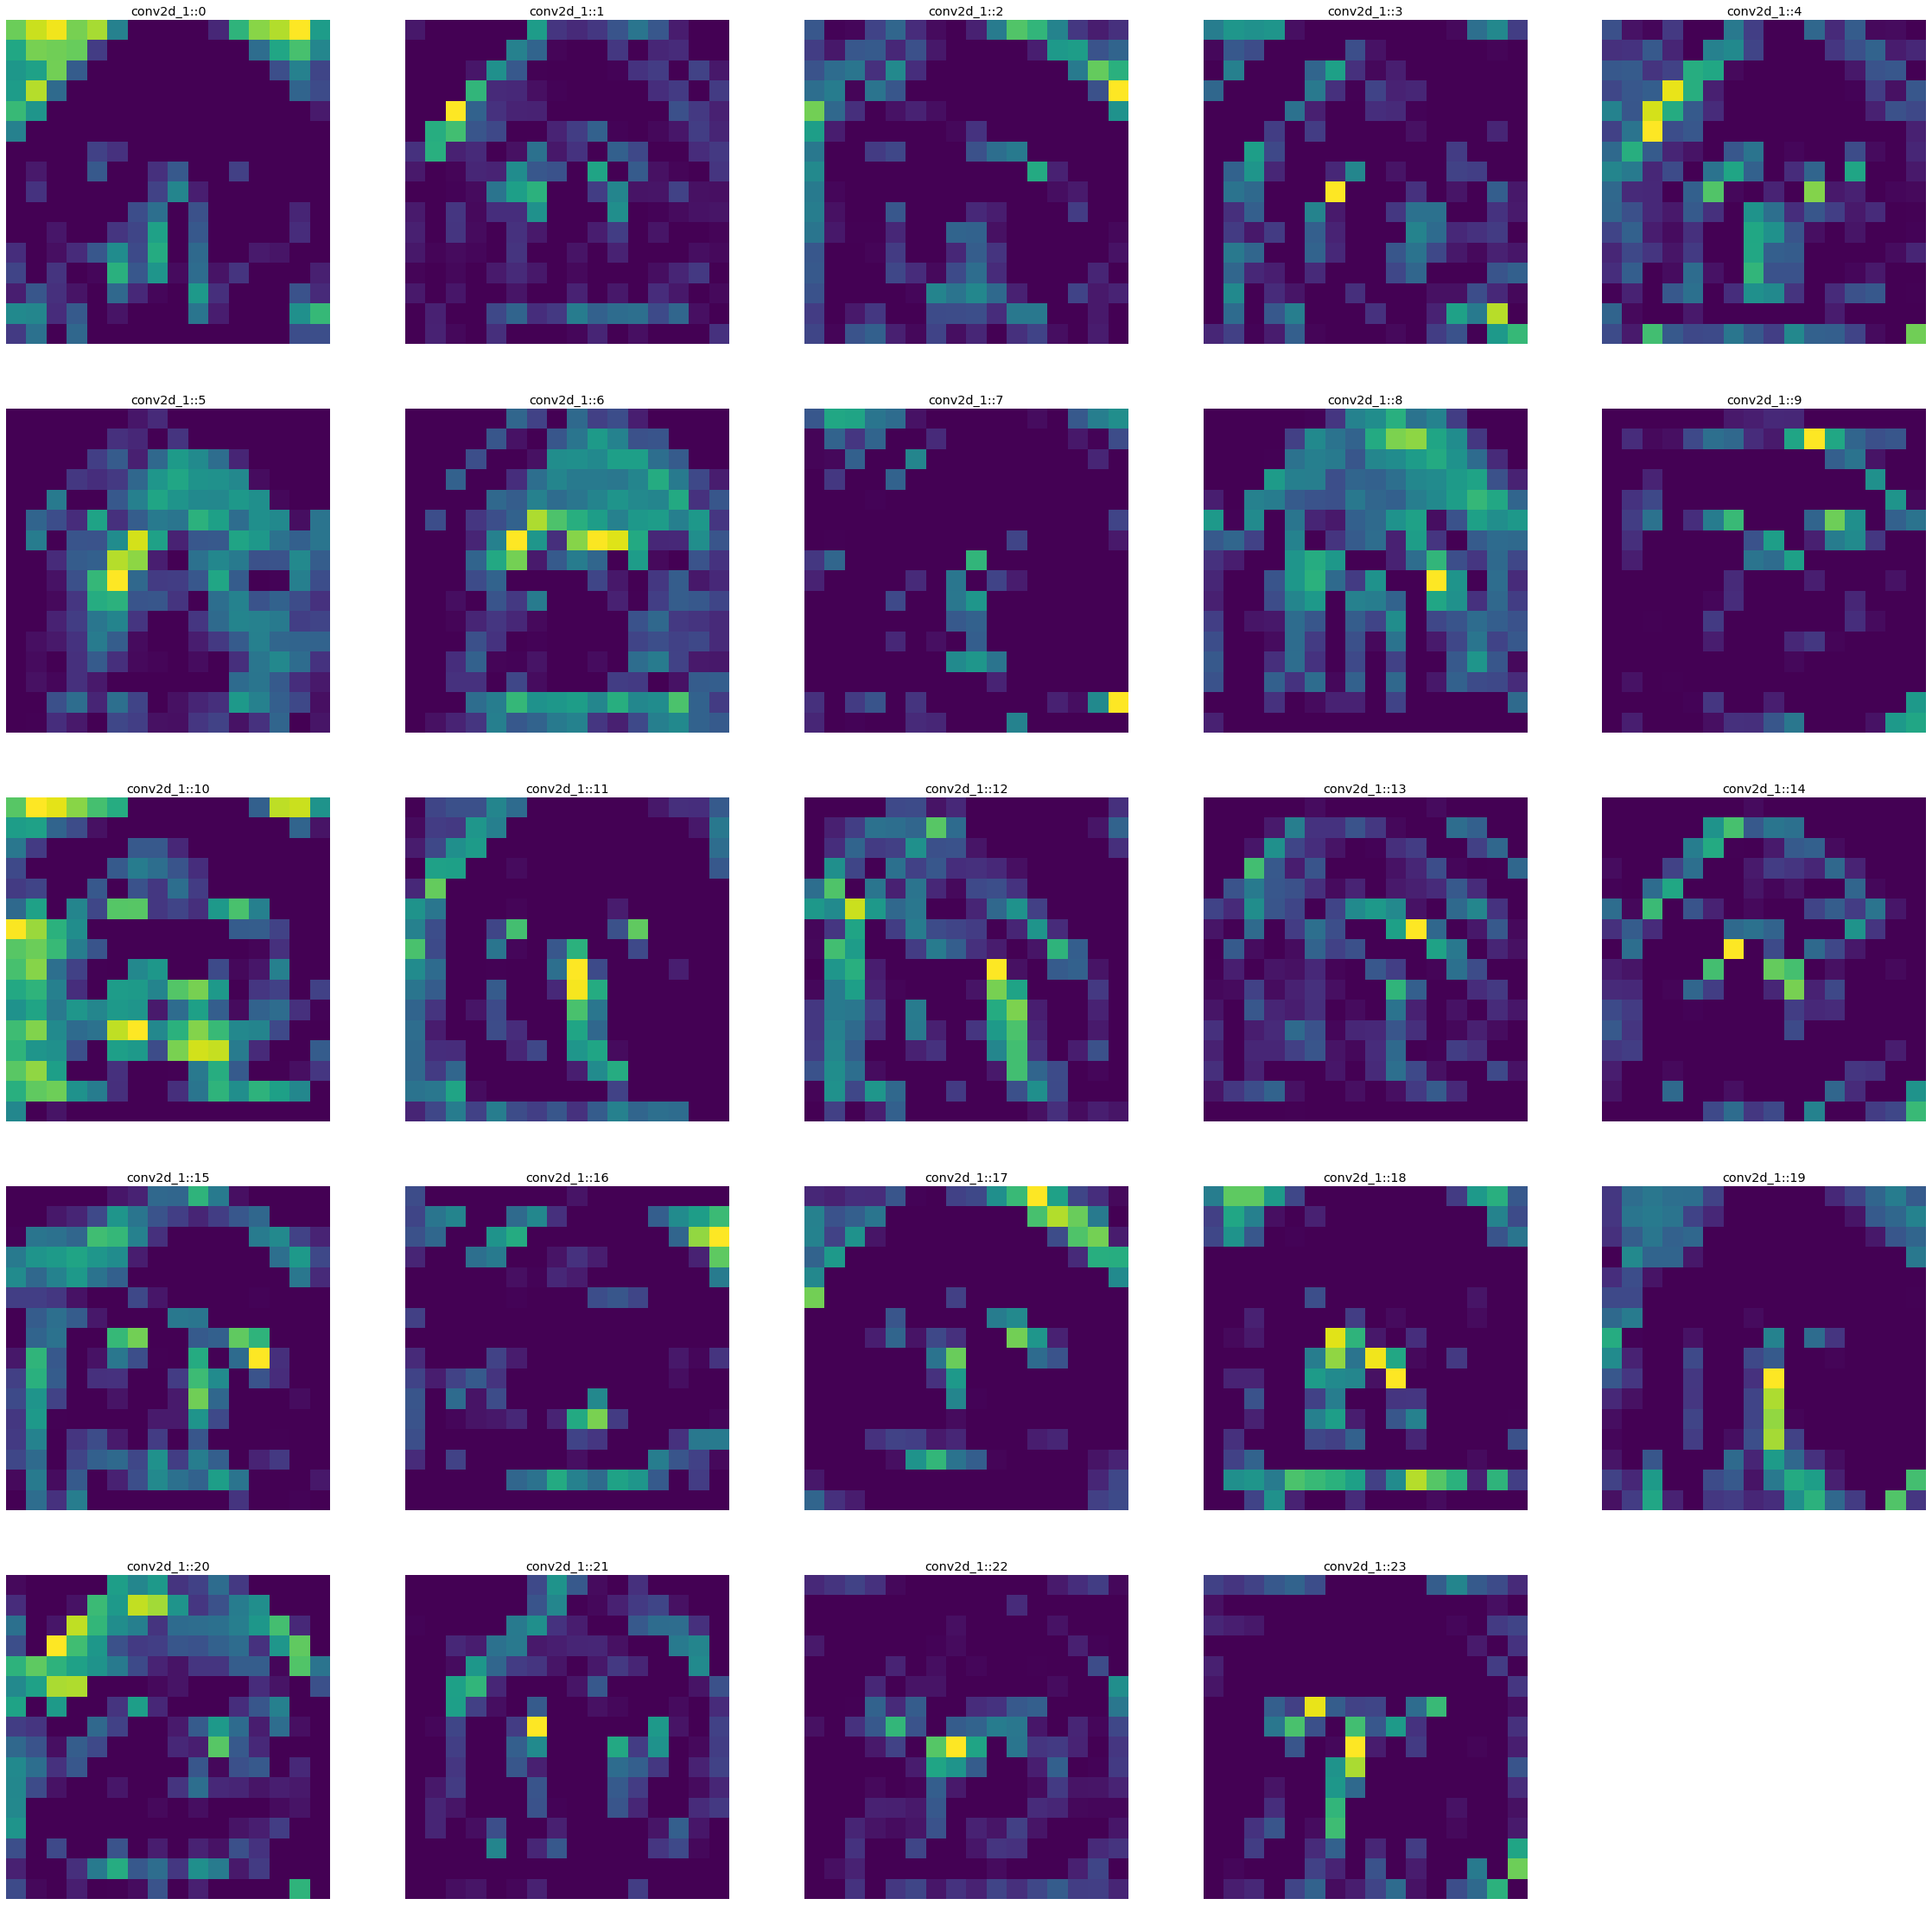

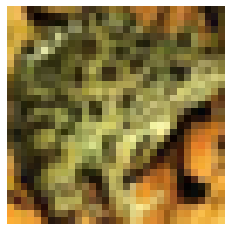

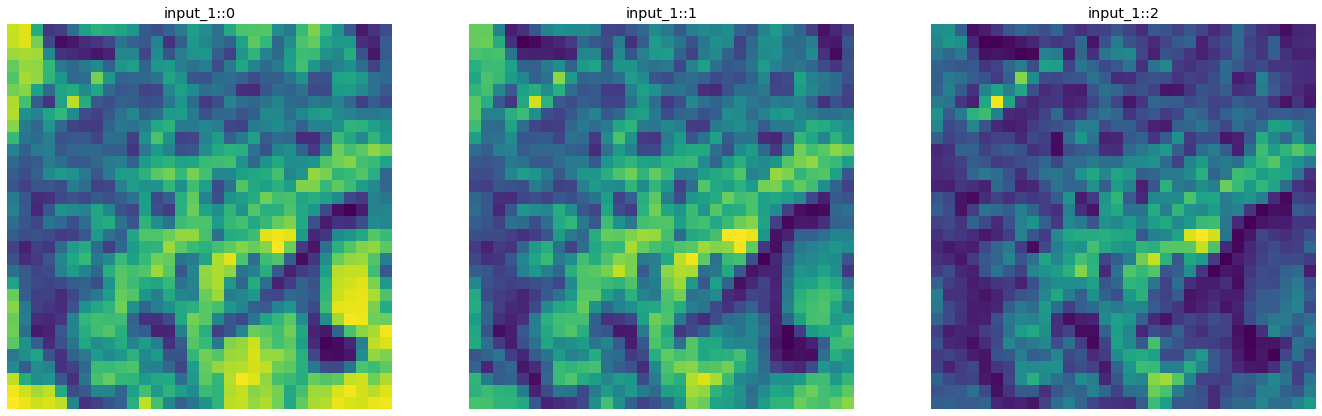

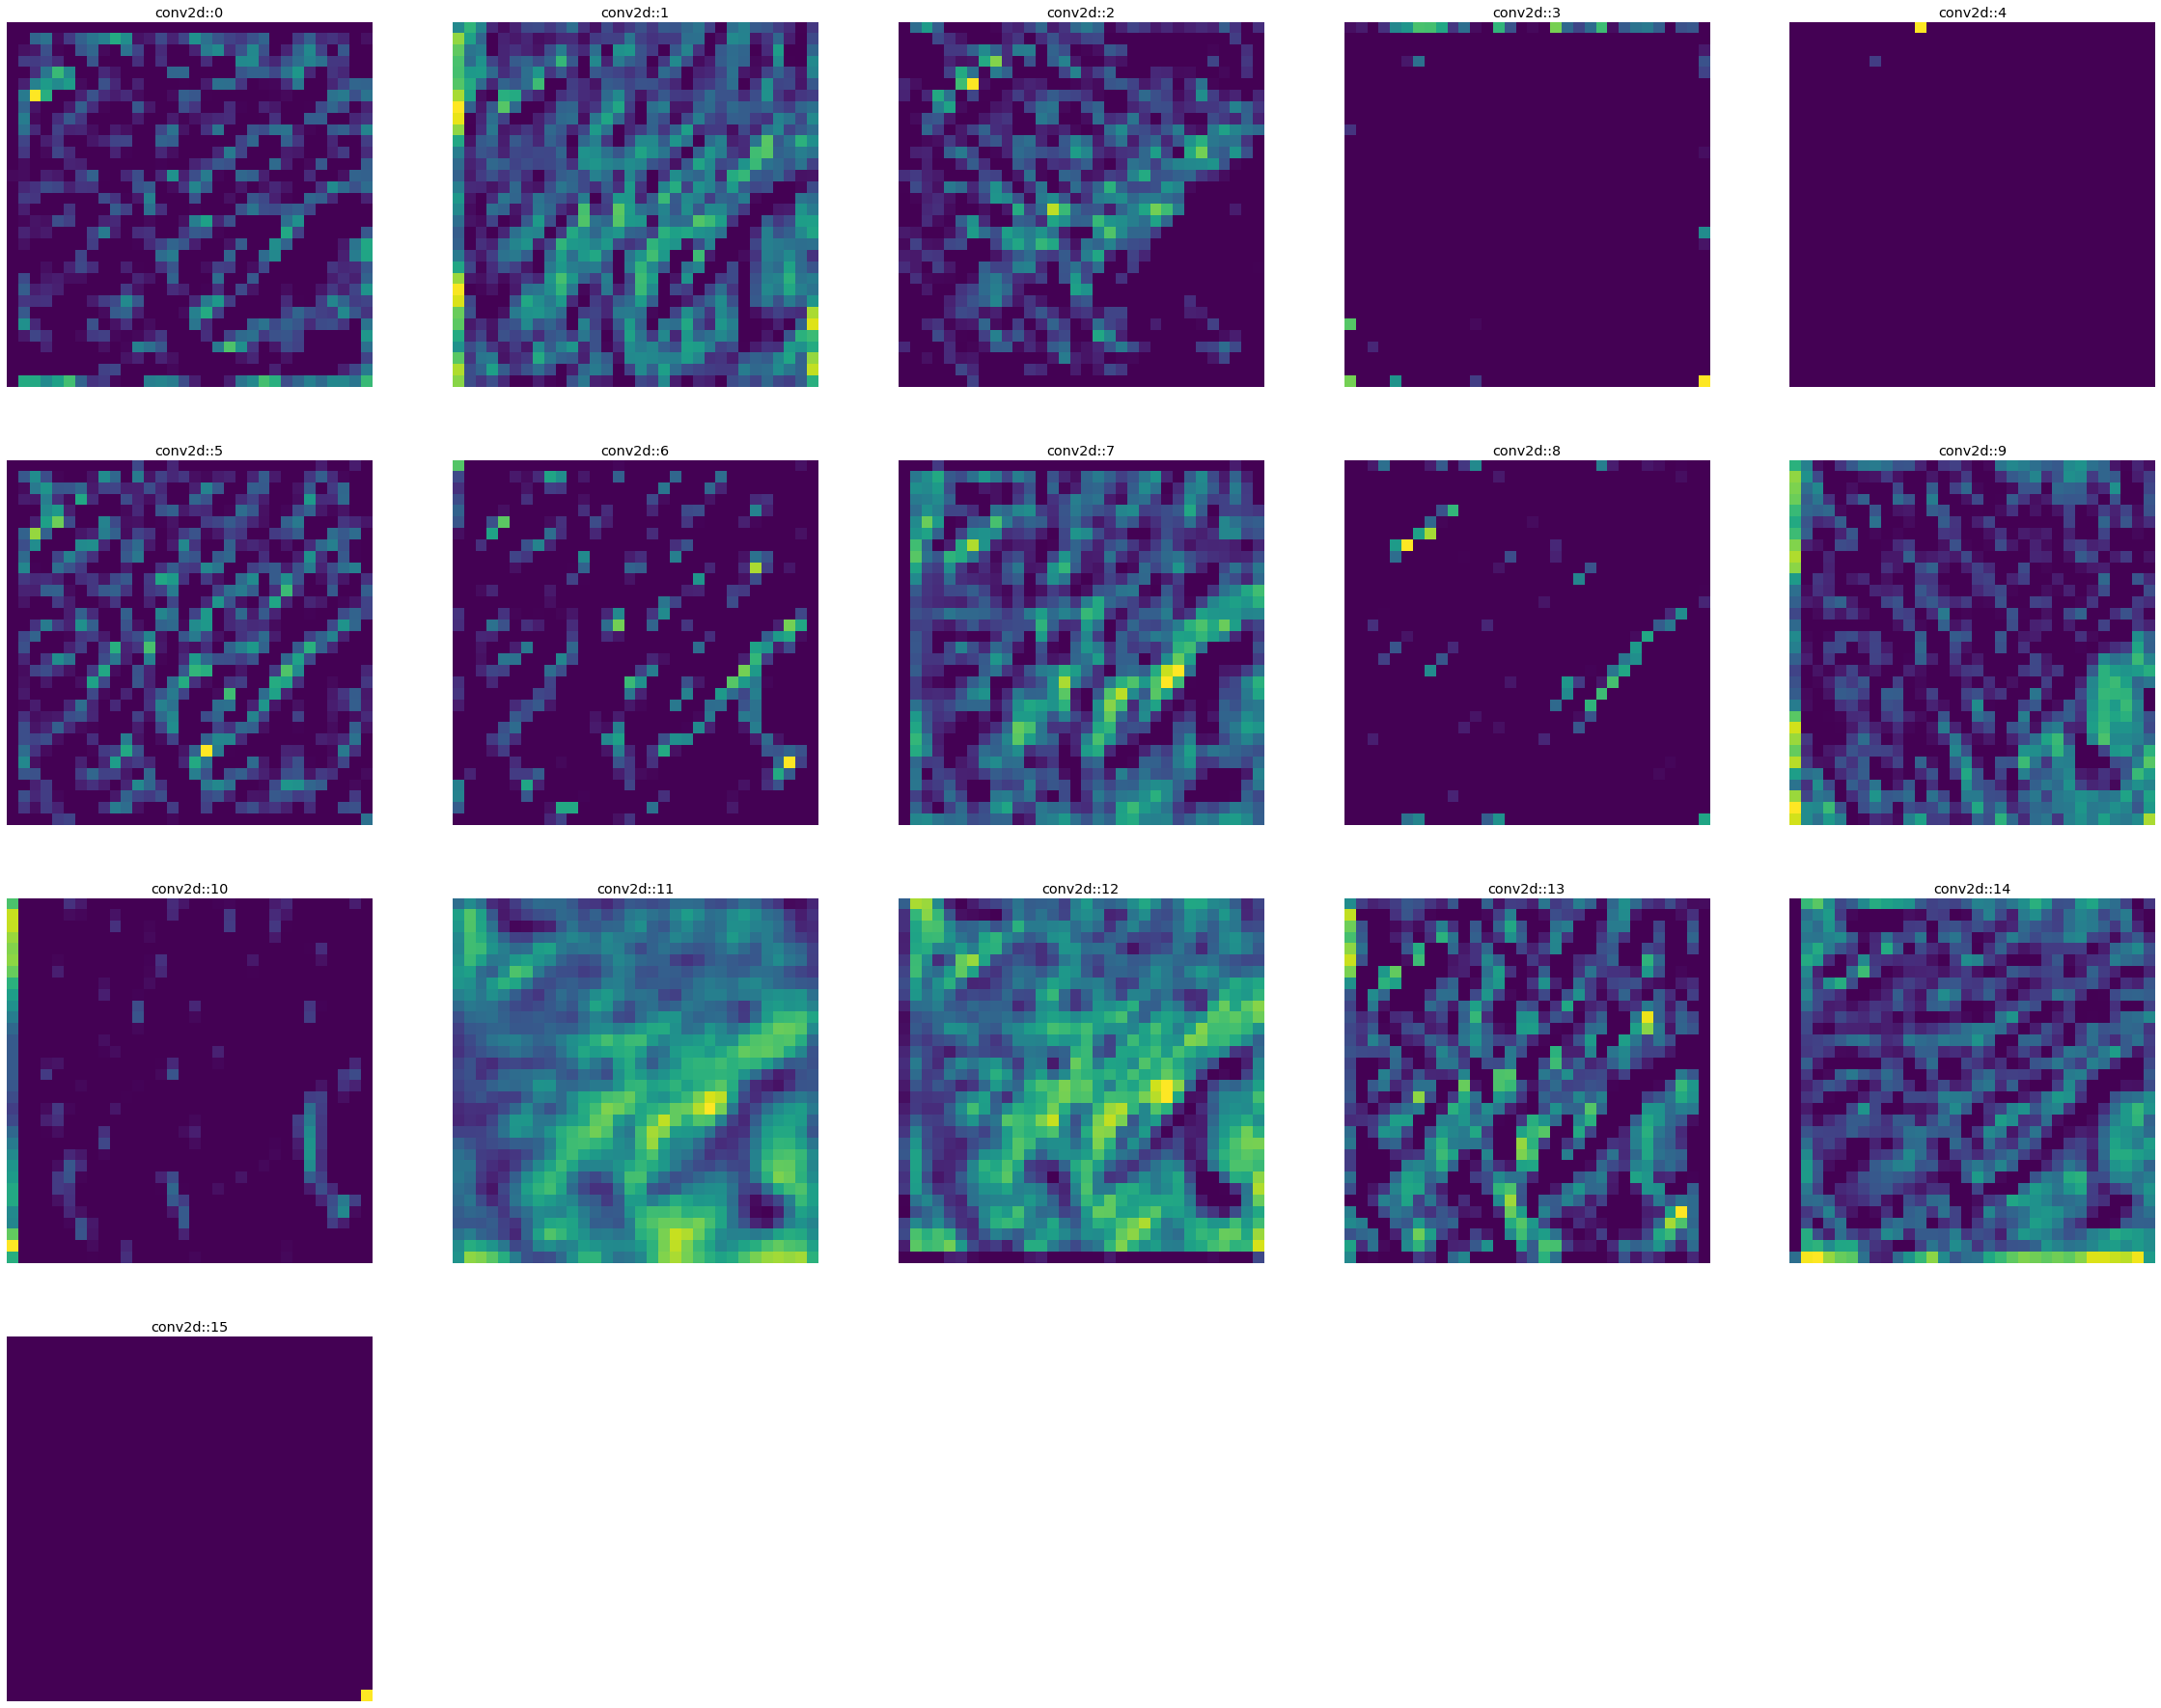

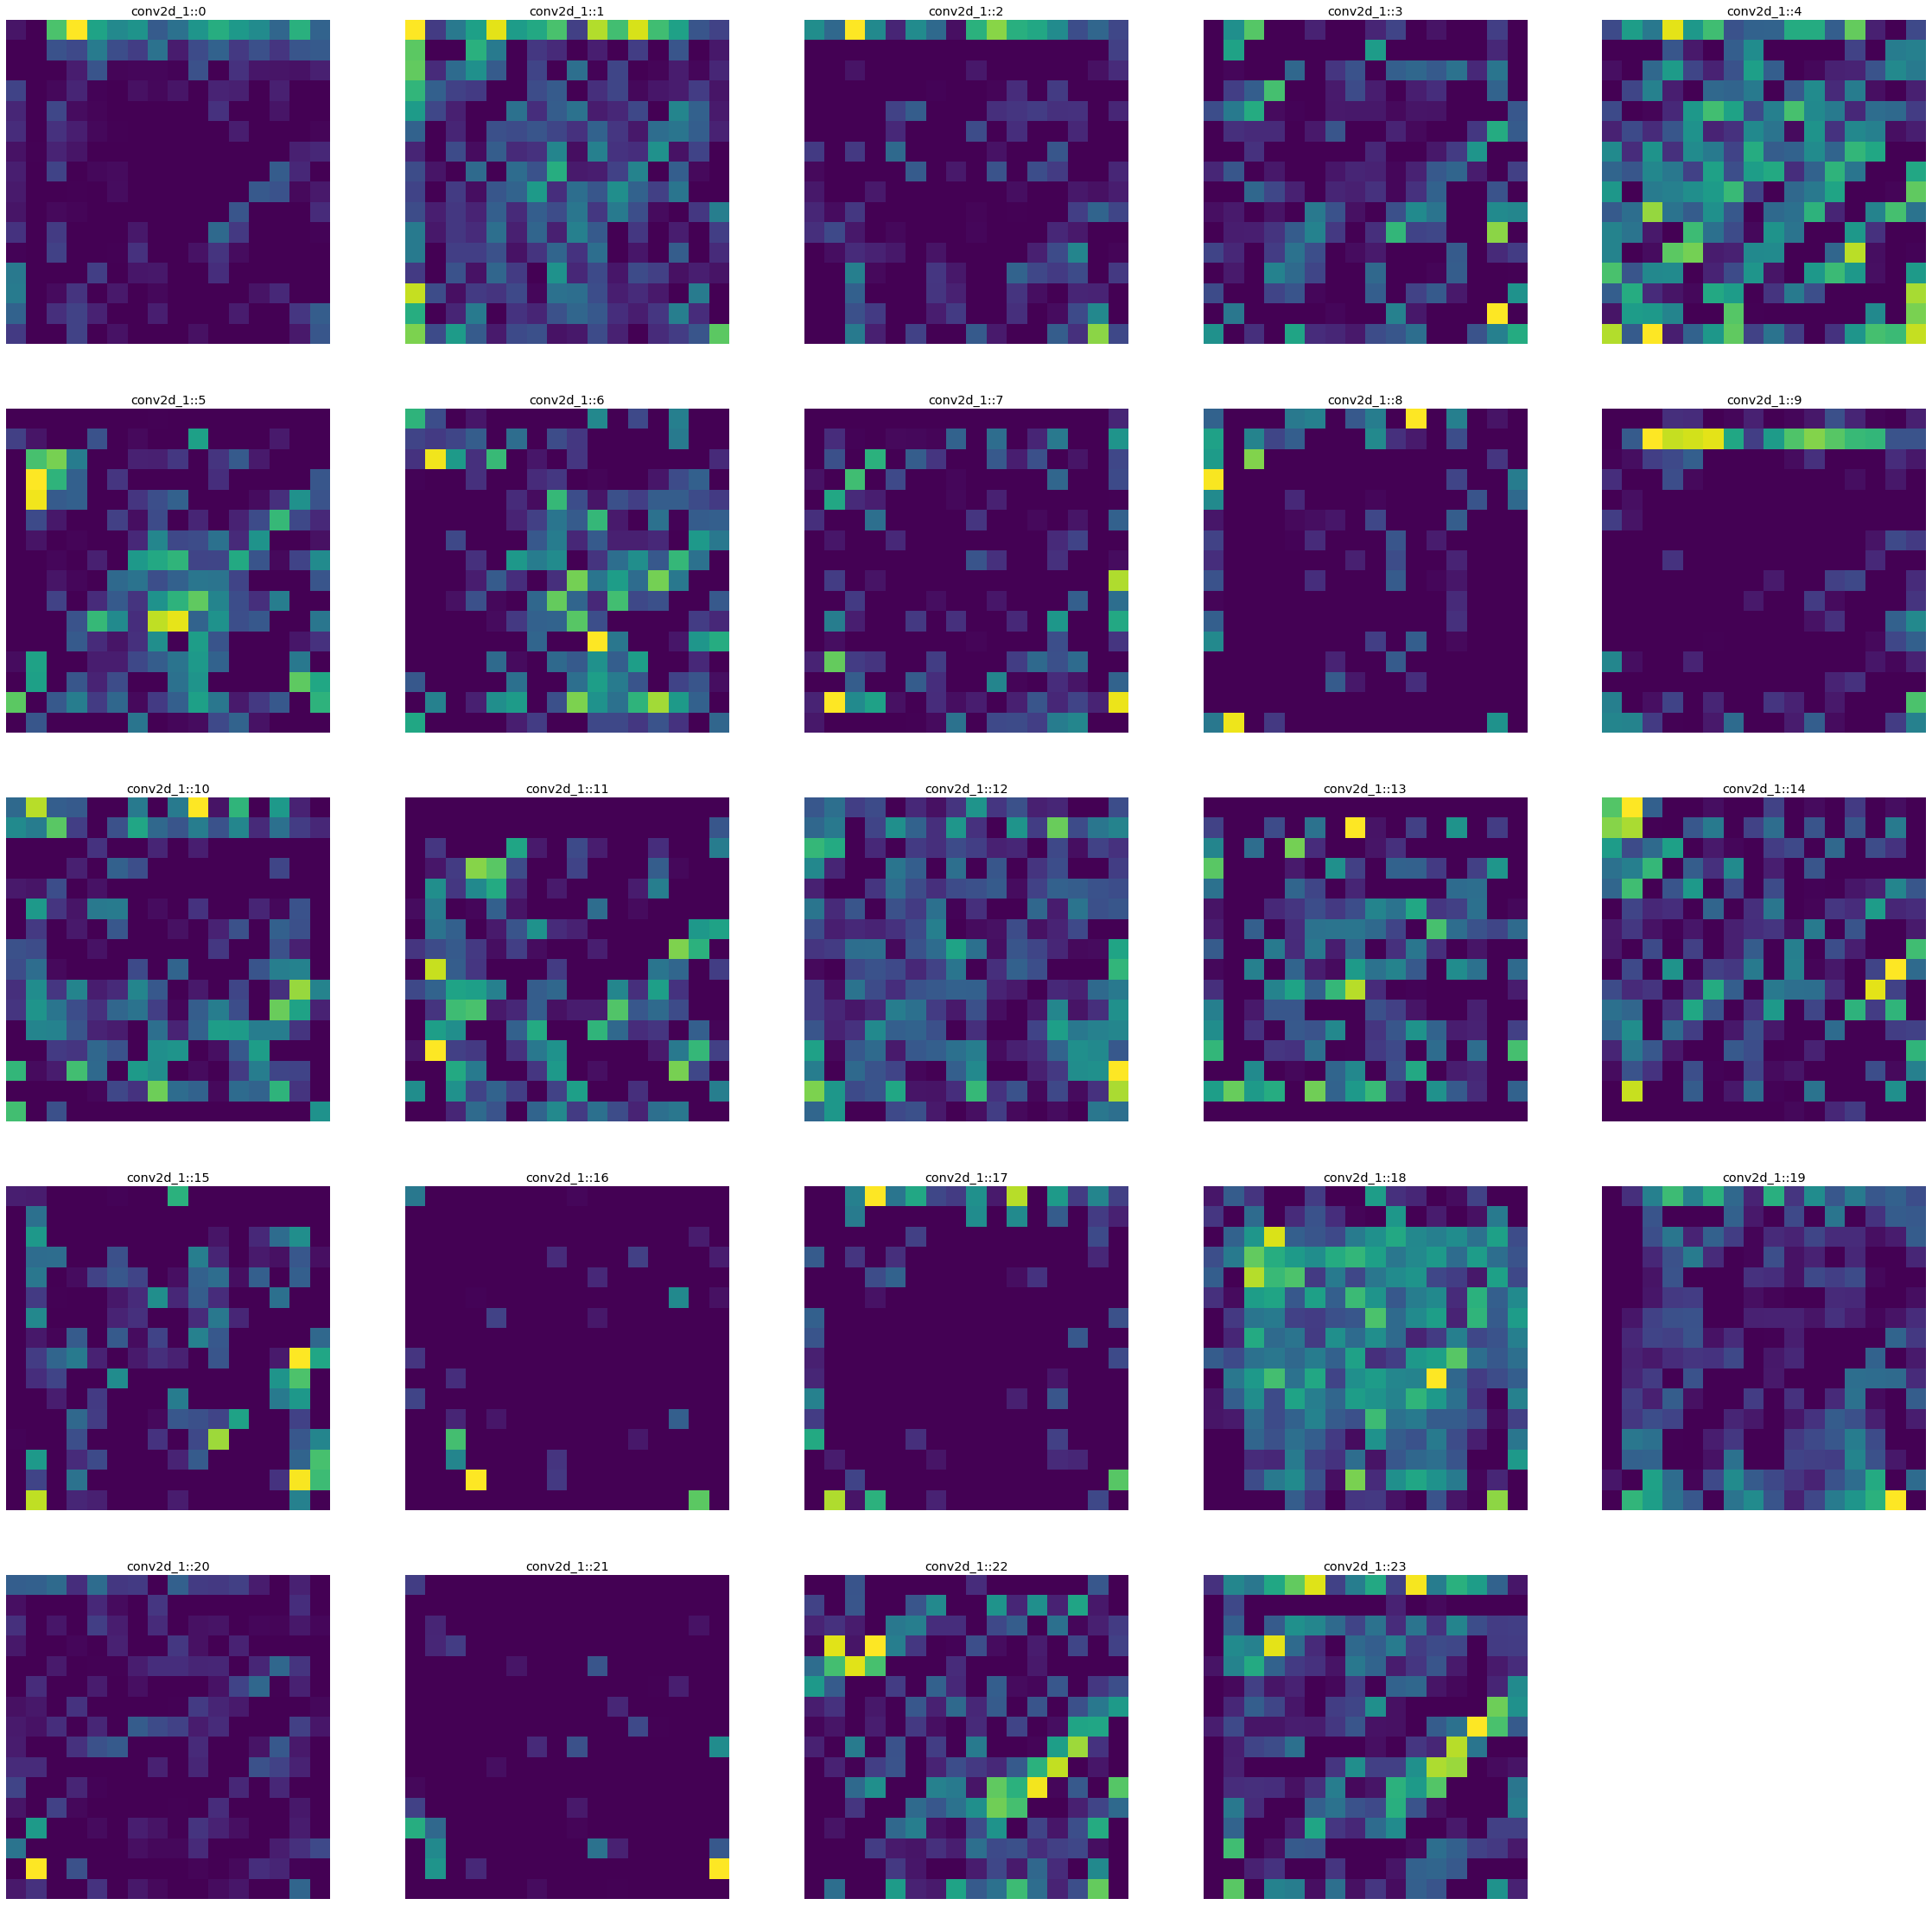

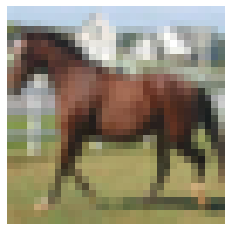

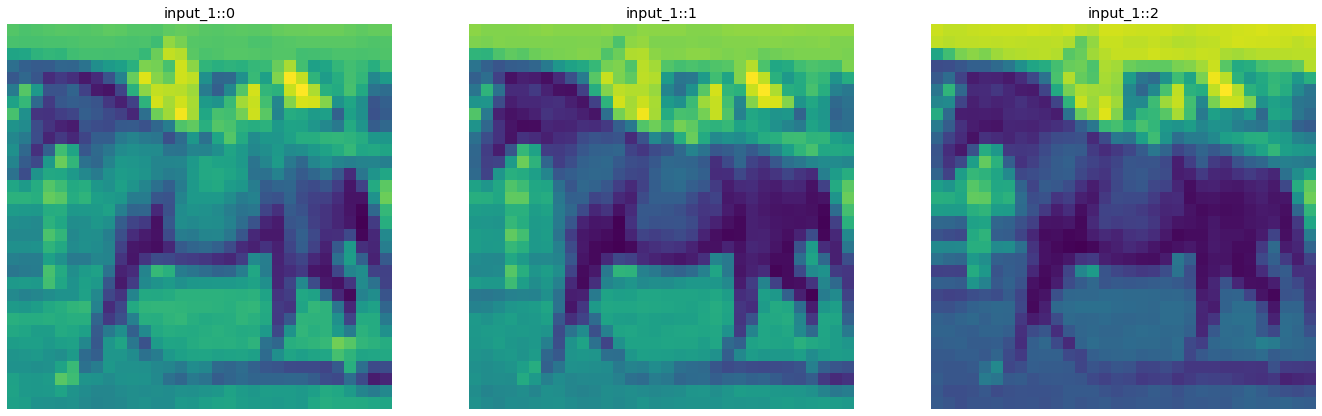

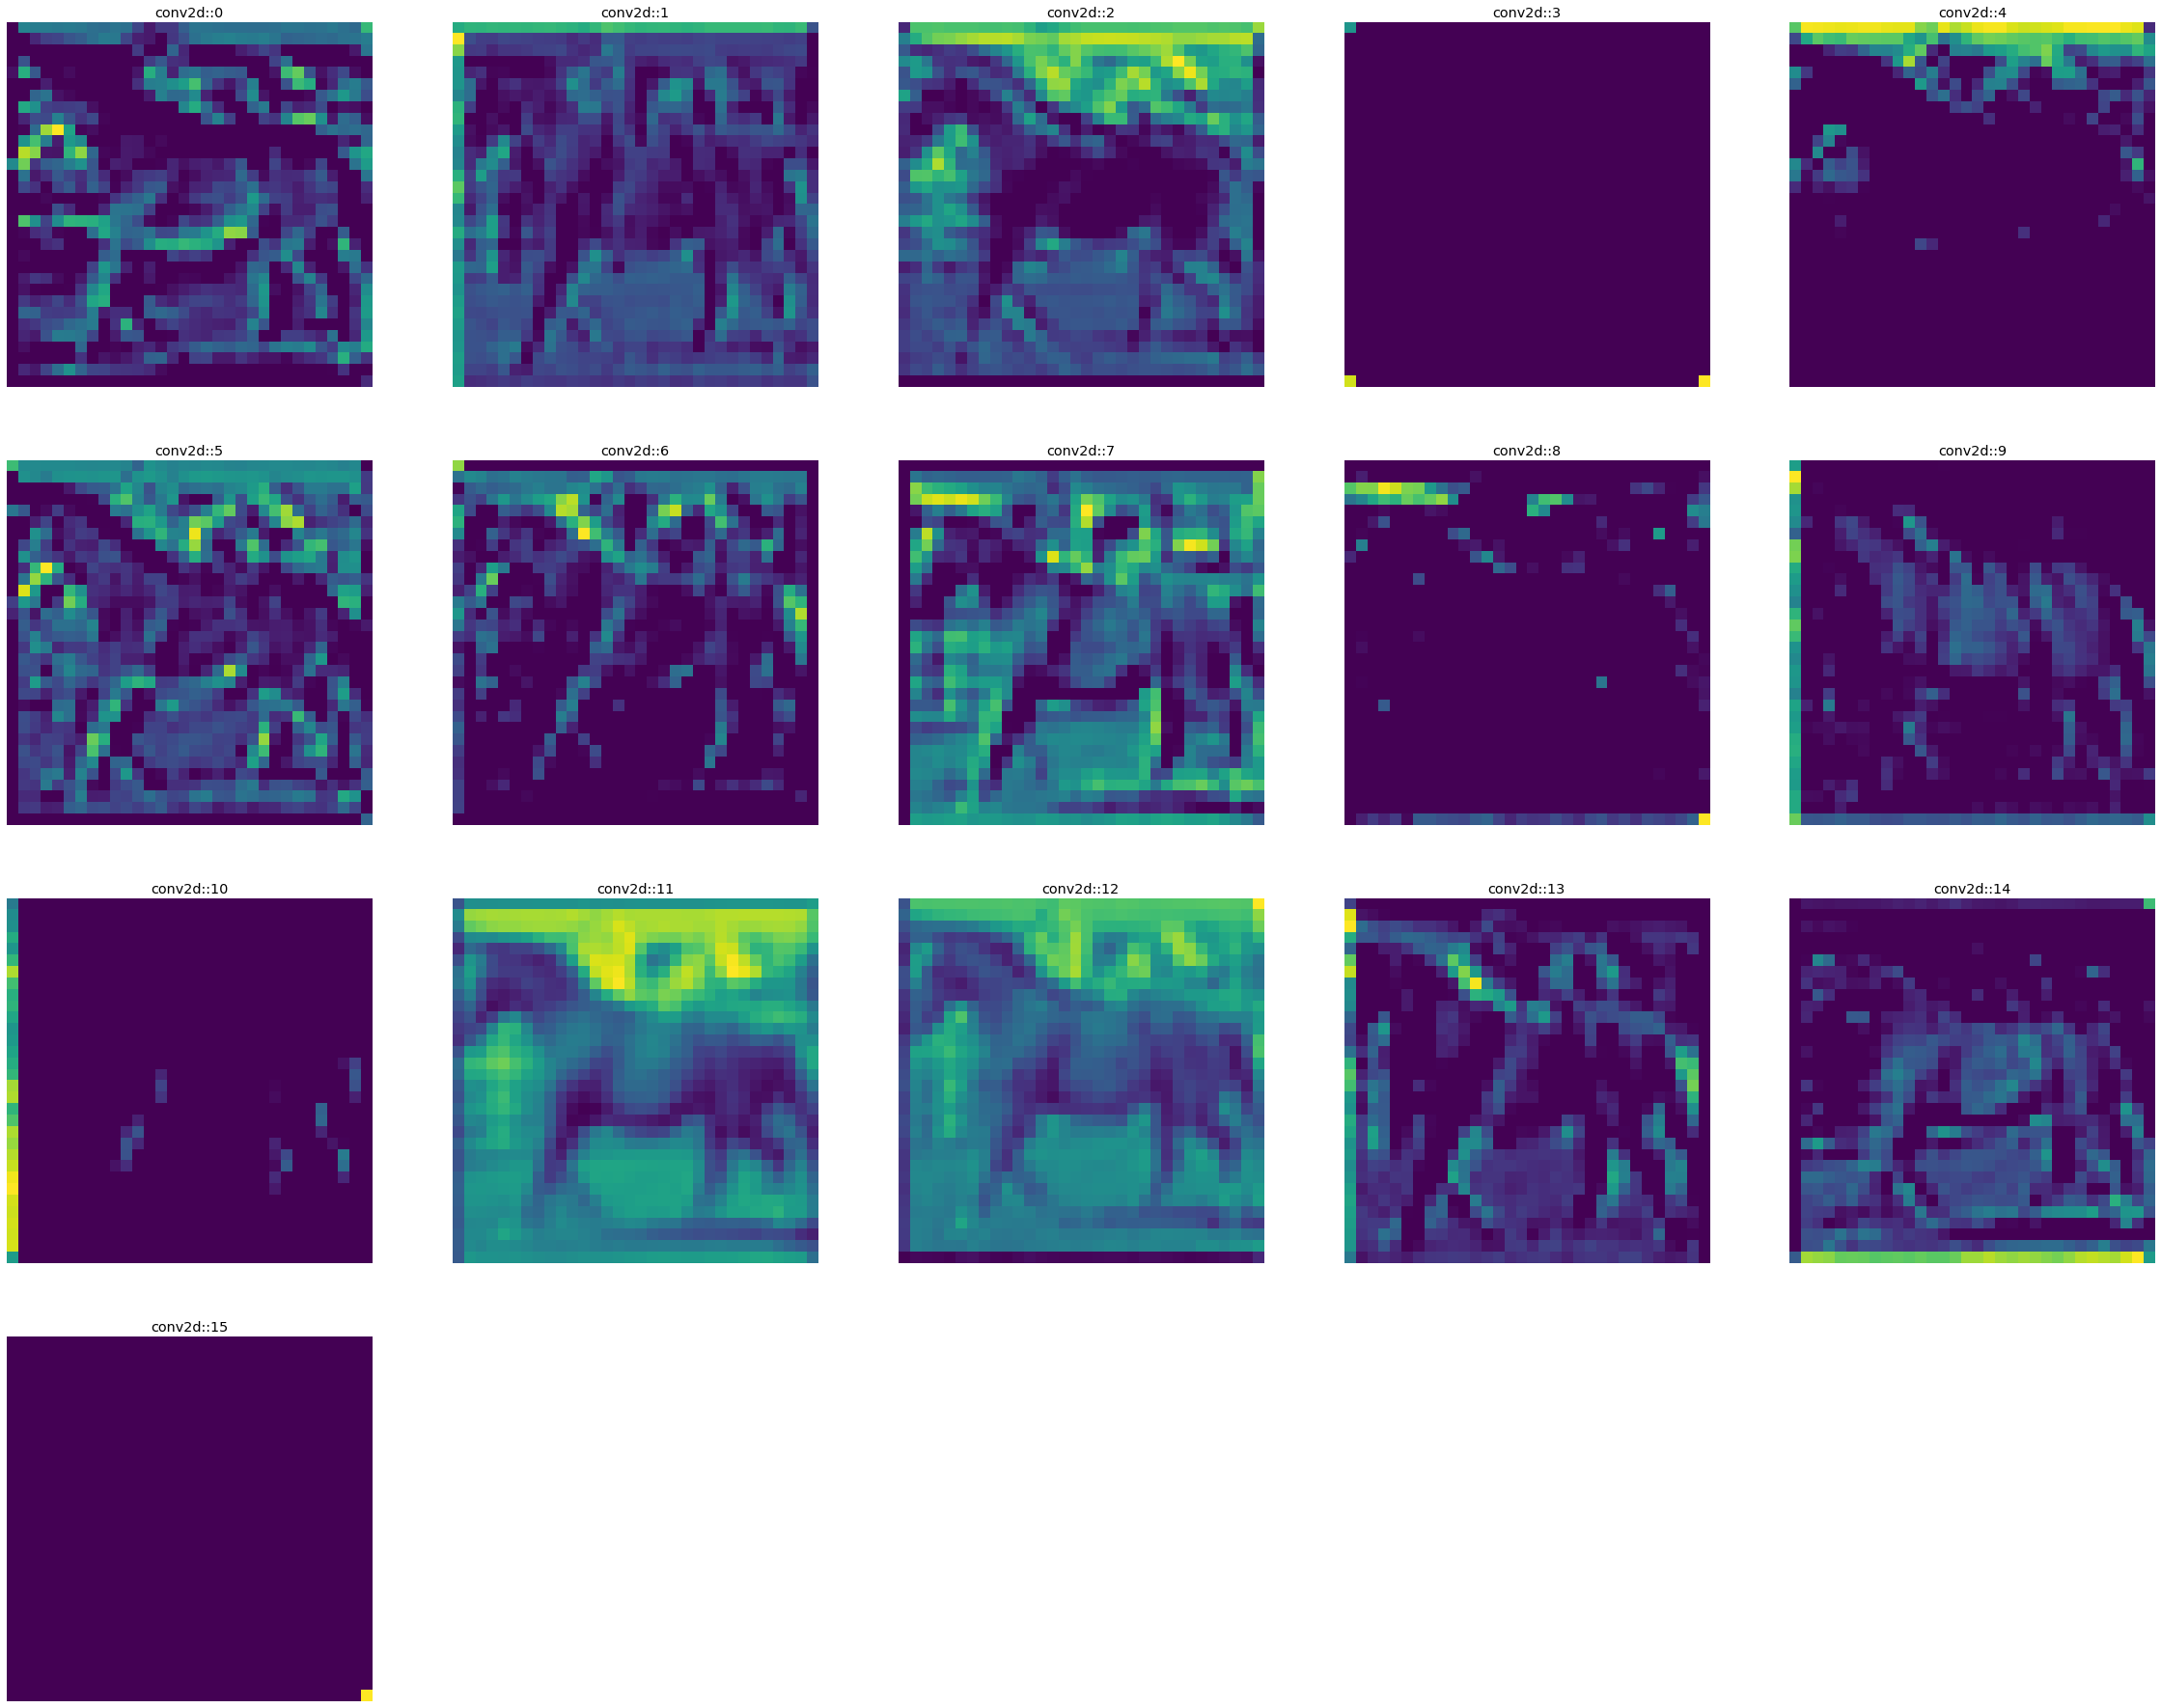

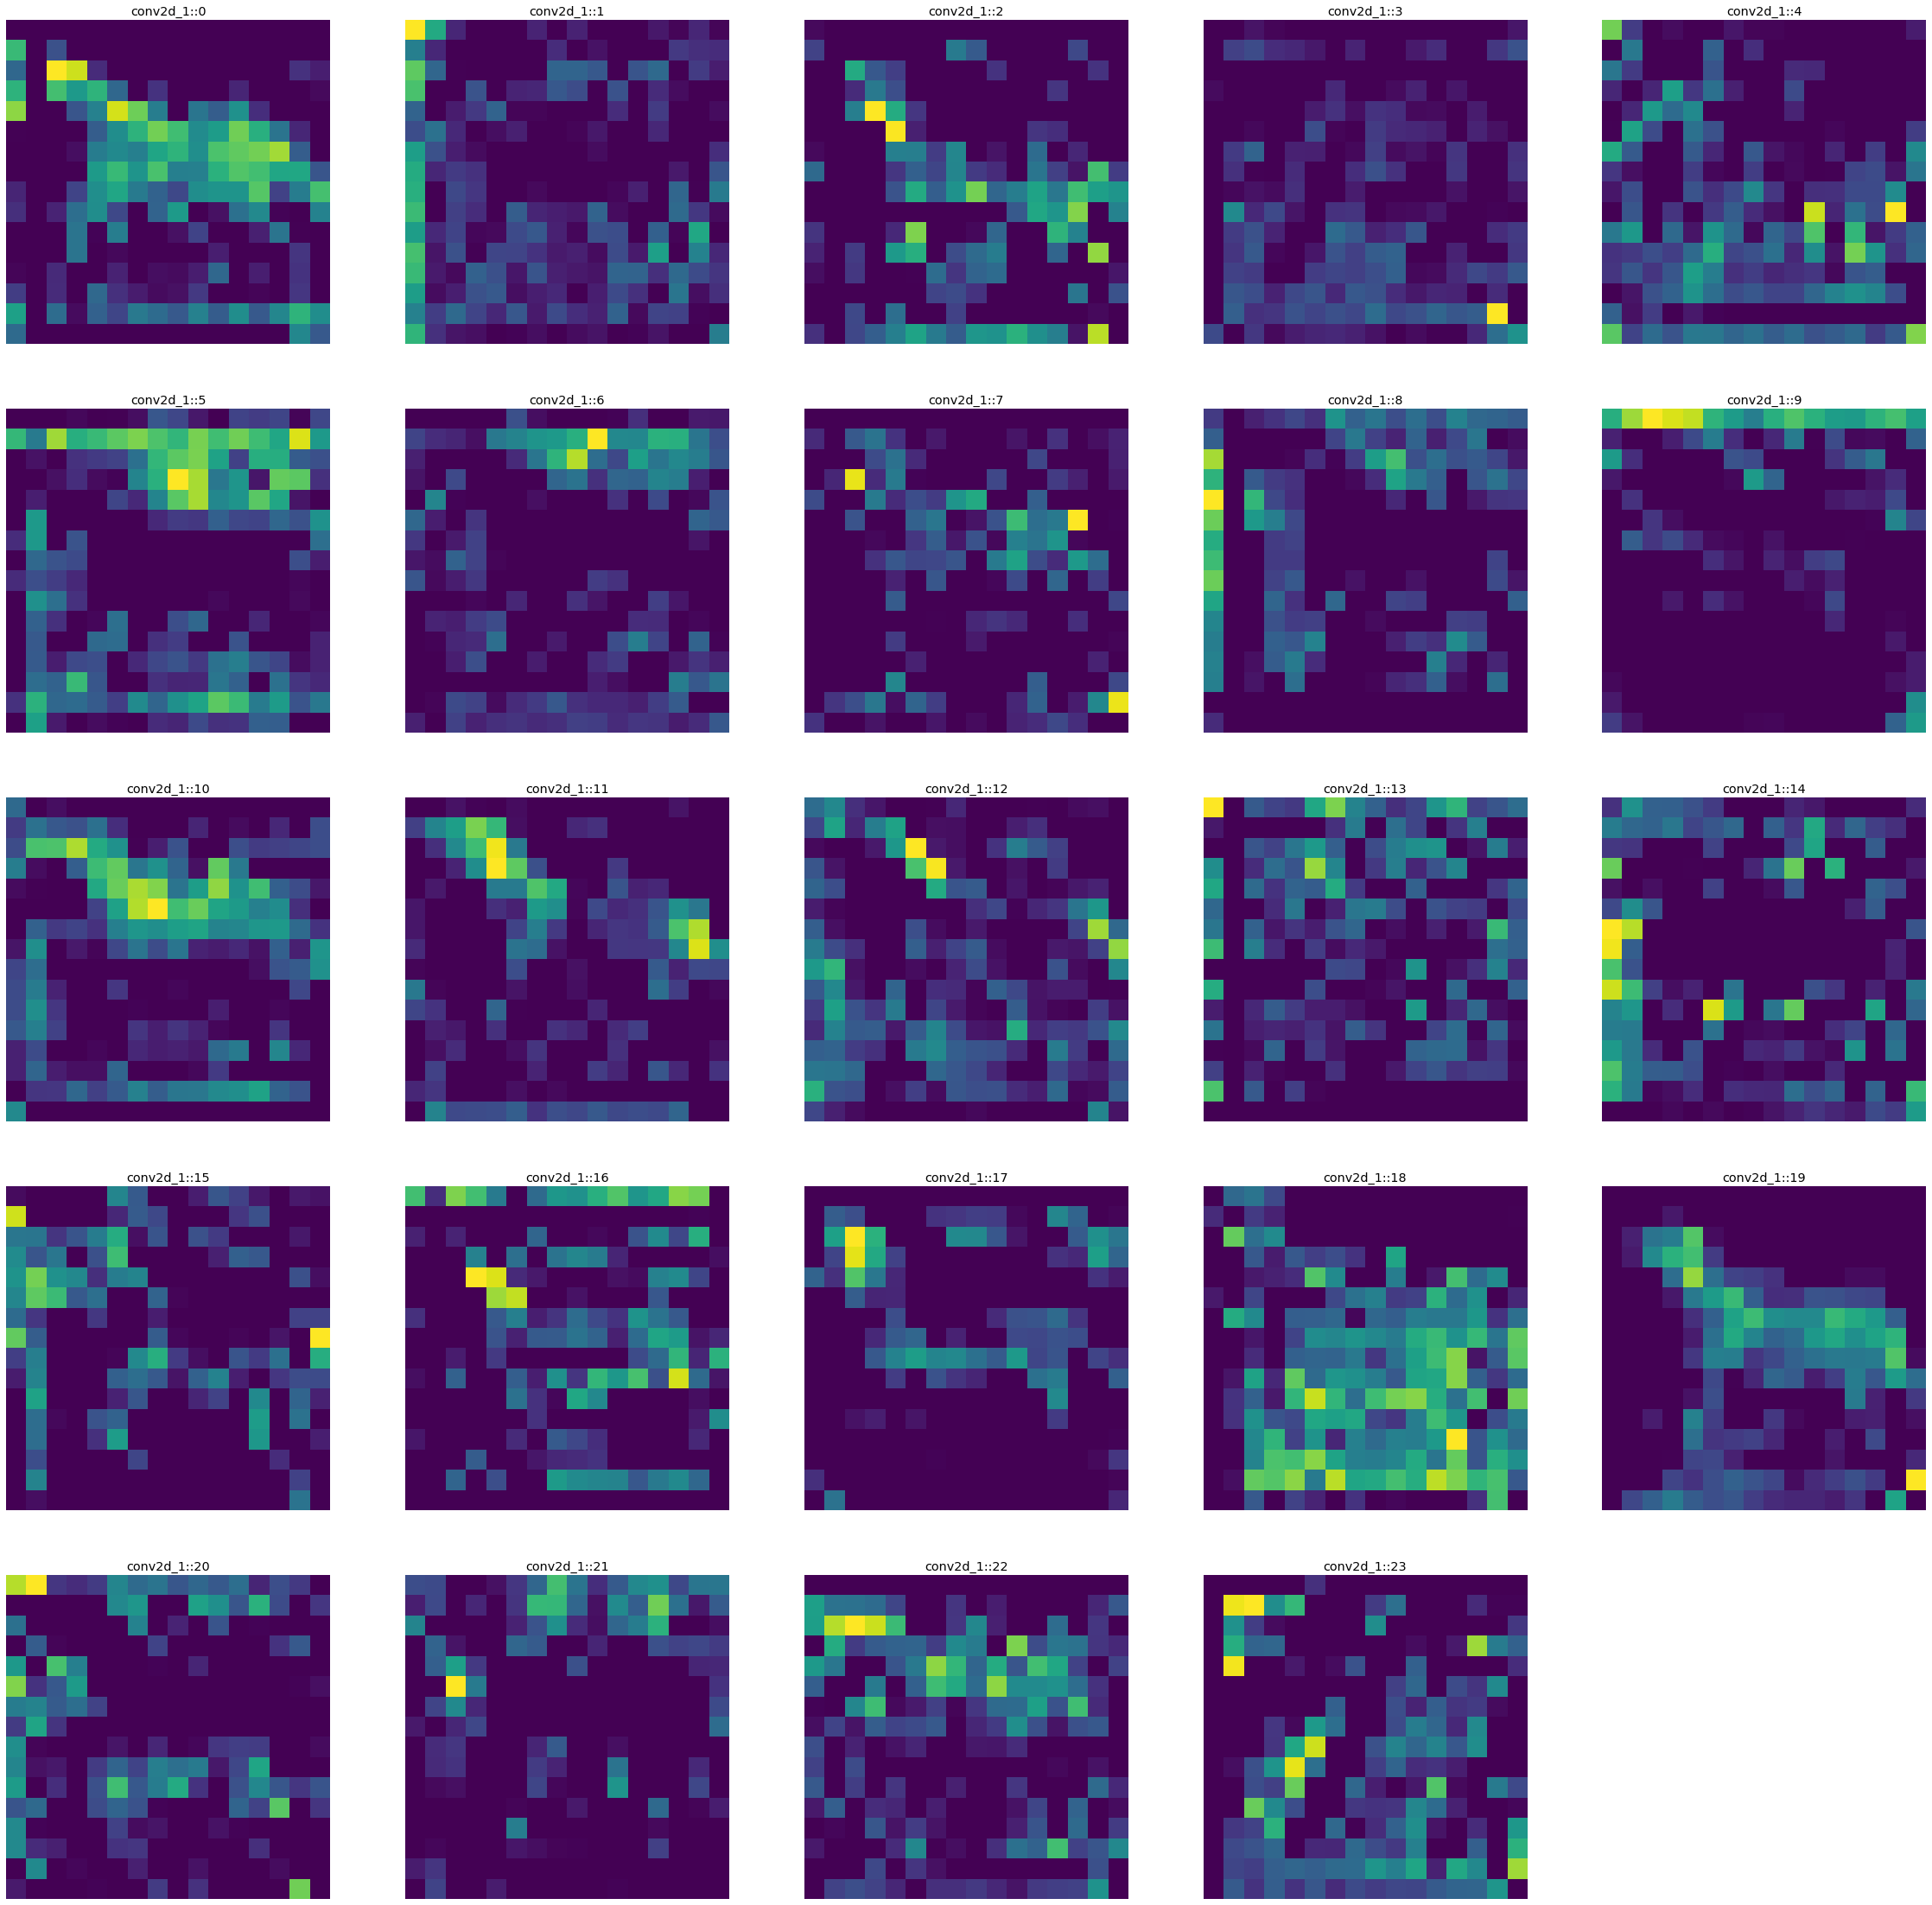

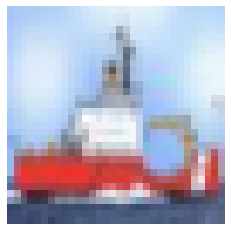

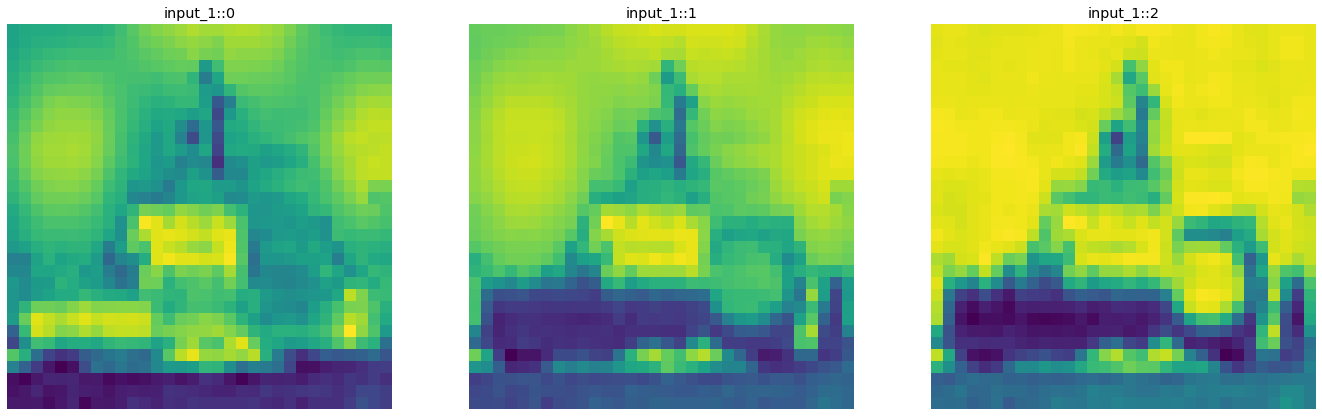

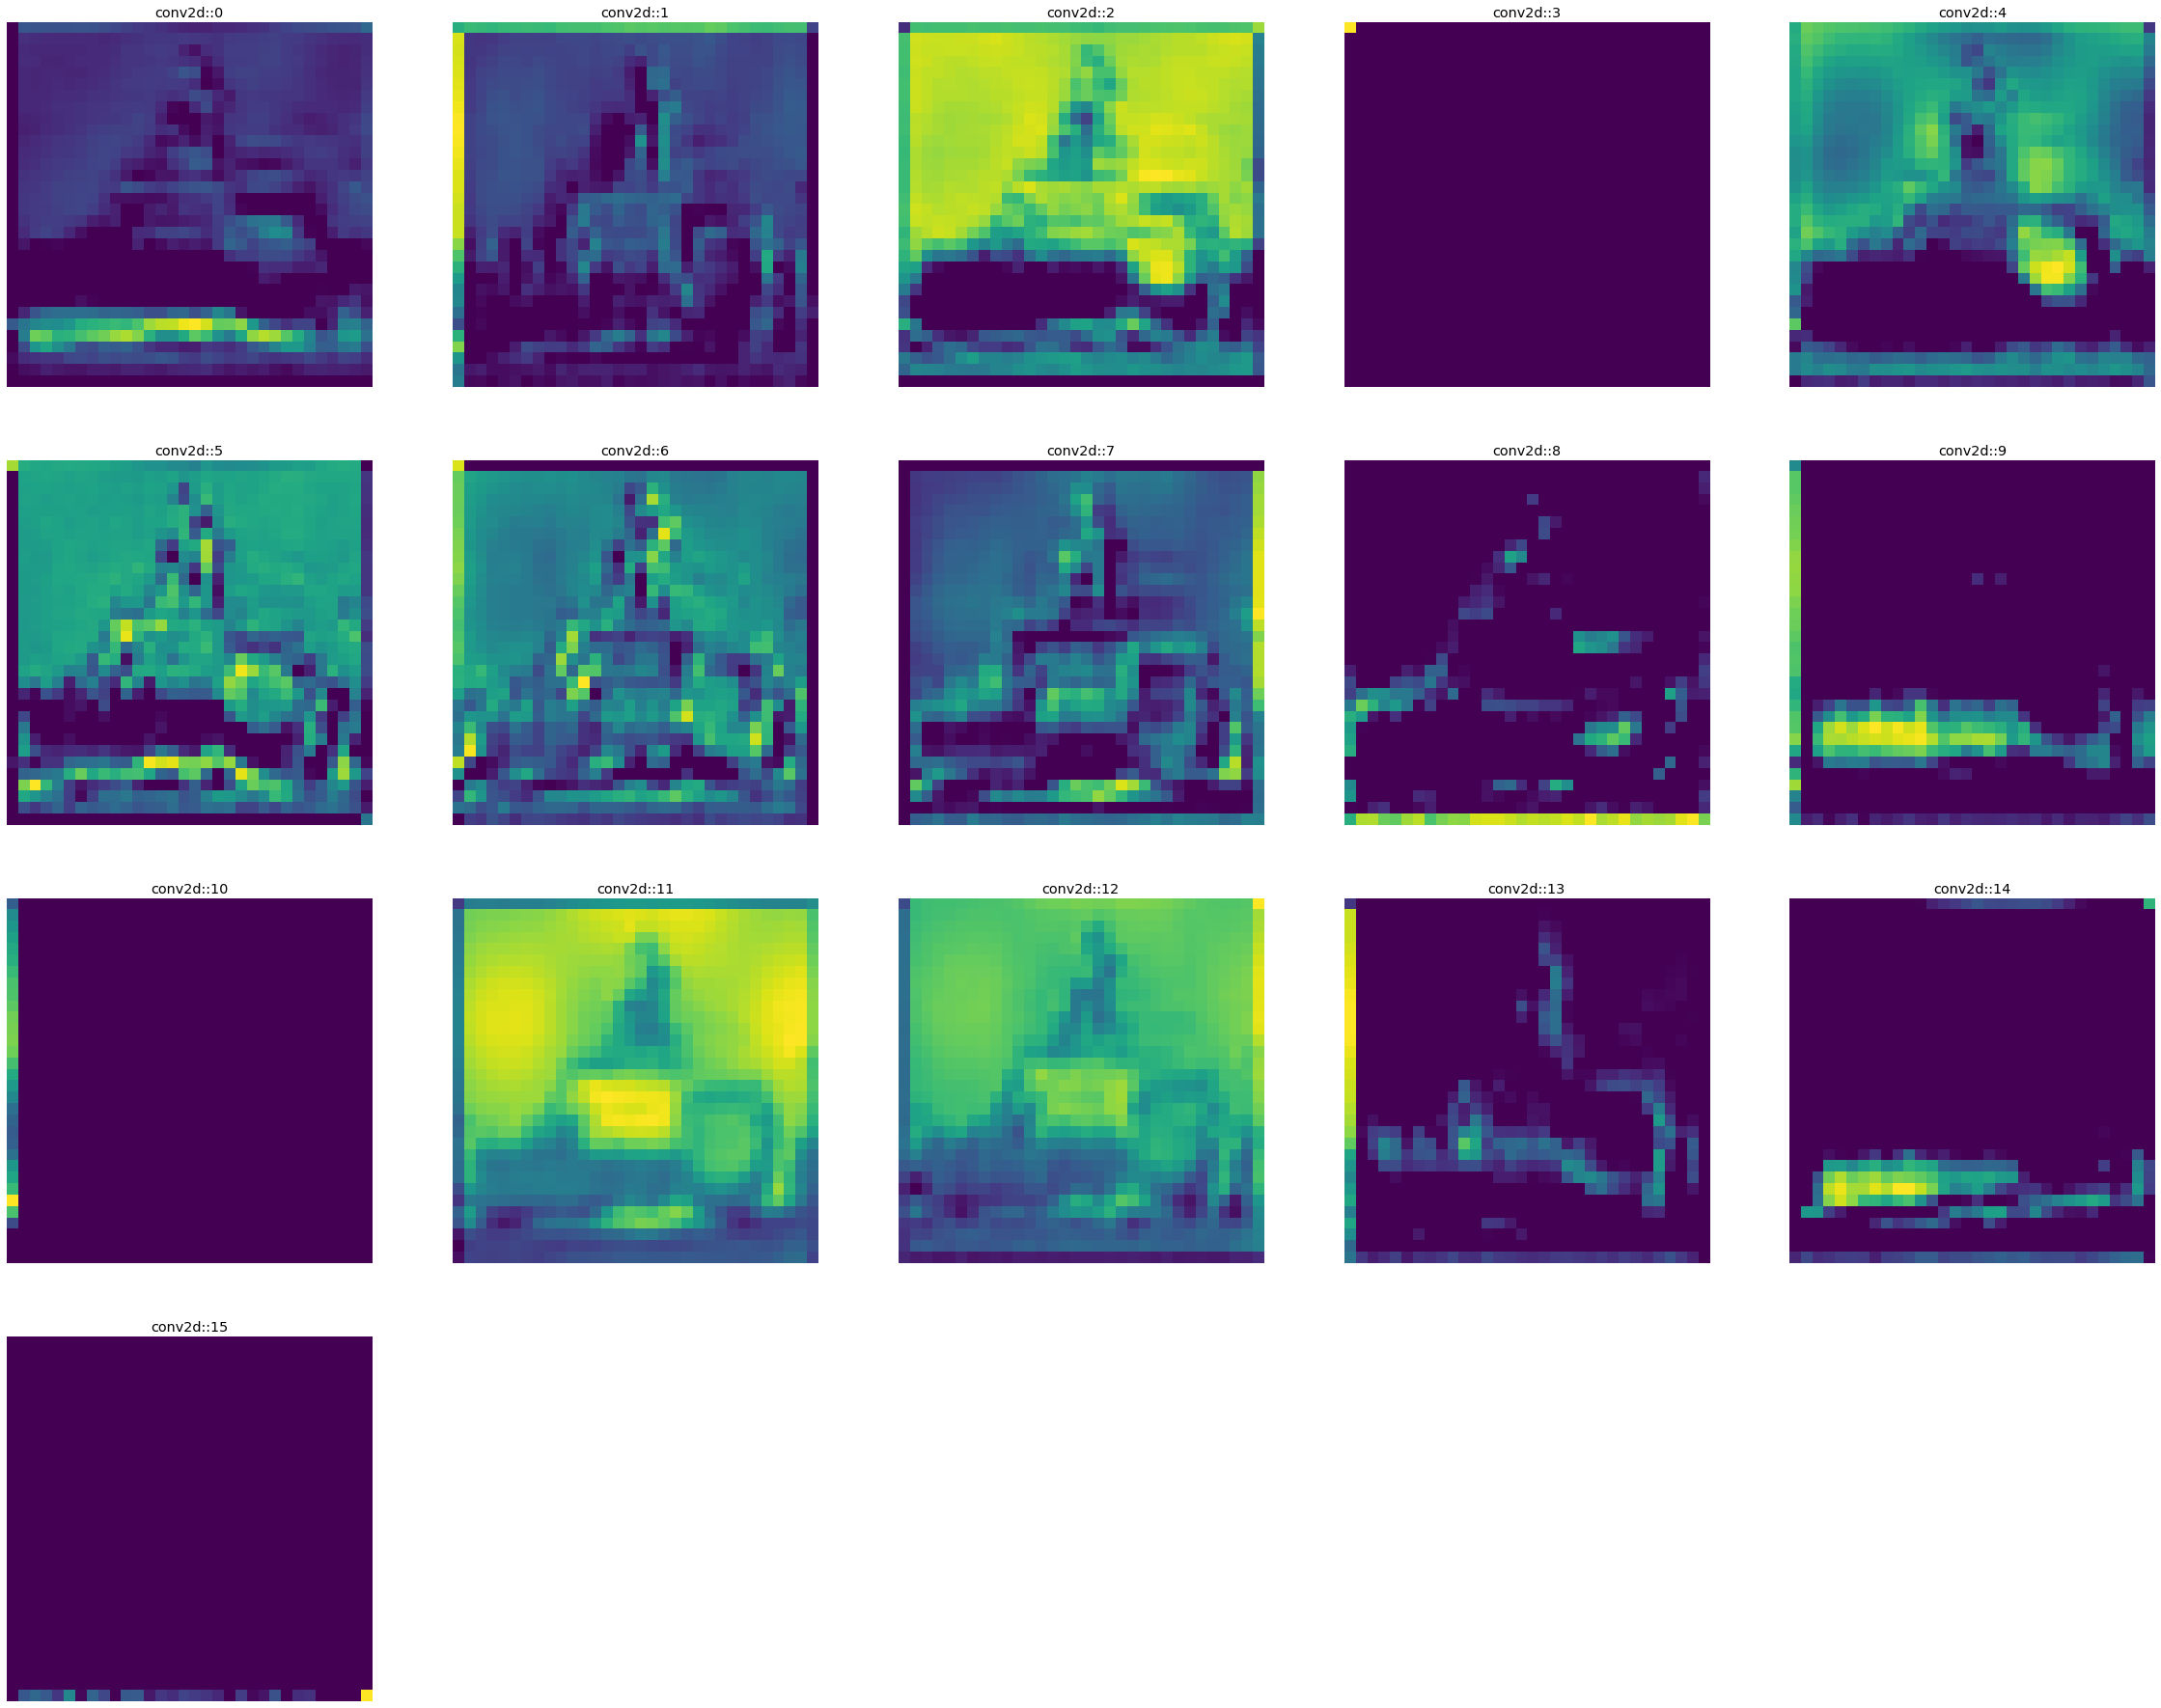

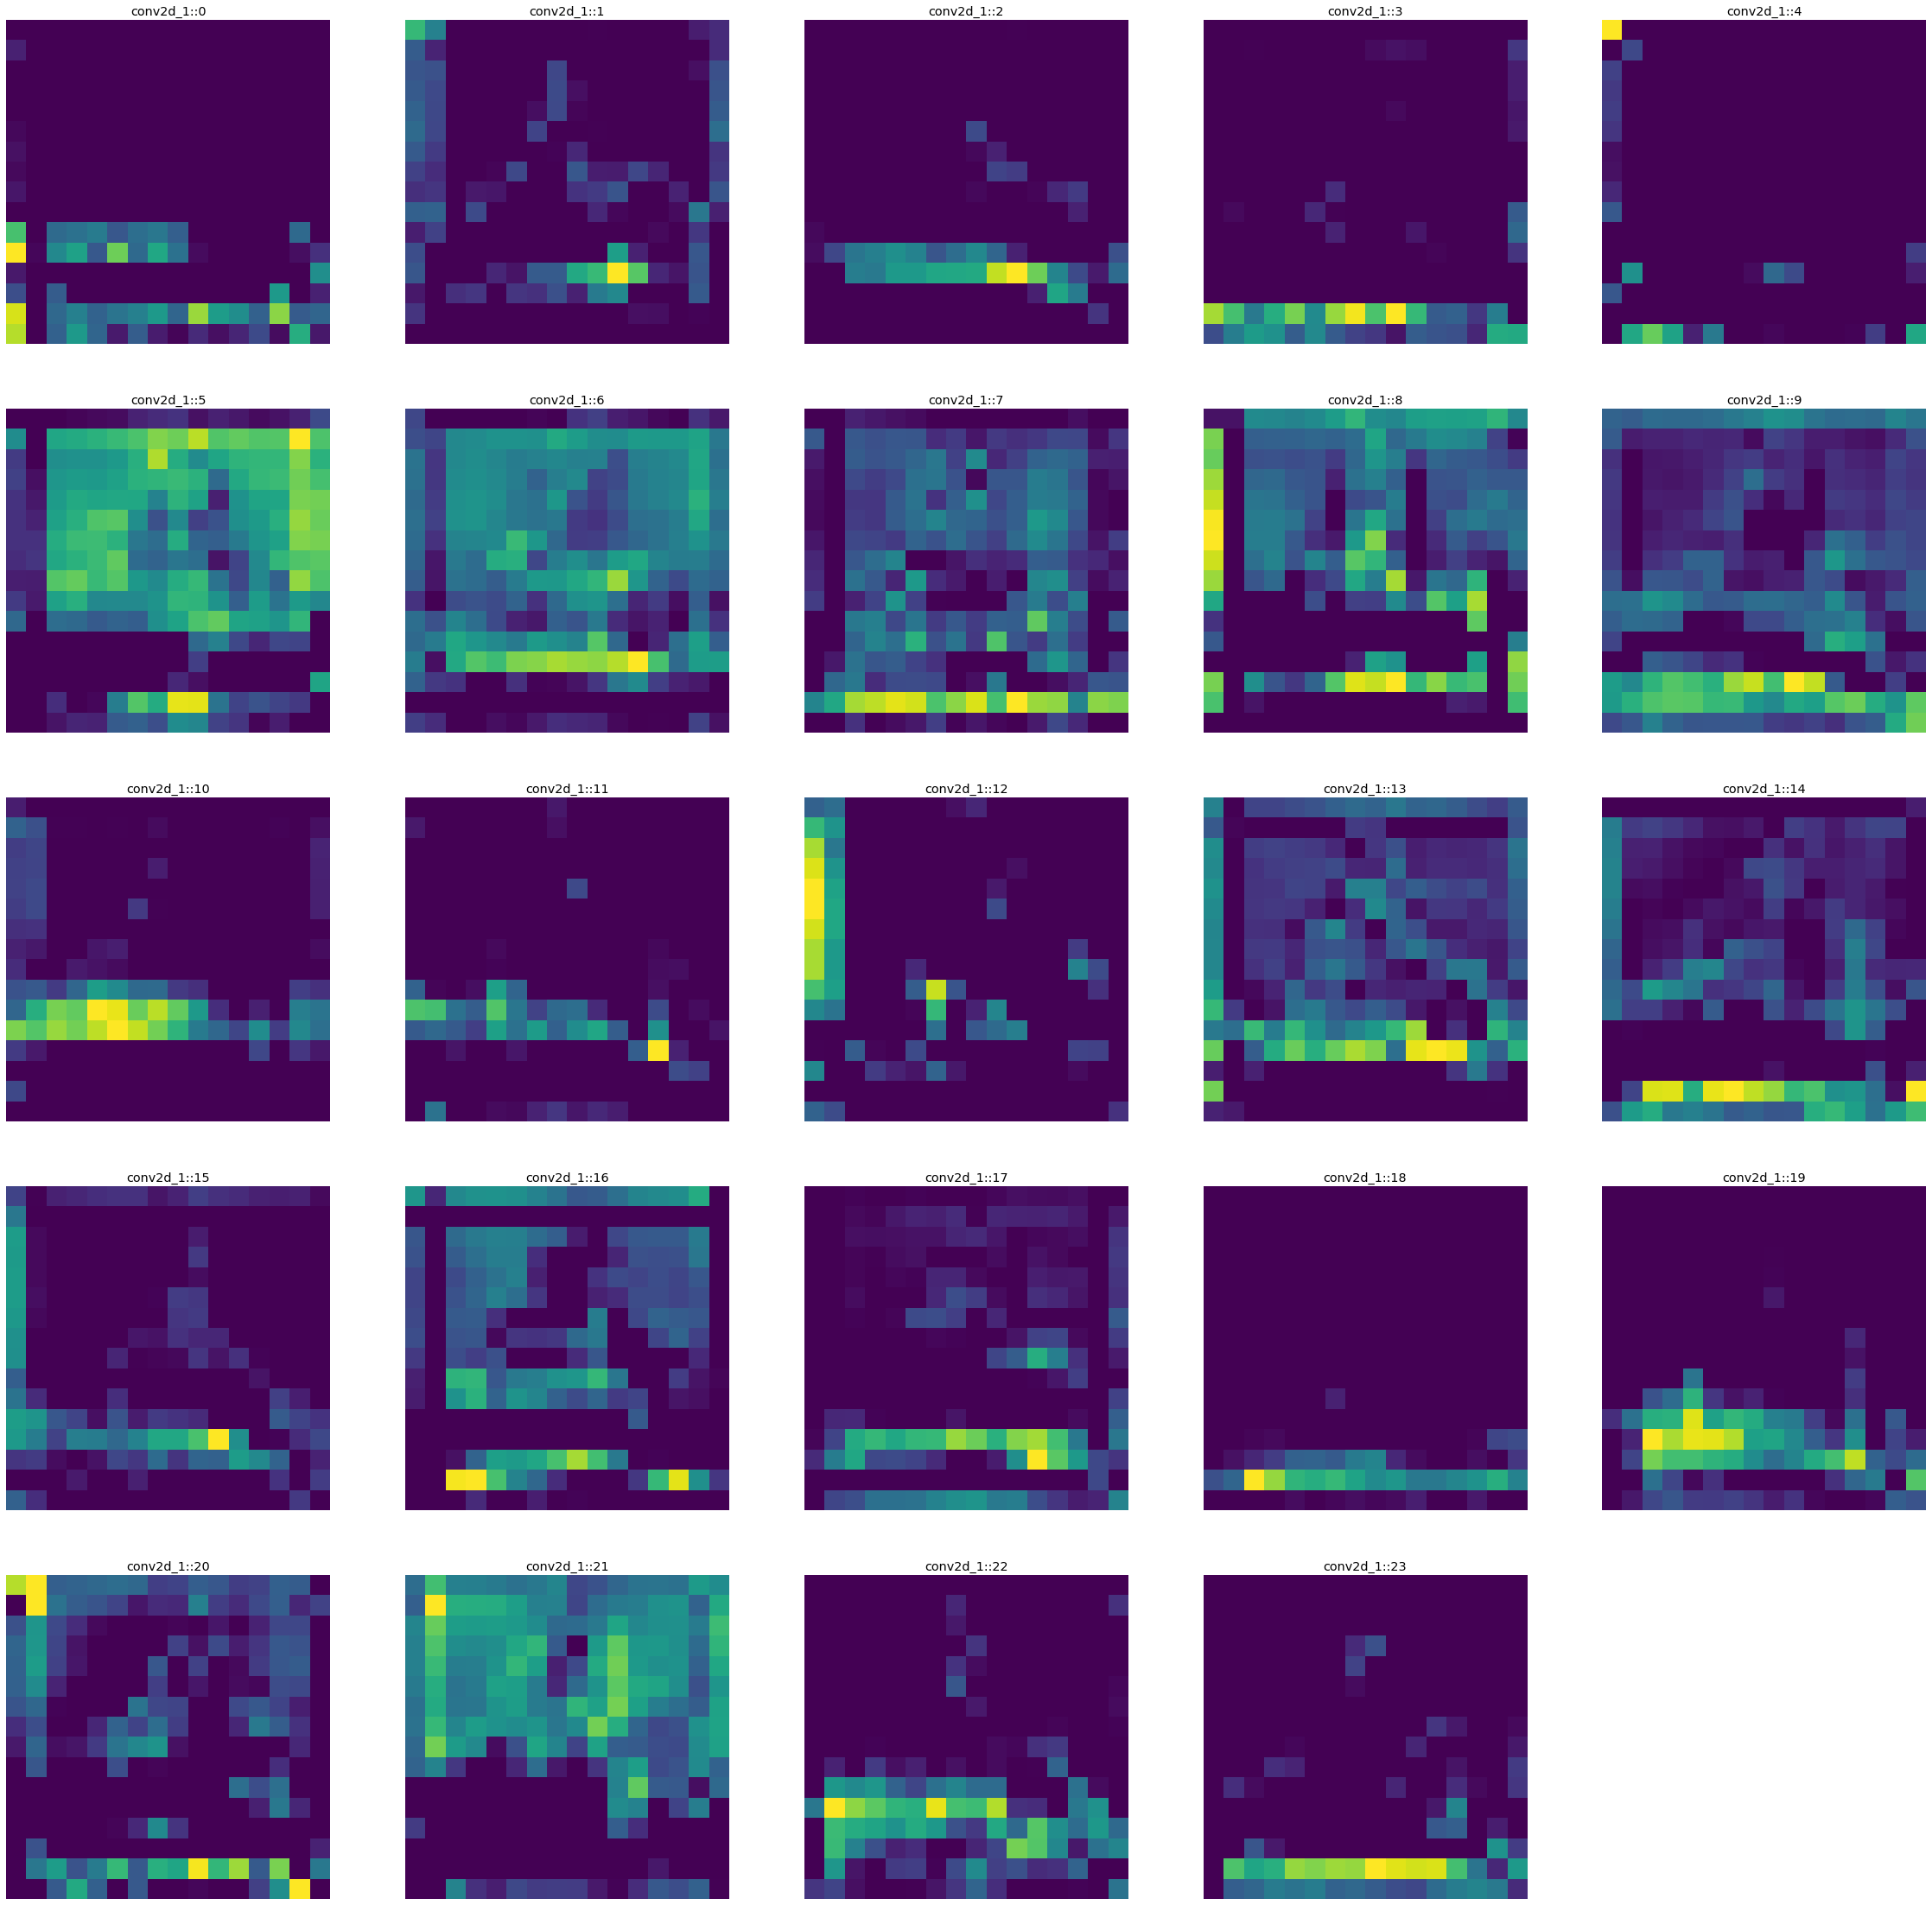

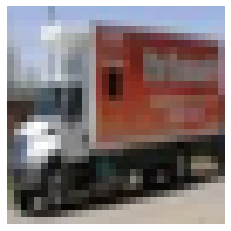

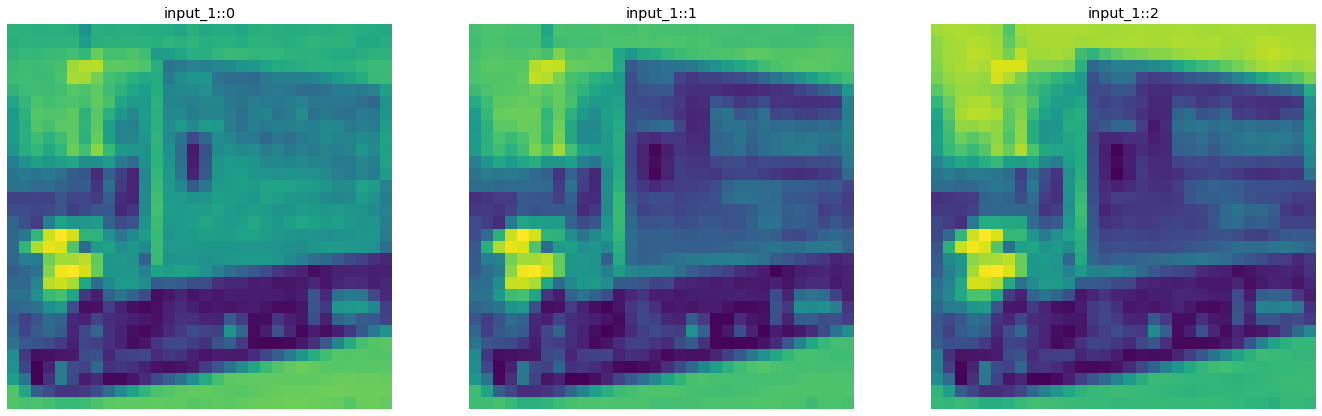

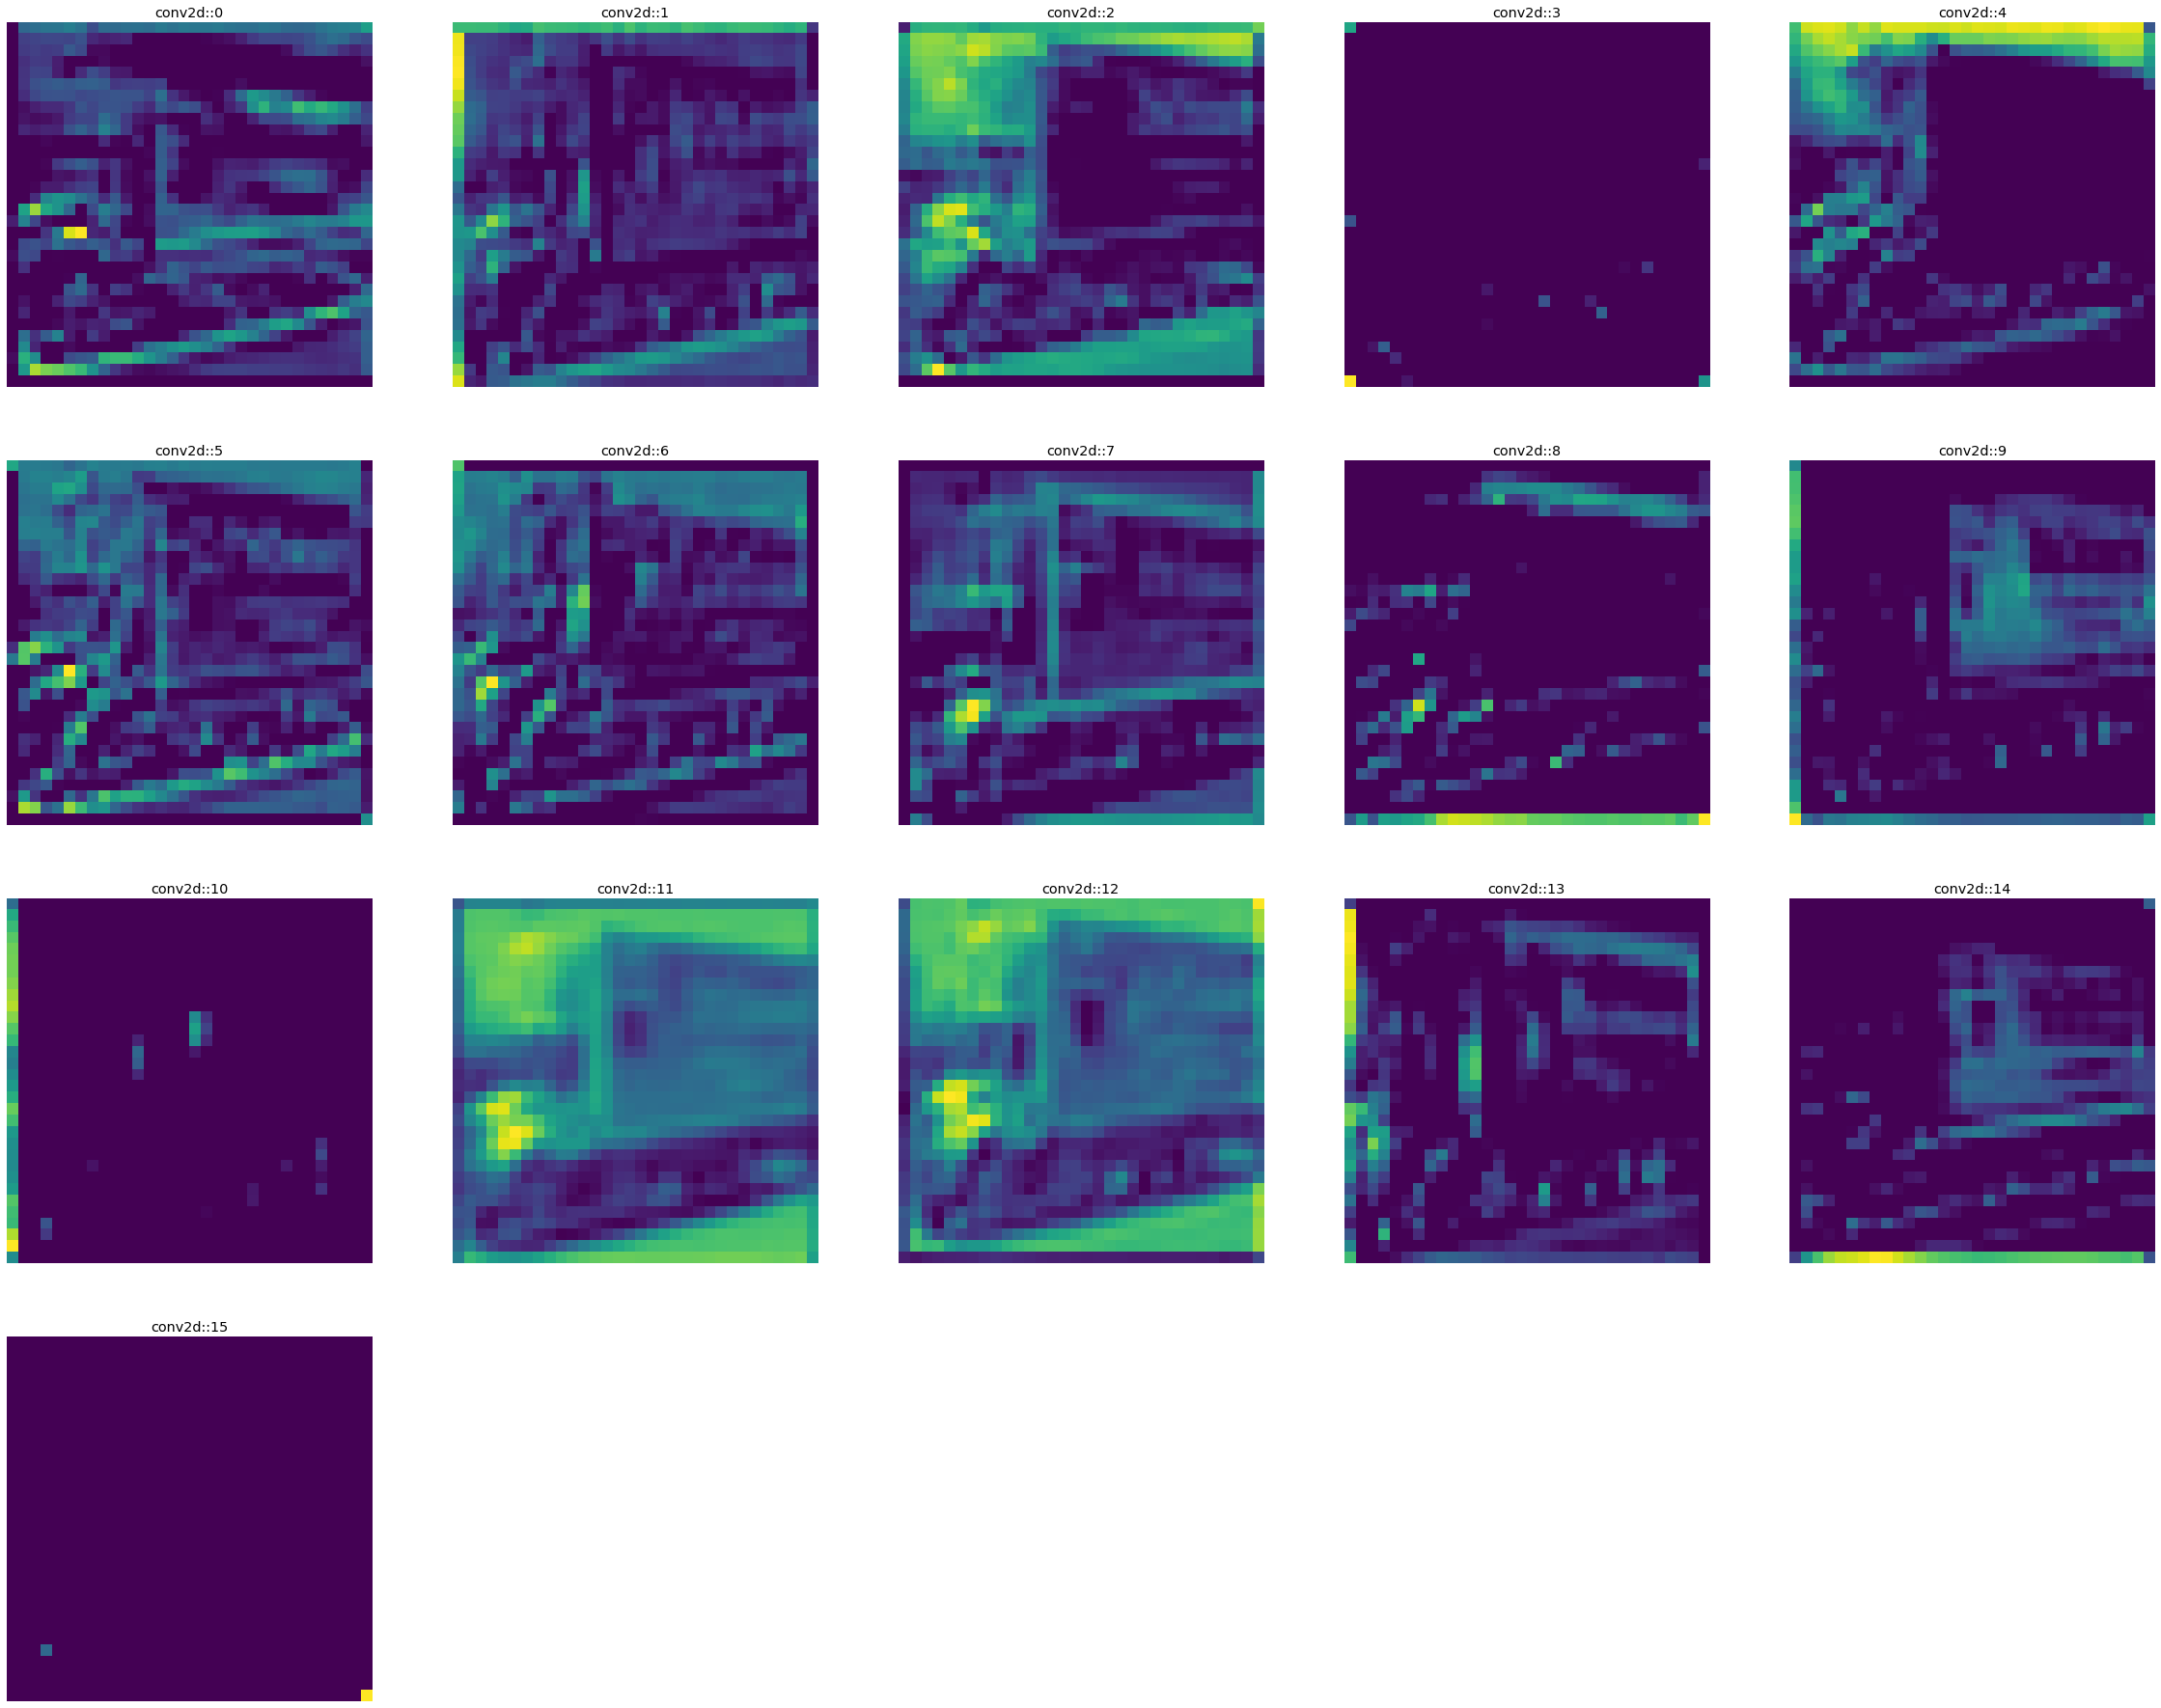

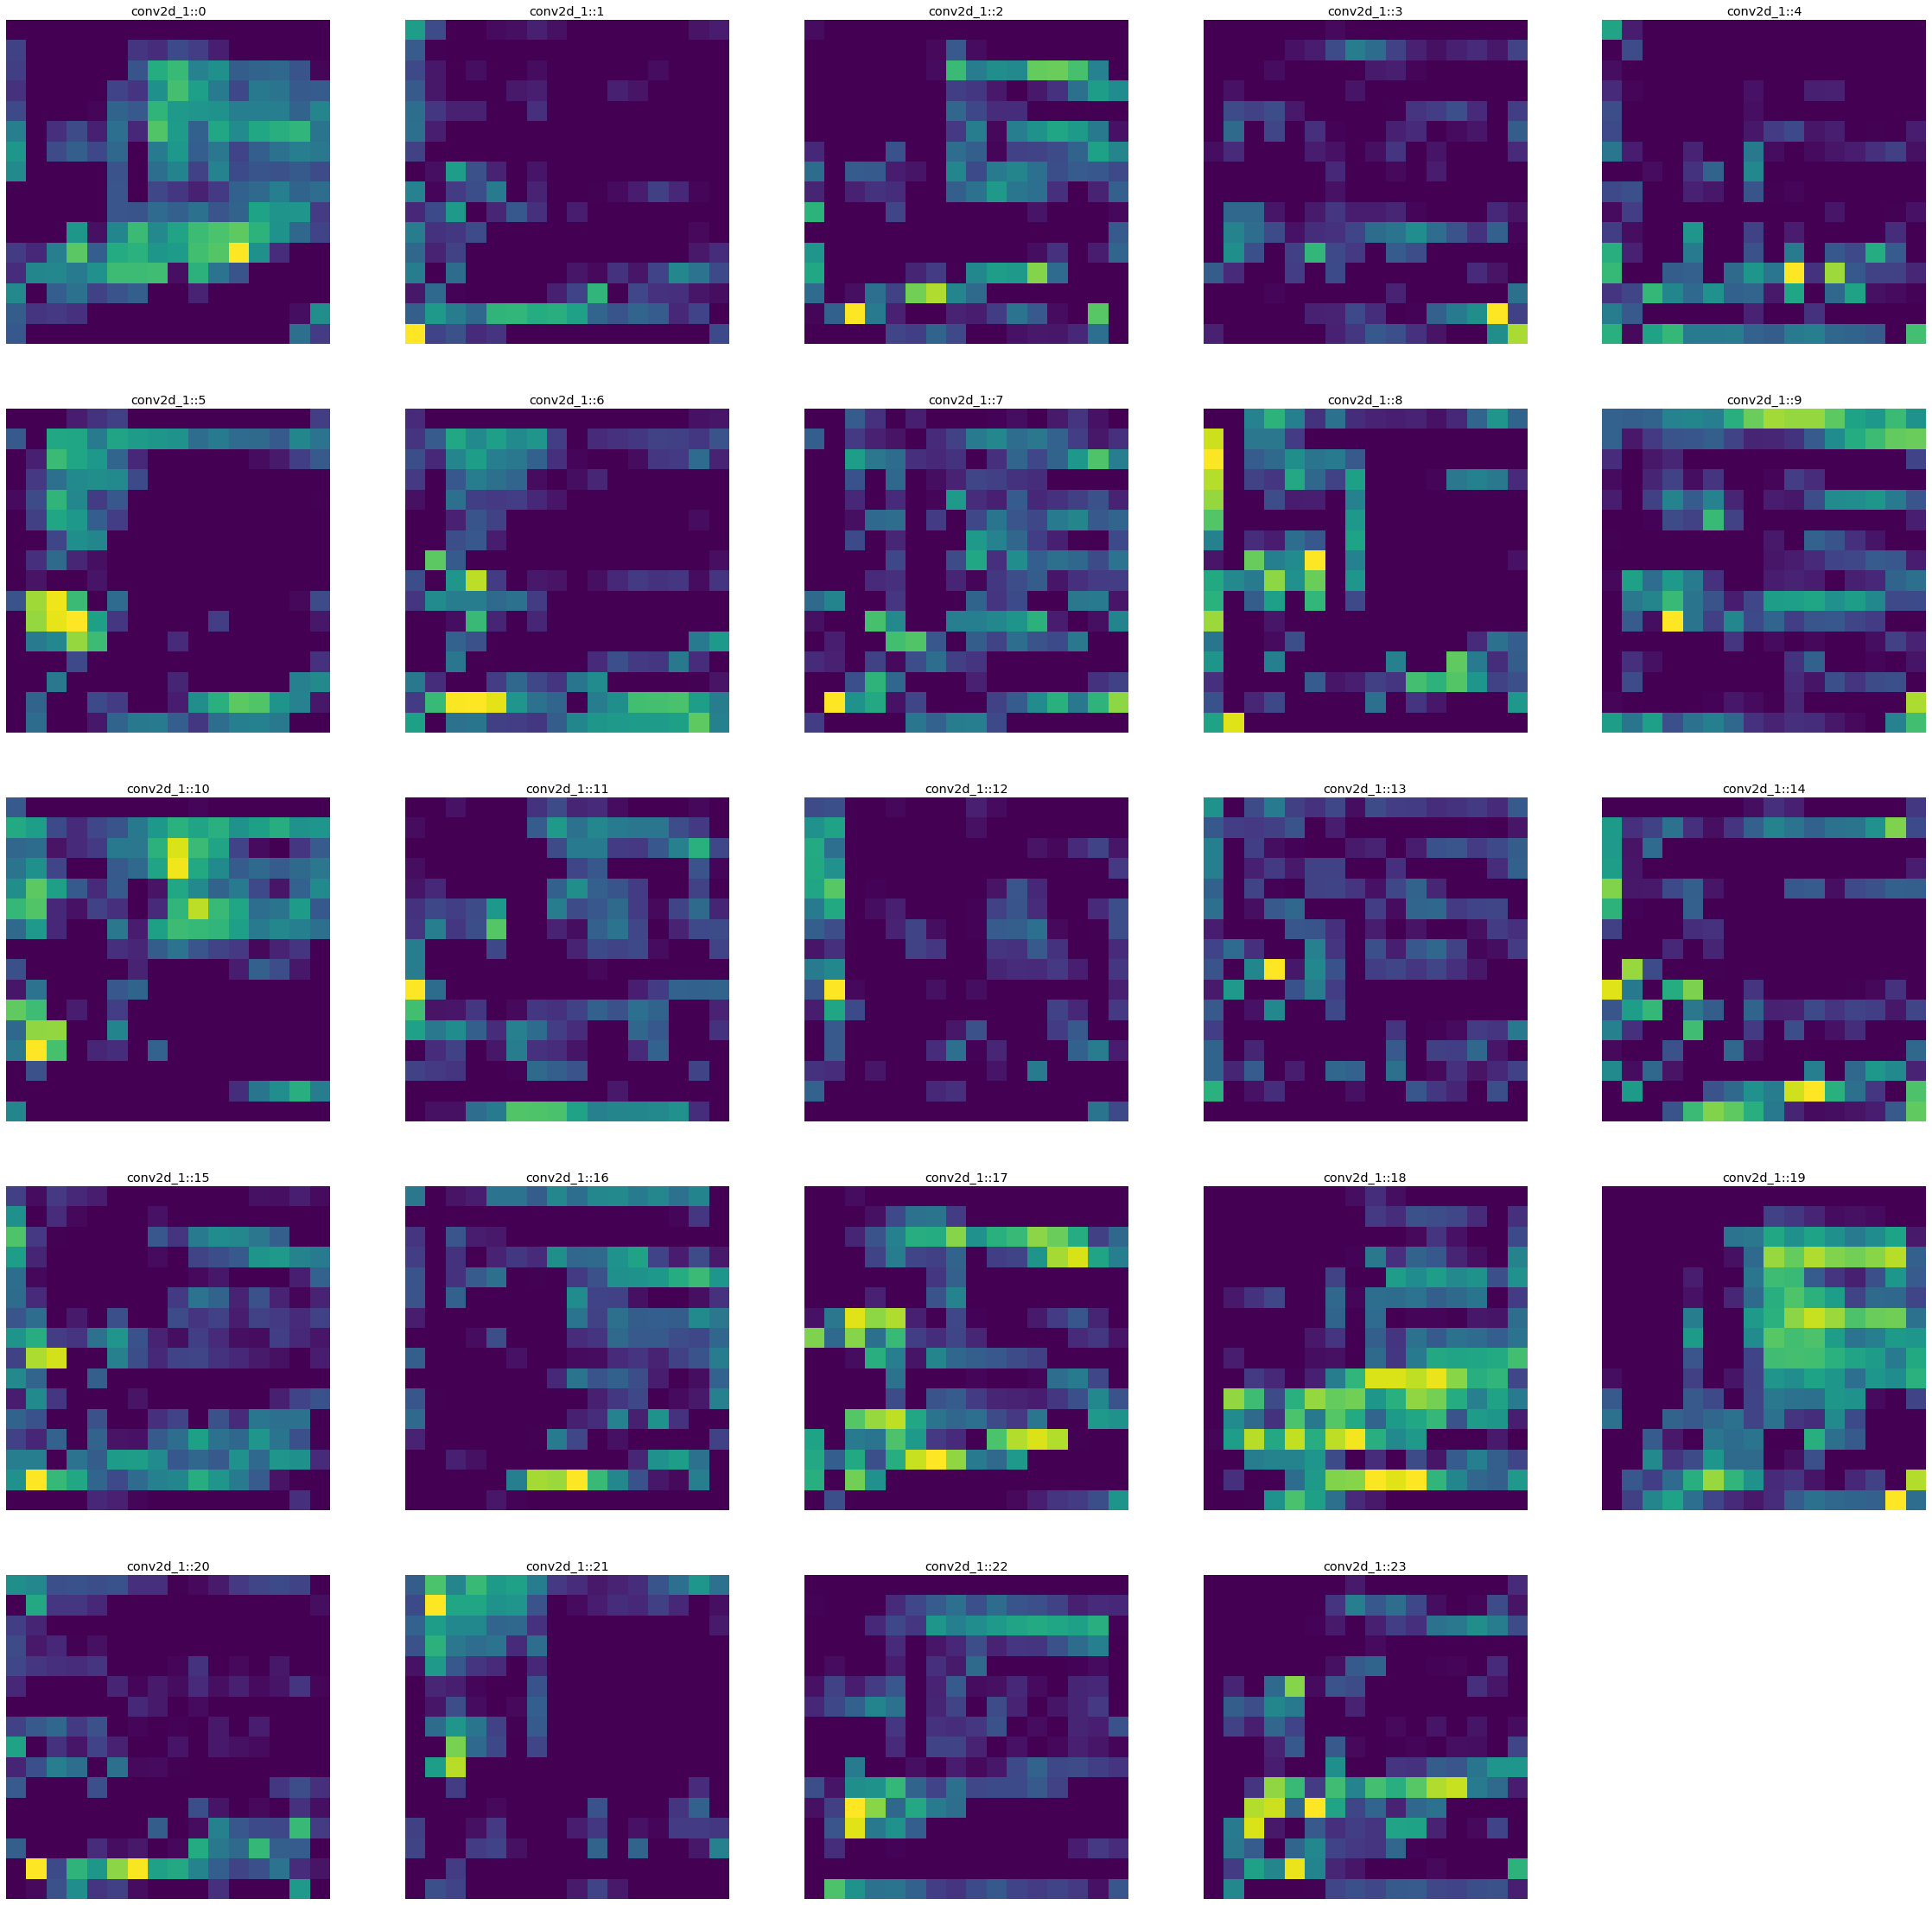

In [24]:
for index in correct_answers_top:
    image = excerpt_test_x[index]
    plot_convolutions(model, image, take=3)
    plt.show()

On average, it is clear that about 4 convolutions in first layer are of no use. That means we could remove them.

#### Inspect most confident incorrect answers

In [25]:
incorrect_answers_top = incorrect_answers_df.loc[
    incorrect_answers_df.groupby(['correct_answer'])['confidence'].idxmax()
].sort_values(by=['correct_answer'])[['index', 'answer', 'correct_answer']].to_dict('records')

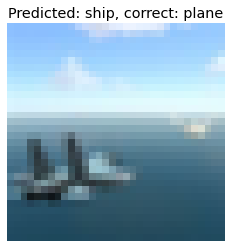

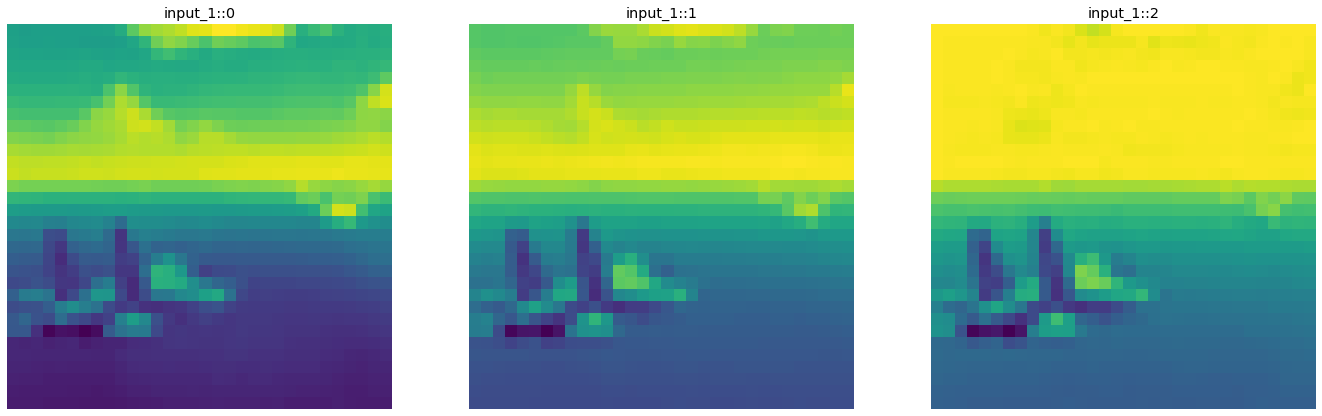

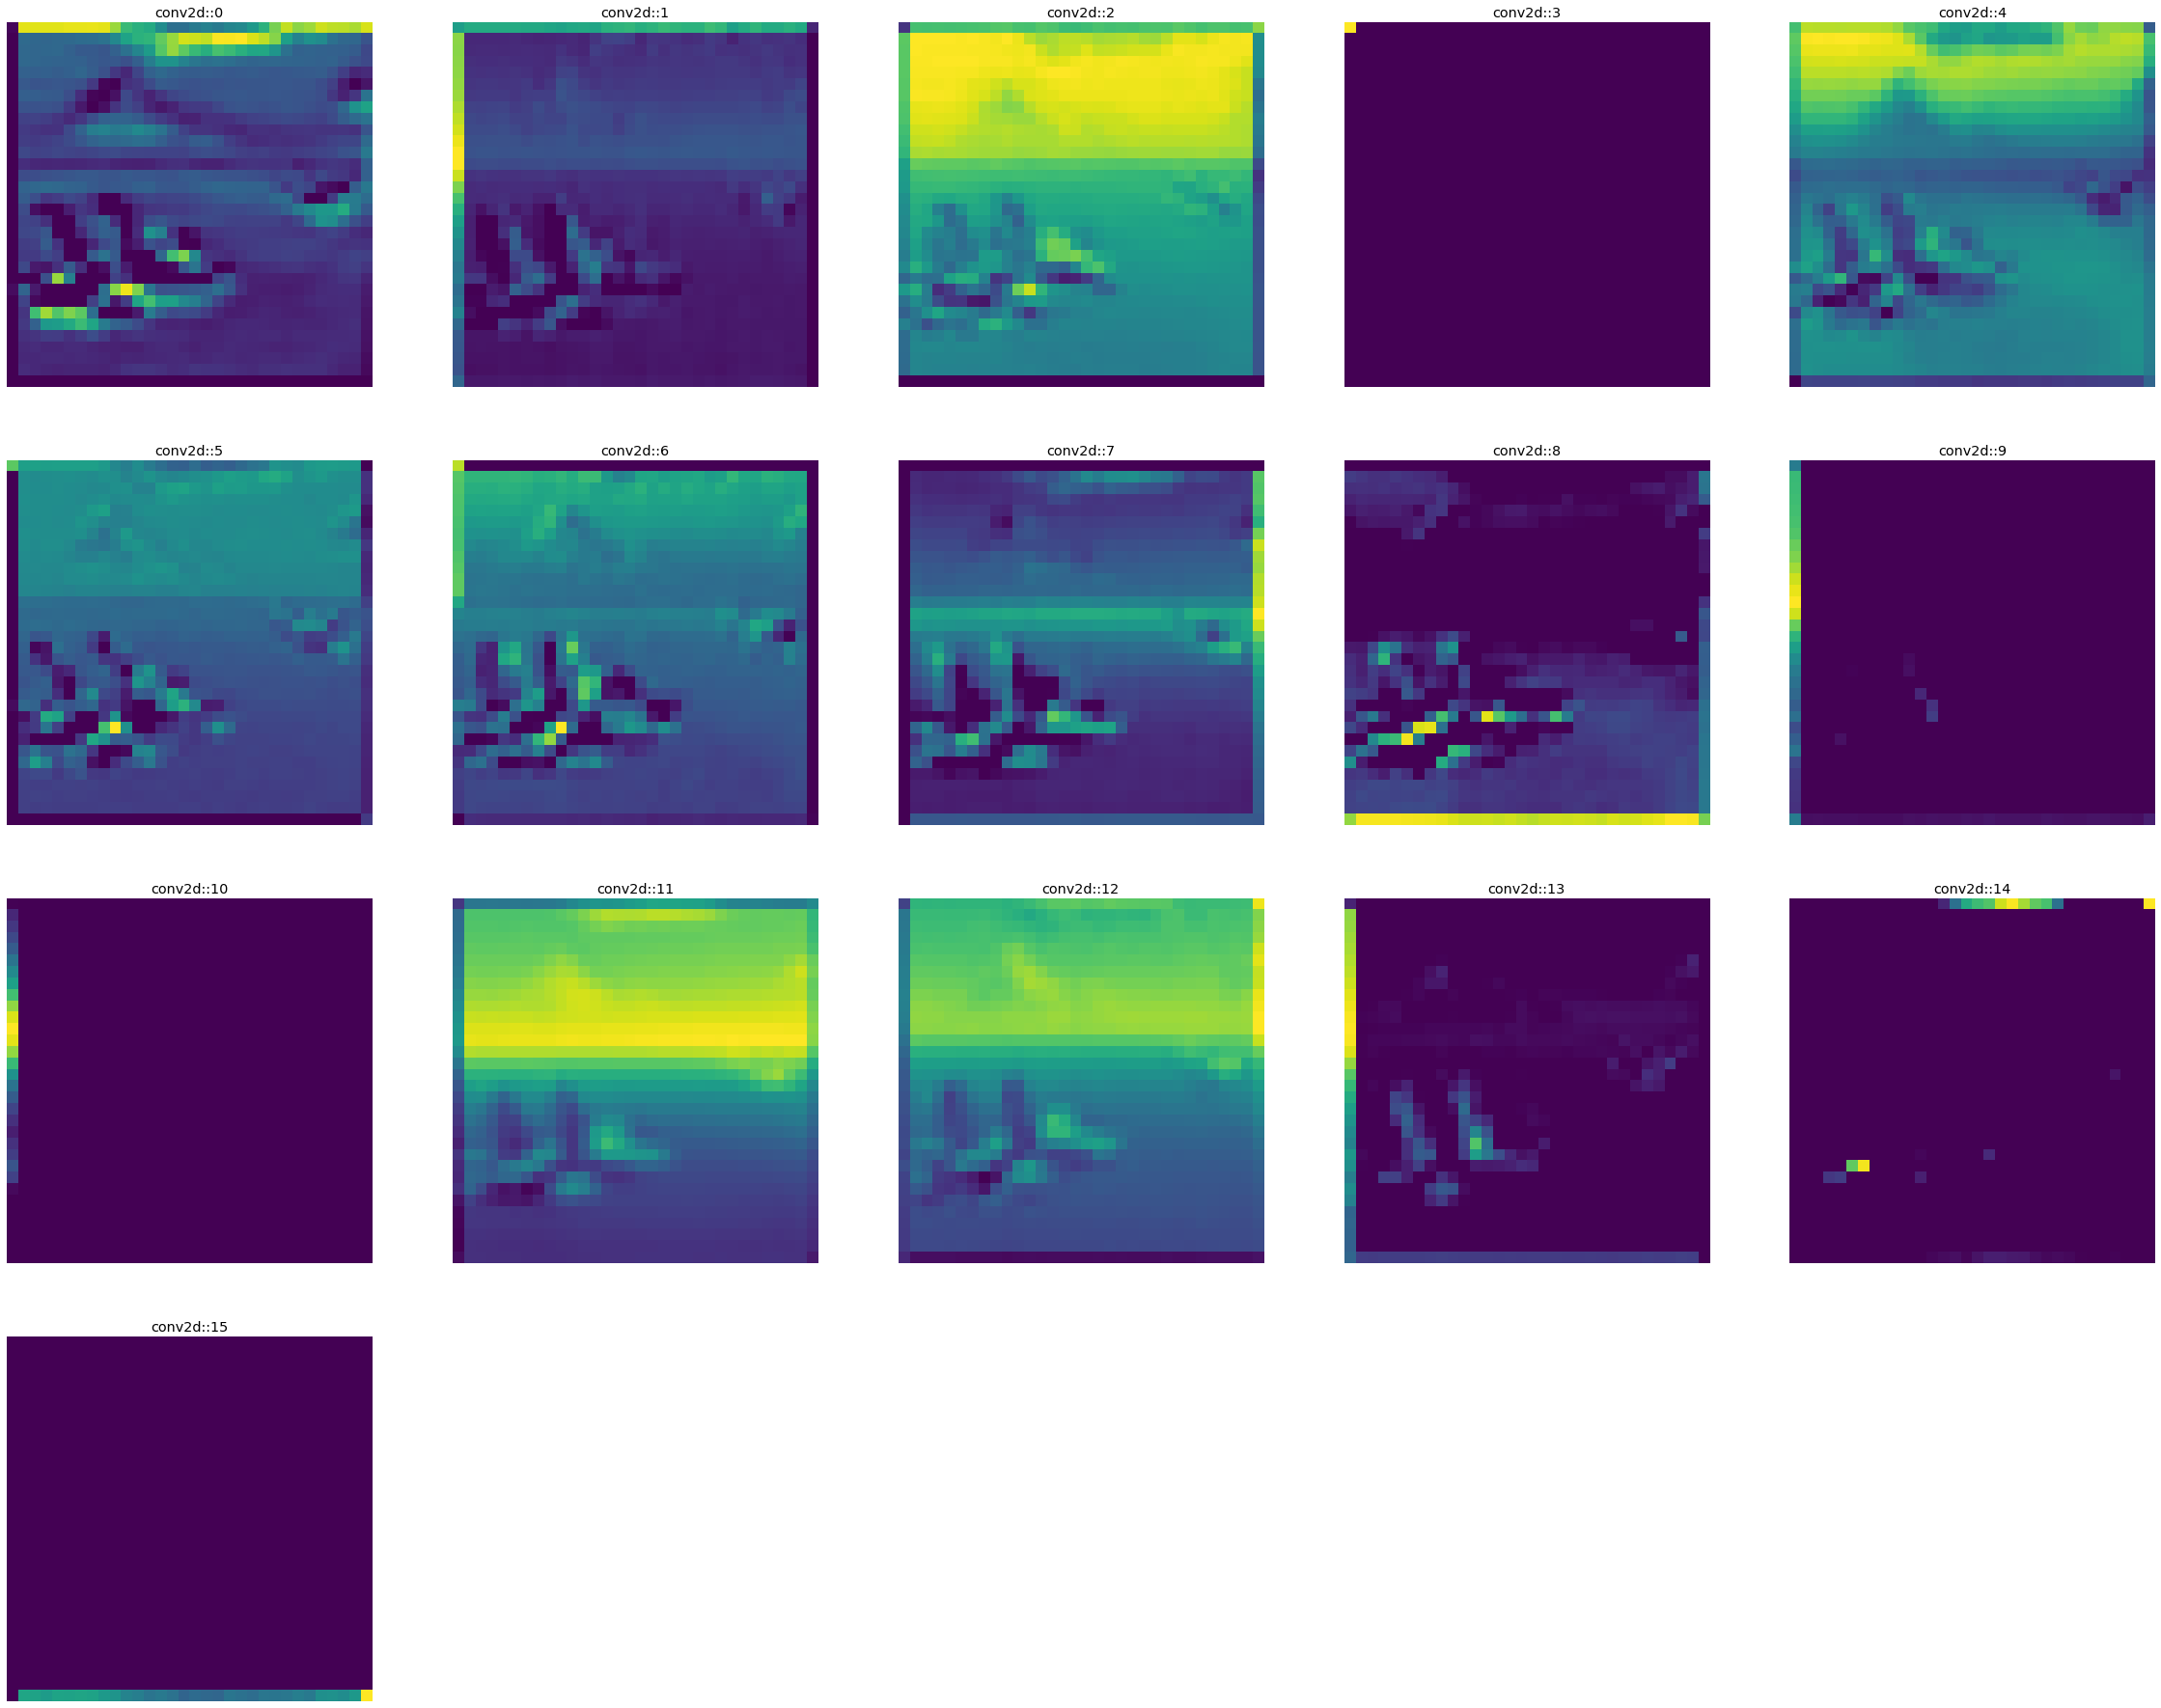

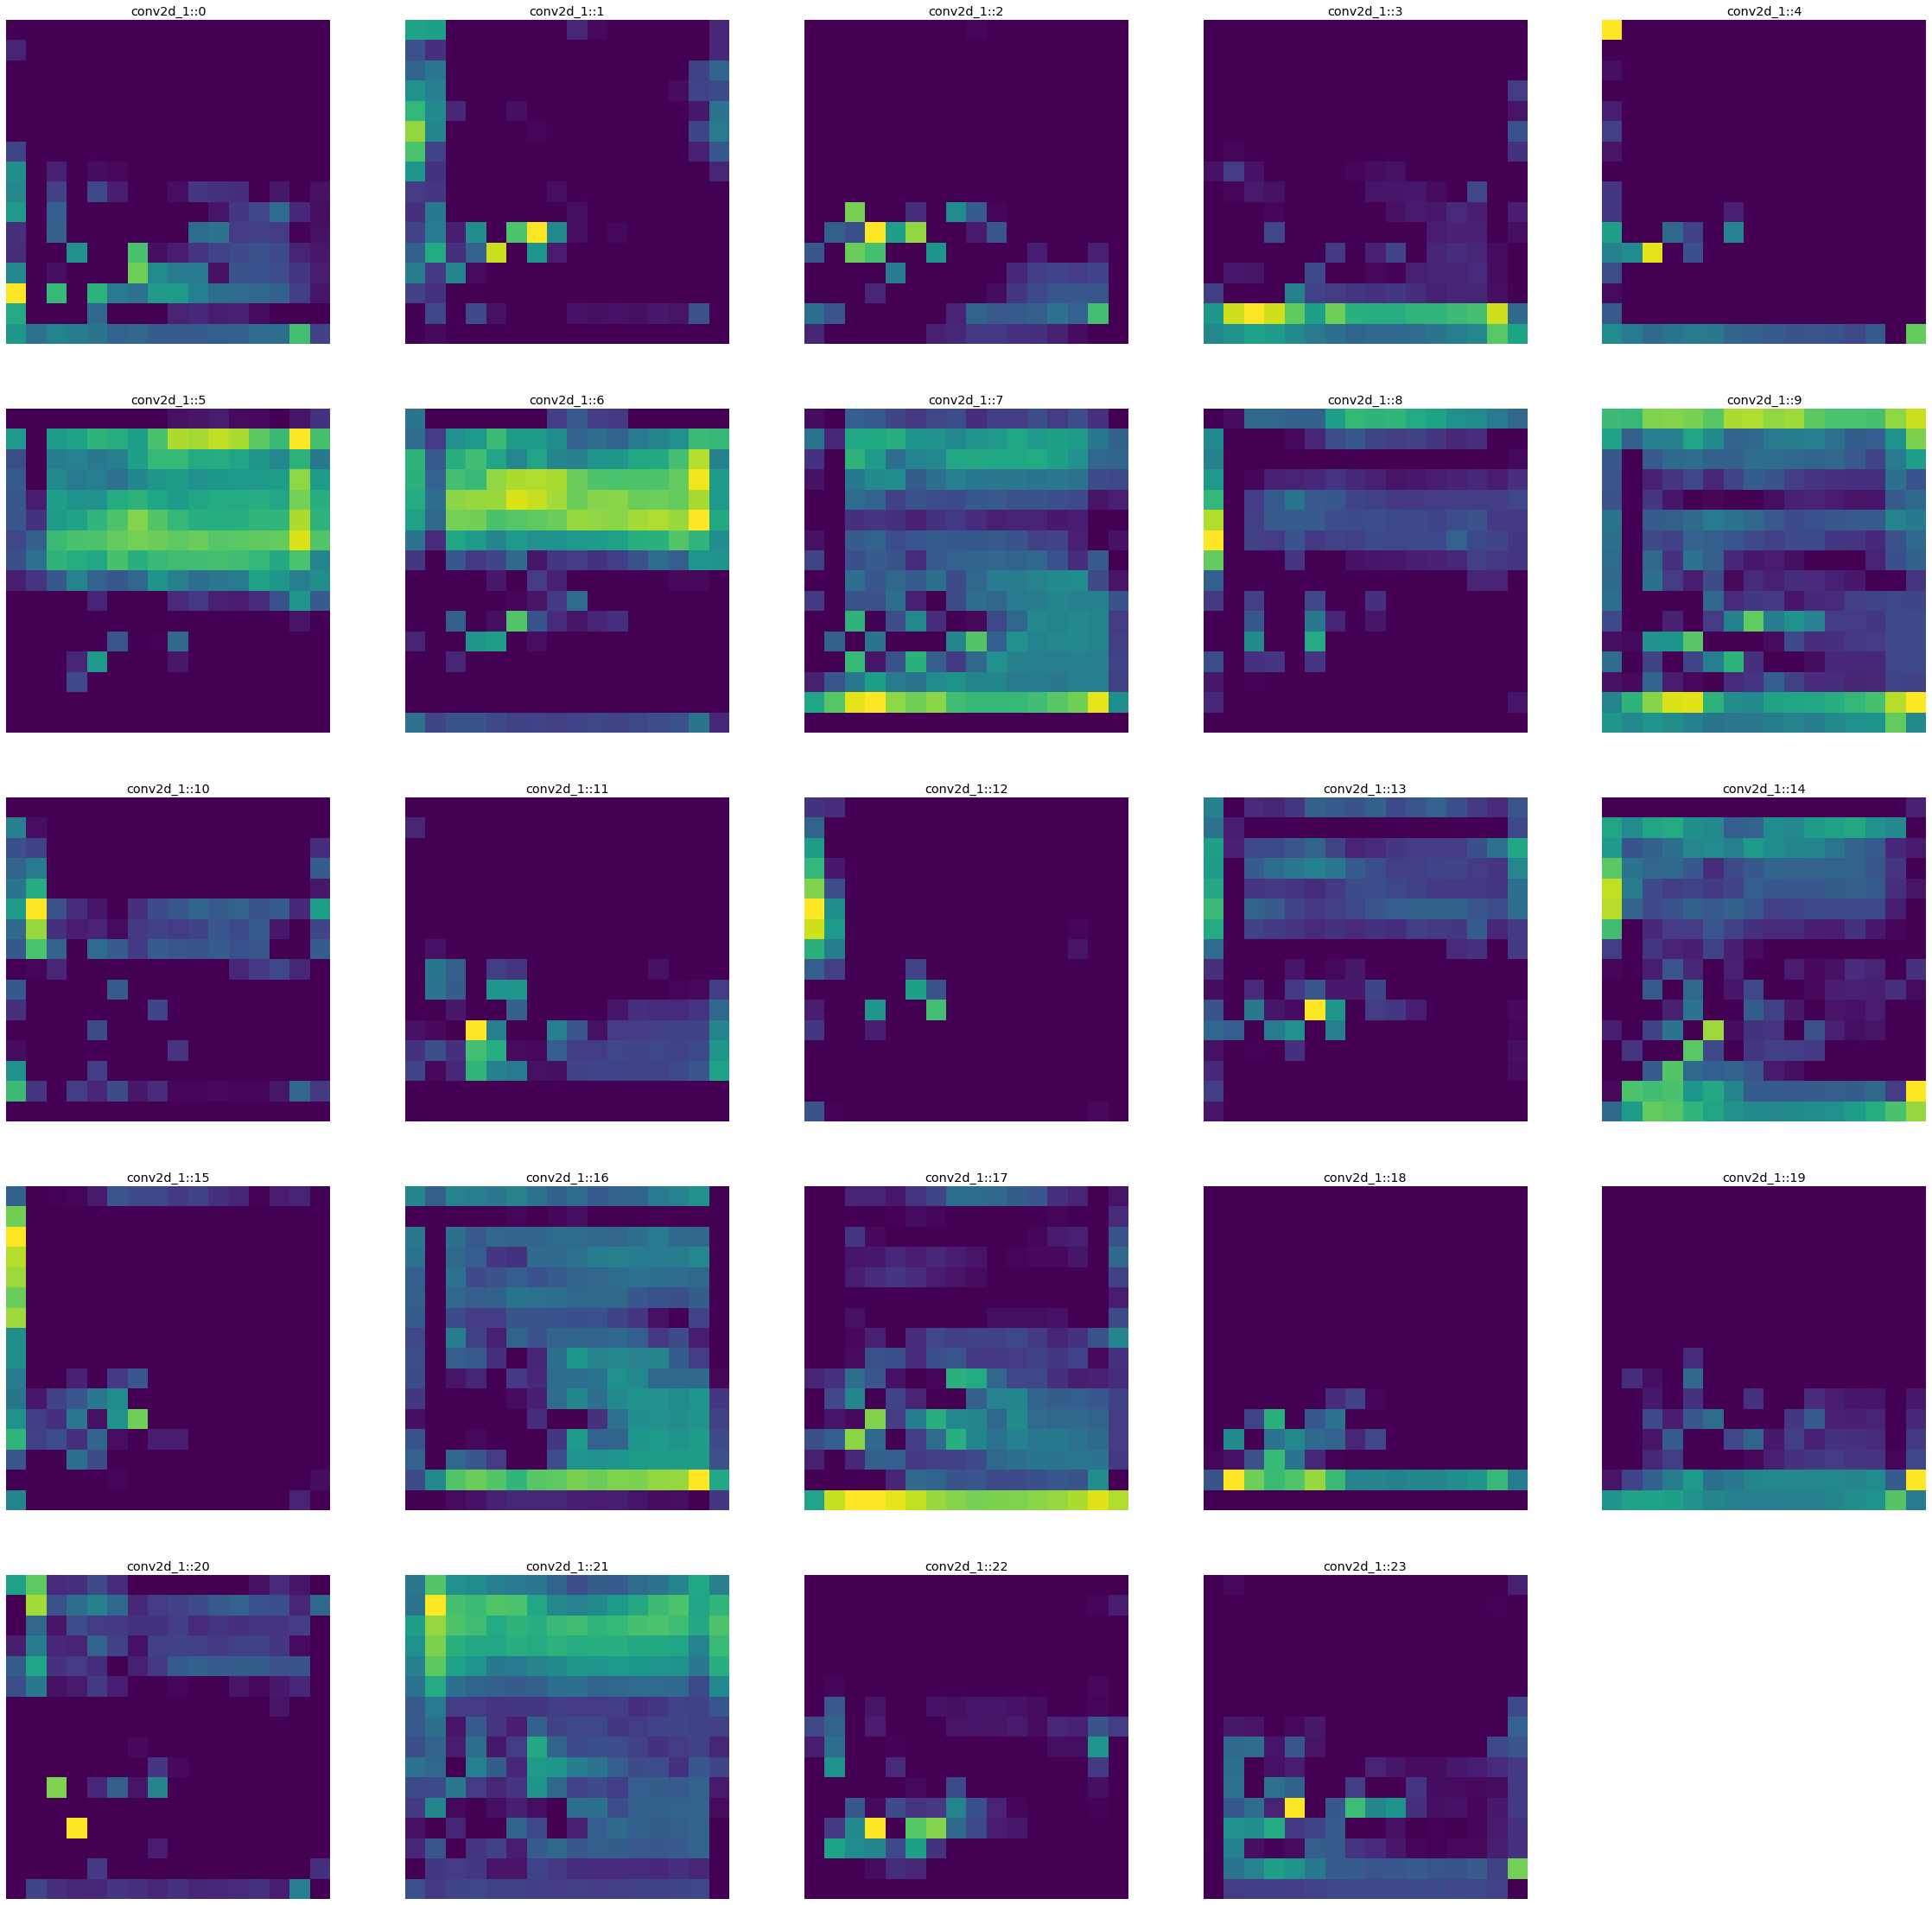

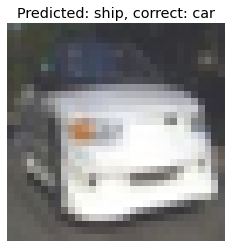

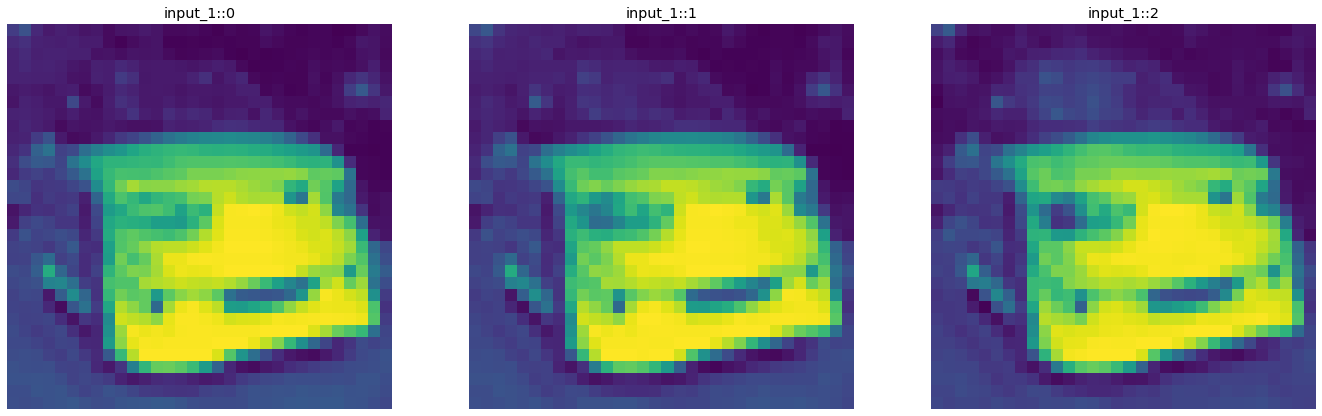

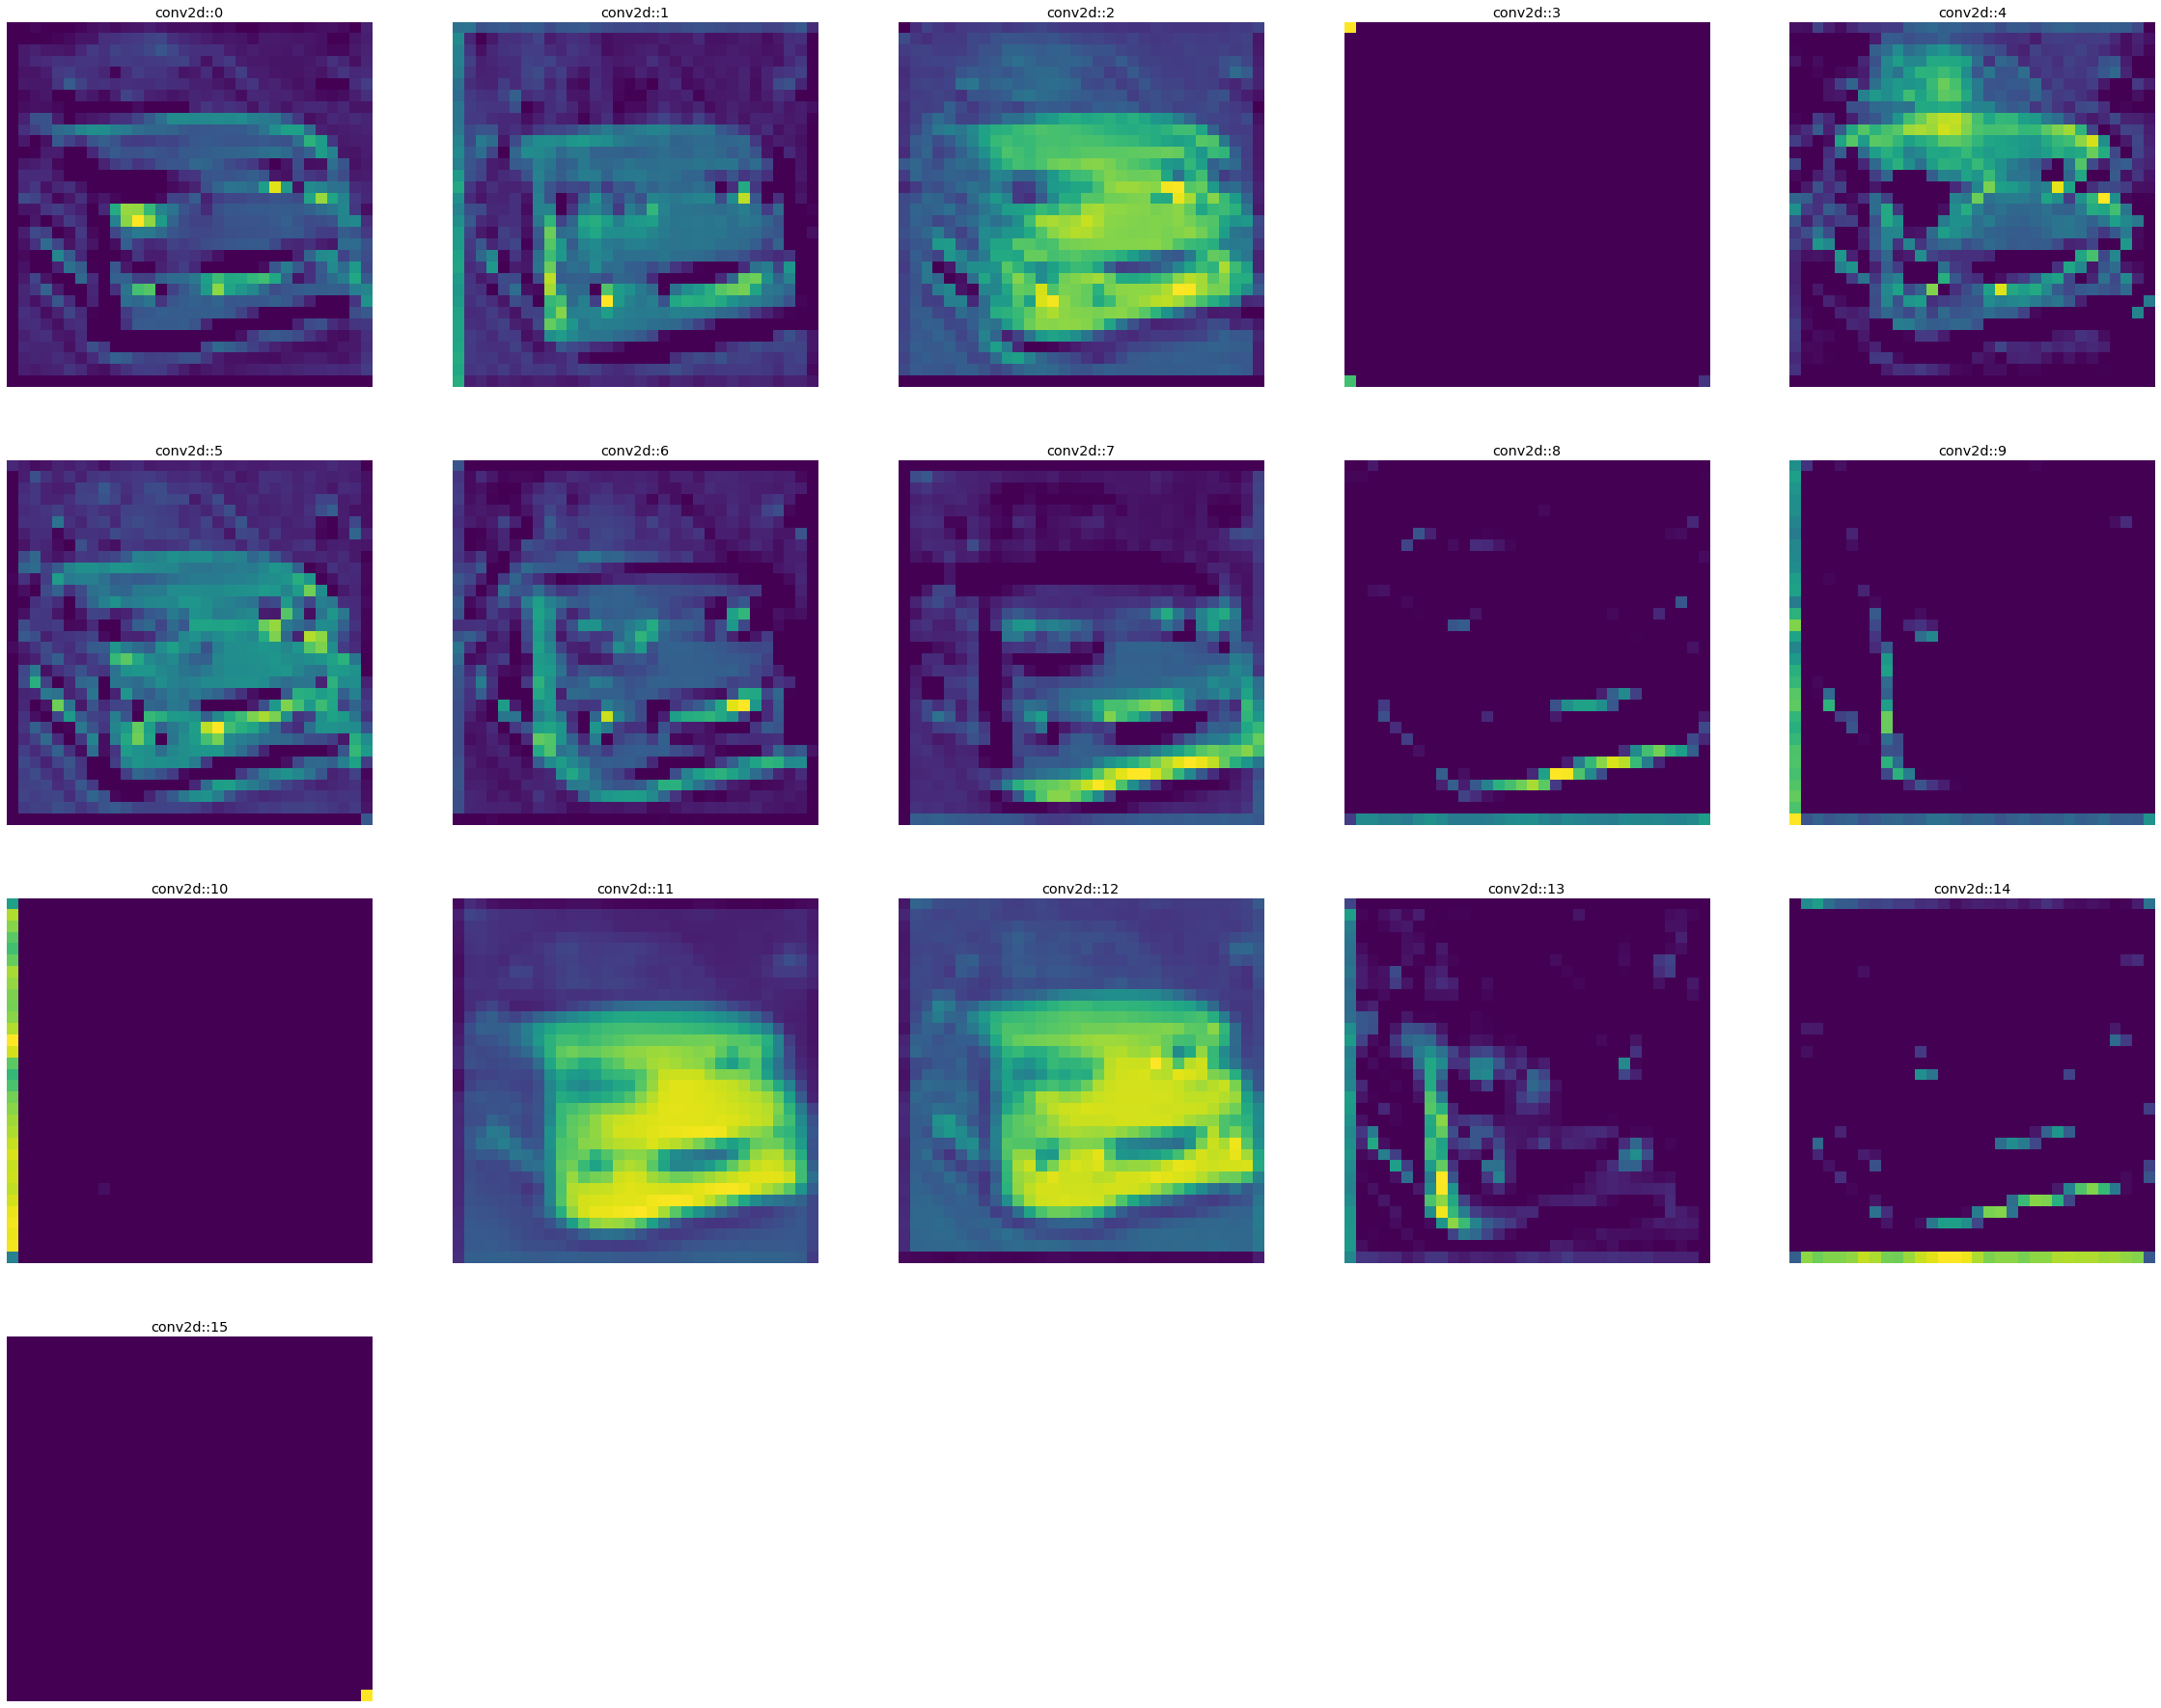

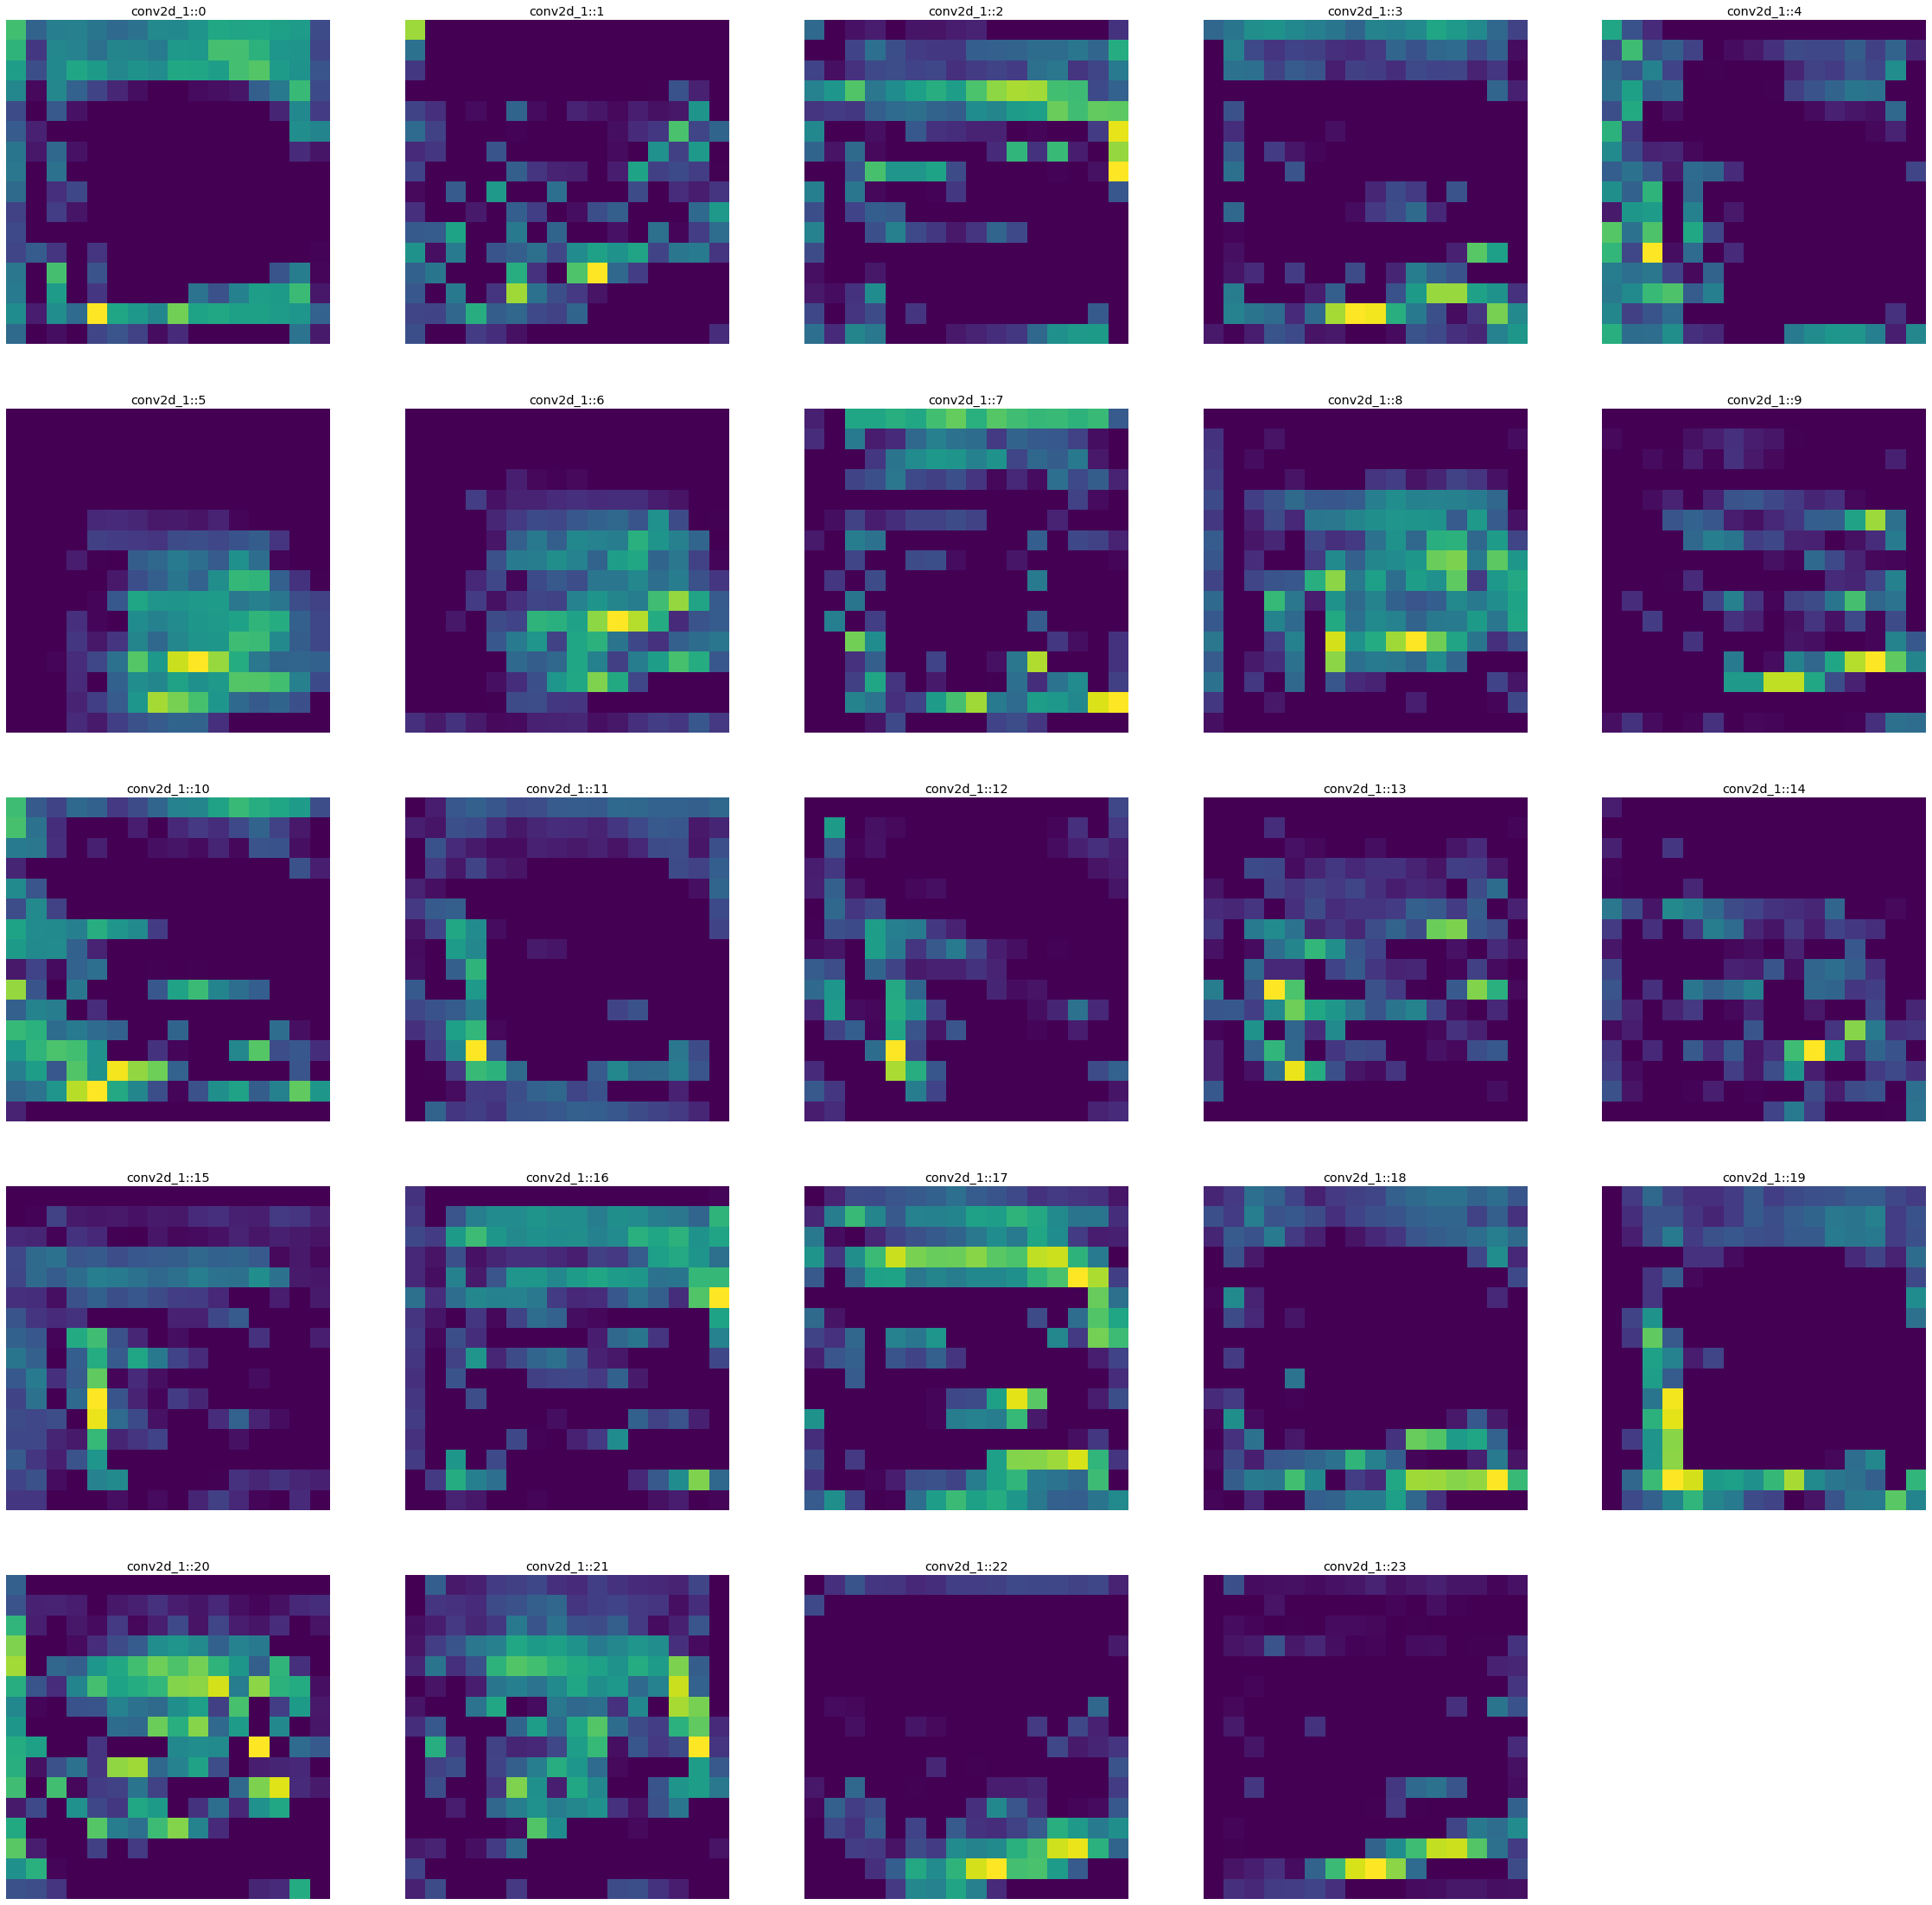

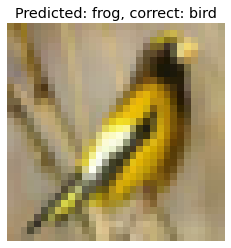

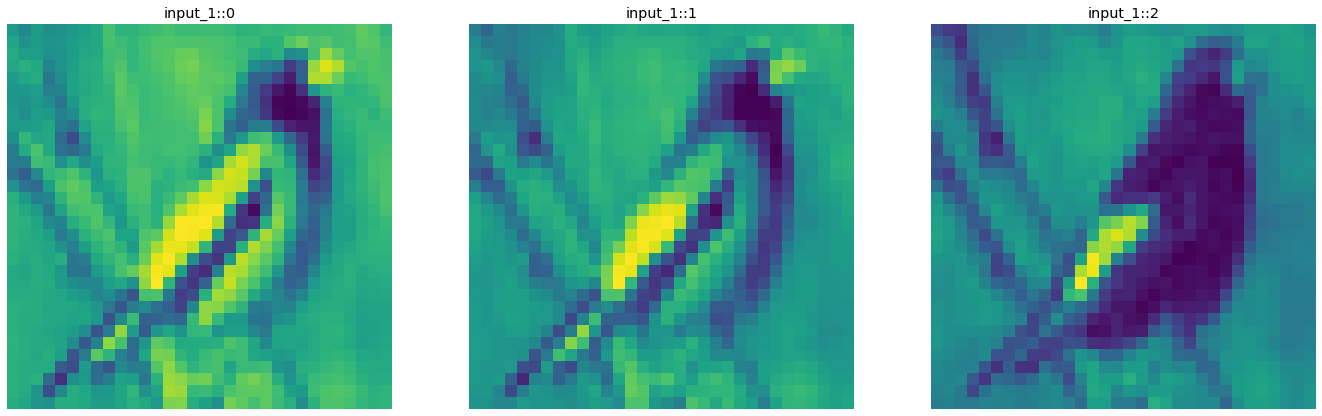

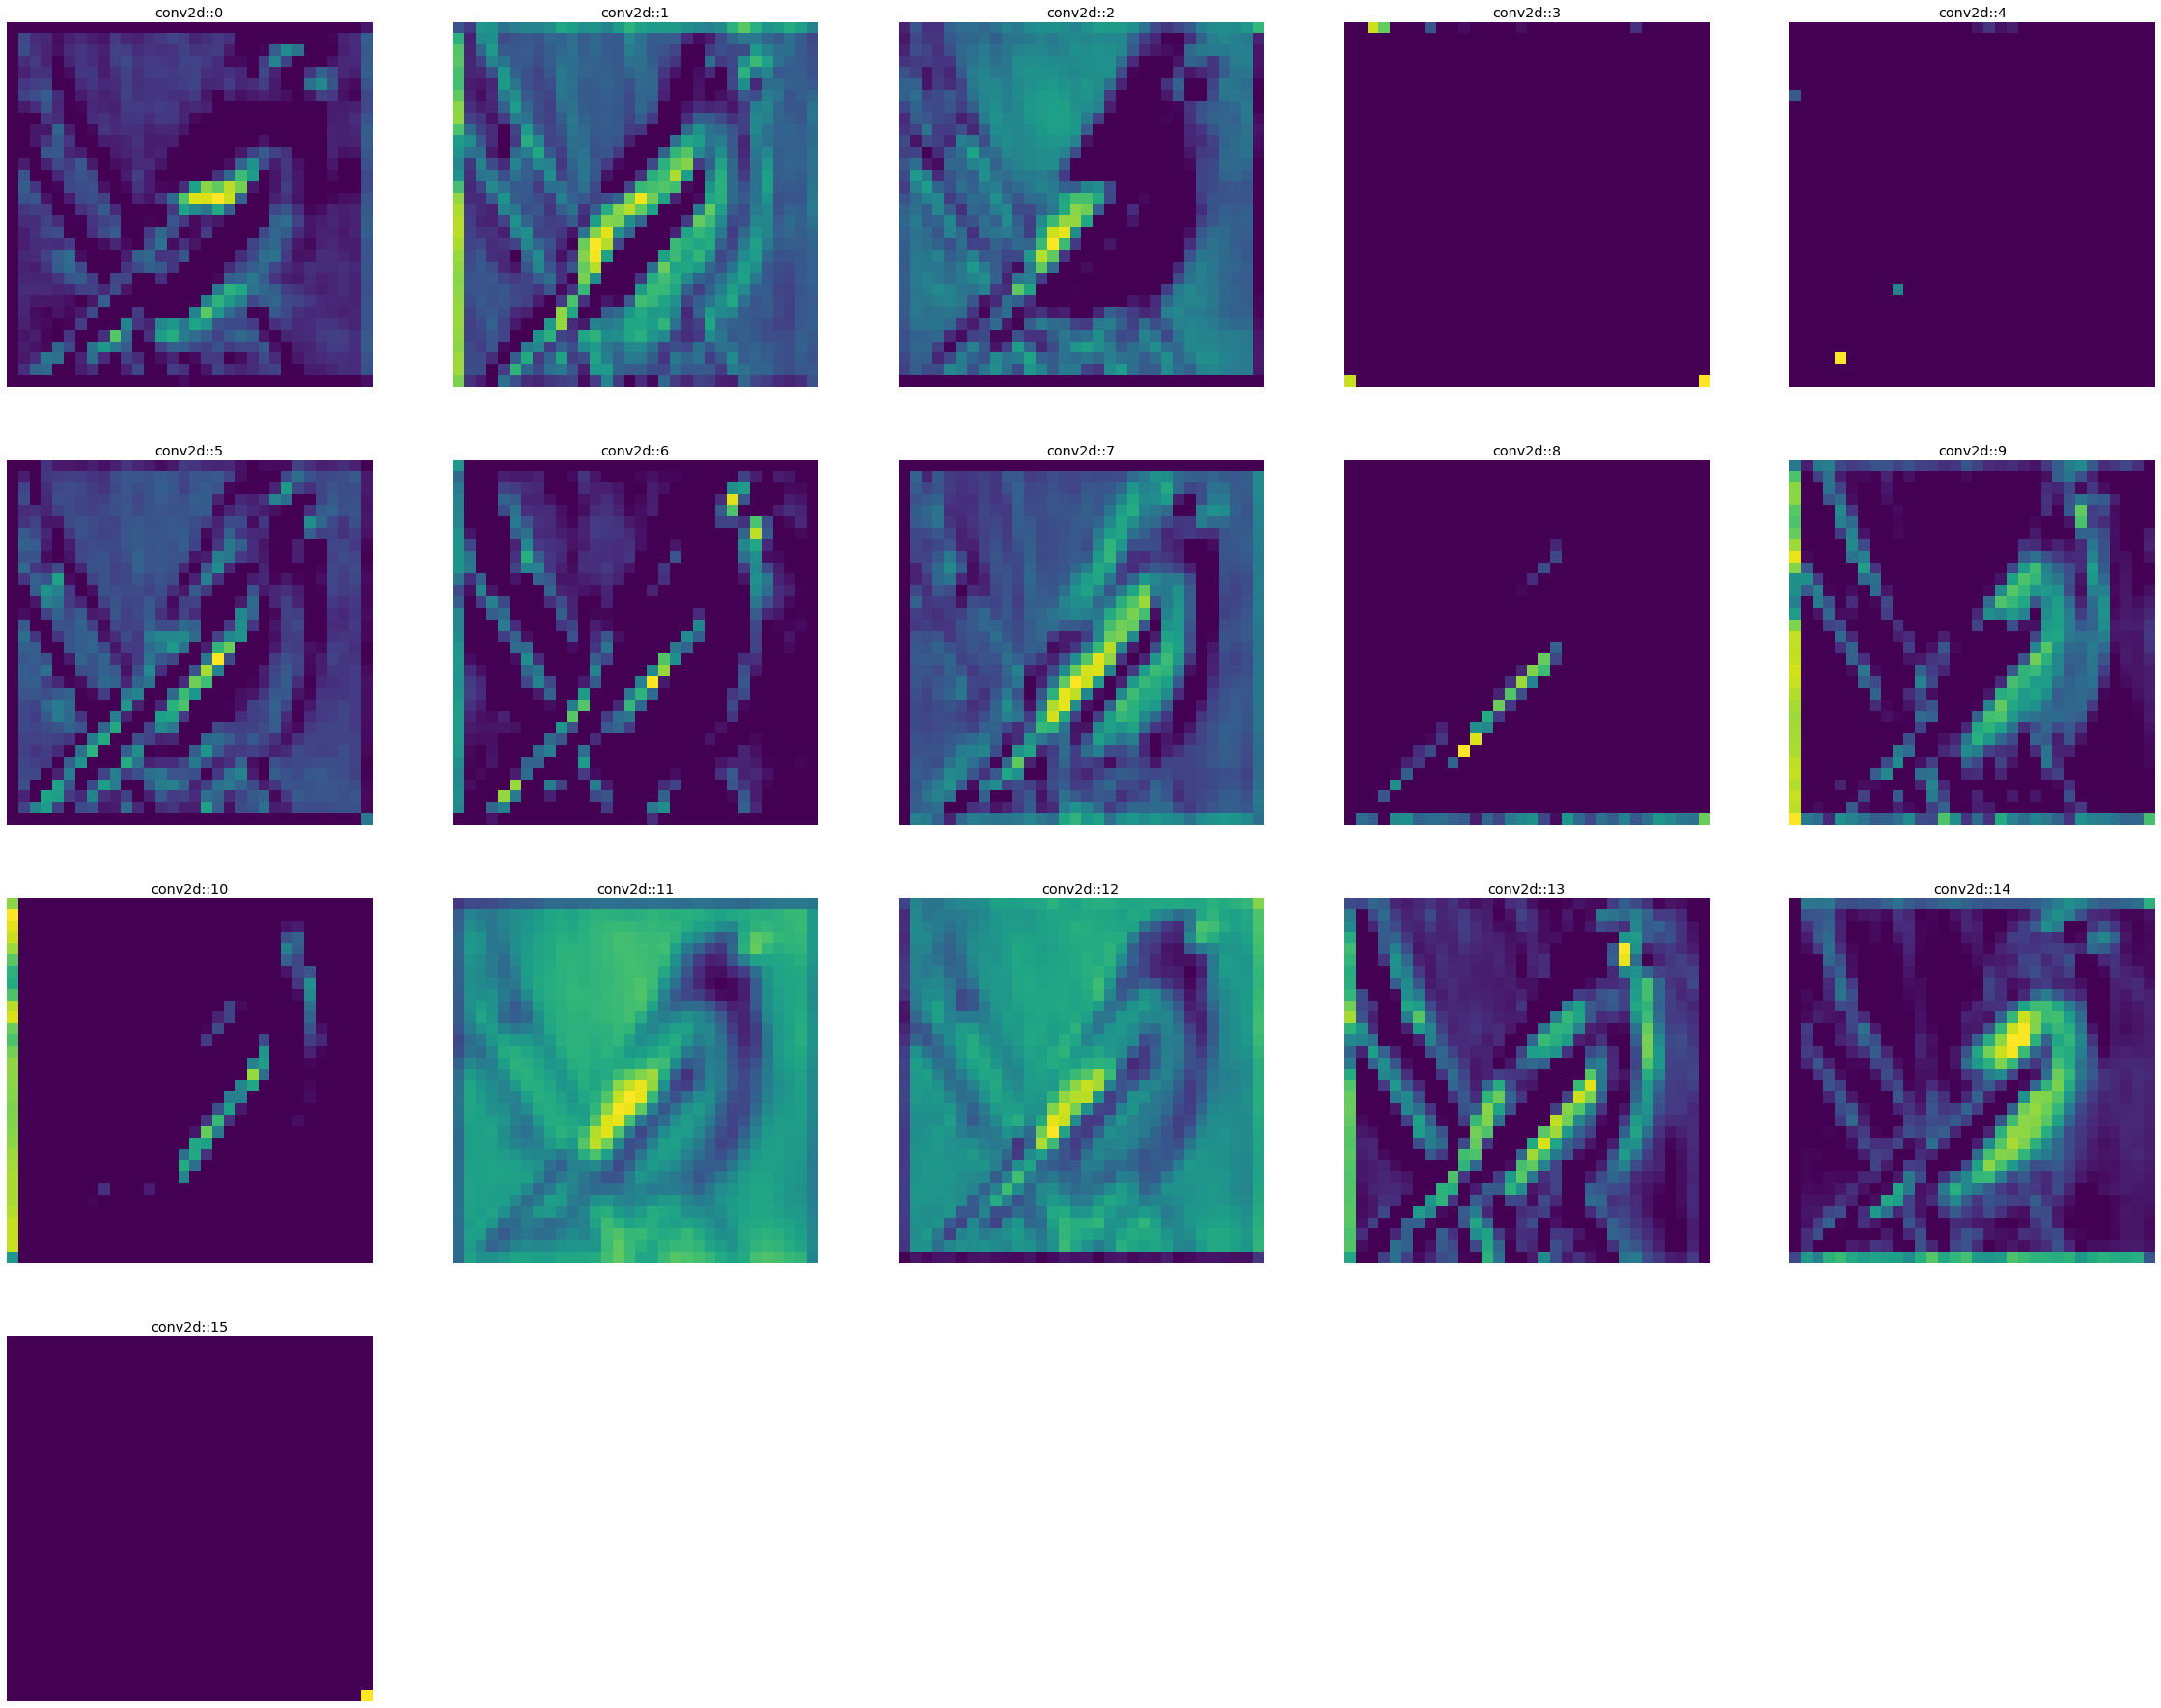

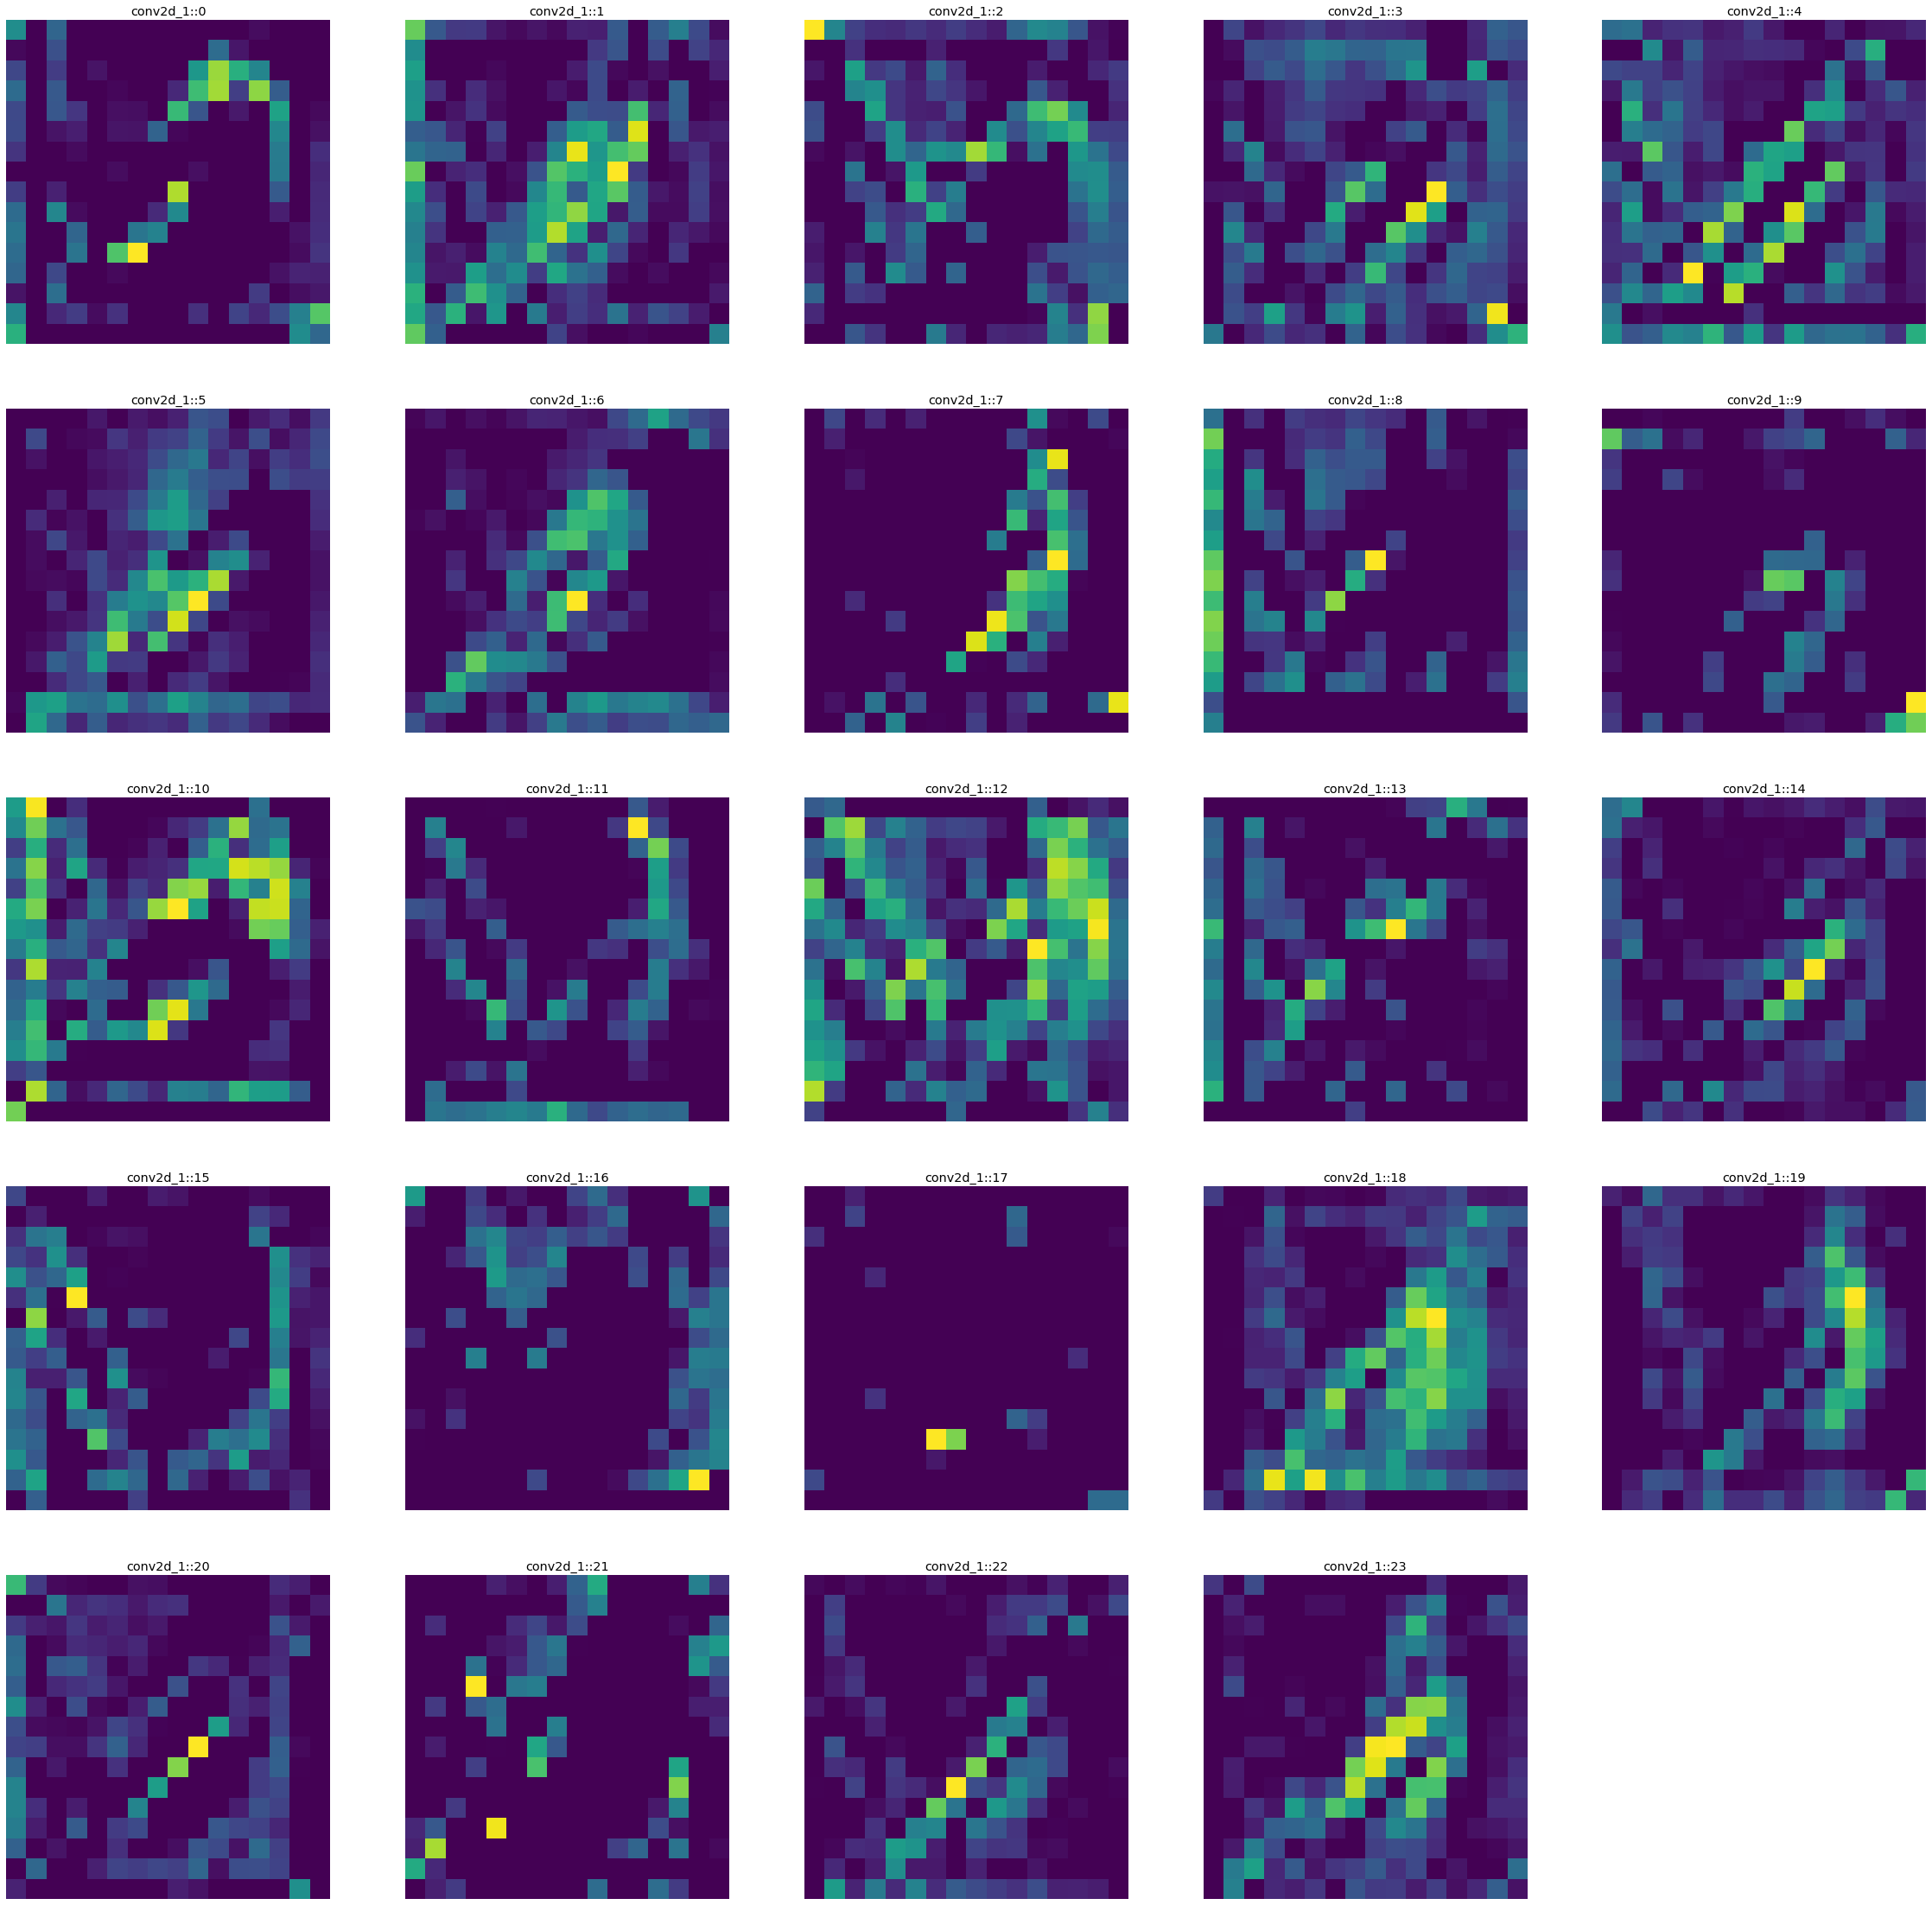

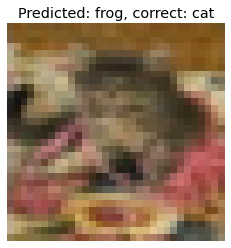

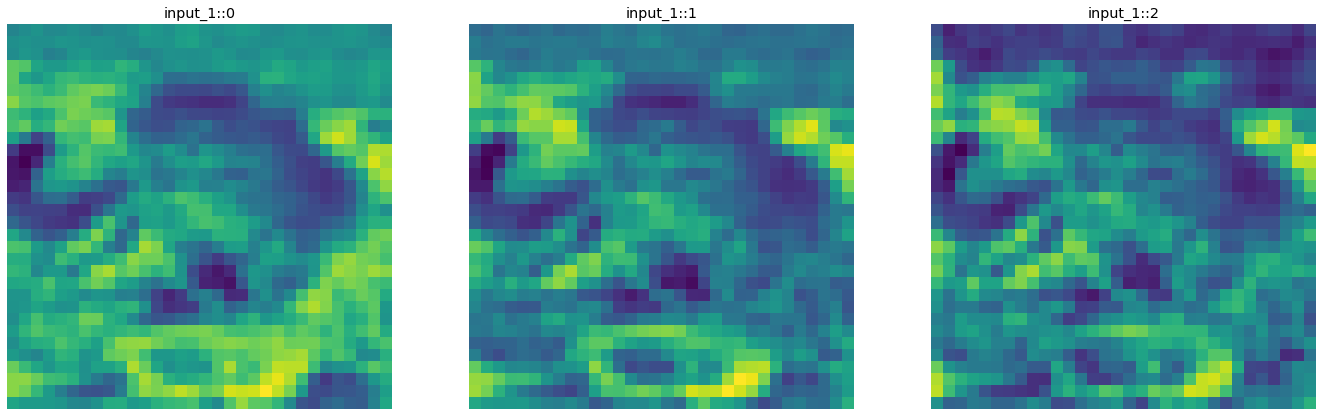

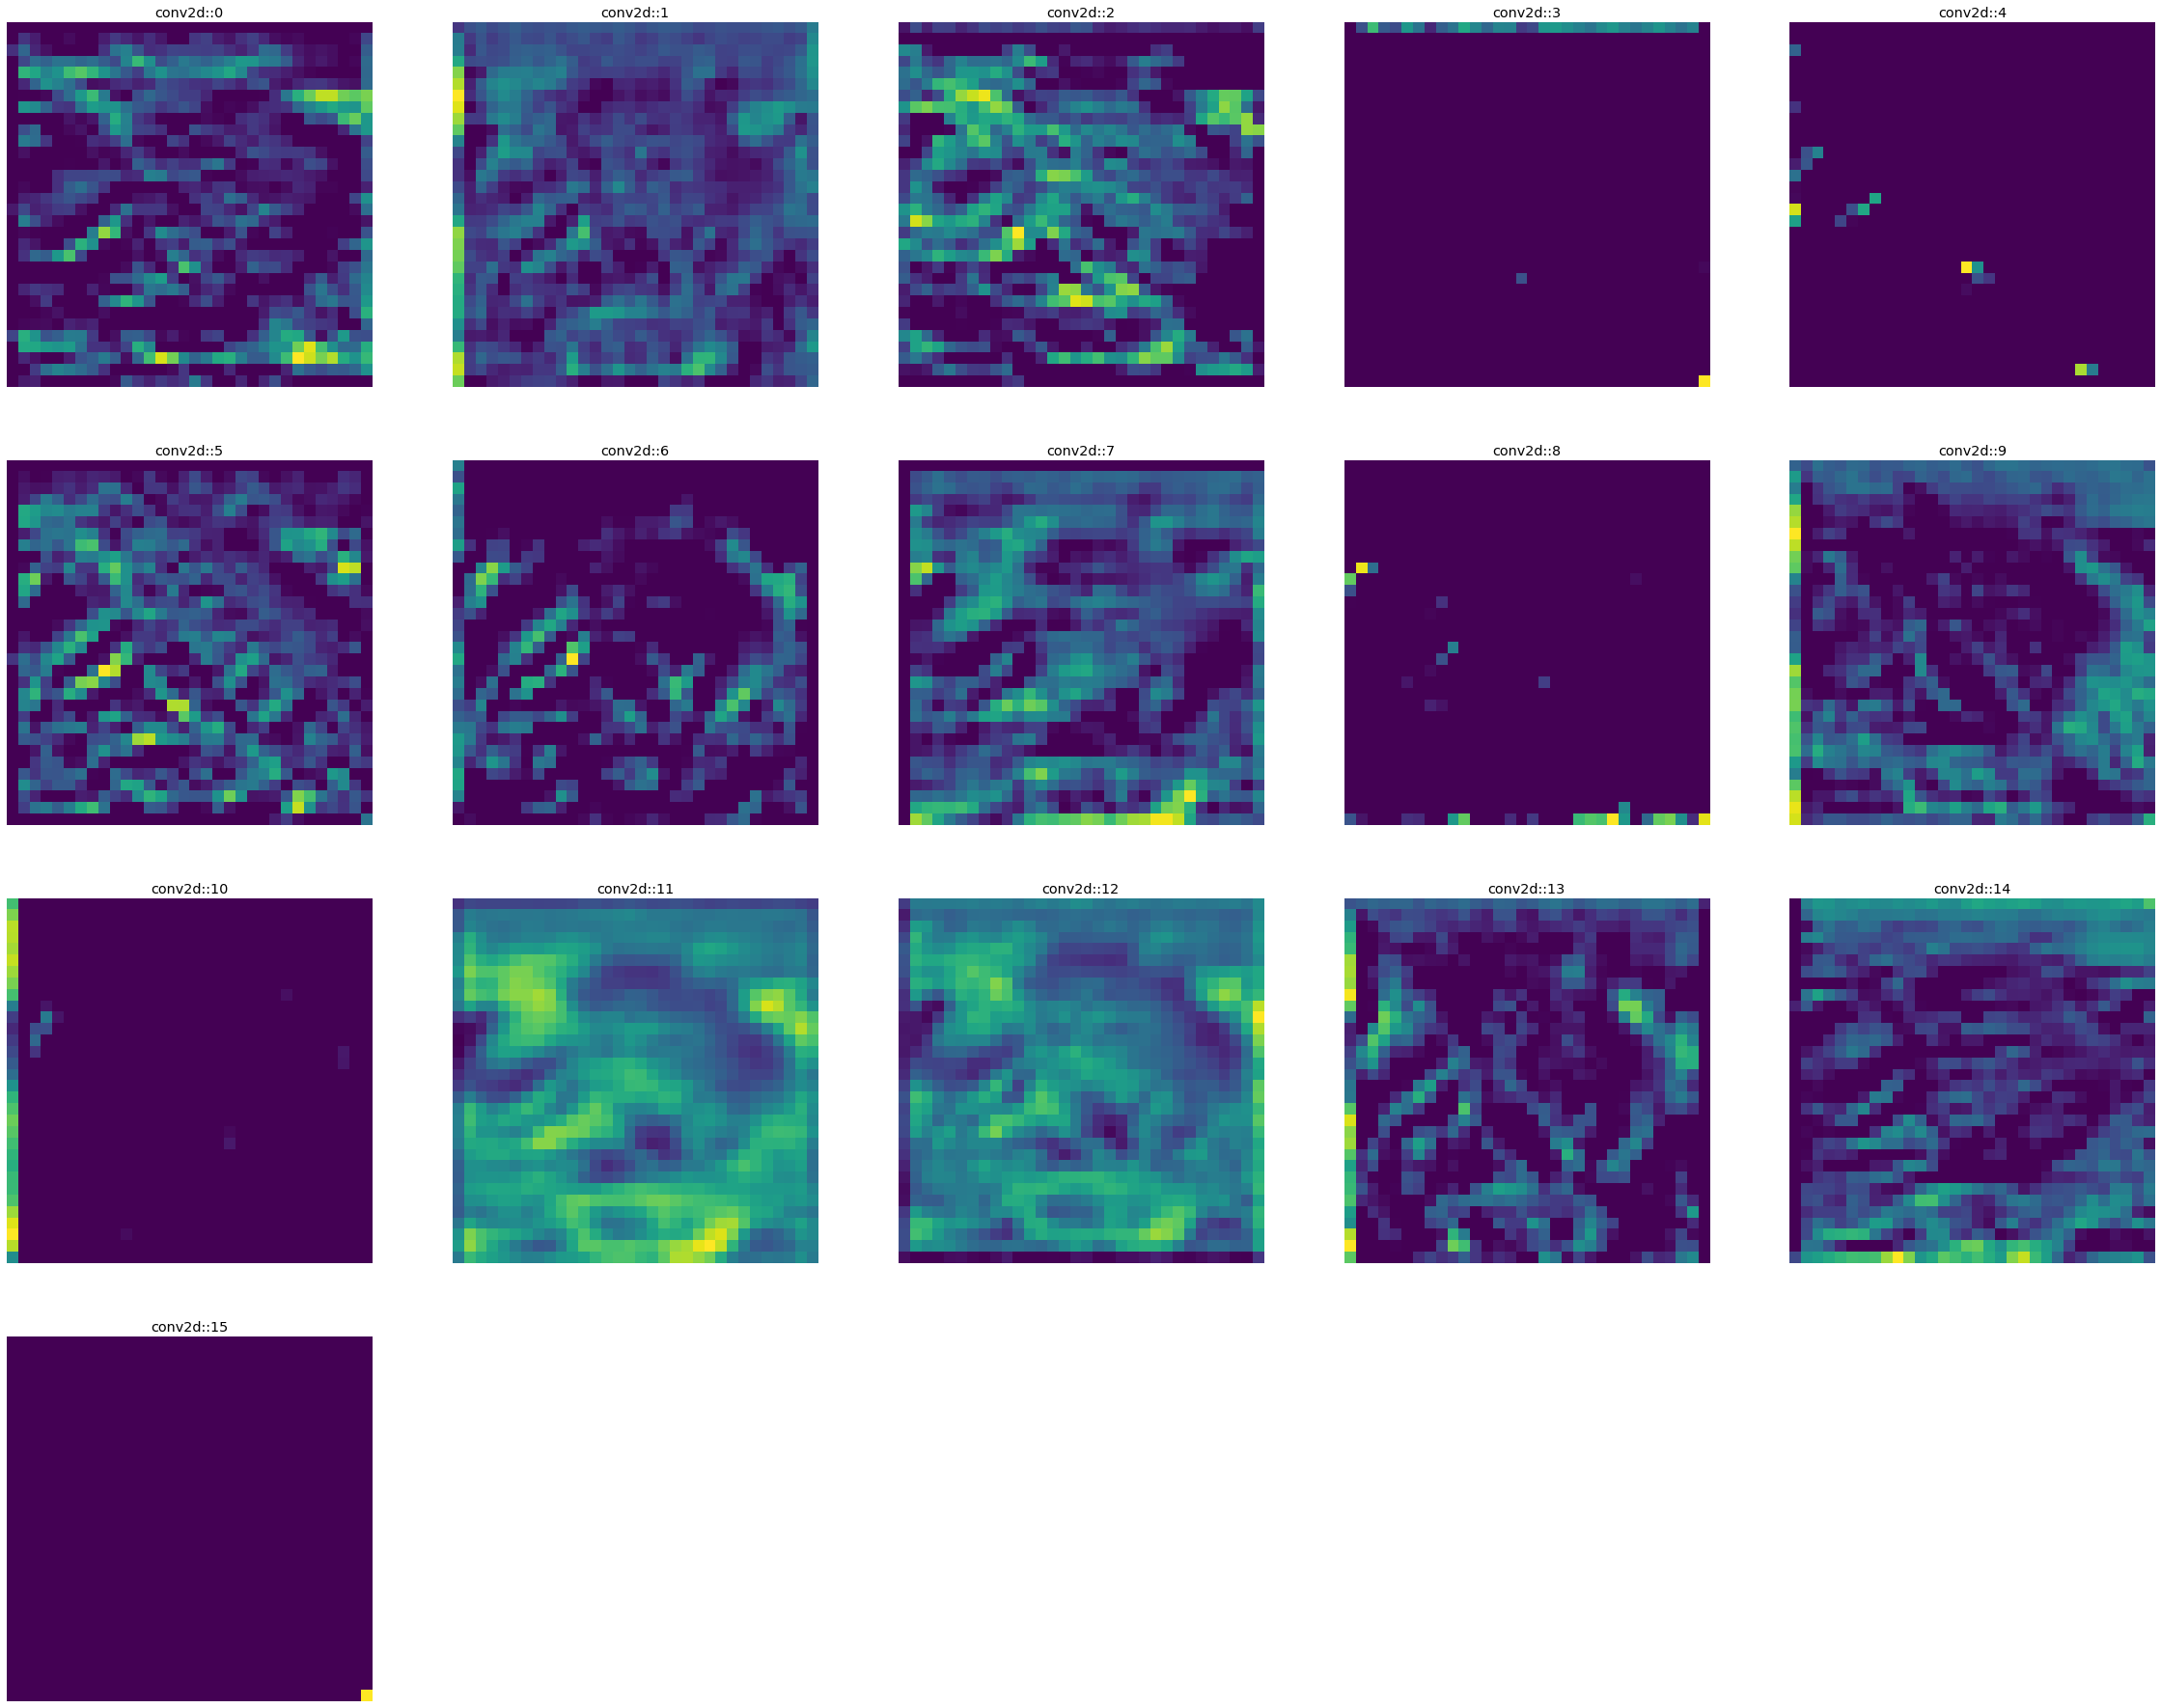

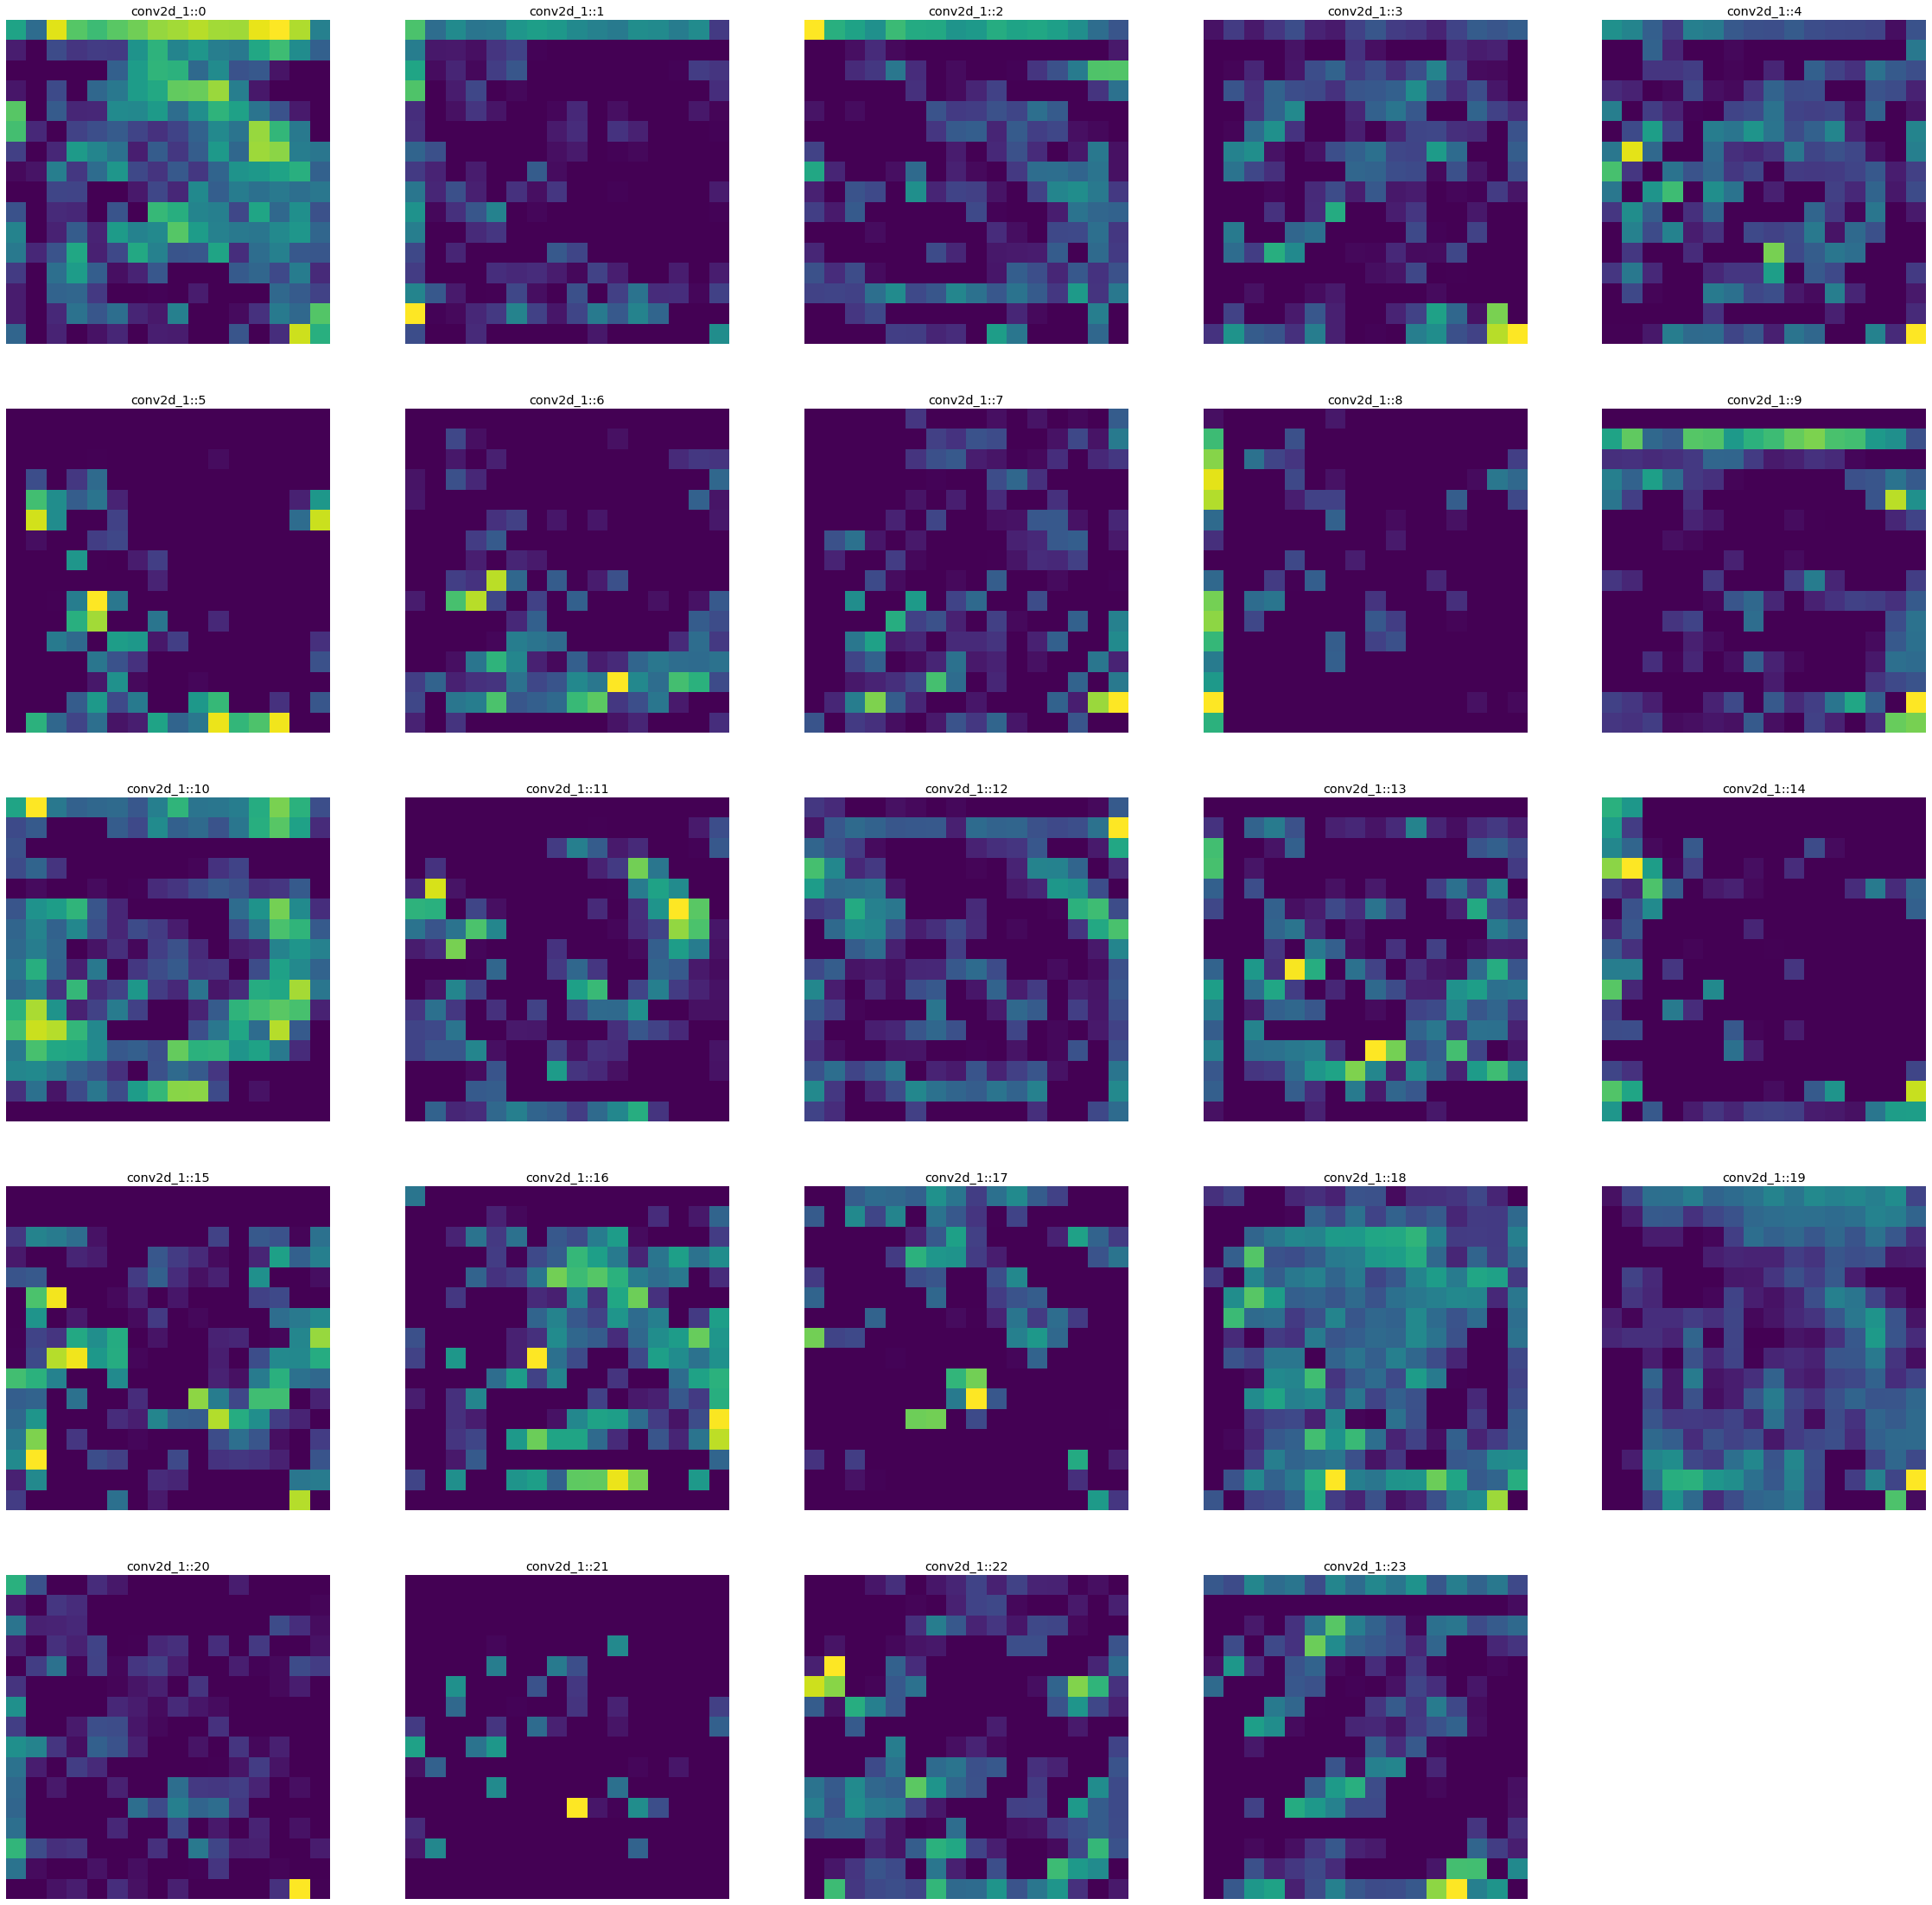

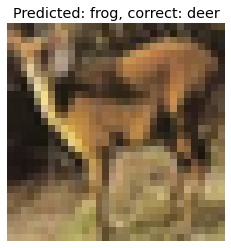

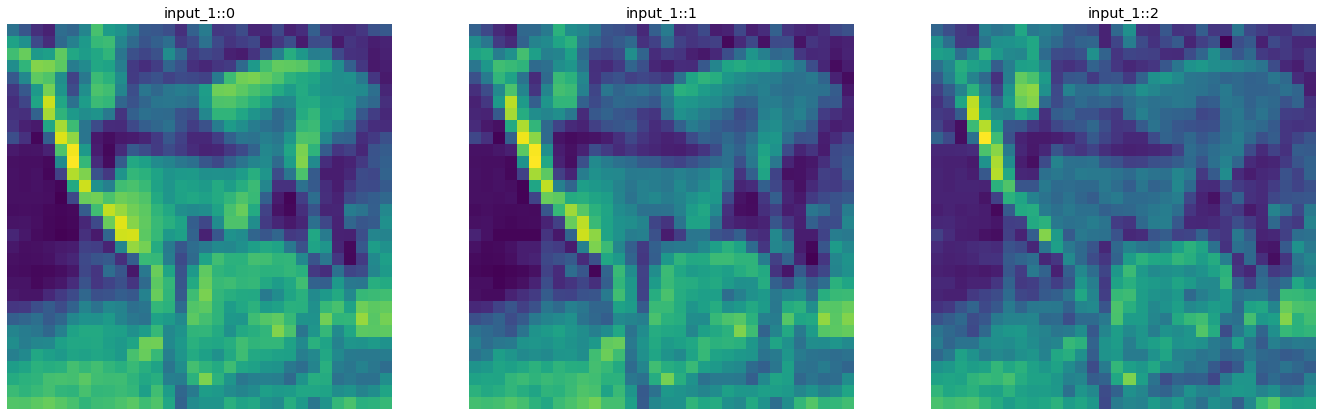

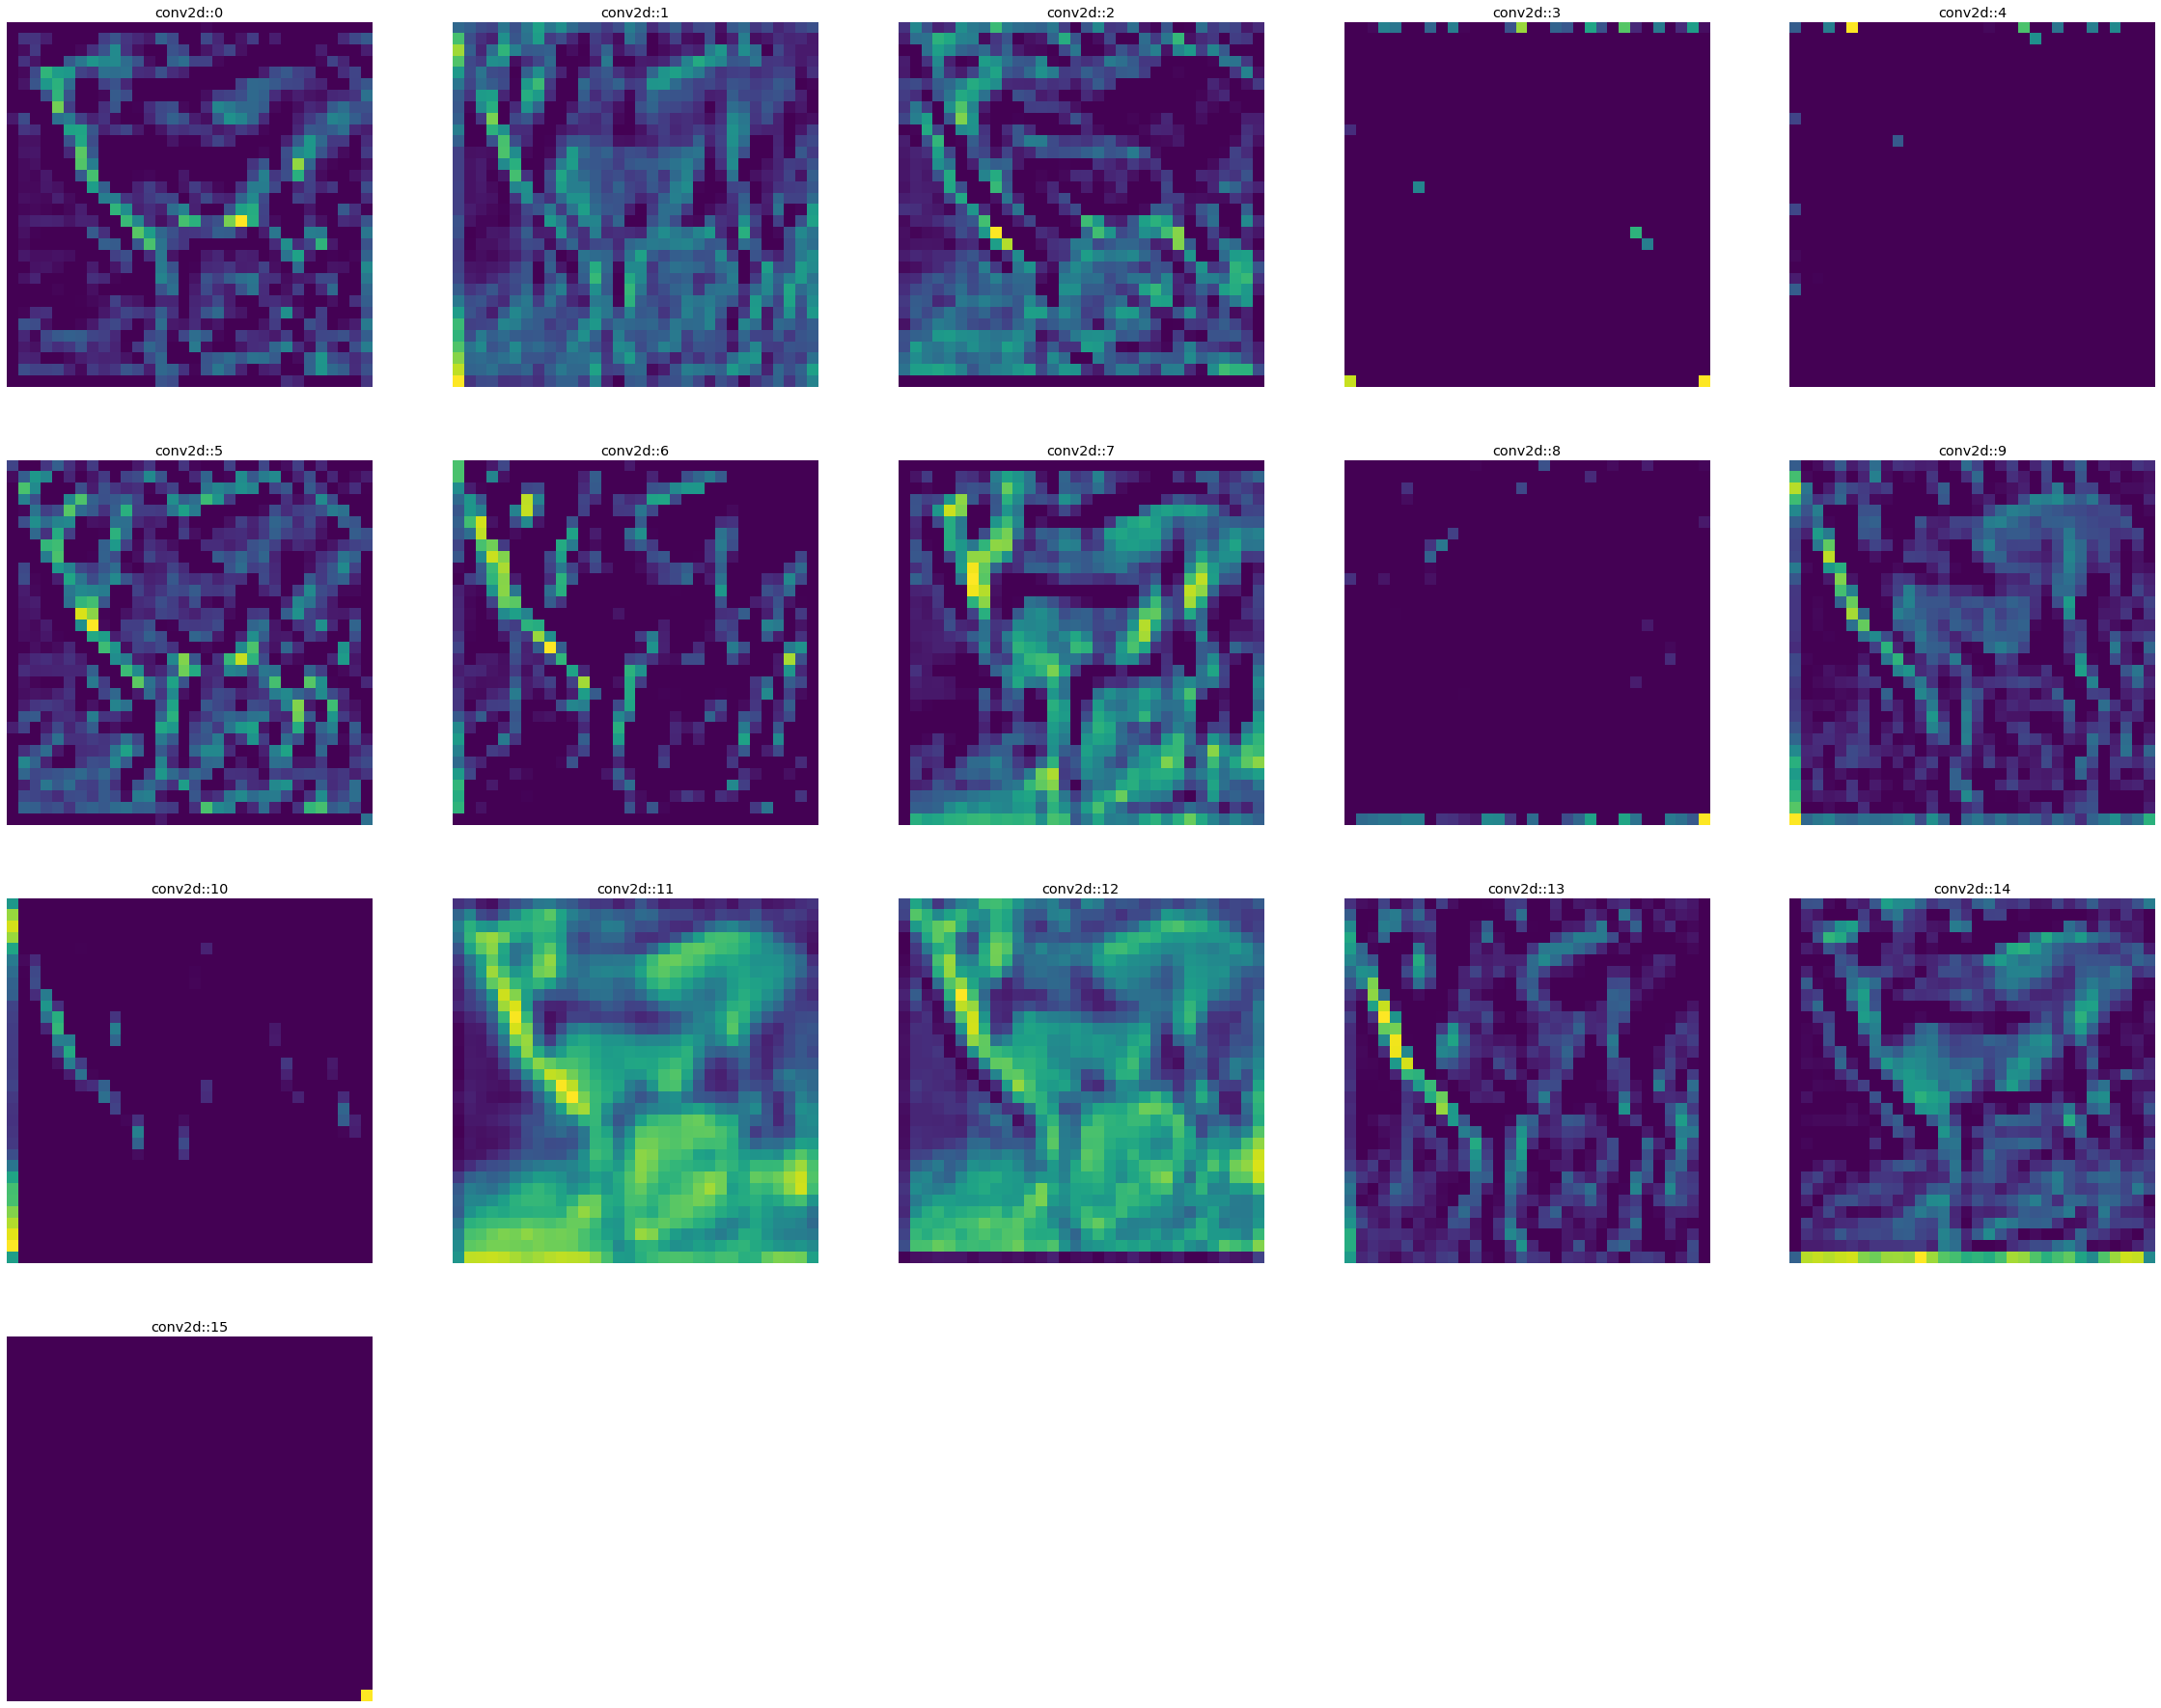

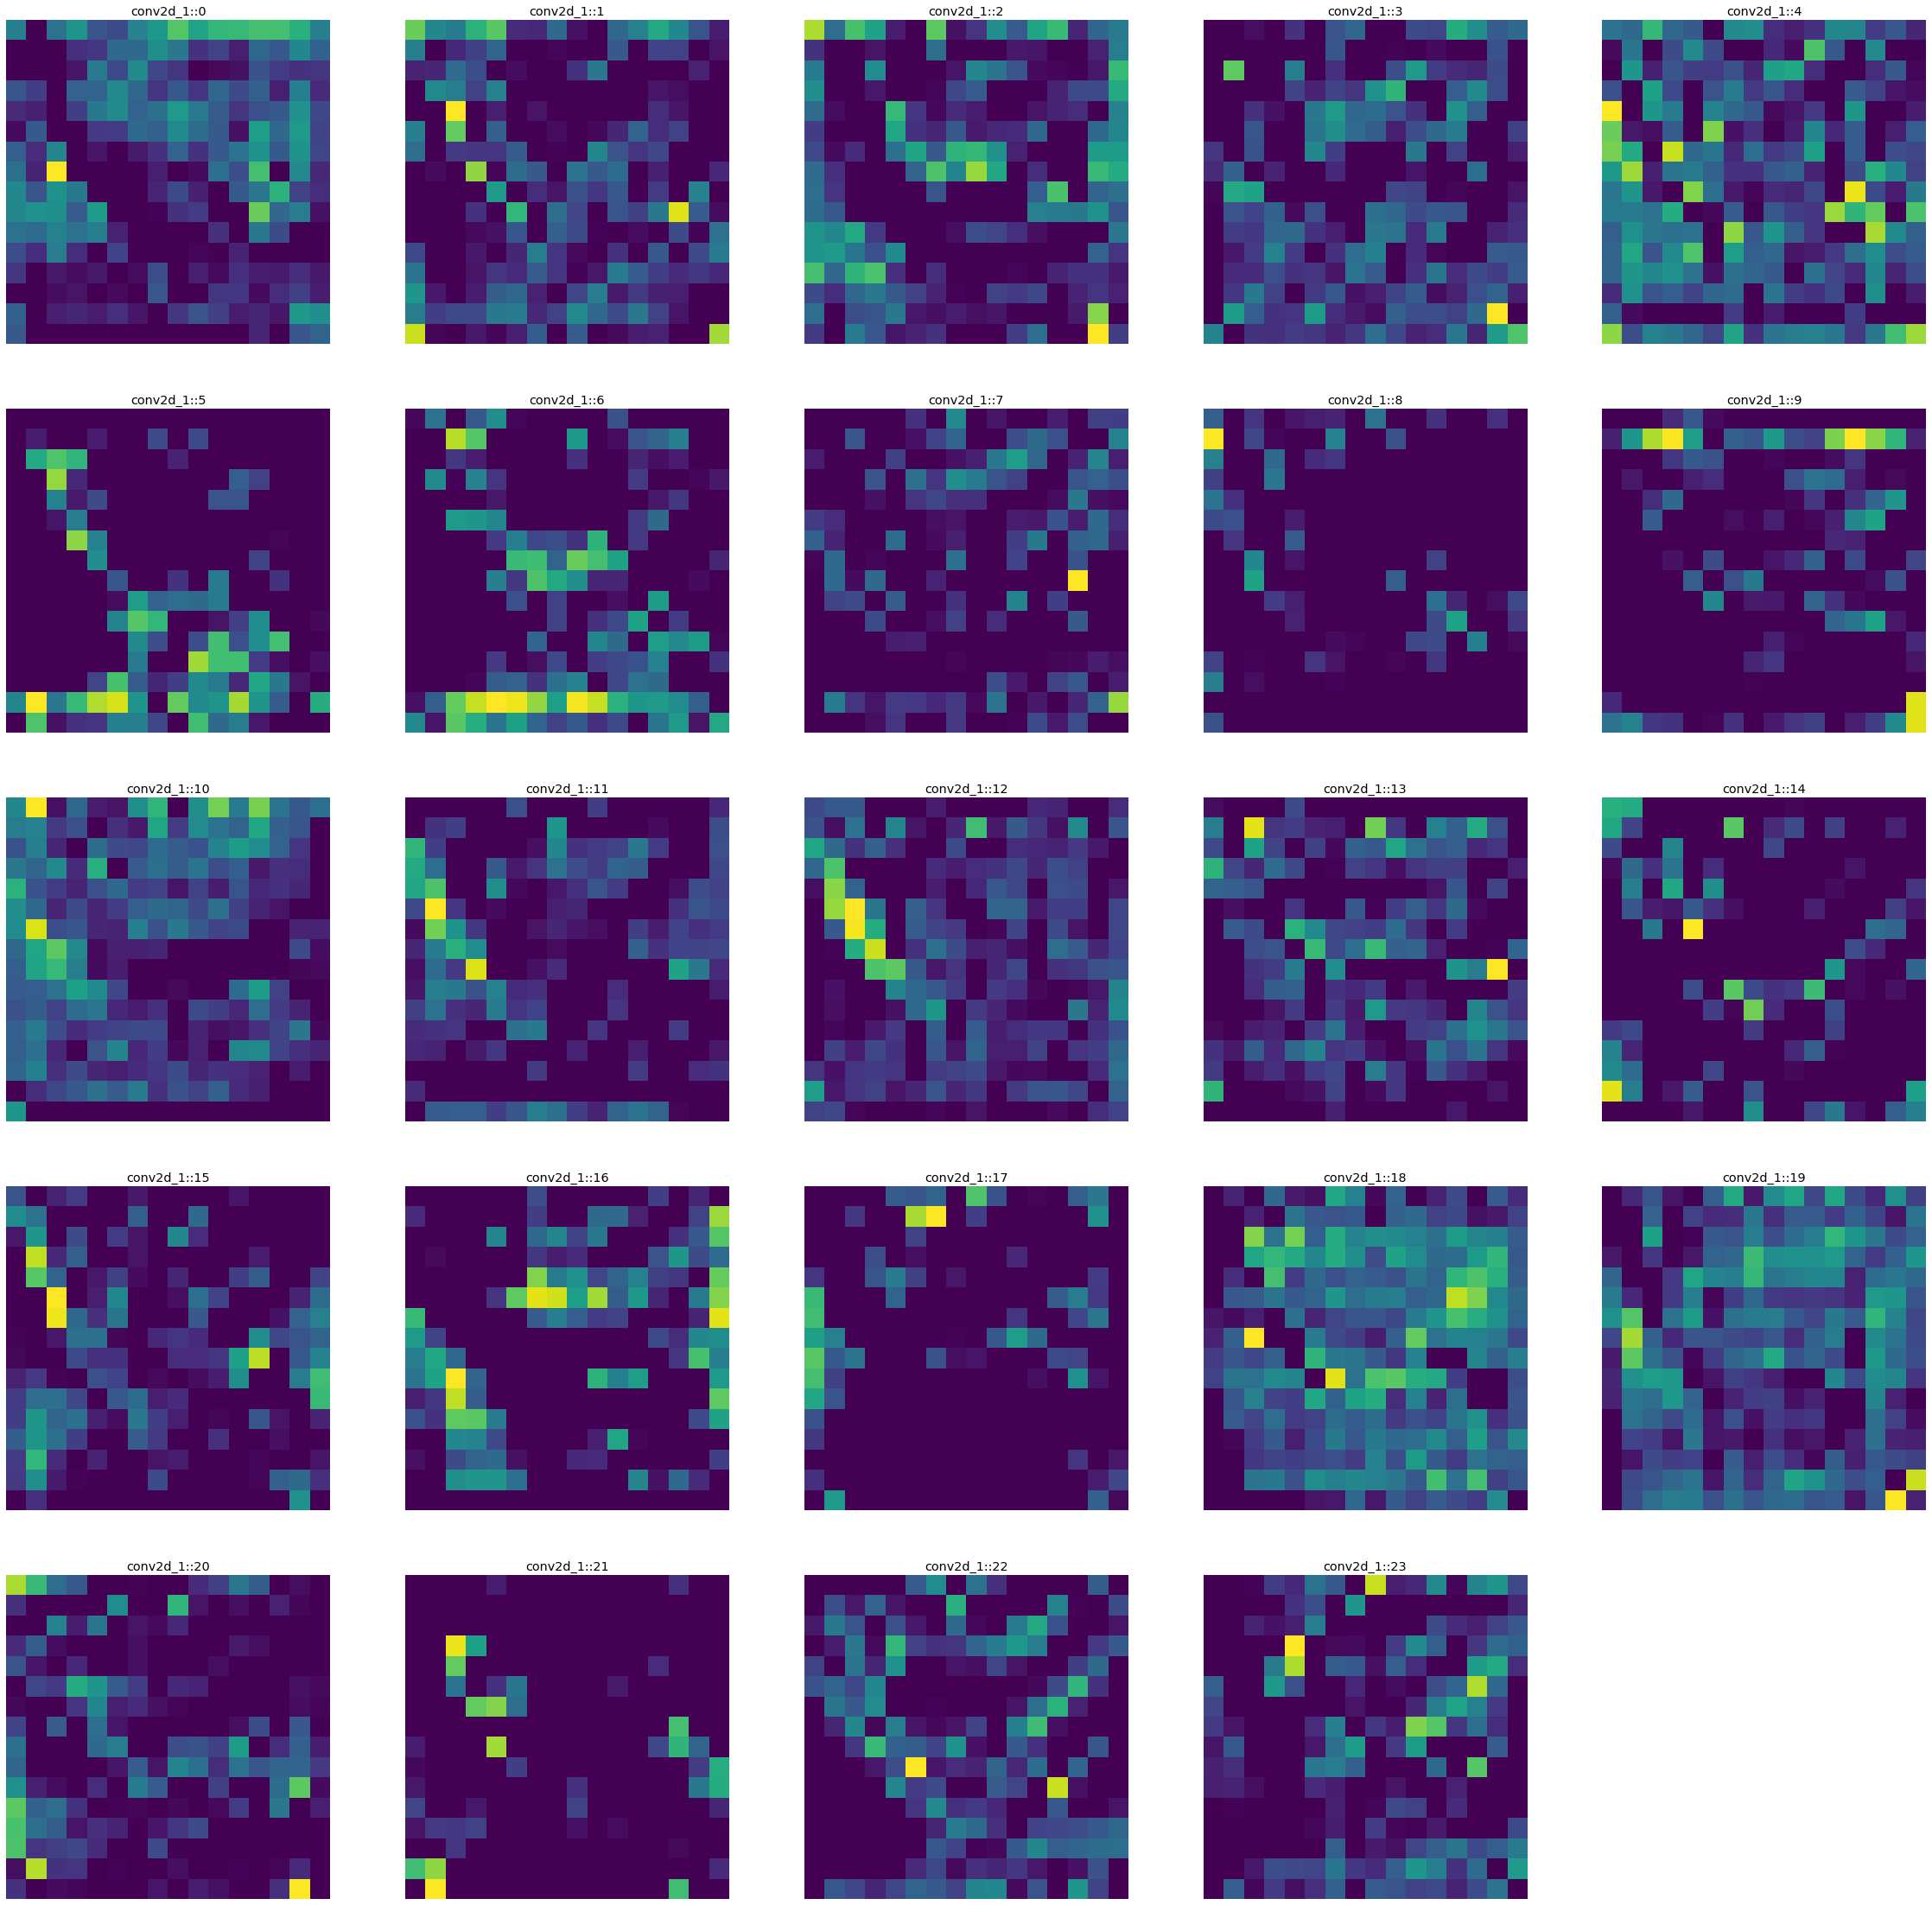

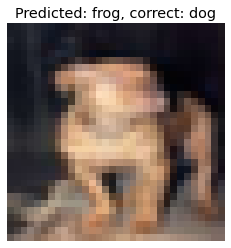

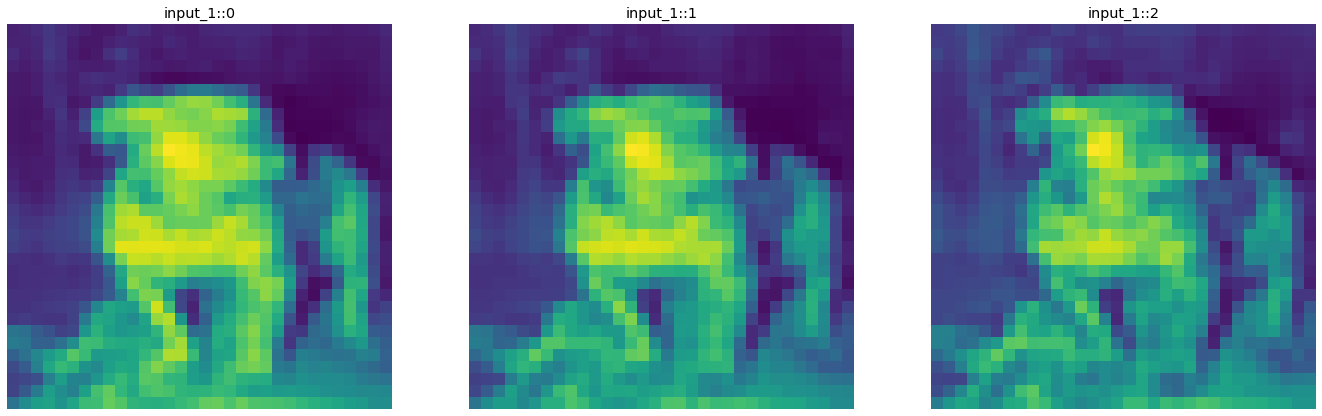

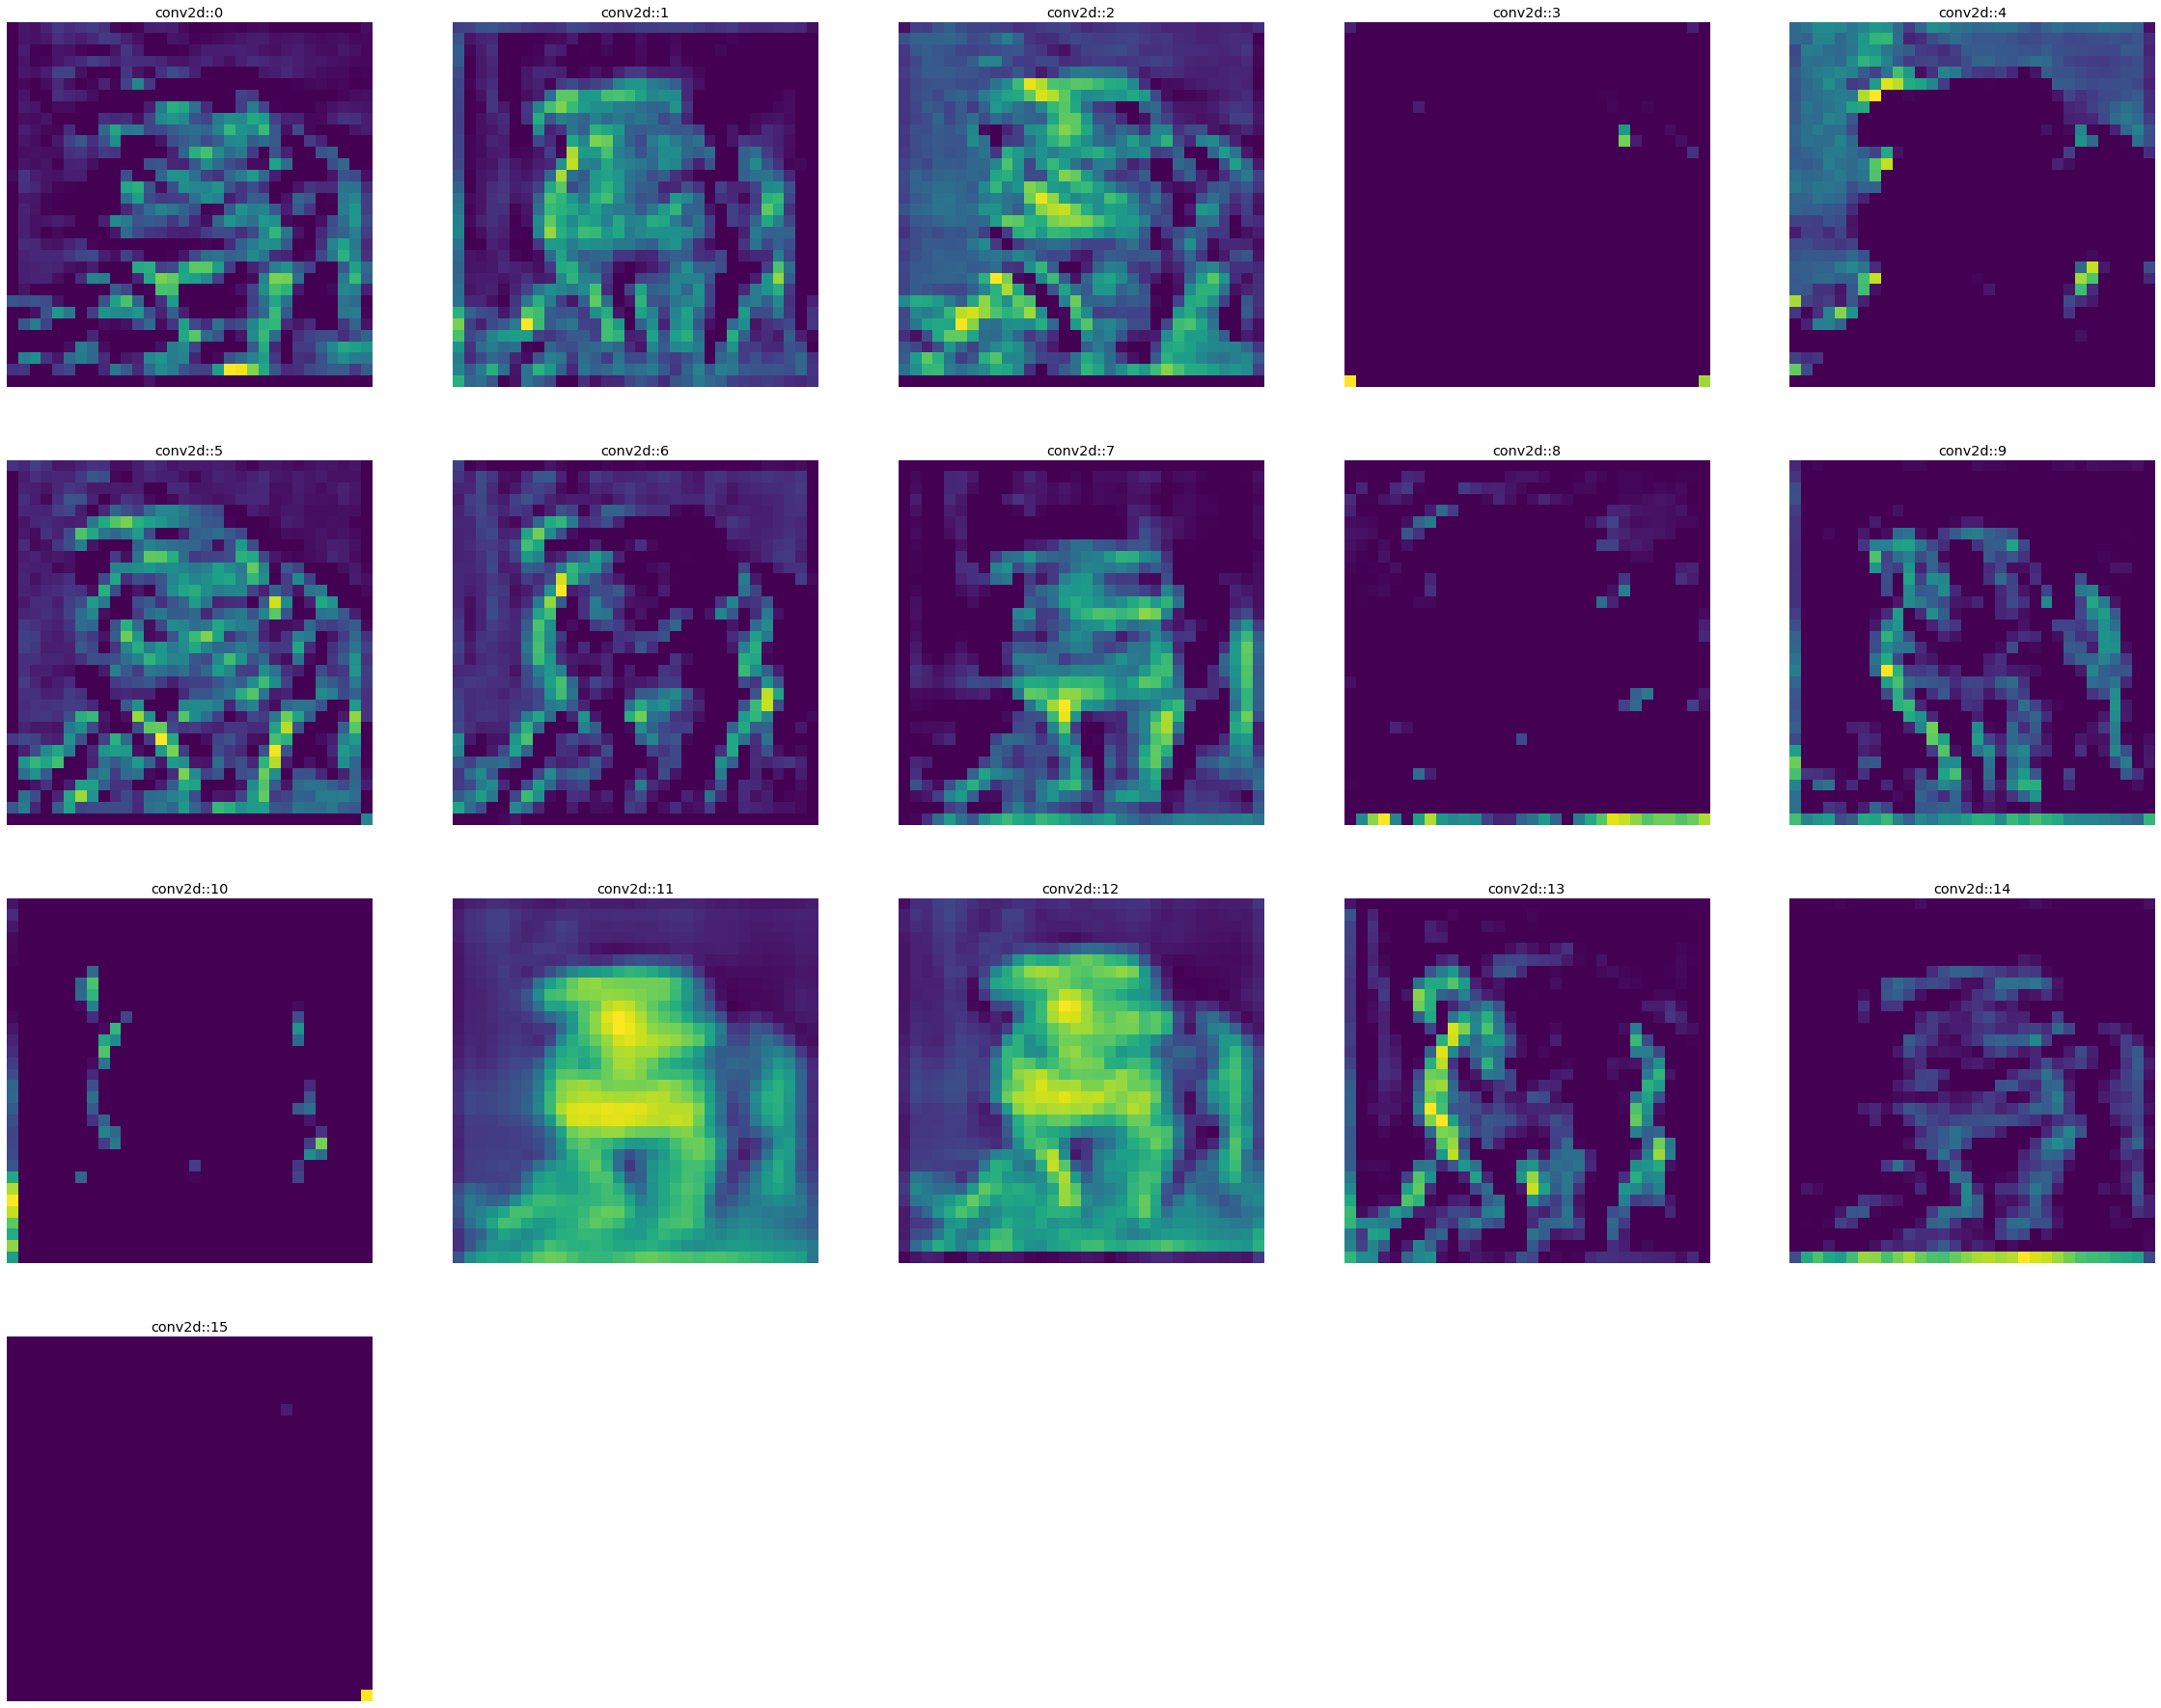

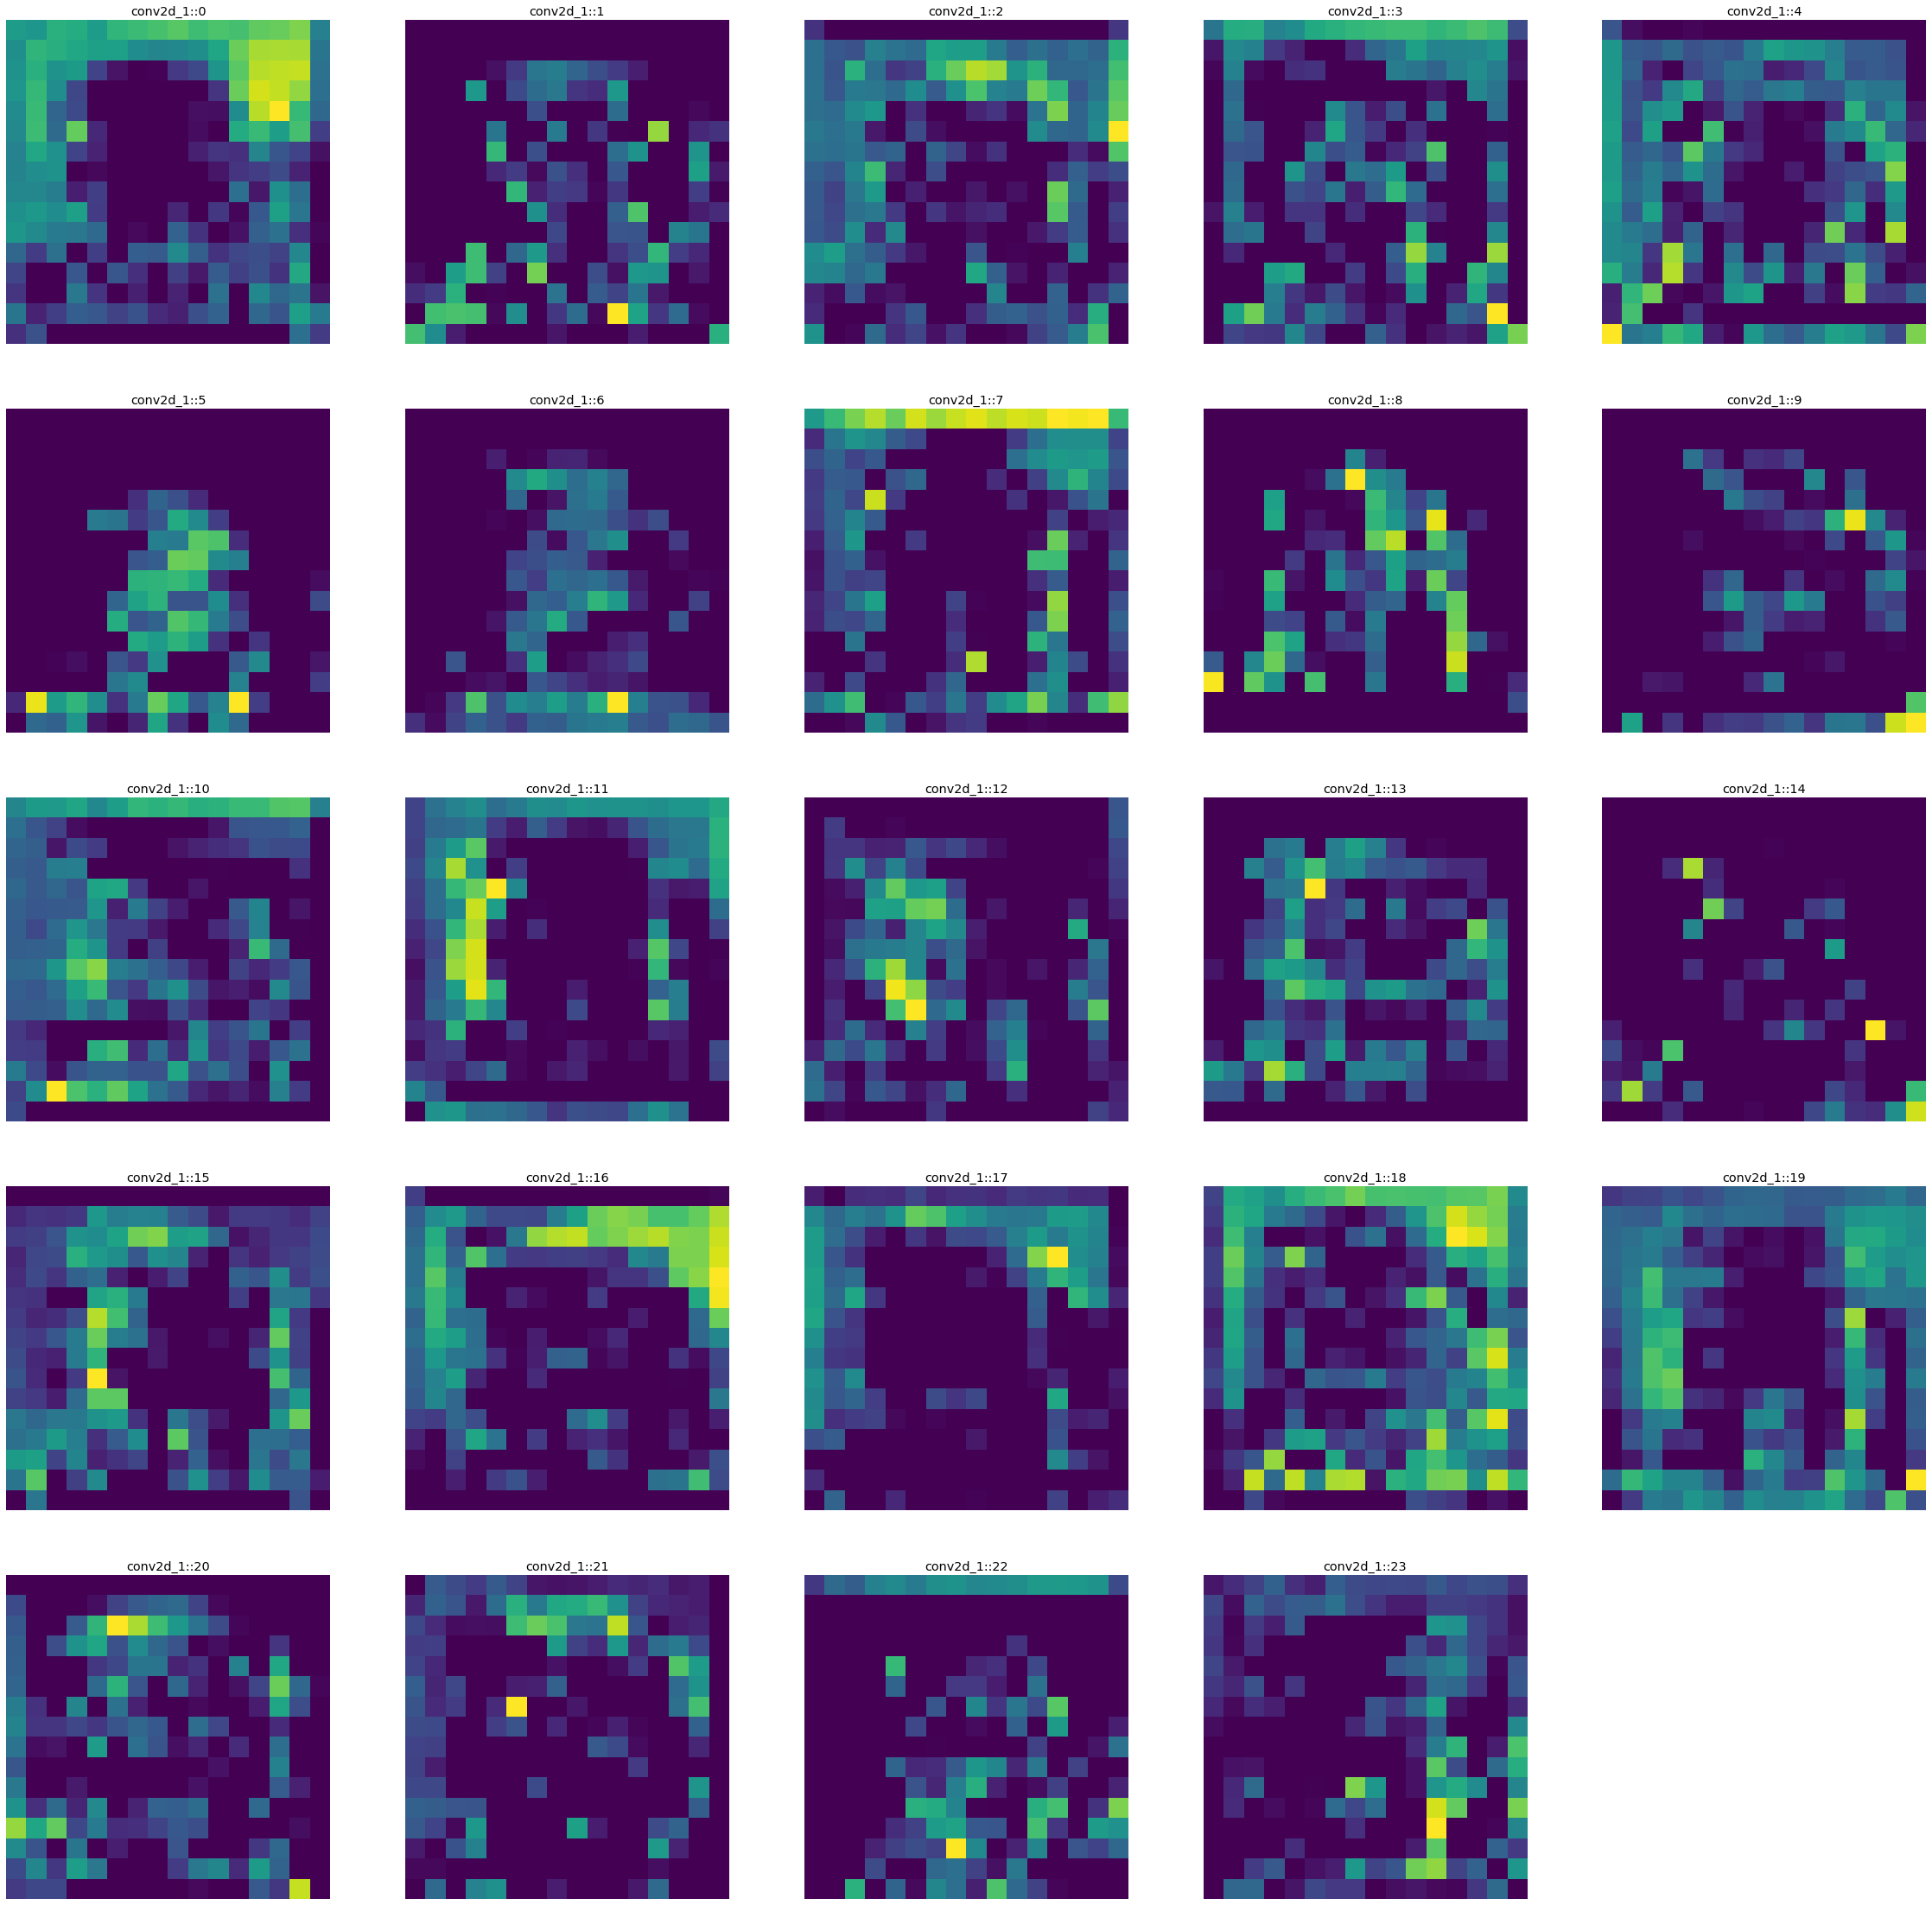

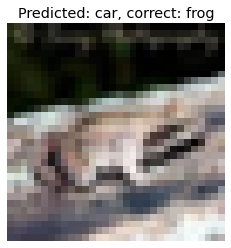

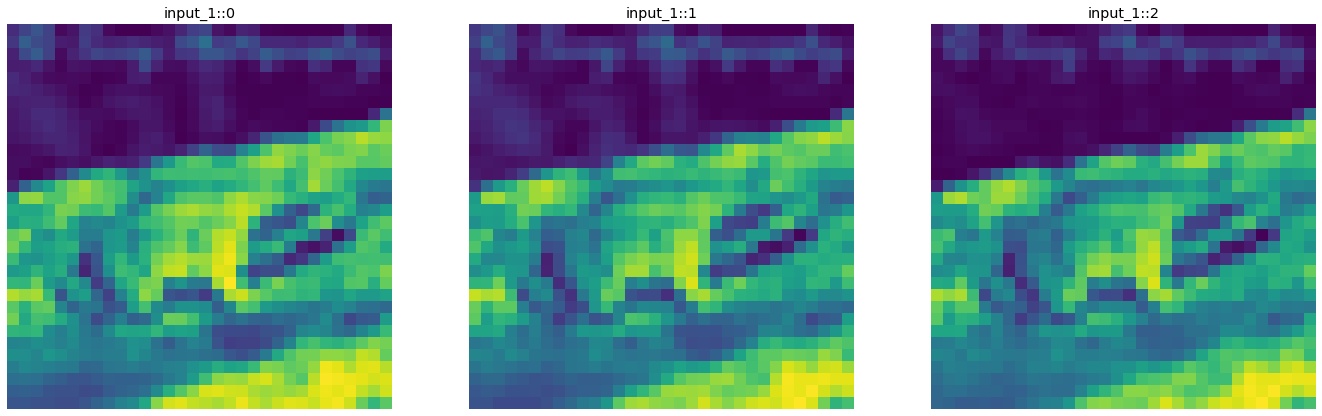

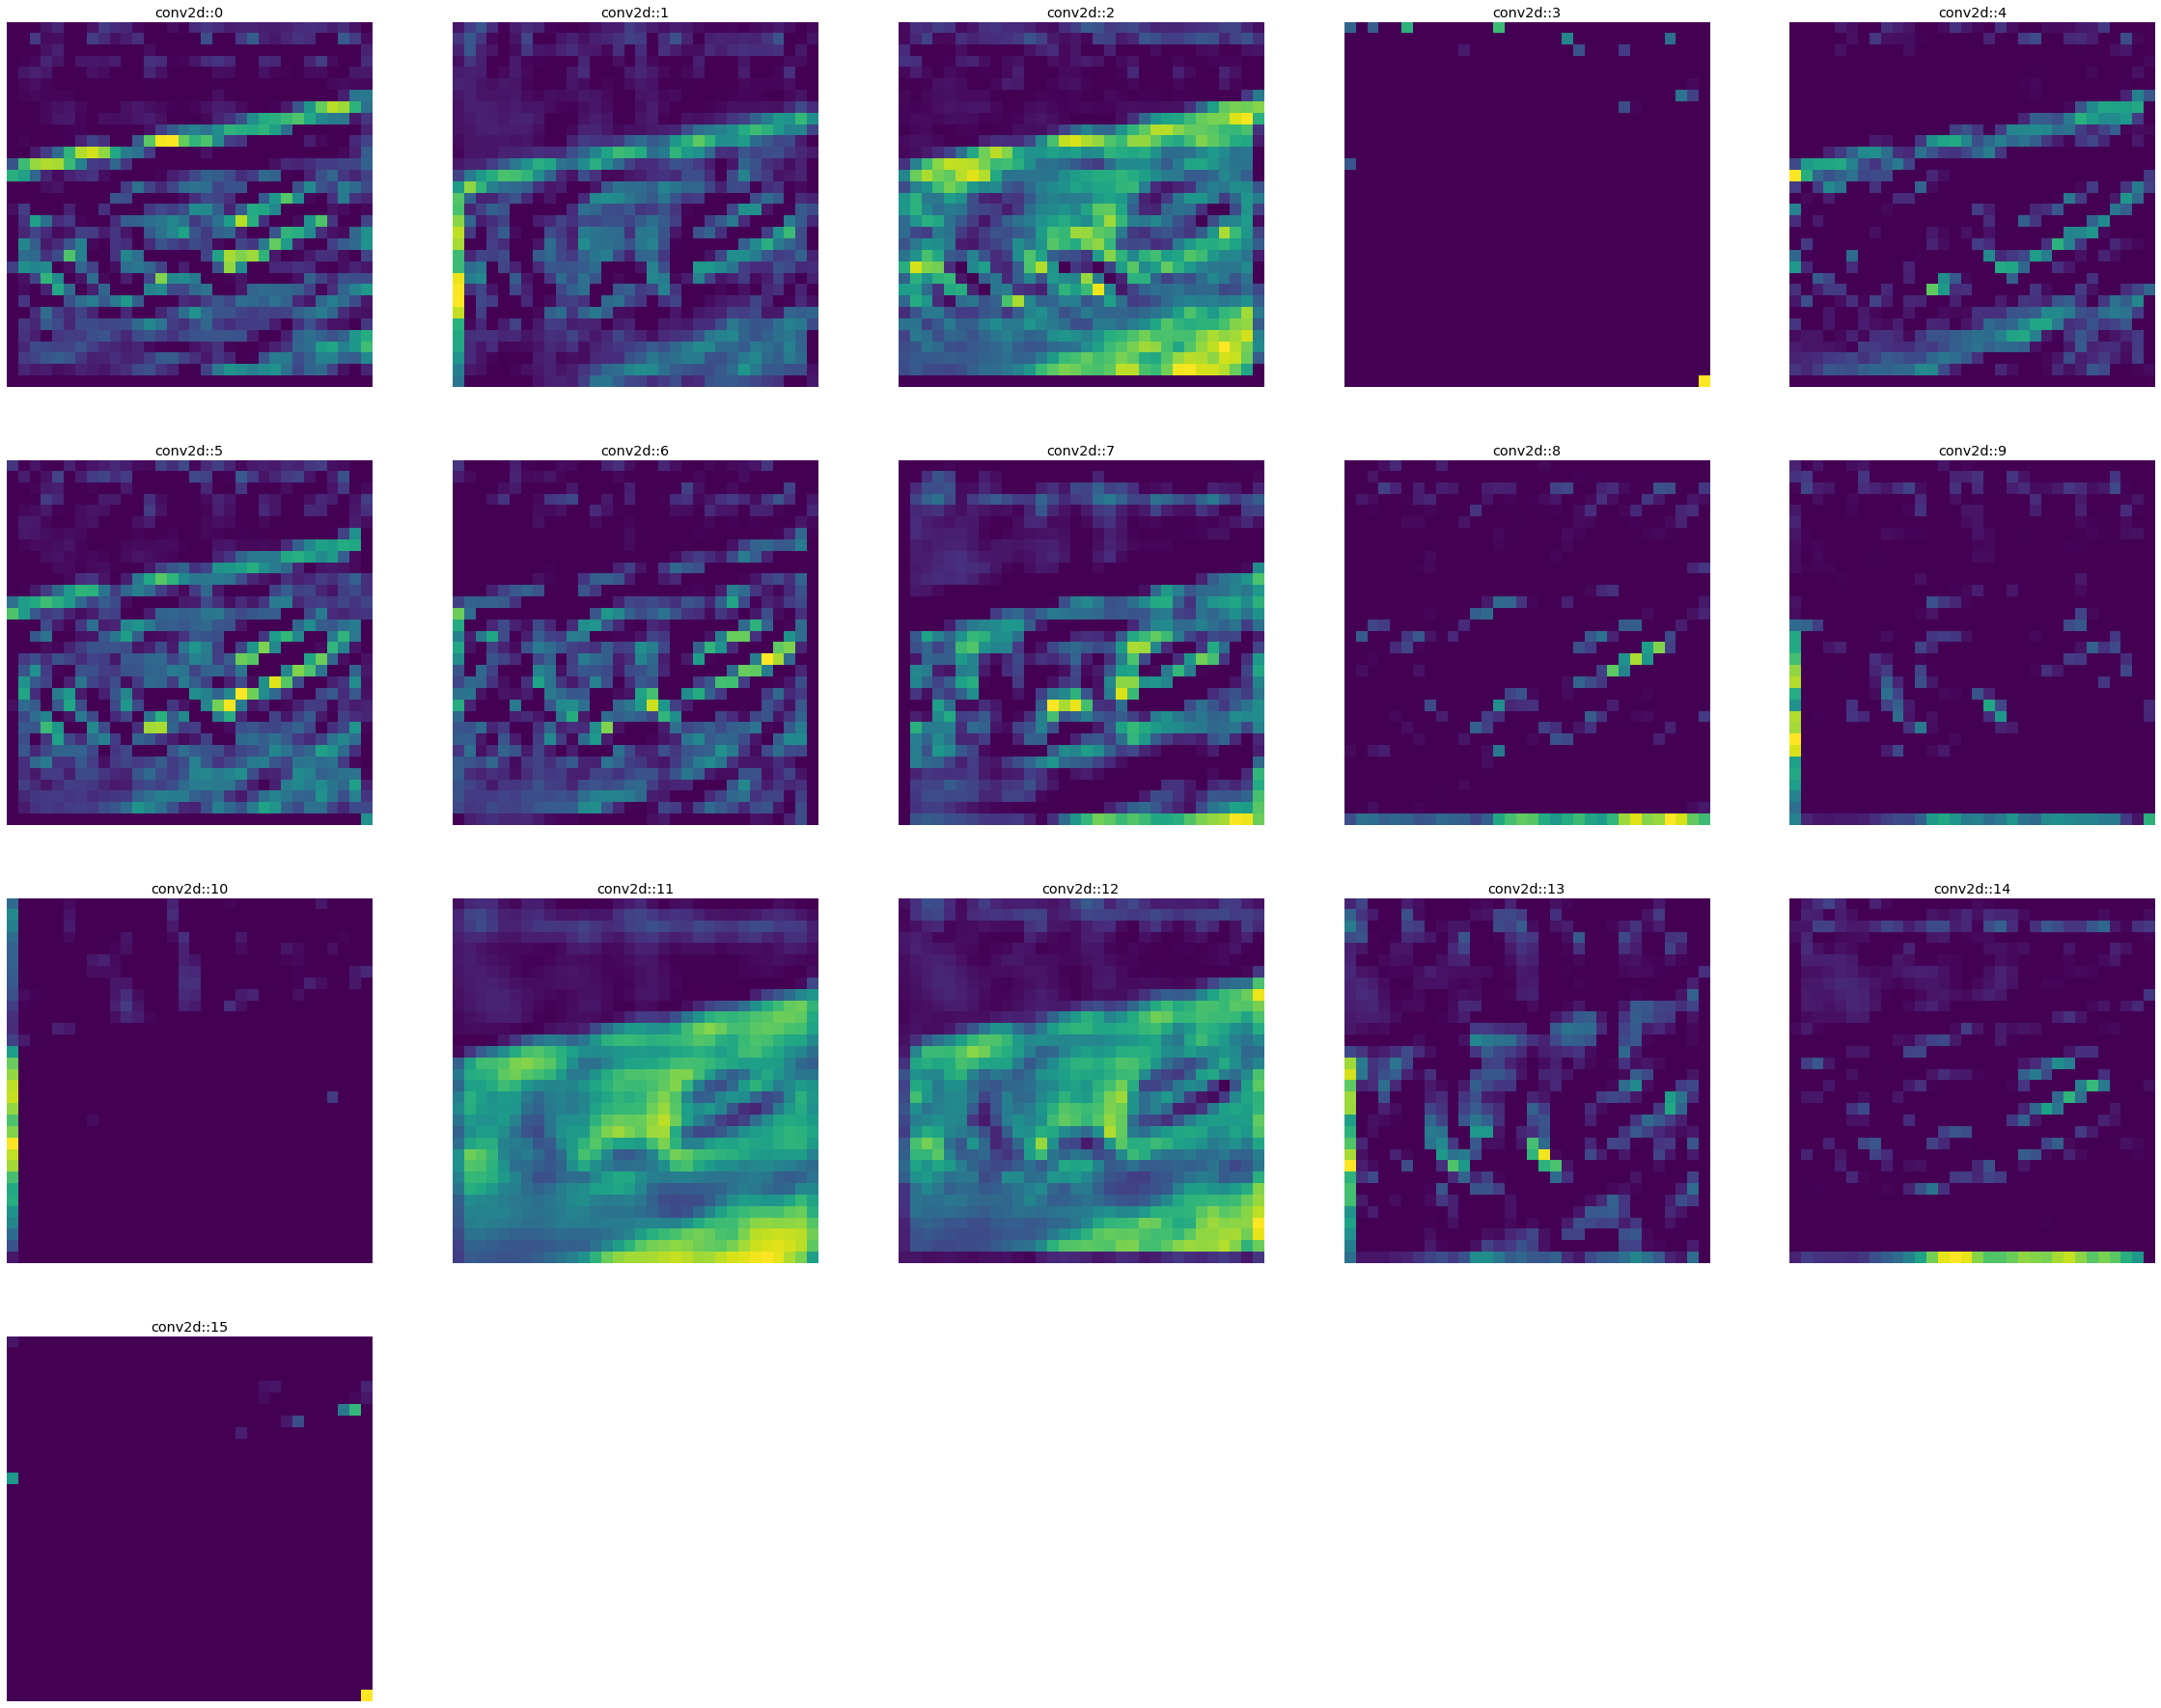

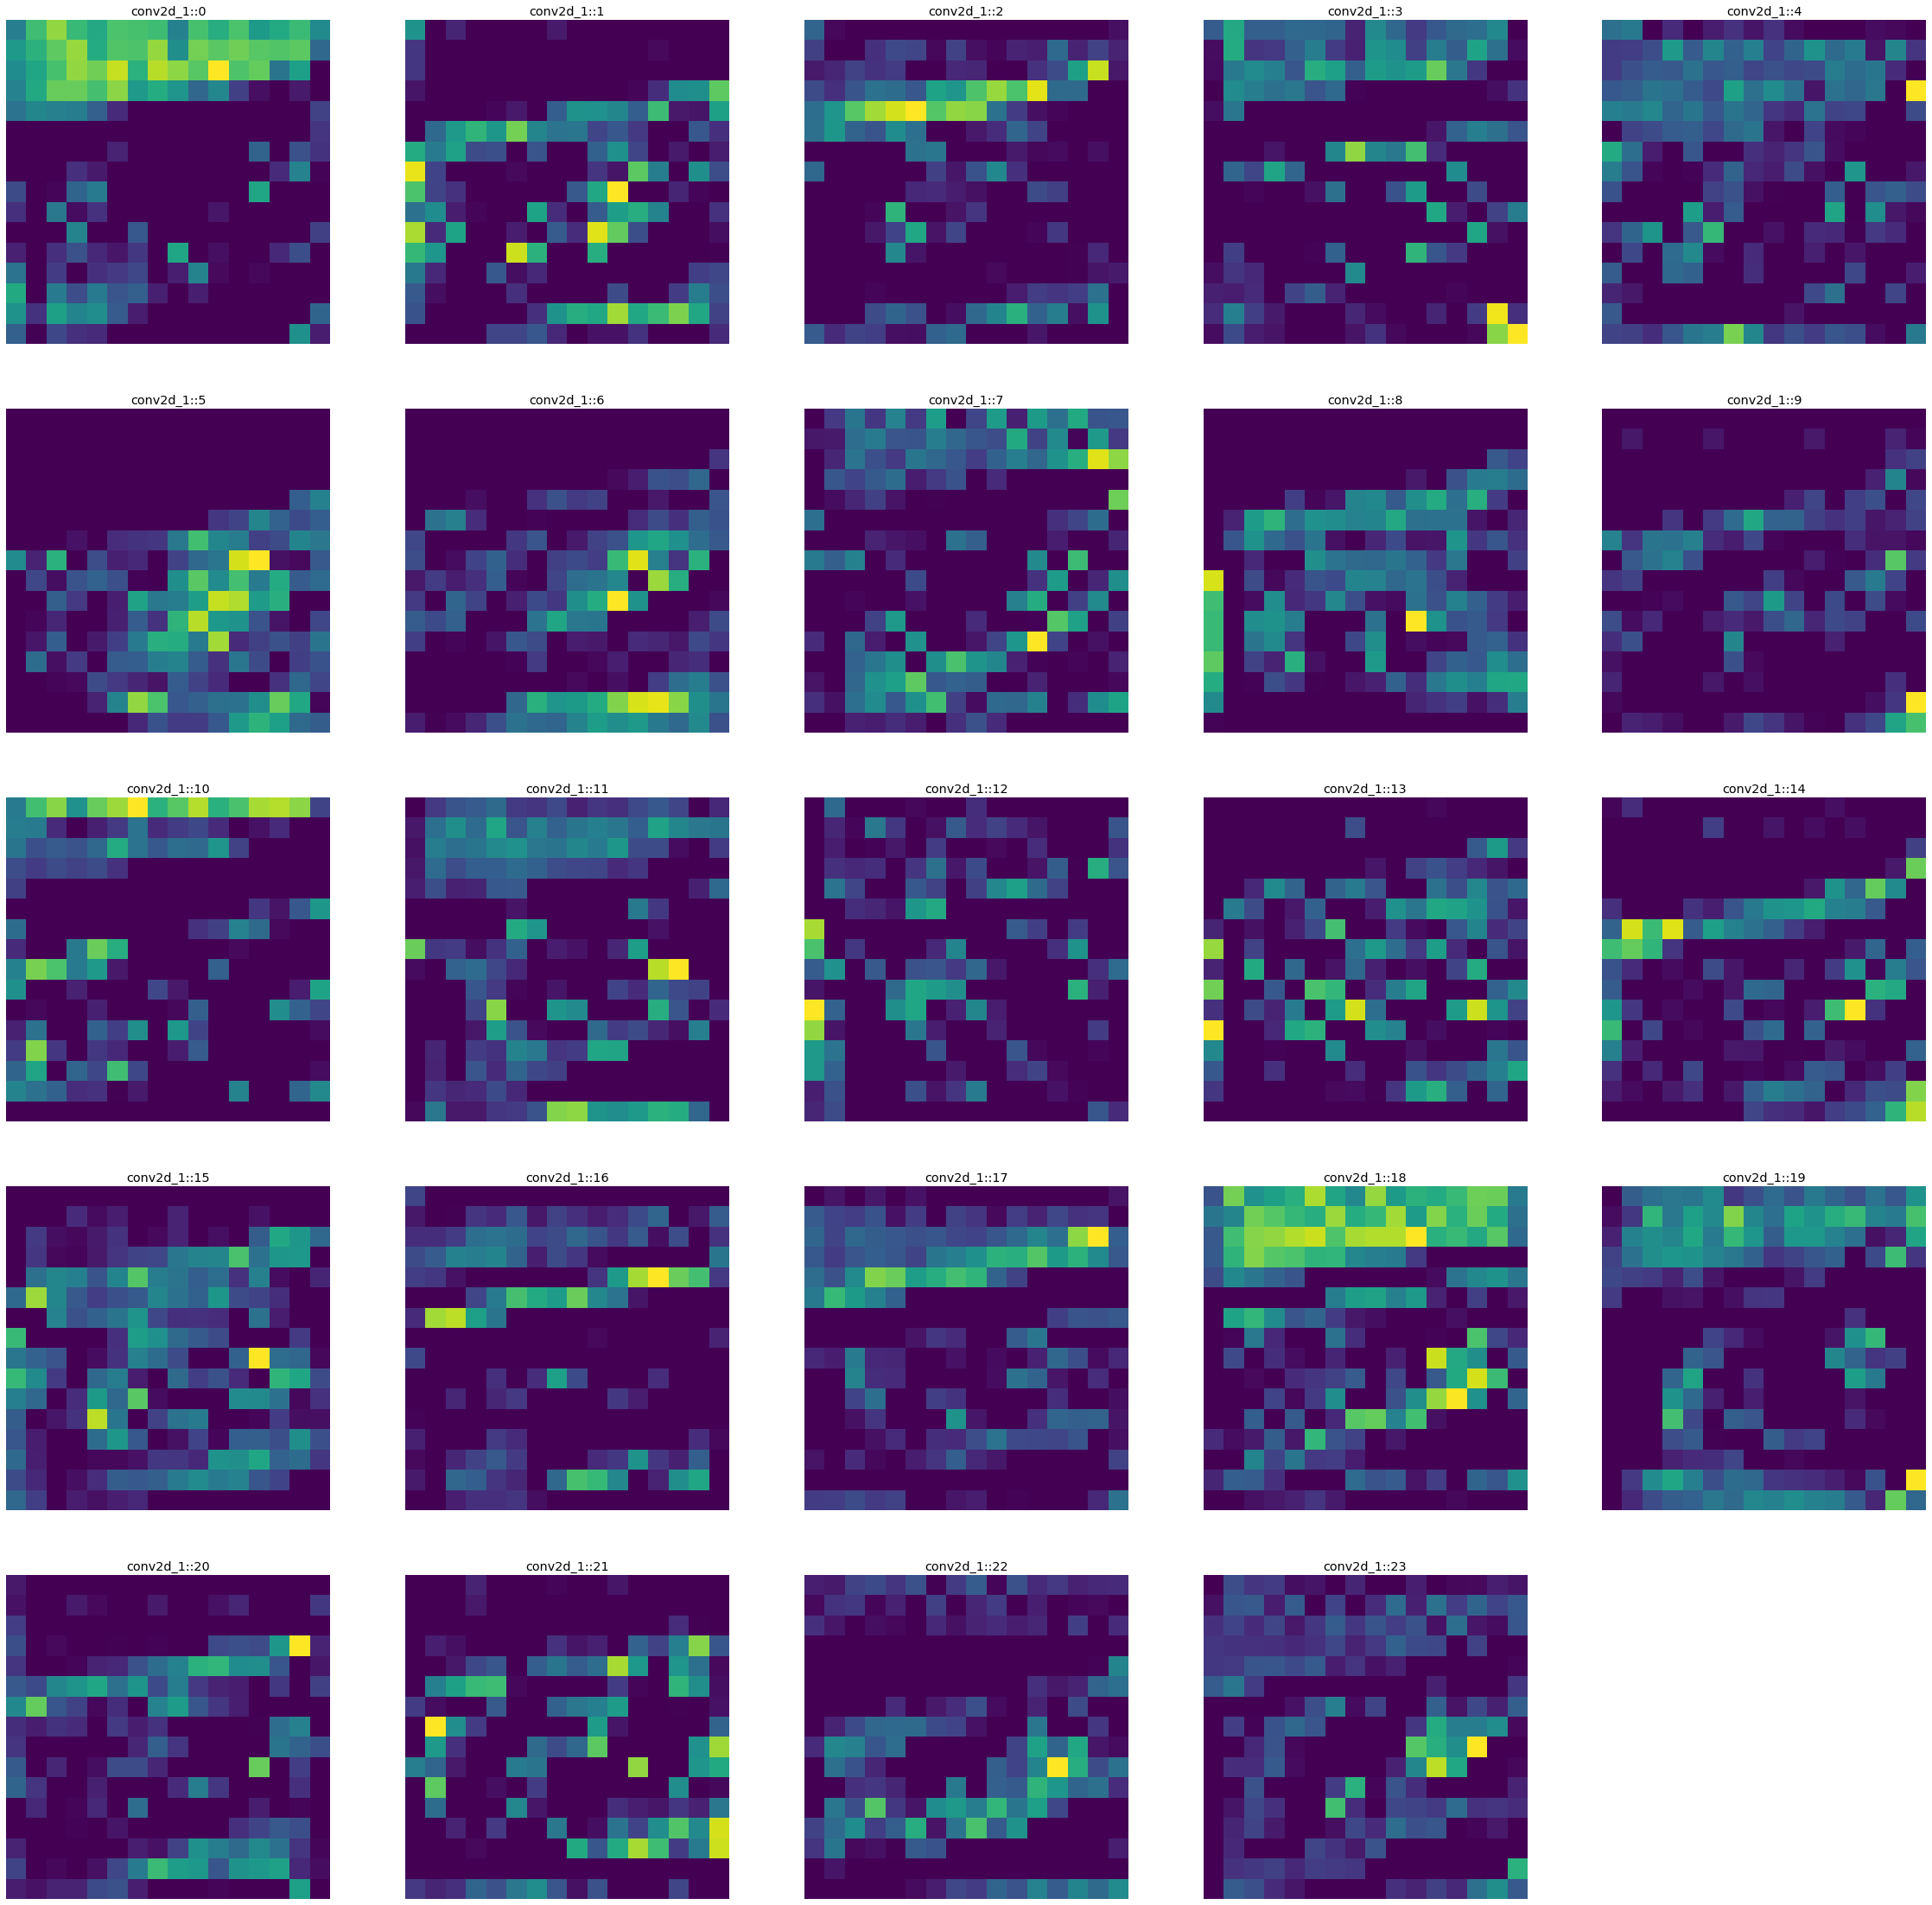

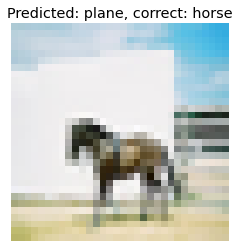

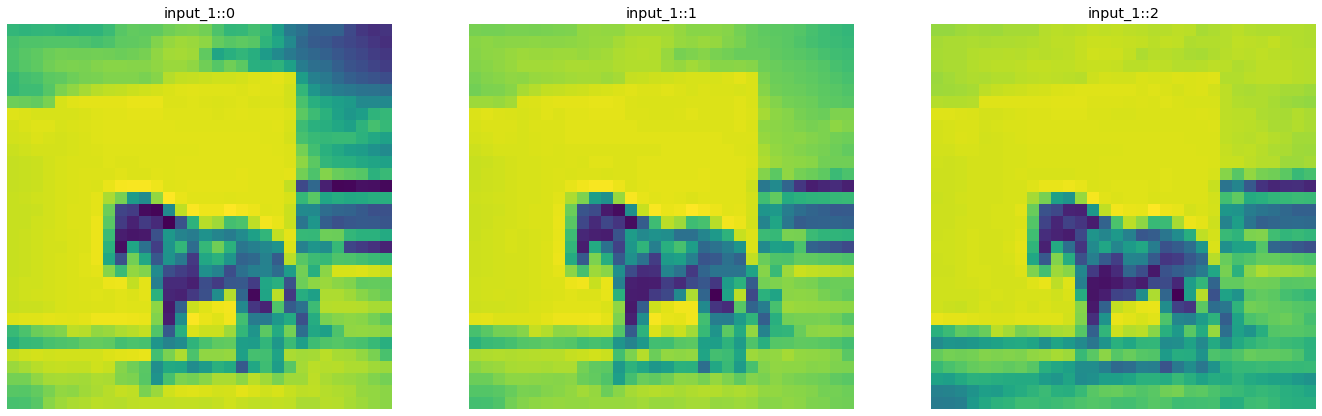

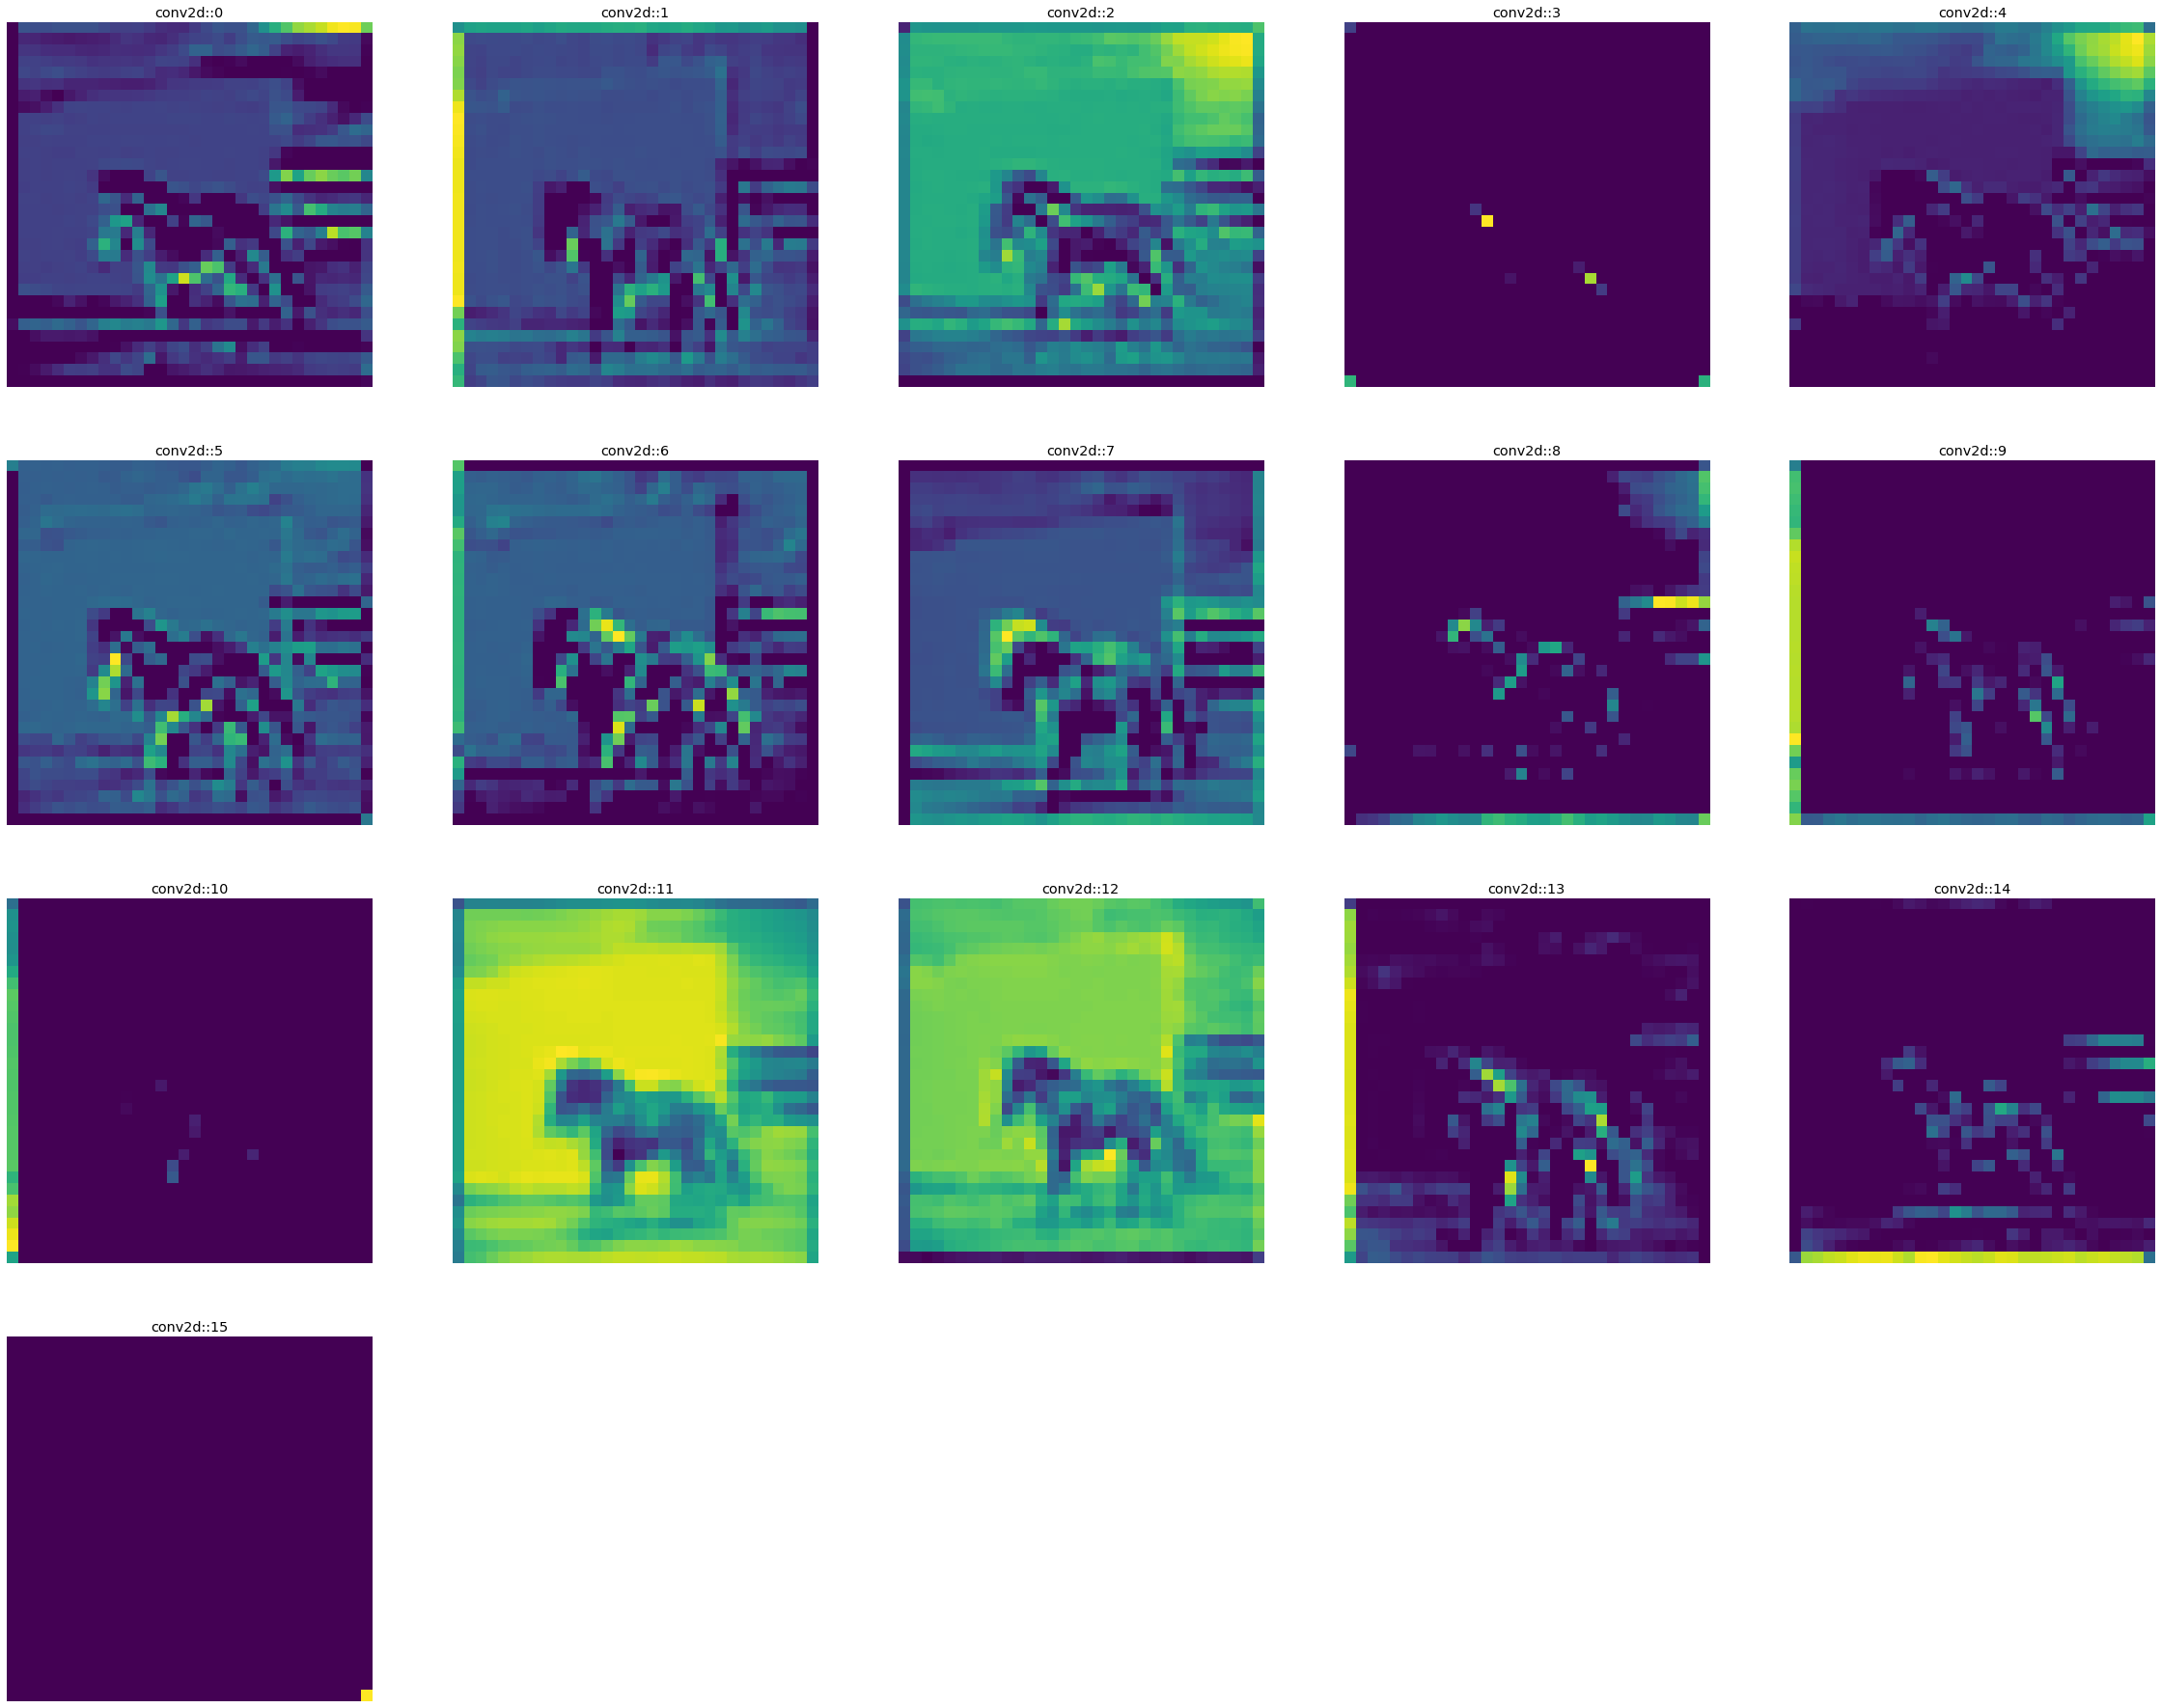

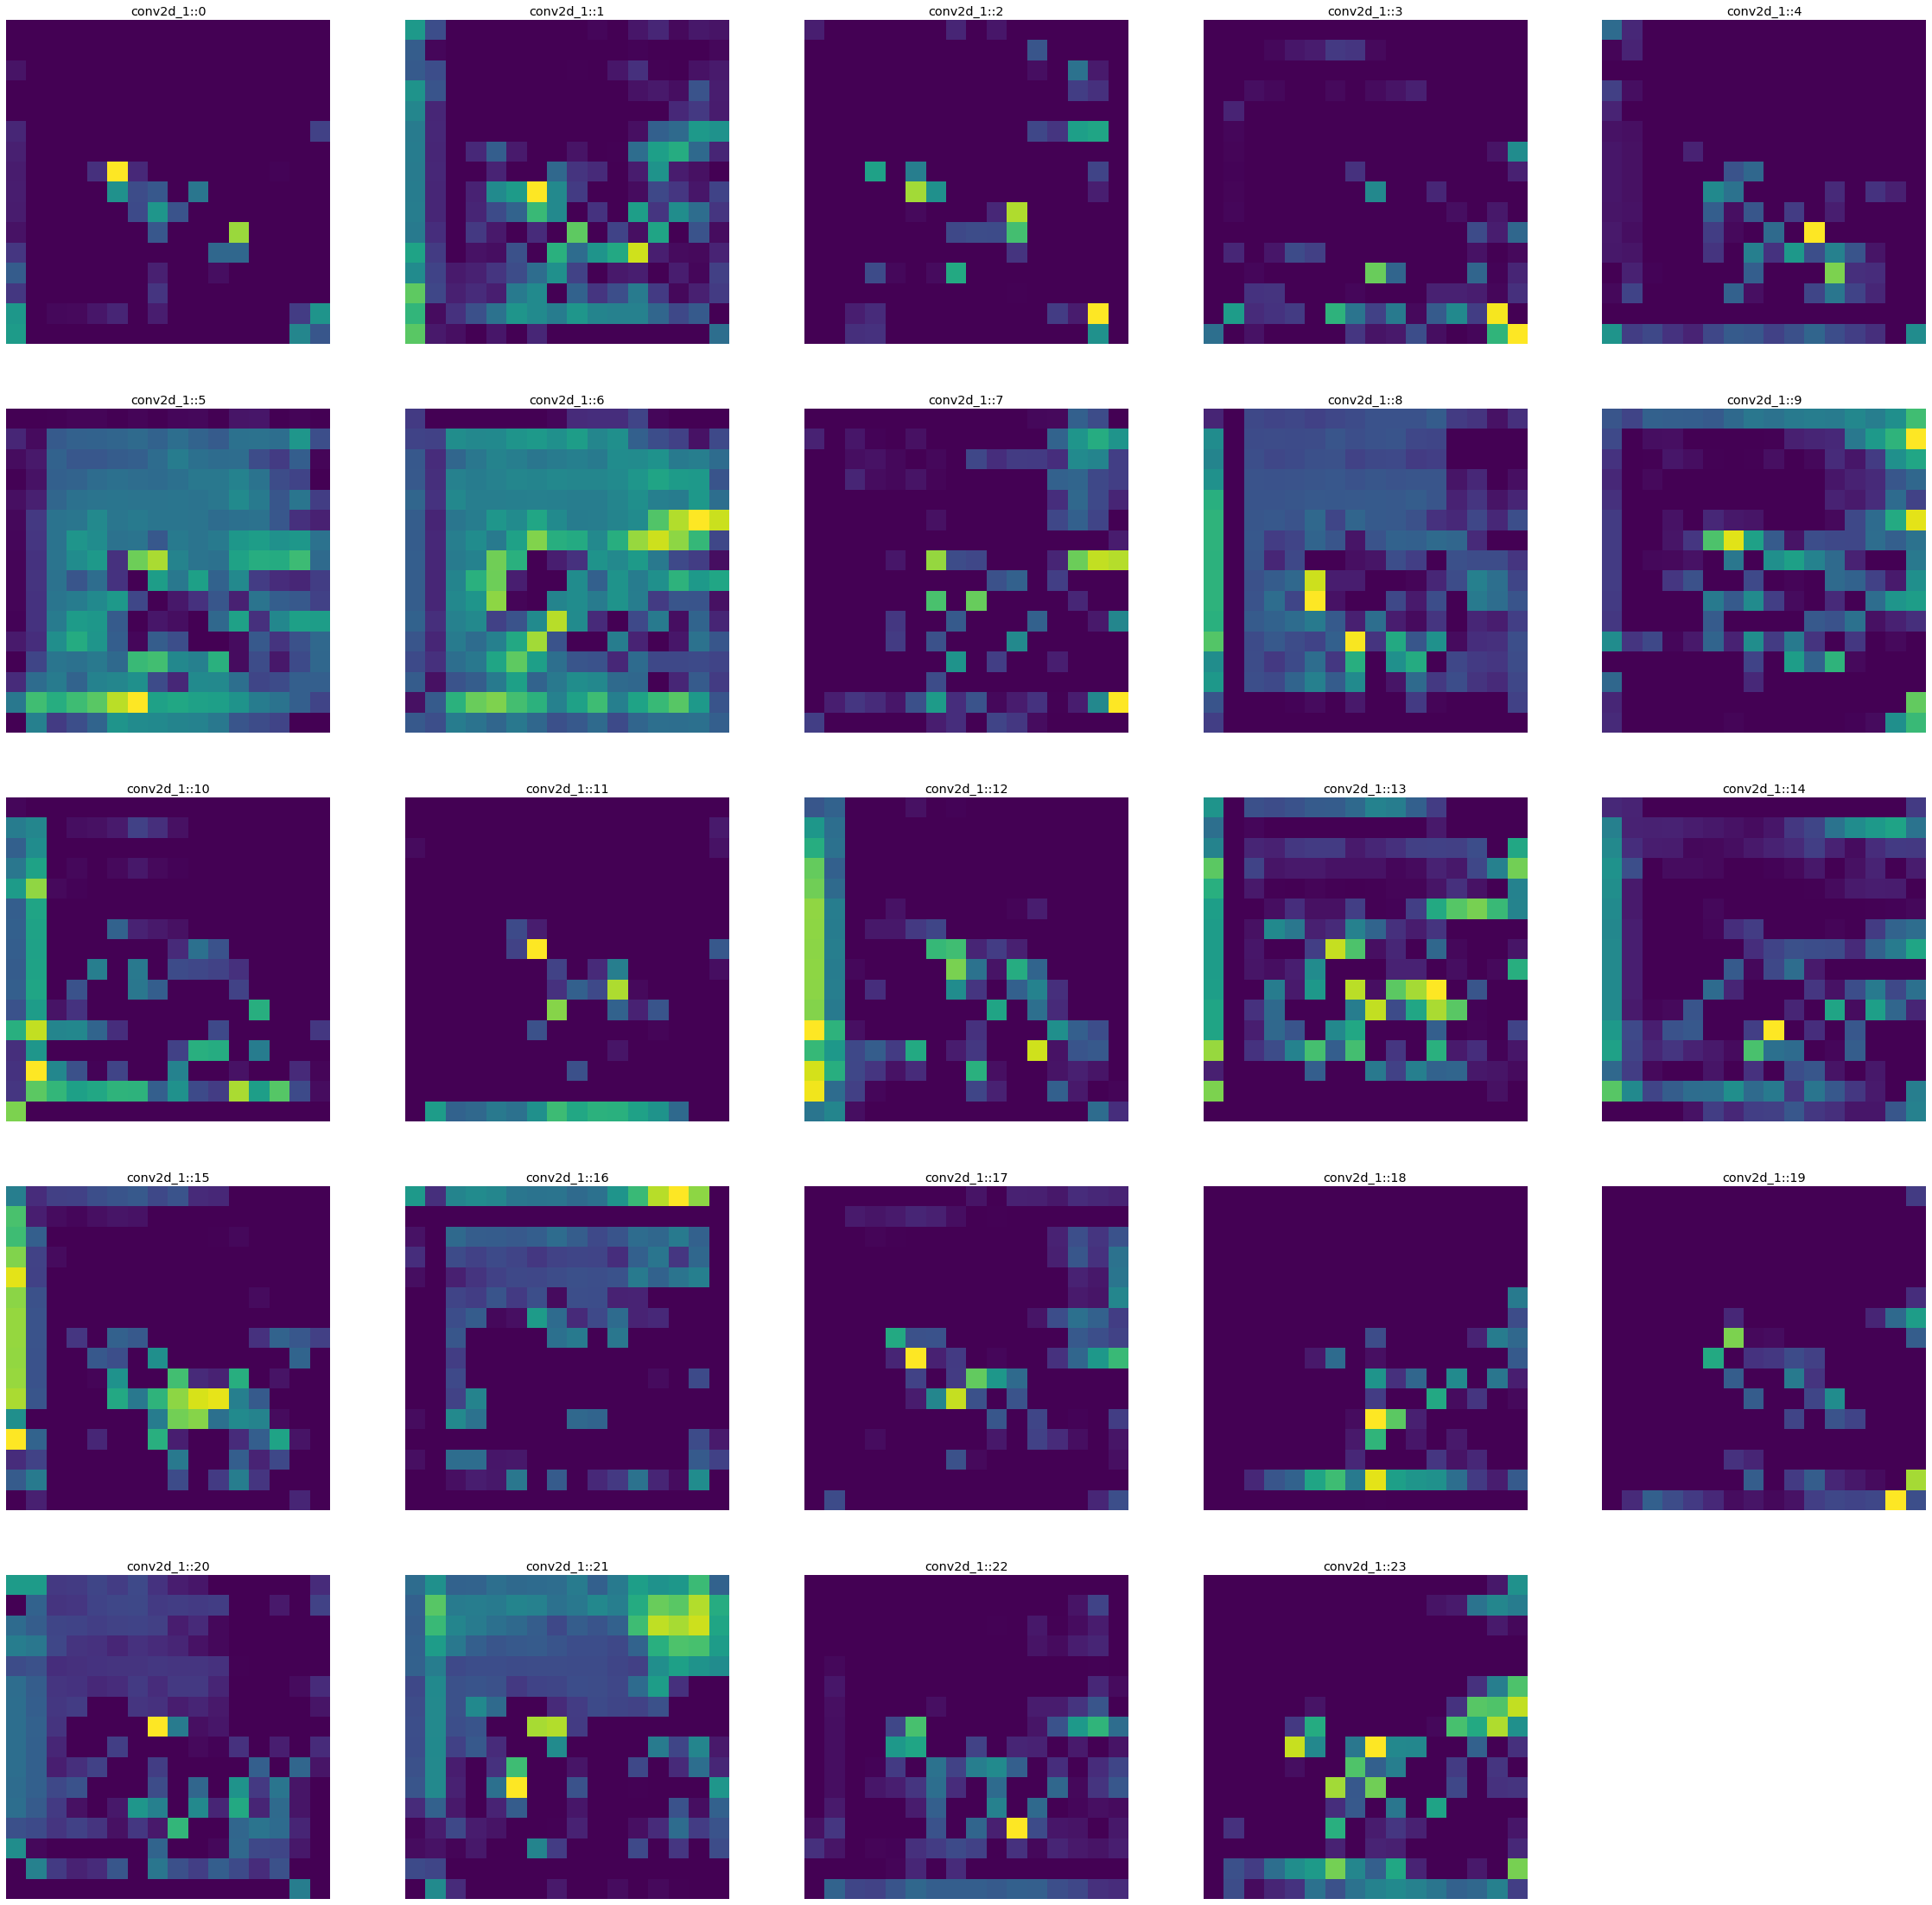

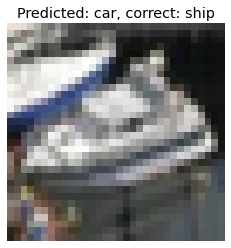

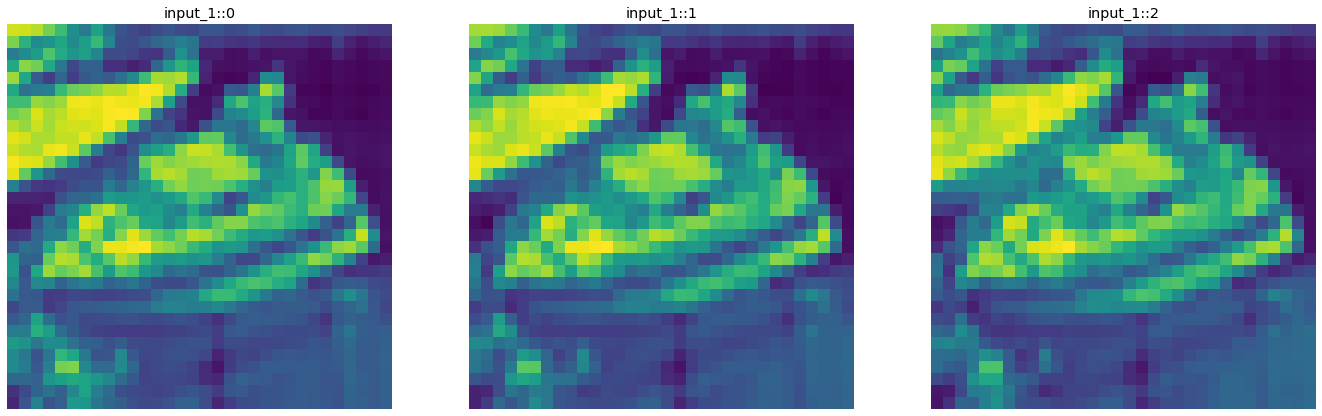

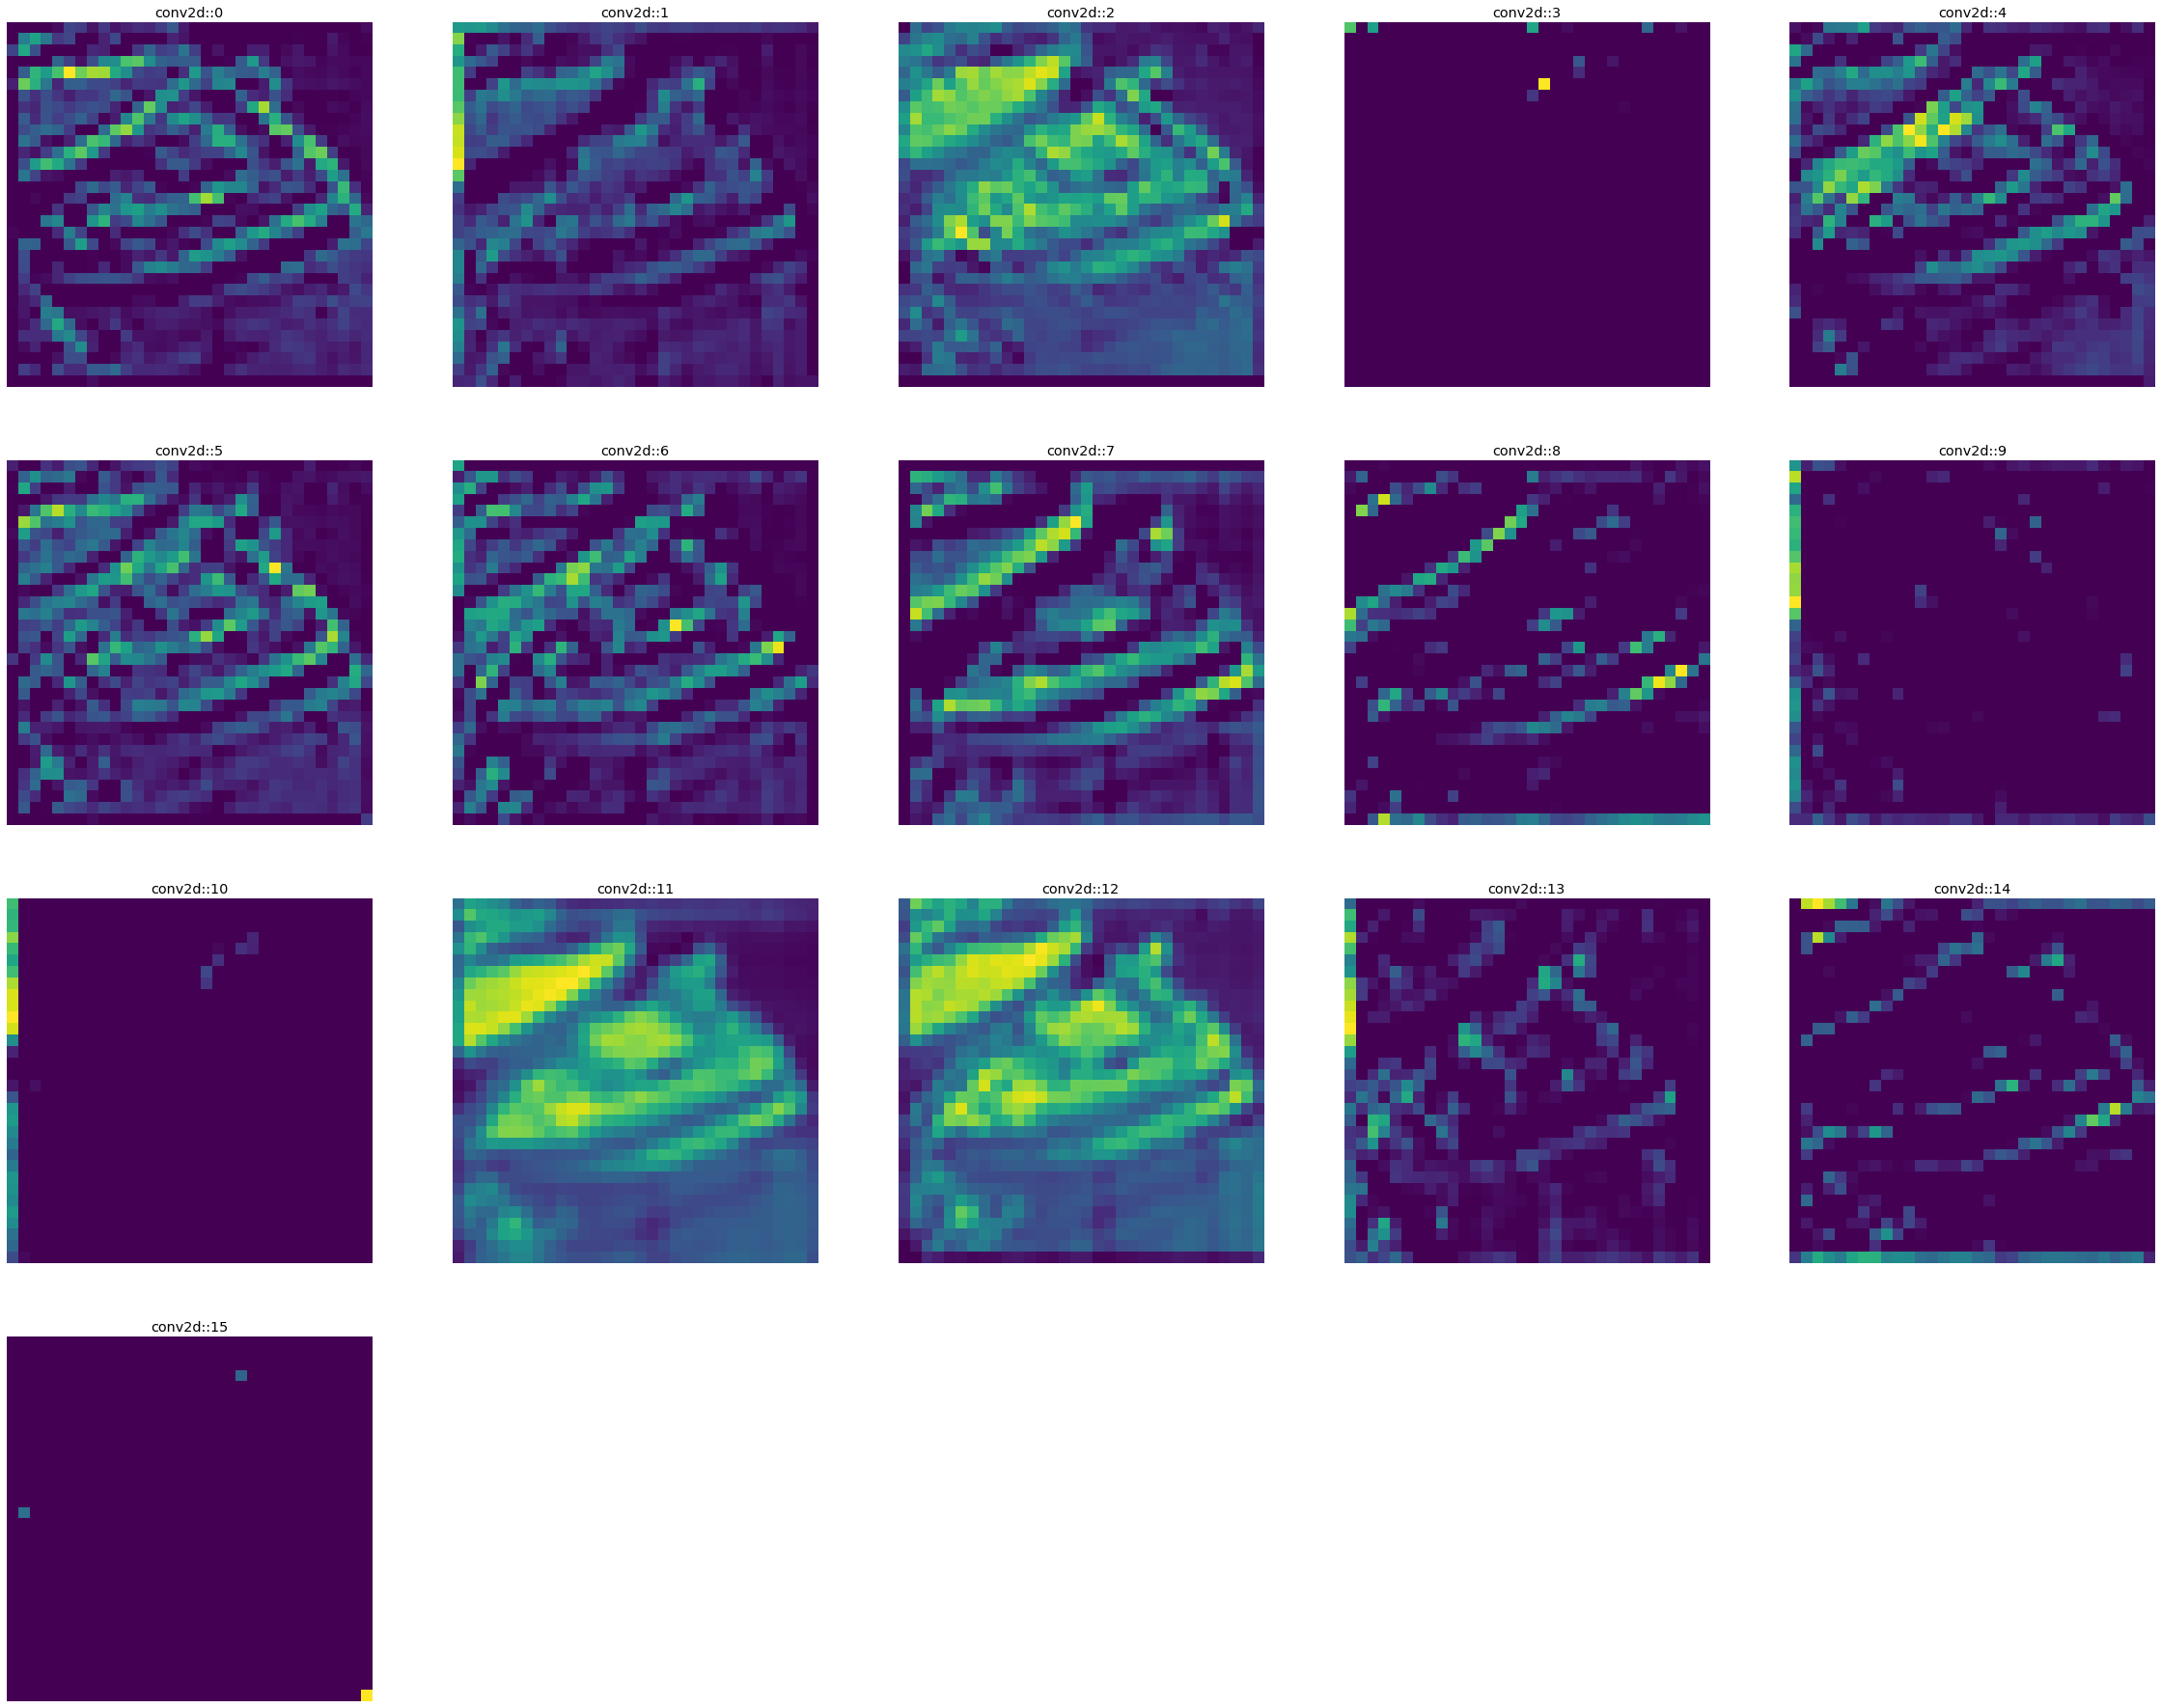

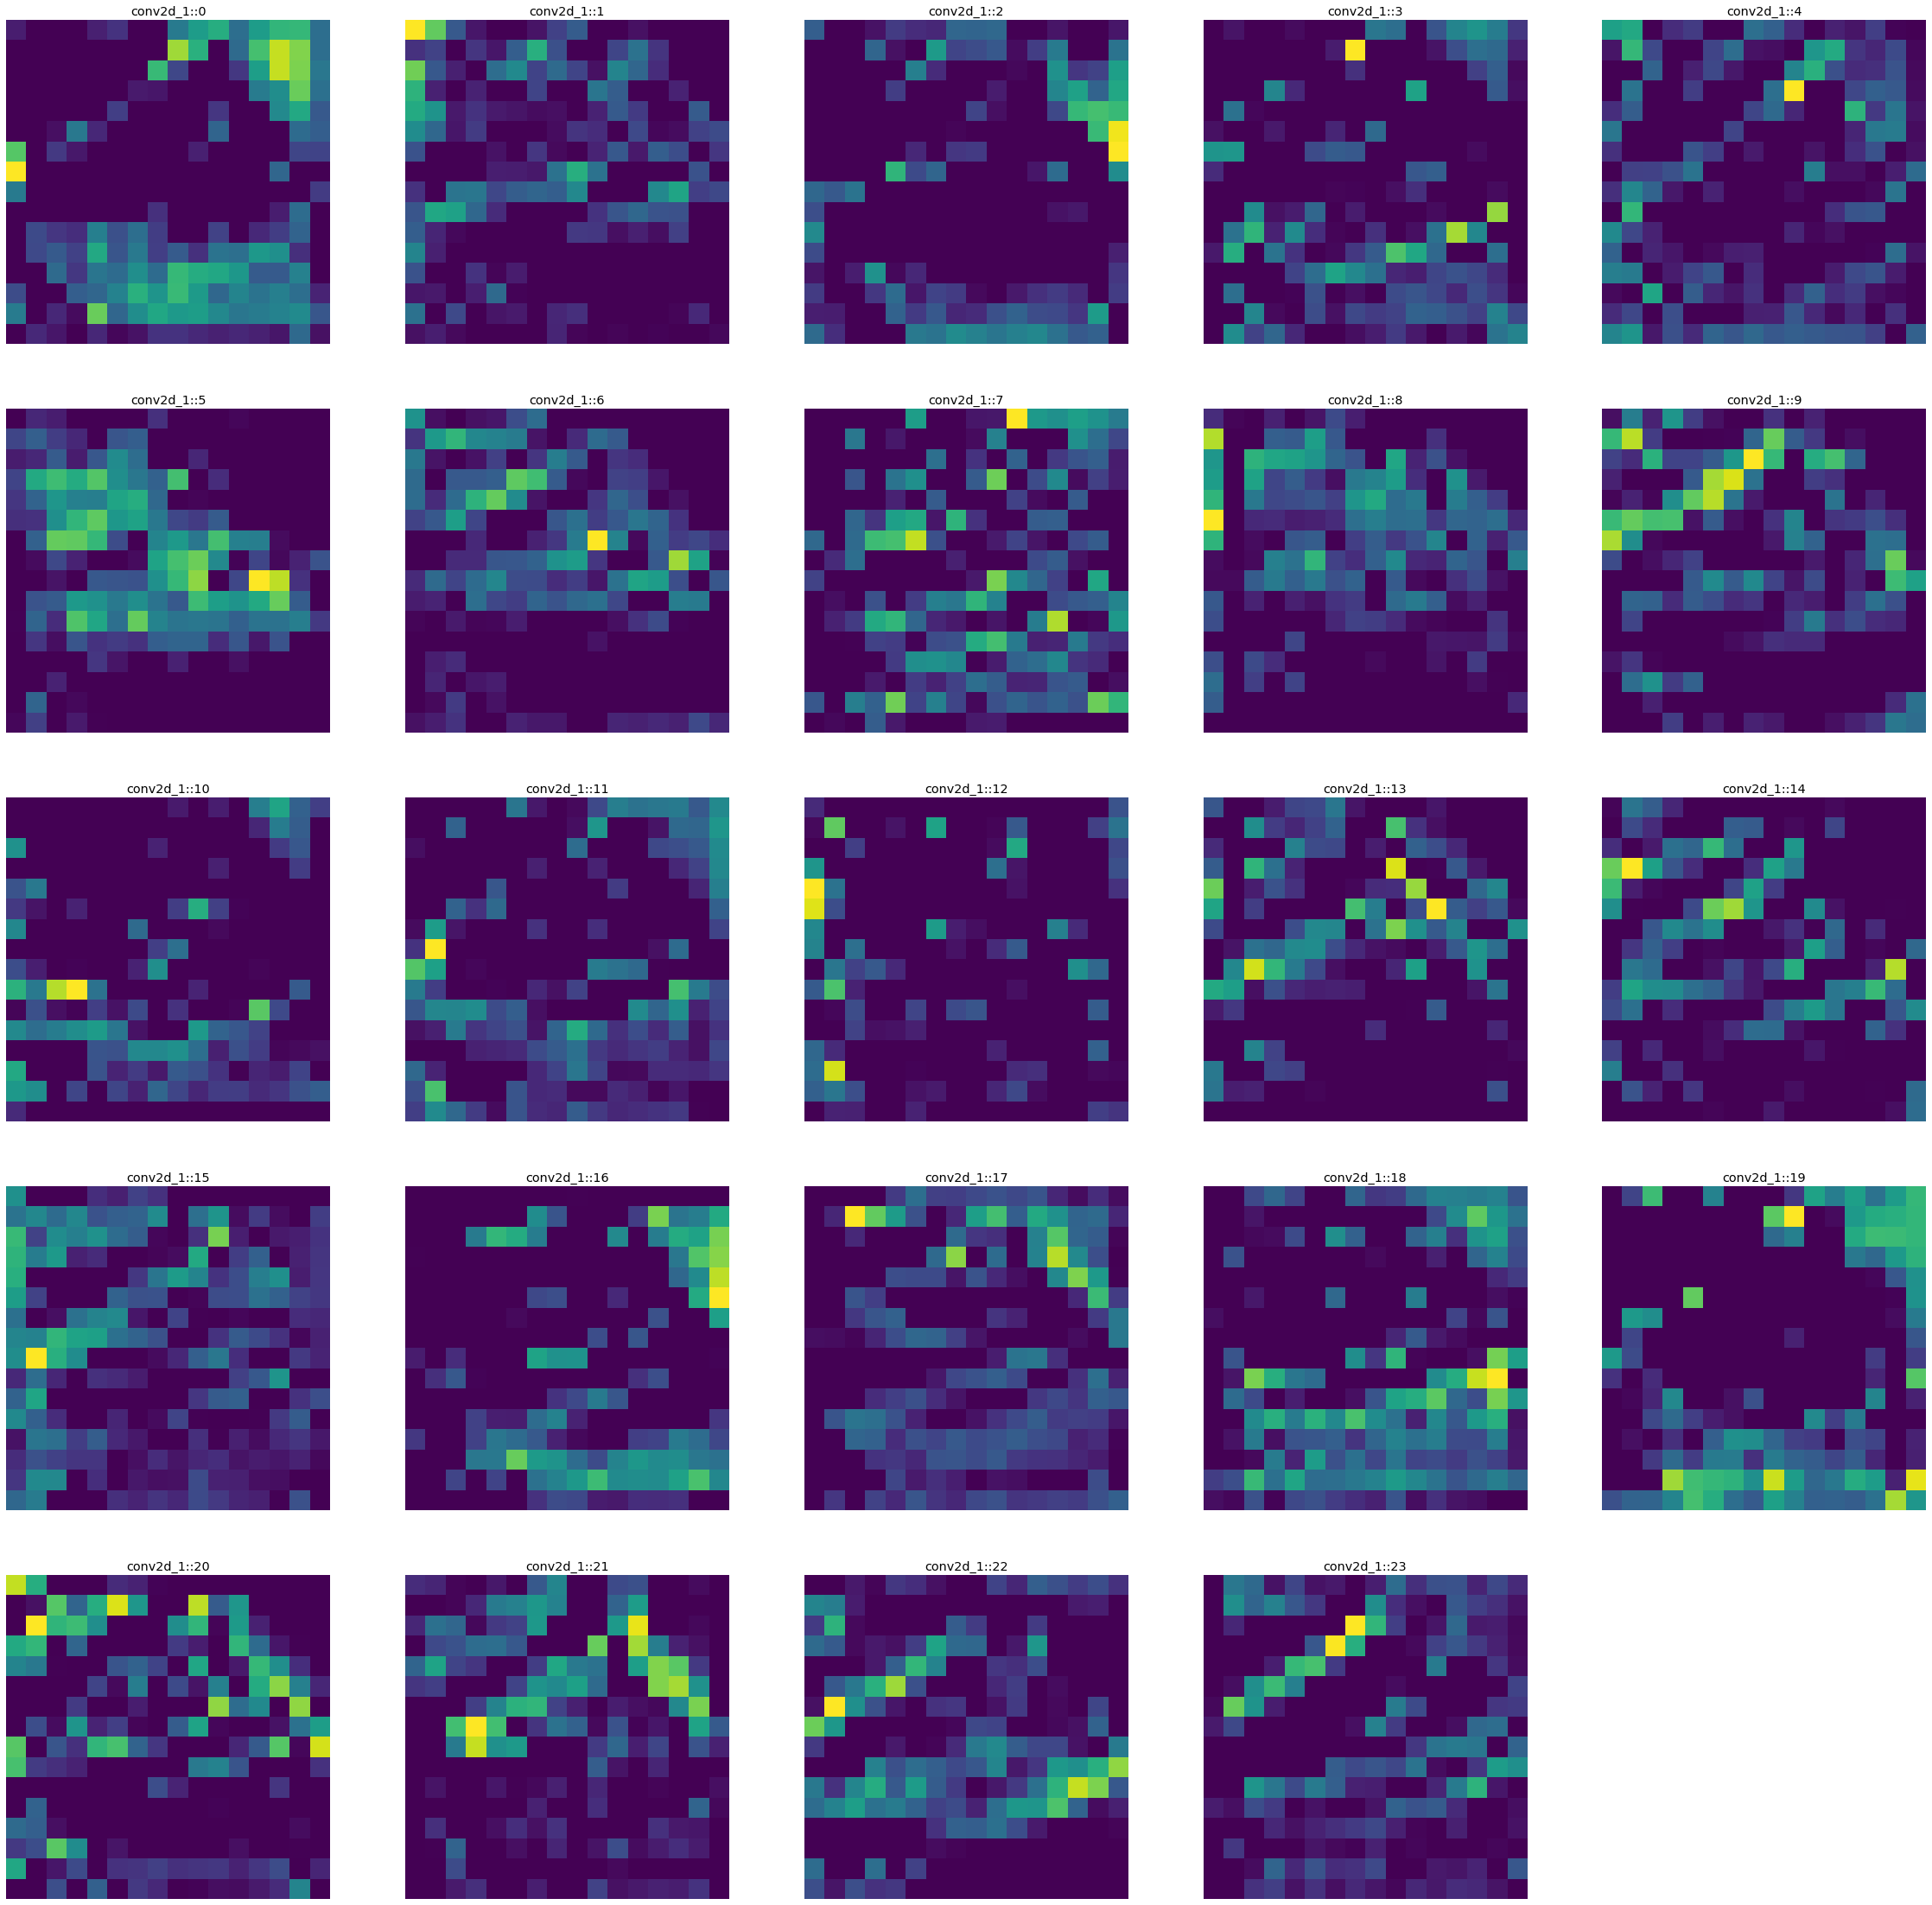

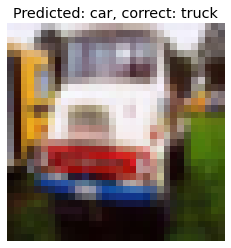

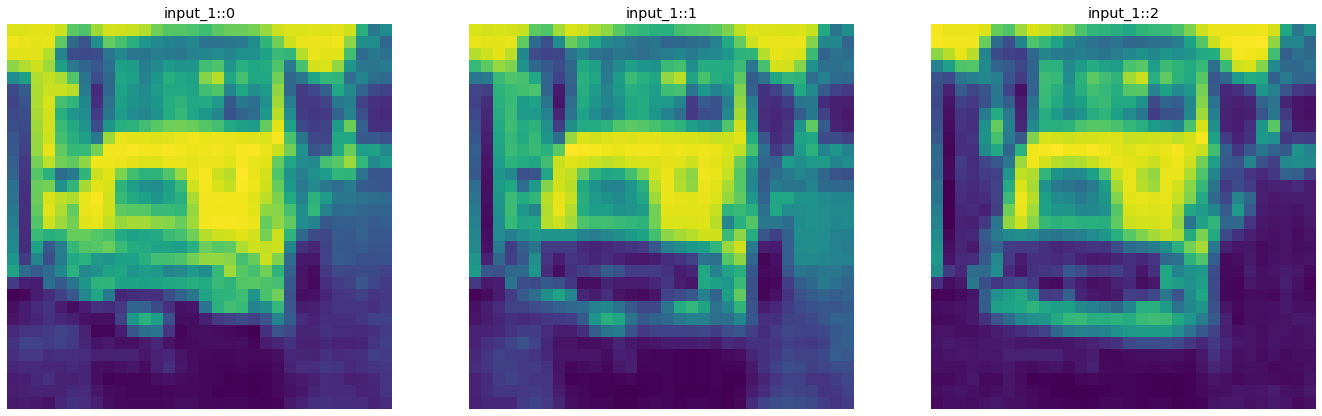

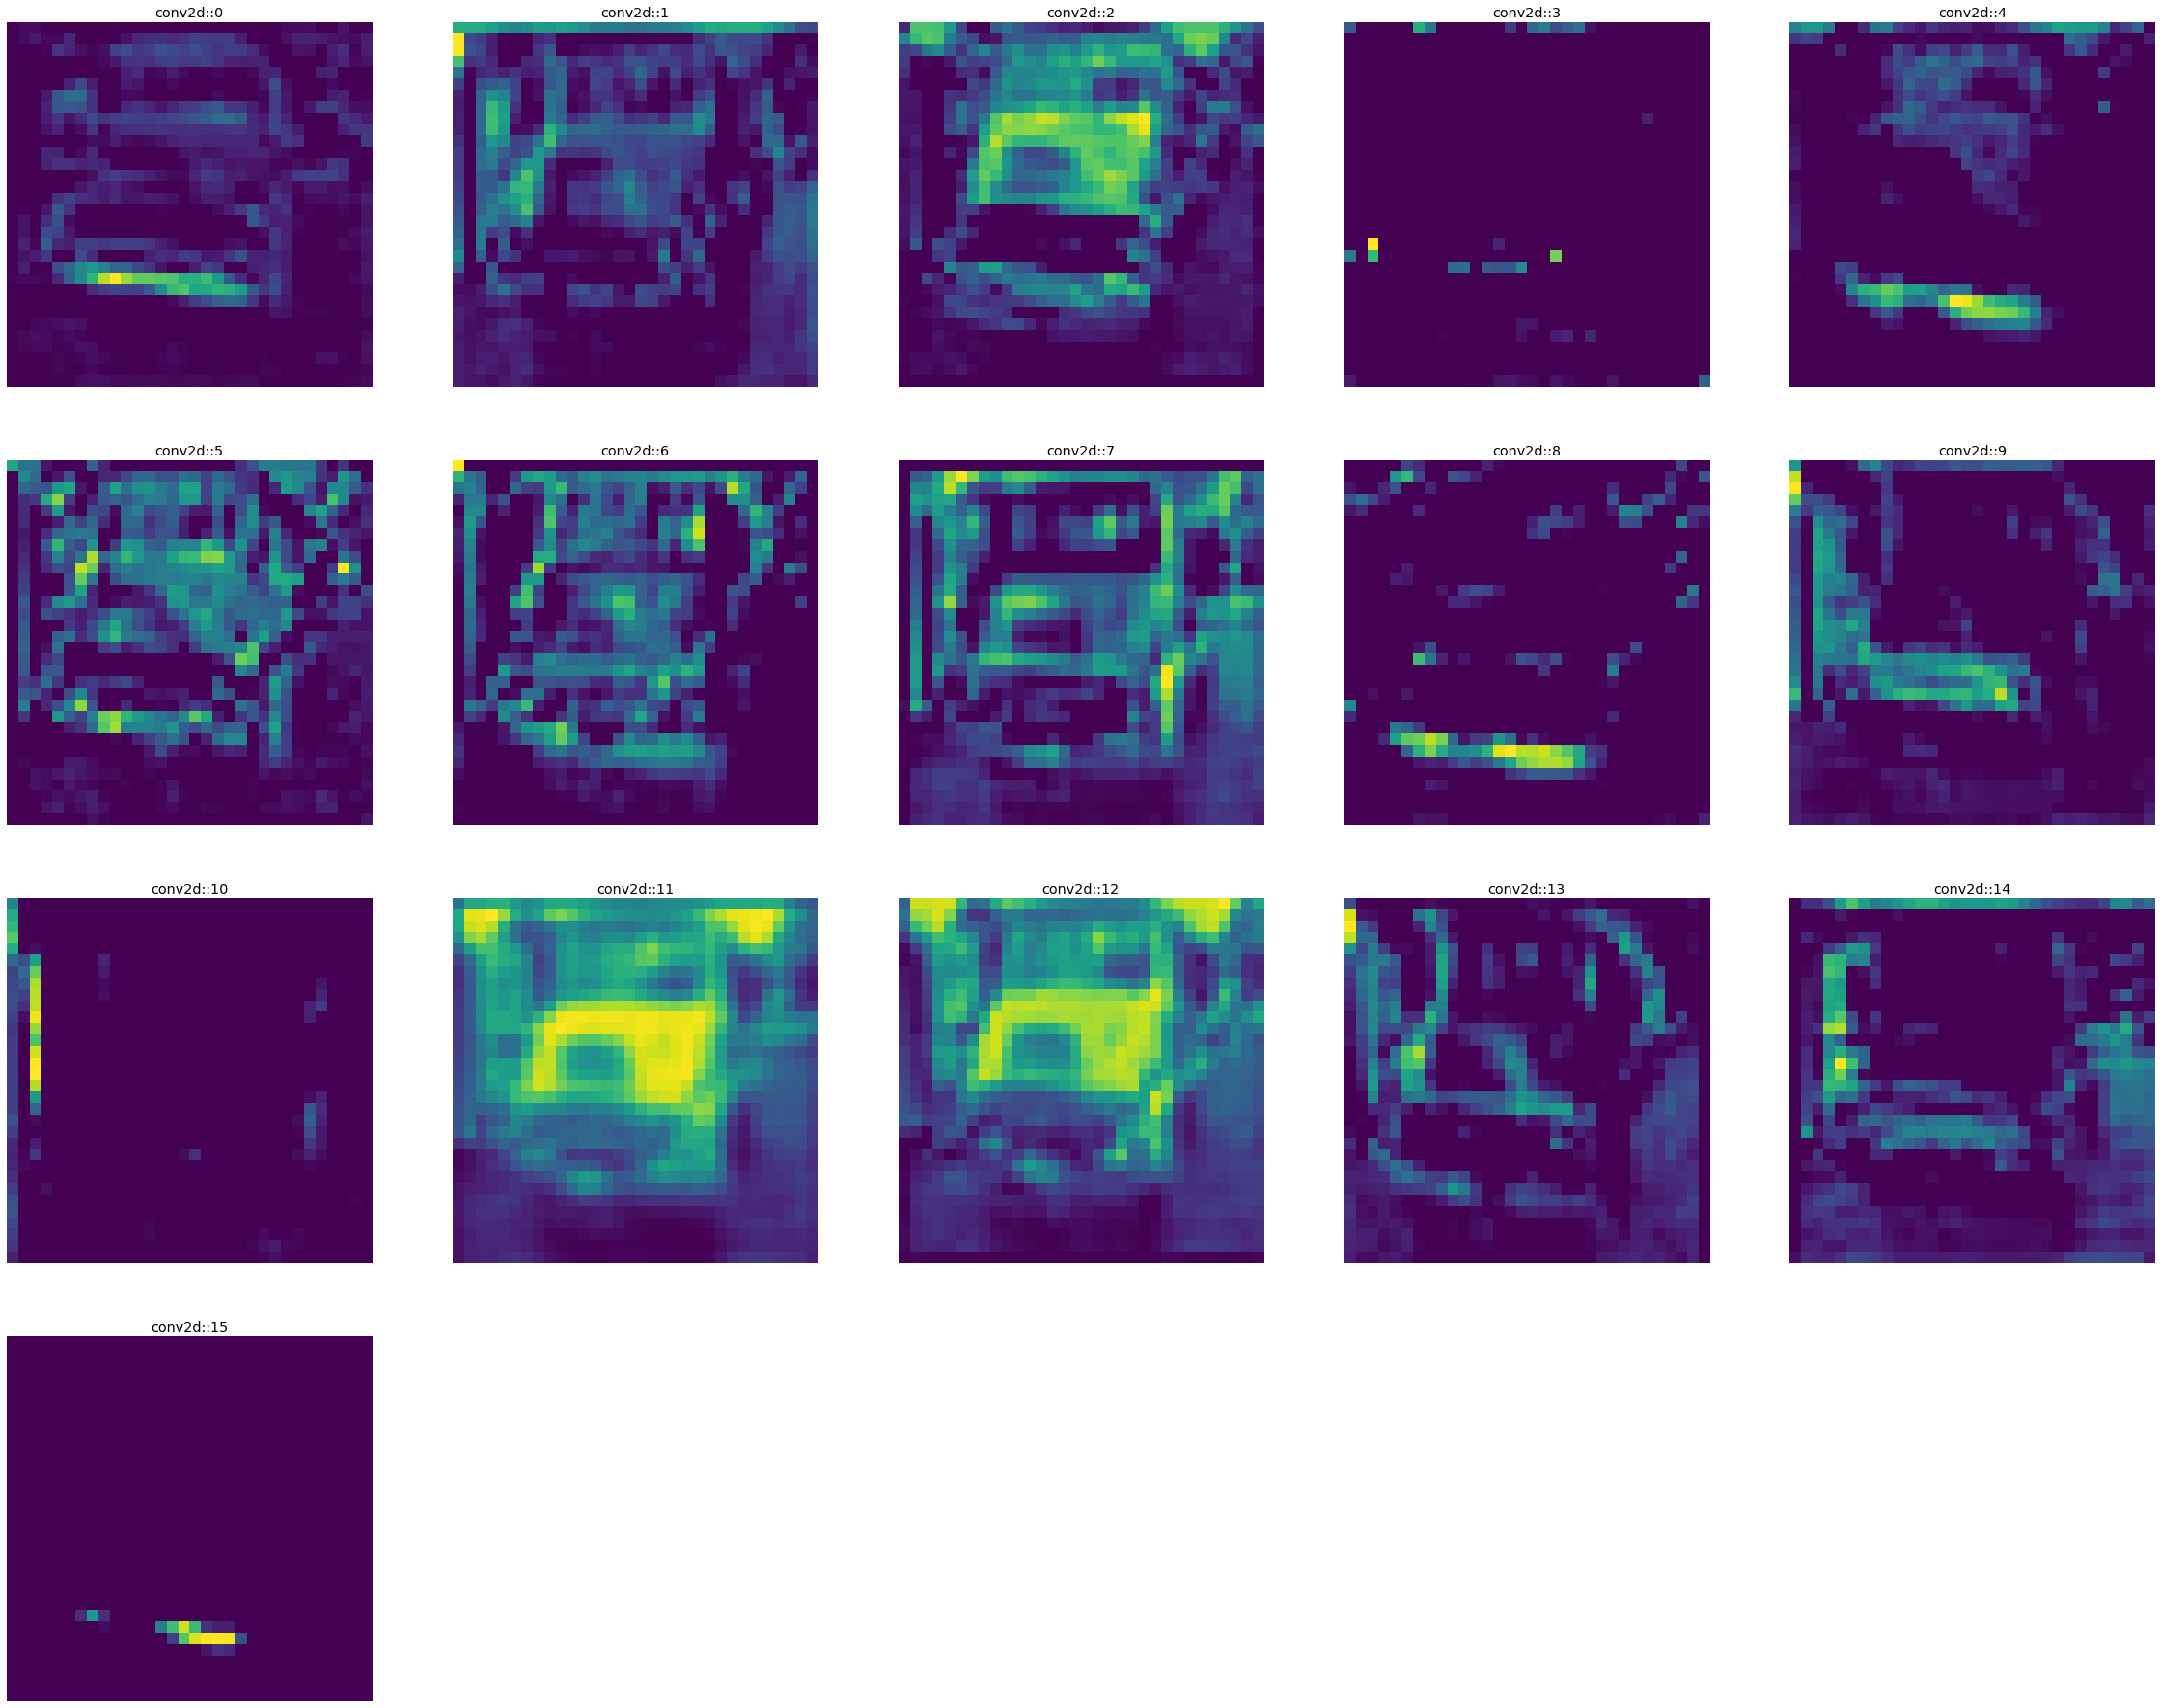

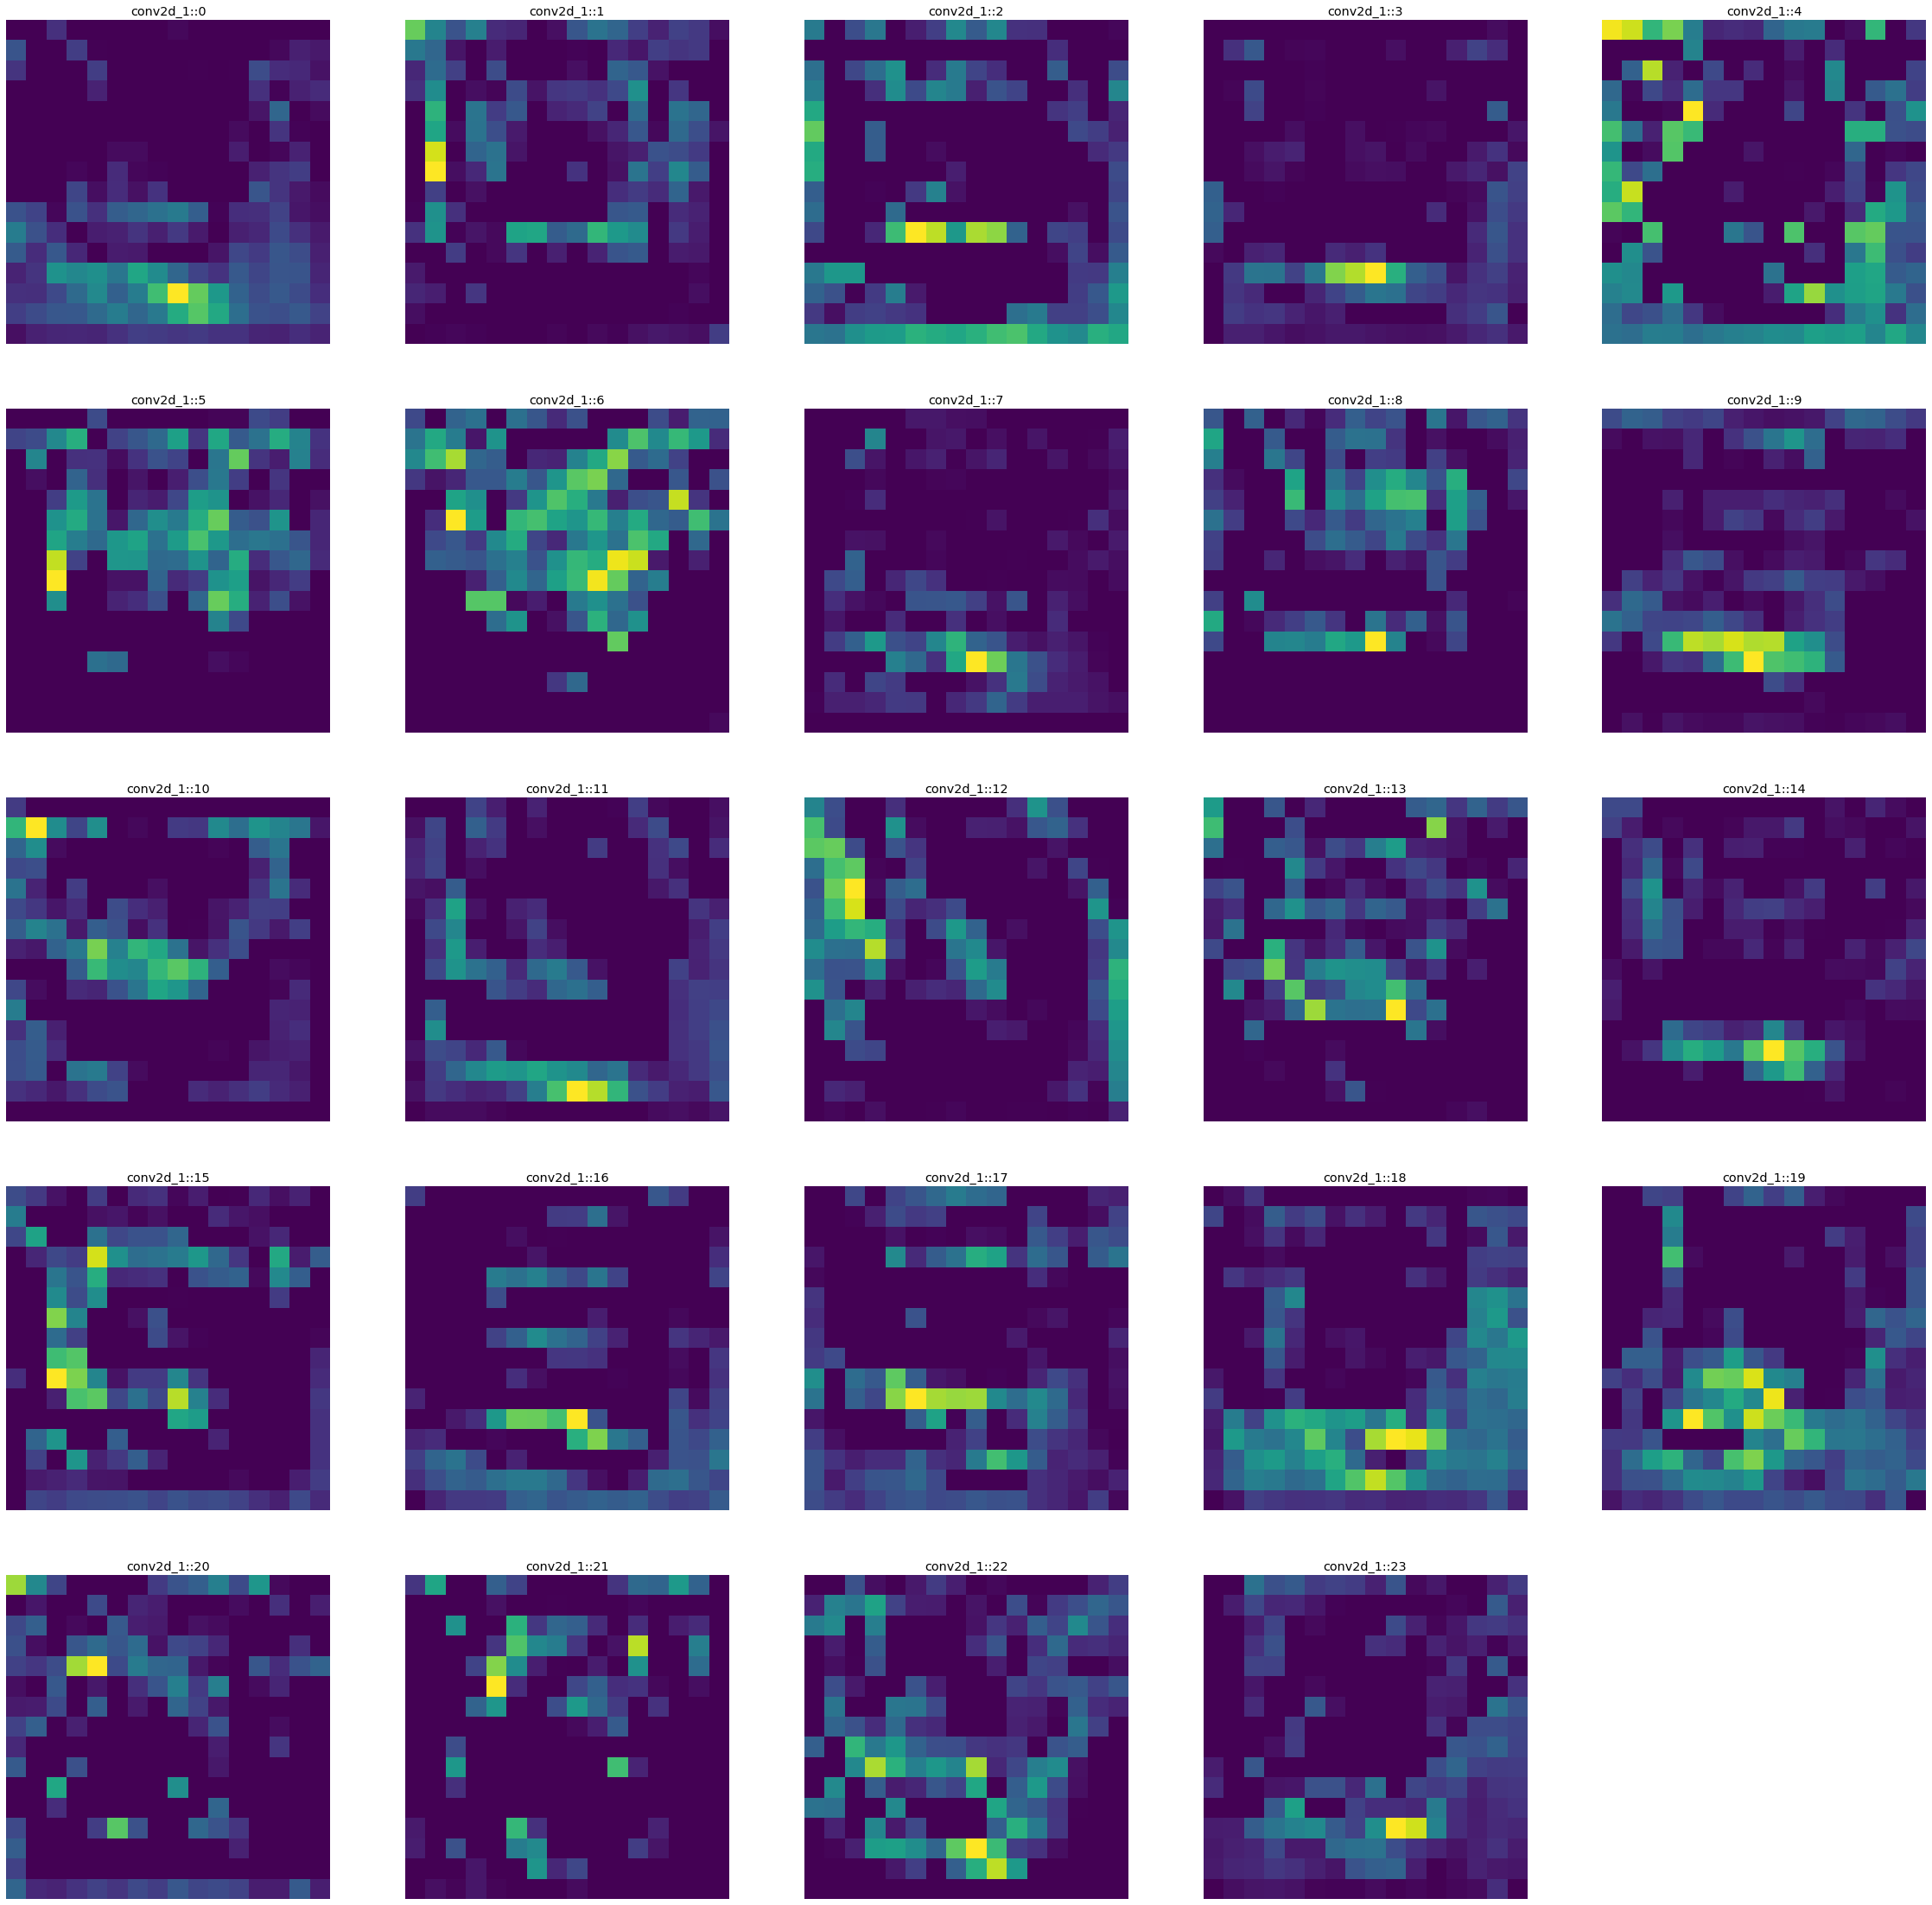

In [26]:
for row in incorrect_answers_top:
    index = row['index']
    predicted = row['answer']
    correct = row['correct_answer']
    
    image = excerpt_test_x[index]
    plot_convolutions(model, image, take=3, title=f'Predicted: {label_names[predicted]}, correct: {label_names[correct]}')
    plt.show()

Interesting results, conclusions about 4 convolutions in first layer still apply.
Most of examples were not actually confusing, and looking at how image was convoluted in first two layers gives some insight about why neural network predicted the way it did.

#### Inspection of first layer filters
One last inspection of this by all means imperfect model is to look at filters of first convolution layer - the one that focuses on simple shades and edges.

It supposes to have somewhat clear representations of all types of edges. If it's not robust, that might be part of a reason of why network performs poorly.

In [19]:
def plot_filters(nn_model, layer_index=1):
    filters, biases = nn_model.layers[layer_index].get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    filters_count = filters.shape[3]
    channel_count = filters.shape[2]
    plot_index = 1
    fig = plt.figure(figsize=(8, 16))
    for i in range(0, filters_count):
        single_filter = filters[:, :, :, i]
        for j in range(0, channel_count):
            channel_filter = single_filter[:, :, j]

            ax = plt.subplot(filters_count, channel_count, plot_index)
            plt.imshow(channel_filter, cmap='gray')
            plt.axis('off')
            plot_index += 1

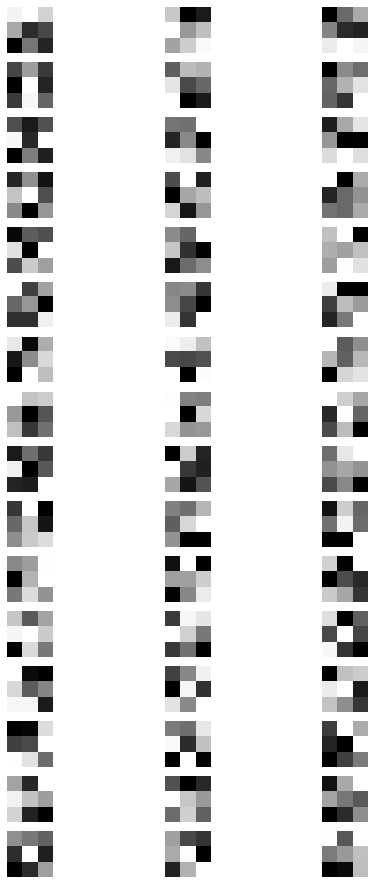

In [28]:
plot_filters(model)

Just as expected, filters are far from being robust and well-defined, there is some random in them.
Comparing to filters of VGG16, they are obviously way less effective - which we already know judging by F1=0.53

## Train neural network on full dataset

In [20]:
y_train_categorical = to_categorical(y_train_ravel)
y_test_categorical = to_categorical(y_test_ravel)

In [21]:
full_set_model = simplest_nn_model()

In [120]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

save_best = ModelCheckpoint('best_weights_full.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='min', factor=0.2, patience=5, verbose=1, cooldown=3)

history = full_set_model.fit(x_train, y_train_categorical, batch_size=64,
                    validation_split=0.02,
                    epochs=25,
                    callbacks=[save_best, reduce_lr]
                   )

Train on 49000 samples, validate on 1000 samples
Epoch 1/25
49000/49000 [==============================] - 7s 148us/sample - loss: 1.7335 - f1_score: 0.3926 - accuracy: 0.3954 - val_loss: 1.3448 - val_f1_score: 0.5263 - val_accuracy: 0.5280
Epoch 2/25
49000/49000 [==============================] - 6s 118us/sample - loss: 1.3231 - f1_score: 0.5259 - accuracy: 0.5289 - val_loss: 1.4044 - val_f1_score: 0.5153 - val_accuracy: 0.5230
Epoch 3/25
49000/49000 [==============================] - 6s 120us/sample - loss: 1.1830 - f1_score: 0.5773 - accuracy: 0.5793 - val_loss: 1.0826 - val_f1_score: 0.6057 - val_accuracy: 0.6100
Epoch 4/25
49000/49000 [==============================] - 6s 121us/sample - loss: 1.0964 - f1_score: 0.6102 - accuracy: 0.6119 - val_loss: 1.0467 - val_f1_score: 0.6249 - val_accuracy: 0.6280
Epoch 5/25
49000/49000 [==============================] - 6s 120us/sample - loss: 1.0390 - f1_score: 0.6311 - accuracy: 0.6325 - val_loss: 1.0435 - val_f1_score: 0.6270 - val_accuracy

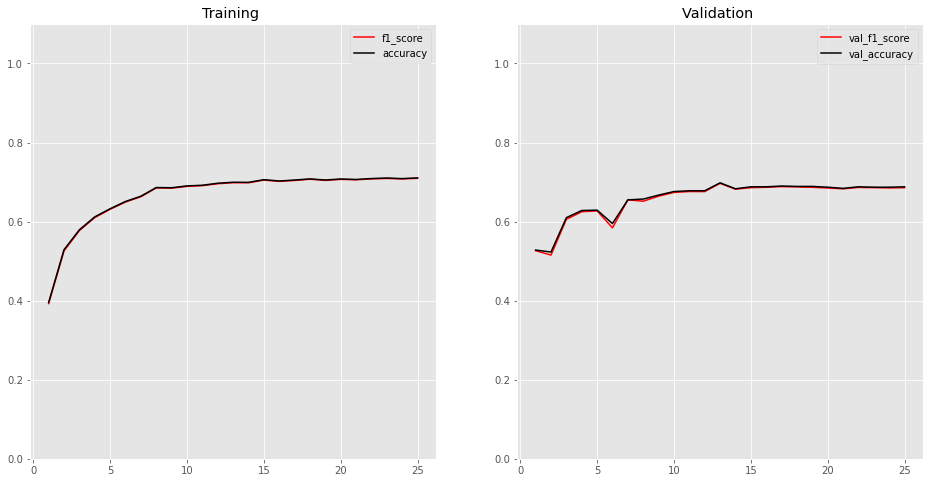

In [121]:
plot_history(history.history)

In [22]:
full_set_model.load_weights('best_weights_full.hdf5')
full_set_model.evaluate(excerpt_test_x, excerpt_test_y)

10000/10000 [==============================] - 1s 129us/sample - loss: 0.8638 - f1_score: 0.6918 - accuracy: 0.6939


[0.8637554479598999, 0.6918305, 0.6939]

## Much better results!
By increasing dataset from 8000 entries to 49000 (and keeping 1000 entries as a validation dataset) we increased accuracy of neural network from F1=0.53 to F1=0.69!

Of course, that happened not in the least because the configuration of this neural network was set to avoid overfitting.

### Next steps:
1. Preprocess images
2. Augment images
3. Create better neural network

After every step measure changes on test dataset to evaluate importance of each step.

In [23]:
def preprocess_images(images_set):
    return images_set * 1. / 255    

In [35]:
x_train_pp = preprocess_images(x_train)

In [36]:
full_set_model = simplest_nn_model()

save_best = ModelCheckpoint('best_weights_full_pp.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='min', factor=0.2, patience=5, verbose=1, cooldown=3)

history = full_set_model.fit(x_train_pp, y_train_categorical, batch_size=64,
                    validation_split=0.02,
                    epochs=25,
                    callbacks=[save_best, reduce_lr]
                   )

Train on 49000 samples, validate on 1000 samples
Epoch 1/25
49000/49000 [==============================] - 8s 169us/sample - loss: 1.6925 - f1_score: 0.4057 - accuracy: 0.4097 - val_loss: 1.3078 - val_f1_score: 0.5355 - val_accuracy: 0.5400
Epoch 2/25
49000/49000 [==============================] - 6s 130us/sample - loss: 1.3125 - f1_score: 0.5310 - accuracy: 0.5337 - val_loss: 1.1309 - val_f1_score: 0.6055 - val_accuracy: 0.6080
Epoch 3/25
49000/49000 [==============================] - 6s 129us/sample - loss: 1.1785 - f1_score: 0.5819 - accuracy: 0.5838 - val_loss: 1.0650 - val_f1_score: 0.6285 - val_accuracy: 0.6310
Epoch 4/25
49000/49000 [==============================] - 6s 127us/sample - loss: 1.0898 - f1_score: 0.6161 - accuracy: 0.6177 - val_loss: 1.1001 - val_f1_score: 0.5998 - val_accuracy: 0.6060
Epoch 5/25
49000/49000 [==============================] - 6s 131us/sample - loss: 1.0256 - f1_score: 0.6396 - accuracy: 0.6411 - val_loss: 1.0421 - val_f1_score: 0.6220 - val_accuracy

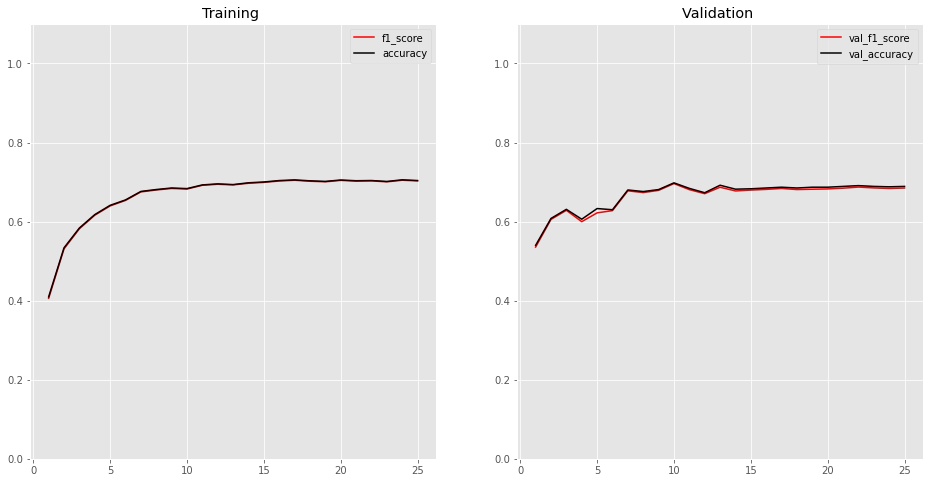

In [37]:
plot_history(history.history)

In [39]:
full_set_model.load_weights('best_weights_full_pp.hdf5')
excerpt_test_x_pp = preprocess_images(excerpt_test_x)
full_set_model.evaluate(excerpt_test_x_pp, excerpt_test_y)

10000/10000 [==============================] - 1s 122us/sample - loss: 0.8619 - f1_score: 0.6963 - accuracy: 0.6983


[0.8618899686813355, 0.69625044, 0.6983]

Simple scaling did improve performance for about 0.5%.

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect',
    validation_split=0.02
)

train_datagen.fit(x_train)

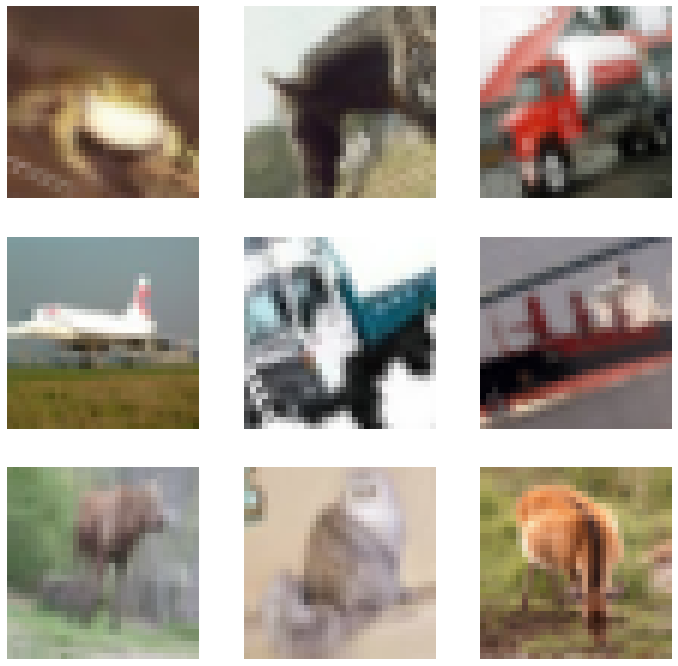

In [39]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9, subset='training'):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
        plt.axis('off')        
    plt.show()
    break

In [103]:
full_set_model = simplest_nn_model()

save_best = ModelCheckpoint('best_weights_full_augmented.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='max', factor=0.2, patience=5, verbose=1, cooldown=3)

history = full_set_model.fit(train_datagen.flow(x_train, y_train_categorical, batch_size=64, subset='training'),
    steps_per_epoch=765,
    validation_data=train_datagen.flow(x_train, y_train_categorical, batch_size=64, subset='validation'),
    validation_steps=16,
    callbacks=[save_best, reduce_lr],
    epochs=50
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 765 steps, validate for 16 steps
Epoch 1/50
765/765 [==============================] - 23s 31ms/step - loss: 1.7626 - f1_score: 0.3775 - accuracy: 0.3810 - val_loss: 1.4715 - val_f1_score: 0.4627 - val_accuracy: 0.4670
Epoch 2/50
765/765 [==============================] - 22s 28ms/step - loss: 1.4233 - f1_score: 0.4883 - accuracy: 0.4911 - val_loss: 1.3420 - val_f1_score: 0.5118 - val_accuracy: 0.5270- loss: 1.4258 - f1_score: 0.4873 
Epoch 3/50
765/765 [==============================] - 22s 28ms/step - loss: 1.3017 - f1_score: 0.5357 - accuracy: 0.5377 - val_loss: 1.1743 - val_f1_score: 0.5732 - val_accuracy: 0.5840
Epoch 4/50
765/765 [==============================] - 21s 28ms/step - loss: 1.2304 - f1_score: 0.5633 - accuracy: 0.5652 - val_loss: 1.1903 - val_f1_score: 0.5698 - val_accuracy: 0.5690
Epoch 5/50
765/765 [==============================] - 22s 29ms/step - loss: 1.1853 - f1_score: 0.5792 - accuracy: 0.5807 - val_lo

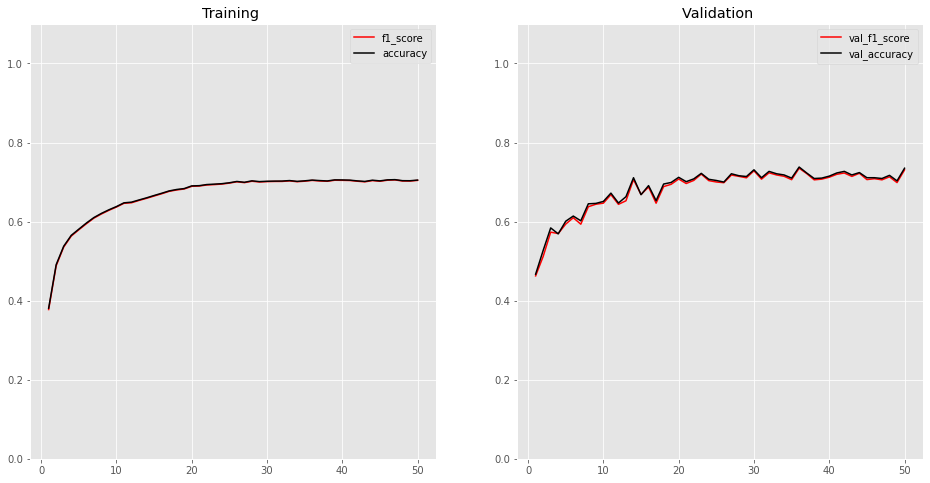

In [104]:
plot_history(history.history)

In [105]:
full_set_model.load_weights('best_weights_full_augmented.hdf5')
excerpt_test_x_pp = preprocess_images(excerpt_test_x)
full_set_model.evaluate(excerpt_test_x_pp, excerpt_test_y)

10000/10000 [==============================] - 1s 134us/sample - loss: 0.8027 - f1_score: 0.7152 - accuracy: 0.7237


[0.8026824911117554, 0.71517086, 0.7237]

Augmentation gave additional ~2% of accuracy. Probably that's the best that this neural network configuration would give.

# Transfer learning

Before going ahead and trying to create a better neural network from scratch, it would also be useful to try and evaluate out-of-box famous networks - VGG16, Xception

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16

def vgg16_based_model(show_summary=False, fine_tune=False):
    inputs = tf.keras.layers.Input((32, 32, 3))
    
    inner_model = VGG16(include_top=False)
    inner_model.trainable = fine_tune
    hidden = inner_model(inputs)
    
    hidden = tf.keras.layers.Flatten()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Dense(96, activation='relu')(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(hidden)
    
    model = tf.keras.Model(inputs, outputs)
    metrics = [
        tfa.metrics.F1Score(num_classes=10, average="weighted"),
        'accuracy'
    ]
    model.compile(
        optimizer=RMSprop(lr=0.0002),
        loss='categorical_crossentropy',
        metrics=metrics
                 )
    
    if show_summary:
        print(model.summary())
    
    return model

In [51]:
vgg16_model = vgg16_based_model(show_summary=True)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 96)                49248     
_________________________________________________________________
dropout_9 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                970 

In [52]:
from tensorflow.keras.applications.vgg16 import preprocess_input

x_train_pp = preprocess_input(x_train)
print(x_train_pp.shape)

(50000, 32, 32, 3)


In [53]:
save_best = ModelCheckpoint('best_weights_vgg16.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='max', factor=0.2, patience=5, verbose=1, cooldown=3)

history = vgg16_model.fit(
    x_train_pp,
    y_train_categorical,
    batch_size=64,
    validation_split=0.02,
    epochs=25,
    callbacks=[save_best, reduce_lr]
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/25
49000/49000 [==============================] - 25s 506us/sample - loss: 4.9791 - f1_score: 0.3709 - accuracy: 0.3716 - val_loss: 1.7121 - val_f1_score: 0.4805 - val_accuracy: 0.4850
Epoch 2/25
49000/49000 [==============================] - 23s 478us/sample - loss: 1.7131 - f1_score: 0.4722 - accuracy: 0.4736 - val_loss: 1.4009 - val_f1_score: 0.5355 - val_accuracy: 0.5350
Epoch 3/25
49000/49000 [==============================] - 23s 476us/sample - loss: 1.4426 - f1_score: 0.5367 - accuracy: 0.5375 - val_loss: 1.3212 - val_f1_score: 0.5583 - val_accuracy: 0.5590
Epoch 4/25
49000/49000 [==============================] - 23s 478us/sample - loss: 1.3299 - f1_score: 0.5645 - accuracy: 0.5655 - val_loss: 1.2716 - val_f1_score: 0.5783 - val_accuracy: 0.5780
Epoch 5/25
49000/49000 [==============================] - 23s 467us/sample - loss: 1.2547 - f1_score: 0.5865 - accuracy: 0.5874 - val_loss: 1.2205 - val_f1_score: 0.5965 - val_acc

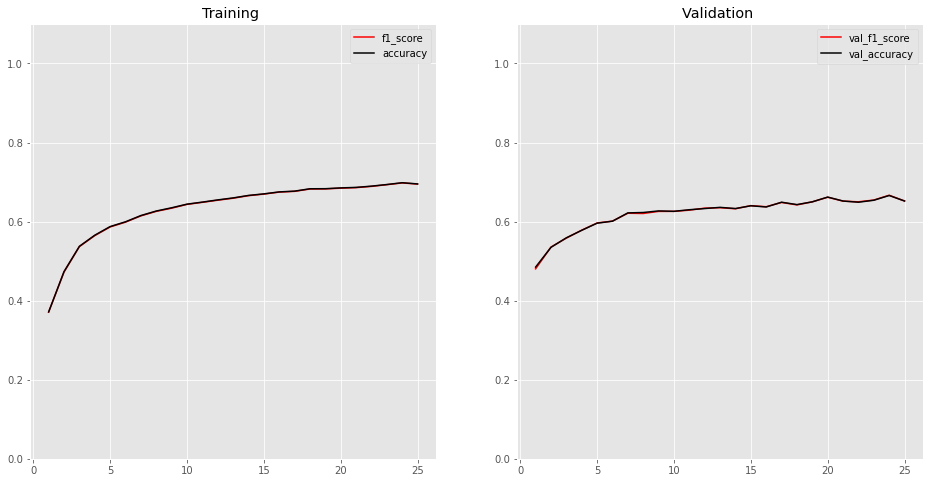

In [54]:
plot_history(history.history)

In [55]:
vgg16_model.load_weights('best_weights_vgg16.hdf5')

excerpt_test_x_pp = preprocess_input(excerpt_test_x)
vgg16_model.evaluate(excerpt_test_x_pp, excerpt_test_y)

10000/10000 [==============================] - 6s 567us/sample - loss: 1.0454 - f1_score: 0.6617 - accuracy: 0.6627


[1.0454432661056519, 0.6617317, 0.6627]

In [96]:
from tensorflow.keras.applications import Xception

def xception_based_model(show_summary=False, fine_tune=False):
    inputs = tf.keras.layers.Input((32, 32, 3))
    
    norm_layer = tf.keras.layers.LayerNormalization()
    mean = np.array([127.5] * 3)
    var = mean ** 2
    # Scale inputs to [-1, +1]
    n_inputs = norm_layer(inputs)
    norm_layer.set_weights([mean, var])
    
    inner_model = Xception(include_top=False)
    inner_model.trainable = fine_tune
    hidden = inner_model(n_inputs)
    
    hidden = tf.keras.layers.GlobalAveragePooling2D()(hidden)
    hidden = tf.keras.layers.Dropout(0.2)(hidden)
    
    hidden = tf.keras.layers.Flatten()(hidden)
    
    hidden = tf.keras.layers.Dense(96, activation='relu')(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(hidden)
    
    model = tf.keras.Model(inputs, outputs)
    metrics = [
        tfa.metrics.F1Score(num_classes=10, average="weighted"),
        'accuracy'
    ]
    model.compile(
        optimizer=RMSprop(lr=0.0002),
        loss='categorical_crossentropy',
        metrics=metrics
                 )
    
    if show_summary:
        print(model.summary())
    
    return model

In [97]:
xception_model = xception_based_model(show_summary=True)

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
layer_normalization_7 (Layer (None, 32, 32, 3)         6         
_________________________________________________________________
xception (Model)             multiple                  20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 2048)              0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 96)                196

In [ ]:
save_best = ModelCheckpoint('best_weights_xception.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='max', factor=0.2, patience=5, verbose=1, cooldown=3)

history = xception_model.fit(
    x_train,
    y_train_categorical,
    batch_size=64,
    validation_split=0.02,
    epochs=25,
    callbacks=[save_best, reduce_lr]
)

# Better neural network

In [108]:
def nn_model_mark_one(show_summary=False):
    inputs = tf.keras.layers.Input((32, 32, 3))
    
    hidden = tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same')(inputs)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
        
    hidden = tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(96, (4, 4), activation='relu', padding='valid')(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Flatten()(hidden)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(hidden)
    
    model = tf.keras.Model(inputs, outputs)
    metrics = [
        tfa.metrics.F1Score(num_classes=10, average="weighted"),
        'accuracy'
    ]
    model.compile(
        optimizer=RMSprop(lr=0.0002),
        loss='categorical_crossentropy',
        metrics=metrics
                 )
    
    if show_summary:
        print(model.summary())
    
    return model

In [107]:
current_model = nn_model_mark_one()

In [ ]:
save_best = ModelCheckpoint('best_weights_mark_one.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='max', factor=0.2, patience=5, verbose=1, cooldown=3)

history = current_model.fit(train_datagen.flow(x_train, y_train_categorical, batch_size=64, subset='training'),
    steps_per_epoch=765,
    validation_data=train_datagen.flow(x_train, y_train_categorical, batch_size=64, subset='validation'),
    validation_steps=16,
    callbacks=[save_best, reduce_lr],
    epochs=50
)

Train on 49000 samples, validate on 1000 samples
Epoch 1/25
49000/49000 [==============================] - 8s 172us/sample - loss: 1.7815 - f1_score: 0.3774 - accuracy: 0.3812 - val_loss: 1.4093 - val_f1_score: 0.4804 - val_accuracy: 0.4890
Epoch 2/25
49000/49000 [==============================] - 6s 124us/sample - loss: 1.4020 - f1_score: 0.4995 - accuracy: 0.5024 - val_loss: 1.2707 - val_f1_score: 0.5295 - val_accuracy: 0.5450
Epoch 3/25
49000/49000 [==============================] - 6s 122us/sample - loss: 1.2487 - f1_score: 0.5555 - accuracy: 0.5581 - val_loss: 1.1555 - val_f1_score: 0.5791 - val_accuracy: 0.5860
Epoch 4/25
49000/49000 [==============================] - 6s 121us/sample - loss: 1.1500 - f1_score: 0.5921 - accuracy: 0.5941 - val_loss: 1.0581 - val_f1_score: 0.6078 - val_accuracy: 0.6090
Epoch 5/25
49000/49000 [==============================] - 6s 121us/sample - loss: 1.0887 - f1_score: 0.6142 - accuracy: 0.6160 - val_loss: 1.1038 - val_f1_score: 0.5952 - val_accuracy

In [ ]:
plot_history(history.history)

In [ ]:
current_model.load_weights('best_weights_mark_one.hdf5')
current_model.evaluate(excerpt_test_x, excerpt_test_y)